# Introduction: Transfer Learning in PyTorch

In this notebook, we'll see how to use PyTorch to train a classifier to identify 101 different objects in images. Through this project, we'll get familiar with the basics of transfer learning, PyTorch, convolutional neural networks, and inference. 

## Dataset: CalTech 101

The dataset is the [CalTech 101 collection](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) of images from 101 categories. There are about 40 to 800 images in each category. I've reduced the number of categories to 100 and arranged them in three sets: train, valid, test with a split of 50%, 25%, and 25%. 

In [0]:
#Dataset

dname='101_ObjectCategories'
fname=dname + '.tar.gz'

#Download
import os
if not os.path.isfile(fname):
  print("downloading...")
  !wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz

#extract
import tarfile
if (fname.endswith("tar.gz")):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

# Make dir datadir/ [train valid test]
if not os.path.isdir('datadir'):
  os.mkdir('datadir')
  os.mkdir('datadir/train')
  os.mkdir('datadir/valid')
  os.mkdir('datadir/test')

  classn=os.listdir(dname)
  for folderName in classn:
    os.mkdir('datadir/train/' + folderName)
    os.mkdir('datadir/valid/' + folderName)
    os.mkdir('datadir/test/' + folderName)

In [54]:
#Split data to tain valid test

import random
import shutil

for classn in os.listdir(dname):
      
  imgs=os.listdir(dname +'/' + classn)

  imgs4train=imgs[0: round(0.5 * len(imgs))]
  imgs4valid=imgs[round(0.5 * len(imgs)): round(0.75 * len(imgs))]
  imgs4test=imgs[round(0.75 * len(imgs)): ]

  for img in imgs4train:
    shutil.copyfile(dname +'/' + classn +'/'+ img,'datadir/train' +'/'+  classn +'/'+ img)
  for img in imgs4valid:
    shutil.copyfile(dname +'/' + classn +'/'+ img,'datadir/valid' +'/'+  classn +'/'+ img)
  for img in imgs4test:
    shutil.copyfile(dname +'/' + classn +'/'+ img,'datadir/test' +'/'+  classn +'/'+ img)

'datadir/train/cougar_face/image_0049.jpg'

'datadir/train/cougar_face/image_0008.jpg'

'datadir/train/cougar_face/image_0047.jpg'

'datadir/train/cougar_face/image_0013.jpg'

'datadir/train/cougar_face/image_0021.jpg'

'datadir/train/cougar_face/image_0052.jpg'

'datadir/train/cougar_face/image_0029.jpg'

'datadir/train/cougar_face/image_0010.jpg'

'datadir/train/cougar_face/image_0005.jpg'

'datadir/train/cougar_face/image_0065.jpg'

'datadir/train/cougar_face/image_0030.jpg'

'datadir/train/cougar_face/image_0003.jpg'

'datadir/train/cougar_face/image_0034.jpg'

'datadir/train/cougar_face/image_0004.jpg'

'datadir/train/cougar_face/image_0028.jpg'

'datadir/train/cougar_face/image_0012.jpg'

'datadir/train/cougar_face/image_0023.jpg'

'datadir/train/cougar_face/image_0001.jpg'

'datadir/train/cougar_face/image_0033.jpg'

'datadir/train/cougar_face/image_0054.jpg'

'datadir/train/cougar_face/image_0027.jpg'

'datadir/train/cougar_face/image_0020.jpg'

'datadir/train/cougar_face/image_0068.jpg'

'datadir/train/cougar_face/image_0015.jpg'

'datadir/train/cougar_face/image_0043.jpg'

'datadir/train/cougar_face/image_0011.jpg'

'datadir/train/cougar_face/image_0062.jpg'

'datadir/train/cougar_face/image_0069.jpg'

'datadir/train/cougar_face/image_0031.jpg'

'datadir/train/cougar_face/image_0060.jpg'

'datadir/train/cougar_face/image_0037.jpg'

'datadir/train/cougar_face/image_0041.jpg'

'datadir/train/cougar_face/image_0051.jpg'

'datadir/train/cougar_face/image_0064.jpg'

'datadir/valid/cougar_face/image_0035.jpg'

'datadir/valid/cougar_face/image_0040.jpg'

'datadir/valid/cougar_face/image_0022.jpg'

'datadir/valid/cougar_face/image_0002.jpg'

'datadir/valid/cougar_face/image_0059.jpg'

'datadir/valid/cougar_face/image_0018.jpg'

'datadir/valid/cougar_face/image_0036.jpg'

'datadir/valid/cougar_face/image_0016.jpg'

'datadir/valid/cougar_face/image_0055.jpg'

'datadir/valid/cougar_face/image_0057.jpg'

'datadir/valid/cougar_face/image_0058.jpg'

'datadir/valid/cougar_face/image_0026.jpg'

'datadir/valid/cougar_face/image_0007.jpg'

'datadir/valid/cougar_face/image_0044.jpg'

'datadir/valid/cougar_face/image_0063.jpg'

'datadir/valid/cougar_face/image_0042.jpg'

'datadir/valid/cougar_face/image_0038.jpg'

'datadir/valid/cougar_face/image_0061.jpg'

'datadir/test/cougar_face/image_0050.jpg'

'datadir/test/cougar_face/image_0032.jpg'

'datadir/test/cougar_face/image_0017.jpg'

'datadir/test/cougar_face/image_0066.jpg'

'datadir/test/cougar_face/image_0048.jpg'

'datadir/test/cougar_face/image_0009.jpg'

'datadir/test/cougar_face/image_0025.jpg'

'datadir/test/cougar_face/image_0006.jpg'

'datadir/test/cougar_face/image_0039.jpg'

'datadir/test/cougar_face/image_0046.jpg'

'datadir/test/cougar_face/image_0067.jpg'

'datadir/test/cougar_face/image_0014.jpg'

'datadir/test/cougar_face/image_0053.jpg'

'datadir/test/cougar_face/image_0045.jpg'

'datadir/test/cougar_face/image_0056.jpg'

'datadir/test/cougar_face/image_0019.jpg'

'datadir/test/cougar_face/image_0024.jpg'

'datadir/train/buddha/image_0049.jpg'

'datadir/train/buddha/image_0008.jpg'

'datadir/train/buddha/image_0047.jpg'

'datadir/train/buddha/image_0013.jpg'

'datadir/train/buddha/image_0021.jpg'

'datadir/train/buddha/image_0052.jpg'

'datadir/train/buddha/image_0071.jpg'

'datadir/train/buddha/image_0029.jpg'

'datadir/train/buddha/image_0010.jpg'

'datadir/train/buddha/image_0005.jpg'

'datadir/train/buddha/image_0065.jpg'

'datadir/train/buddha/image_0030.jpg'

'datadir/train/buddha/image_0003.jpg'

'datadir/train/buddha/image_0034.jpg'

'datadir/train/buddha/image_0004.jpg'

'datadir/train/buddha/image_0077.jpg'

'datadir/train/buddha/image_0028.jpg'

'datadir/train/buddha/image_0012.jpg'

'datadir/train/buddha/image_0023.jpg'

'datadir/train/buddha/image_0001.jpg'

'datadir/train/buddha/image_0033.jpg'

'datadir/train/buddha/image_0081.jpg'

'datadir/train/buddha/image_0054.jpg'

'datadir/train/buddha/image_0074.jpg'

'datadir/train/buddha/image_0027.jpg'

'datadir/train/buddha/image_0020.jpg'

'datadir/train/buddha/image_0068.jpg'

'datadir/train/buddha/image_0015.jpg'

'datadir/train/buddha/image_0043.jpg'

'datadir/train/buddha/image_0011.jpg'

'datadir/train/buddha/image_0080.jpg'

'datadir/train/buddha/image_0062.jpg'

'datadir/train/buddha/image_0069.jpg'

'datadir/train/buddha/image_0031.jpg'

'datadir/train/buddha/image_0079.jpg'

'datadir/train/buddha/image_0060.jpg'

'datadir/train/buddha/image_0037.jpg'

'datadir/train/buddha/image_0041.jpg'

'datadir/train/buddha/image_0051.jpg'

'datadir/train/buddha/image_0085.jpg'

'datadir/train/buddha/image_0064.jpg'

'datadir/train/buddha/image_0035.jpg'

'datadir/valid/buddha/image_0040.jpg'

'datadir/valid/buddha/image_0022.jpg'

'datadir/valid/buddha/image_0084.jpg'

'datadir/valid/buddha/image_0002.jpg'

'datadir/valid/buddha/image_0059.jpg'

'datadir/valid/buddha/image_0018.jpg'

'datadir/valid/buddha/image_0036.jpg'

'datadir/valid/buddha/image_0016.jpg'

'datadir/valid/buddha/image_0055.jpg'

'datadir/valid/buddha/image_0057.jpg'

'datadir/valid/buddha/image_0058.jpg'

'datadir/valid/buddha/image_0076.jpg'

'datadir/valid/buddha/image_0070.jpg'

'datadir/valid/buddha/image_0026.jpg'

'datadir/valid/buddha/image_0007.jpg'

'datadir/valid/buddha/image_0078.jpg'

'datadir/valid/buddha/image_0044.jpg'

'datadir/valid/buddha/image_0063.jpg'

'datadir/valid/buddha/image_0042.jpg'

'datadir/valid/buddha/image_0038.jpg'

'datadir/valid/buddha/image_0061.jpg'

'datadir/valid/buddha/image_0073.jpg'

'datadir/test/buddha/image_0050.jpg'

'datadir/test/buddha/image_0032.jpg'

'datadir/test/buddha/image_0017.jpg'

'datadir/test/buddha/image_0066.jpg'

'datadir/test/buddha/image_0072.jpg'

'datadir/test/buddha/image_0075.jpg'

'datadir/test/buddha/image_0048.jpg'

'datadir/test/buddha/image_0009.jpg'

'datadir/test/buddha/image_0025.jpg'

'datadir/test/buddha/image_0006.jpg'

'datadir/test/buddha/image_0039.jpg'

'datadir/test/buddha/image_0046.jpg'

'datadir/test/buddha/image_0067.jpg'

'datadir/test/buddha/image_0083.jpg'

'datadir/test/buddha/image_0014.jpg'

'datadir/test/buddha/image_0053.jpg'

'datadir/test/buddha/image_0045.jpg'

'datadir/test/buddha/image_0056.jpg'

'datadir/test/buddha/image_0082.jpg'

'datadir/test/buddha/image_0019.jpg'

'datadir/test/buddha/image_0024.jpg'

'datadir/train/grand_piano/image_0049.jpg'

'datadir/train/grand_piano/image_0008.jpg'

'datadir/train/grand_piano/image_0047.jpg'

'datadir/train/grand_piano/image_0013.jpg'

'datadir/train/grand_piano/image_0021.jpg'

'datadir/train/grand_piano/image_0052.jpg'

'datadir/train/grand_piano/image_0071.jpg'

'datadir/train/grand_piano/image_0086.jpg'

'datadir/train/grand_piano/image_0029.jpg'

'datadir/train/grand_piano/image_0010.jpg'

'datadir/train/grand_piano/image_0005.jpg'

'datadir/train/grand_piano/image_0065.jpg'

'datadir/train/grand_piano/image_0098.jpg'

'datadir/train/grand_piano/image_0030.jpg'

'datadir/train/grand_piano/image_0003.jpg'

'datadir/train/grand_piano/image_0034.jpg'

'datadir/train/grand_piano/image_0004.jpg'

'datadir/train/grand_piano/image_0077.jpg'

'datadir/train/grand_piano/image_0028.jpg'

'datadir/train/grand_piano/image_0012.jpg'

'datadir/train/grand_piano/image_0023.jpg'

'datadir/train/grand_piano/image_0001.jpg'

'datadir/train/grand_piano/image_0095.jpg'

'datadir/train/grand_piano/image_0033.jpg'

'datadir/train/grand_piano/image_0081.jpg'

'datadir/train/grand_piano/image_0054.jpg'

'datadir/train/grand_piano/image_0074.jpg'

'datadir/train/grand_piano/image_0088.jpg'

'datadir/train/grand_piano/image_0027.jpg'

'datadir/train/grand_piano/image_0020.jpg'

'datadir/train/grand_piano/image_0068.jpg'

'datadir/train/grand_piano/image_0015.jpg'

'datadir/train/grand_piano/image_0093.jpg'

'datadir/train/grand_piano/image_0043.jpg'

'datadir/train/grand_piano/image_0011.jpg'

'datadir/train/grand_piano/image_0080.jpg'

'datadir/train/grand_piano/image_0062.jpg'

'datadir/train/grand_piano/image_0069.jpg'

'datadir/train/grand_piano/image_0031.jpg'

'datadir/train/grand_piano/image_0079.jpg'

'datadir/train/grand_piano/image_0060.jpg'

'datadir/train/grand_piano/image_0037.jpg'

'datadir/train/grand_piano/image_0041.jpg'

'datadir/train/grand_piano/image_0051.jpg'

'datadir/train/grand_piano/image_0085.jpg'

'datadir/train/grand_piano/image_0094.jpg'

'datadir/train/grand_piano/image_0064.jpg'

'datadir/train/grand_piano/image_0092.jpg'

'datadir/train/grand_piano/image_0035.jpg'

'datadir/train/grand_piano/image_0040.jpg'

'datadir/valid/grand_piano/image_0022.jpg'

'datadir/valid/grand_piano/image_0084.jpg'

'datadir/valid/grand_piano/image_0002.jpg'

'datadir/valid/grand_piano/image_0059.jpg'

'datadir/valid/grand_piano/image_0018.jpg'

'datadir/valid/grand_piano/image_0036.jpg'

'datadir/valid/grand_piano/image_0016.jpg'

'datadir/valid/grand_piano/image_0055.jpg'

'datadir/valid/grand_piano/image_0057.jpg'

'datadir/valid/grand_piano/image_0096.jpg'

'datadir/valid/grand_piano/image_0058.jpg'

'datadir/valid/grand_piano/image_0076.jpg'

'datadir/valid/grand_piano/image_0070.jpg'

'datadir/valid/grand_piano/image_0026.jpg'

'datadir/valid/grand_piano/image_0007.jpg'

'datadir/valid/grand_piano/image_0078.jpg'

'datadir/valid/grand_piano/image_0044.jpg'

'datadir/valid/grand_piano/image_0063.jpg'

'datadir/valid/grand_piano/image_0042.jpg'

'datadir/valid/grand_piano/image_0038.jpg'

'datadir/valid/grand_piano/image_0061.jpg'

'datadir/valid/grand_piano/image_0073.jpg'

'datadir/valid/grand_piano/image_0050.jpg'

'datadir/valid/grand_piano/image_0032.jpg'

'datadir/test/grand_piano/image_0017.jpg'

'datadir/test/grand_piano/image_0066.jpg'

'datadir/test/grand_piano/image_0089.jpg'

'datadir/test/grand_piano/image_0091.jpg'

'datadir/test/grand_piano/image_0072.jpg'

'datadir/test/grand_piano/image_0075.jpg'

'datadir/test/grand_piano/image_0048.jpg'

'datadir/test/grand_piano/image_0090.jpg'

'datadir/test/grand_piano/image_0009.jpg'

'datadir/test/grand_piano/image_0025.jpg'

'datadir/test/grand_piano/image_0087.jpg'

'datadir/test/grand_piano/image_0006.jpg'

'datadir/test/grand_piano/image_0039.jpg'

'datadir/test/grand_piano/image_0046.jpg'

'datadir/test/grand_piano/image_0067.jpg'

'datadir/test/grand_piano/image_0083.jpg'

'datadir/test/grand_piano/image_0014.jpg'

'datadir/test/grand_piano/image_0097.jpg'

'datadir/test/grand_piano/image_0099.jpg'

'datadir/test/grand_piano/image_0053.jpg'

'datadir/test/grand_piano/image_0045.jpg'

'datadir/test/grand_piano/image_0056.jpg'

'datadir/test/grand_piano/image_0082.jpg'

'datadir/test/grand_piano/image_0019.jpg'

'datadir/test/grand_piano/image_0024.jpg'

'datadir/train/joshua_tree/image_0049.jpg'

'datadir/train/joshua_tree/image_0008.jpg'

'datadir/train/joshua_tree/image_0047.jpg'

'datadir/train/joshua_tree/image_0013.jpg'

'datadir/train/joshua_tree/image_0021.jpg'

'datadir/train/joshua_tree/image_0052.jpg'

'datadir/train/joshua_tree/image_0029.jpg'

'datadir/train/joshua_tree/image_0010.jpg'

'datadir/train/joshua_tree/image_0005.jpg'

'datadir/train/joshua_tree/image_0030.jpg'

'datadir/train/joshua_tree/image_0003.jpg'

'datadir/train/joshua_tree/image_0034.jpg'

'datadir/train/joshua_tree/image_0004.jpg'

'datadir/train/joshua_tree/image_0028.jpg'

'datadir/train/joshua_tree/image_0012.jpg'

'datadir/train/joshua_tree/image_0023.jpg'

'datadir/train/joshua_tree/image_0001.jpg'

'datadir/train/joshua_tree/image_0033.jpg'

'datadir/train/joshua_tree/image_0054.jpg'

'datadir/train/joshua_tree/image_0027.jpg'

'datadir/train/joshua_tree/image_0020.jpg'

'datadir/train/joshua_tree/image_0015.jpg'

'datadir/train/joshua_tree/image_0043.jpg'

'datadir/train/joshua_tree/image_0011.jpg'

'datadir/train/joshua_tree/image_0062.jpg'

'datadir/train/joshua_tree/image_0031.jpg'

'datadir/train/joshua_tree/image_0060.jpg'

'datadir/train/joshua_tree/image_0037.jpg'

'datadir/train/joshua_tree/image_0041.jpg'

'datadir/train/joshua_tree/image_0051.jpg'

'datadir/train/joshua_tree/image_0064.jpg'

'datadir/train/joshua_tree/image_0035.jpg'

'datadir/valid/joshua_tree/image_0040.jpg'

'datadir/valid/joshua_tree/image_0022.jpg'

'datadir/valid/joshua_tree/image_0002.jpg'

'datadir/valid/joshua_tree/image_0059.jpg'

'datadir/valid/joshua_tree/image_0018.jpg'

'datadir/valid/joshua_tree/image_0036.jpg'

'datadir/valid/joshua_tree/image_0016.jpg'

'datadir/valid/joshua_tree/image_0055.jpg'

'datadir/valid/joshua_tree/image_0057.jpg'

'datadir/valid/joshua_tree/image_0058.jpg'

'datadir/valid/joshua_tree/image_0026.jpg'

'datadir/valid/joshua_tree/image_0007.jpg'

'datadir/valid/joshua_tree/image_0044.jpg'

'datadir/valid/joshua_tree/image_0063.jpg'

'datadir/valid/joshua_tree/image_0042.jpg'

'datadir/valid/joshua_tree/image_0038.jpg'

'datadir/test/joshua_tree/image_0061.jpg'

'datadir/test/joshua_tree/image_0050.jpg'

'datadir/test/joshua_tree/image_0032.jpg'

'datadir/test/joshua_tree/image_0017.jpg'

'datadir/test/joshua_tree/image_0048.jpg'

'datadir/test/joshua_tree/image_0009.jpg'

'datadir/test/joshua_tree/image_0025.jpg'

'datadir/test/joshua_tree/image_0006.jpg'

'datadir/test/joshua_tree/image_0039.jpg'

'datadir/test/joshua_tree/image_0046.jpg'

'datadir/test/joshua_tree/image_0014.jpg'

'datadir/test/joshua_tree/image_0053.jpg'

'datadir/test/joshua_tree/image_0045.jpg'

'datadir/test/joshua_tree/image_0056.jpg'

'datadir/test/joshua_tree/image_0019.jpg'

'datadir/test/joshua_tree/image_0024.jpg'

'datadir/train/platypus/image_0008.jpg'

'datadir/train/platypus/image_0013.jpg'

'datadir/train/platypus/image_0021.jpg'

'datadir/train/platypus/image_0029.jpg'

'datadir/train/platypus/image_0010.jpg'

'datadir/train/platypus/image_0005.jpg'

'datadir/train/platypus/image_0030.jpg'

'datadir/train/platypus/image_0003.jpg'

'datadir/train/platypus/image_0034.jpg'

'datadir/train/platypus/image_0004.jpg'

'datadir/train/platypus/image_0028.jpg'

'datadir/train/platypus/image_0012.jpg'

'datadir/train/platypus/image_0023.jpg'

'datadir/train/platypus/image_0001.jpg'

'datadir/train/platypus/image_0033.jpg'

'datadir/train/platypus/image_0027.jpg'

'datadir/train/platypus/image_0020.jpg'

'datadir/valid/platypus/image_0015.jpg'

'datadir/valid/platypus/image_0011.jpg'

'datadir/valid/platypus/image_0031.jpg'

'datadir/valid/platypus/image_0022.jpg'

'datadir/valid/platypus/image_0002.jpg'

'datadir/valid/platypus/image_0018.jpg'

'datadir/valid/platypus/image_0016.jpg'

'datadir/valid/platypus/image_0026.jpg'

'datadir/valid/platypus/image_0007.jpg'

'datadir/test/platypus/image_0032.jpg'

'datadir/test/platypus/image_0017.jpg'

'datadir/test/platypus/image_0009.jpg'

'datadir/test/platypus/image_0025.jpg'

'datadir/test/platypus/image_0006.jpg'

'datadir/test/platypus/image_0014.jpg'

'datadir/test/platypus/image_0019.jpg'

'datadir/test/platypus/image_0024.jpg'

'datadir/train/hawksbill/image_0049.jpg'

'datadir/train/hawksbill/image_0008.jpg'

'datadir/train/hawksbill/image_0047.jpg'

'datadir/train/hawksbill/image_0013.jpg'

'datadir/train/hawksbill/image_0021.jpg'

'datadir/train/hawksbill/image_0052.jpg'

'datadir/train/hawksbill/image_0071.jpg'

'datadir/train/hawksbill/image_0086.jpg'

'datadir/train/hawksbill/image_0029.jpg'

'datadir/train/hawksbill/image_0010.jpg'

'datadir/train/hawksbill/image_0005.jpg'

'datadir/train/hawksbill/image_0065.jpg'

'datadir/train/hawksbill/image_0098.jpg'

'datadir/train/hawksbill/image_0030.jpg'

'datadir/train/hawksbill/image_0003.jpg'

'datadir/train/hawksbill/image_0034.jpg'

'datadir/train/hawksbill/image_0004.jpg'

'datadir/train/hawksbill/image_0077.jpg'

'datadir/train/hawksbill/image_0028.jpg'

'datadir/train/hawksbill/image_0012.jpg'

'datadir/train/hawksbill/image_0023.jpg'

'datadir/train/hawksbill/image_0001.jpg'

'datadir/train/hawksbill/image_0095.jpg'

'datadir/train/hawksbill/image_0033.jpg'

'datadir/train/hawksbill/image_0081.jpg'

'datadir/train/hawksbill/image_0054.jpg'

'datadir/train/hawksbill/image_0074.jpg'

'datadir/train/hawksbill/image_0088.jpg'

'datadir/train/hawksbill/image_0027.jpg'

'datadir/train/hawksbill/image_0020.jpg'

'datadir/train/hawksbill/image_0068.jpg'

'datadir/train/hawksbill/image_0015.jpg'

'datadir/train/hawksbill/image_0093.jpg'

'datadir/train/hawksbill/image_0043.jpg'

'datadir/train/hawksbill/image_0011.jpg'

'datadir/train/hawksbill/image_0080.jpg'

'datadir/train/hawksbill/image_0062.jpg'

'datadir/train/hawksbill/image_0069.jpg'

'datadir/train/hawksbill/image_0031.jpg'

'datadir/train/hawksbill/image_0079.jpg'

'datadir/train/hawksbill/image_0060.jpg'

'datadir/train/hawksbill/image_0037.jpg'

'datadir/train/hawksbill/image_0041.jpg'

'datadir/train/hawksbill/image_0051.jpg'

'datadir/train/hawksbill/image_0085.jpg'

'datadir/train/hawksbill/image_0094.jpg'

'datadir/train/hawksbill/image_0064.jpg'

'datadir/train/hawksbill/image_0092.jpg'

'datadir/train/hawksbill/image_0035.jpg'

'datadir/train/hawksbill/image_0040.jpg'

'datadir/valid/hawksbill/image_0022.jpg'

'datadir/valid/hawksbill/image_0084.jpg'

'datadir/valid/hawksbill/image_0002.jpg'

'datadir/valid/hawksbill/image_0059.jpg'

'datadir/valid/hawksbill/image_0018.jpg'

'datadir/valid/hawksbill/image_0036.jpg'

'datadir/valid/hawksbill/image_0016.jpg'

'datadir/valid/hawksbill/image_0055.jpg'

'datadir/valid/hawksbill/image_0057.jpg'

'datadir/valid/hawksbill/image_0096.jpg'

'datadir/valid/hawksbill/image_0058.jpg'

'datadir/valid/hawksbill/image_0076.jpg'

'datadir/valid/hawksbill/image_0070.jpg'

'datadir/valid/hawksbill/image_0026.jpg'

'datadir/valid/hawksbill/image_0007.jpg'

'datadir/valid/hawksbill/image_0078.jpg'

'datadir/valid/hawksbill/image_0044.jpg'

'datadir/valid/hawksbill/image_0063.jpg'

'datadir/valid/hawksbill/image_0042.jpg'

'datadir/valid/hawksbill/image_0038.jpg'

'datadir/valid/hawksbill/image_0061.jpg'

'datadir/valid/hawksbill/image_0073.jpg'

'datadir/valid/hawksbill/image_0050.jpg'

'datadir/valid/hawksbill/image_0032.jpg'

'datadir/valid/hawksbill/image_0017.jpg'

'datadir/test/hawksbill/image_0100.jpg'

'datadir/test/hawksbill/image_0066.jpg'

'datadir/test/hawksbill/image_0089.jpg'

'datadir/test/hawksbill/image_0091.jpg'

'datadir/test/hawksbill/image_0072.jpg'

'datadir/test/hawksbill/image_0075.jpg'

'datadir/test/hawksbill/image_0048.jpg'

'datadir/test/hawksbill/image_0090.jpg'

'datadir/test/hawksbill/image_0009.jpg'

'datadir/test/hawksbill/image_0025.jpg'

'datadir/test/hawksbill/image_0087.jpg'

'datadir/test/hawksbill/image_0006.jpg'

'datadir/test/hawksbill/image_0039.jpg'

'datadir/test/hawksbill/image_0046.jpg'

'datadir/test/hawksbill/image_0067.jpg'

'datadir/test/hawksbill/image_0083.jpg'

'datadir/test/hawksbill/image_0014.jpg'

'datadir/test/hawksbill/image_0097.jpg'

'datadir/test/hawksbill/image_0099.jpg'

'datadir/test/hawksbill/image_0053.jpg'

'datadir/test/hawksbill/image_0045.jpg'

'datadir/test/hawksbill/image_0056.jpg'

'datadir/test/hawksbill/image_0082.jpg'

'datadir/test/hawksbill/image_0019.jpg'

'datadir/test/hawksbill/image_0024.jpg'

'datadir/train/revolver/image_0049.jpg'

'datadir/train/revolver/image_0008.jpg'

'datadir/train/revolver/image_0047.jpg'

'datadir/train/revolver/image_0013.jpg'

'datadir/train/revolver/image_0021.jpg'

'datadir/train/revolver/image_0052.jpg'

'datadir/train/revolver/image_0071.jpg'

'datadir/train/revolver/image_0029.jpg'

'datadir/train/revolver/image_0010.jpg'

'datadir/train/revolver/image_0005.jpg'

'datadir/train/revolver/image_0065.jpg'

'datadir/train/revolver/image_0030.jpg'

'datadir/train/revolver/image_0003.jpg'

'datadir/train/revolver/image_0034.jpg'

'datadir/train/revolver/image_0004.jpg'

'datadir/train/revolver/image_0077.jpg'

'datadir/train/revolver/image_0028.jpg'

'datadir/train/revolver/image_0012.jpg'

'datadir/train/revolver/image_0023.jpg'

'datadir/train/revolver/image_0001.jpg'

'datadir/train/revolver/image_0033.jpg'

'datadir/train/revolver/image_0081.jpg'

'datadir/train/revolver/image_0054.jpg'

'datadir/train/revolver/image_0074.jpg'

'datadir/train/revolver/image_0027.jpg'

'datadir/train/revolver/image_0020.jpg'

'datadir/train/revolver/image_0068.jpg'

'datadir/train/revolver/image_0015.jpg'

'datadir/train/revolver/image_0043.jpg'

'datadir/train/revolver/image_0011.jpg'

'datadir/train/revolver/image_0080.jpg'

'datadir/train/revolver/image_0062.jpg'

'datadir/train/revolver/image_0069.jpg'

'datadir/train/revolver/image_0031.jpg'

'datadir/train/revolver/image_0079.jpg'

'datadir/train/revolver/image_0060.jpg'

'datadir/train/revolver/image_0037.jpg'

'datadir/train/revolver/image_0041.jpg'

'datadir/train/revolver/image_0051.jpg'

'datadir/train/revolver/image_0064.jpg'

'datadir/train/revolver/image_0035.jpg'

'datadir/valid/revolver/image_0040.jpg'

'datadir/valid/revolver/image_0022.jpg'

'datadir/valid/revolver/image_0002.jpg'

'datadir/valid/revolver/image_0059.jpg'

'datadir/valid/revolver/image_0018.jpg'

'datadir/valid/revolver/image_0036.jpg'

'datadir/valid/revolver/image_0016.jpg'

'datadir/valid/revolver/image_0055.jpg'

'datadir/valid/revolver/image_0057.jpg'

'datadir/valid/revolver/image_0058.jpg'

'datadir/valid/revolver/image_0076.jpg'

'datadir/valid/revolver/image_0070.jpg'

'datadir/valid/revolver/image_0026.jpg'

'datadir/valid/revolver/image_0007.jpg'

'datadir/valid/revolver/image_0078.jpg'

'datadir/valid/revolver/image_0044.jpg'

'datadir/valid/revolver/image_0063.jpg'

'datadir/valid/revolver/image_0042.jpg'

'datadir/valid/revolver/image_0038.jpg'

'datadir/valid/revolver/image_0061.jpg'

'datadir/valid/revolver/image_0073.jpg'

'datadir/test/revolver/image_0050.jpg'

'datadir/test/revolver/image_0032.jpg'

'datadir/test/revolver/image_0017.jpg'

'datadir/test/revolver/image_0066.jpg'

'datadir/test/revolver/image_0072.jpg'

'datadir/test/revolver/image_0075.jpg'

'datadir/test/revolver/image_0048.jpg'

'datadir/test/revolver/image_0009.jpg'

'datadir/test/revolver/image_0025.jpg'

'datadir/test/revolver/image_0006.jpg'

'datadir/test/revolver/image_0039.jpg'

'datadir/test/revolver/image_0046.jpg'

'datadir/test/revolver/image_0067.jpg'

'datadir/test/revolver/image_0014.jpg'

'datadir/test/revolver/image_0053.jpg'

'datadir/test/revolver/image_0045.jpg'

'datadir/test/revolver/image_0056.jpg'

'datadir/test/revolver/image_0082.jpg'

'datadir/test/revolver/image_0019.jpg'

'datadir/test/revolver/image_0024.jpg'

'datadir/train/sunflower/image_0049.jpg'

'datadir/train/sunflower/image_0008.jpg'

'datadir/train/sunflower/image_0047.jpg'

'datadir/train/sunflower/image_0013.jpg'

'datadir/train/sunflower/image_0021.jpg'

'datadir/train/sunflower/image_0052.jpg'

'datadir/train/sunflower/image_0071.jpg'

'datadir/train/sunflower/image_0029.jpg'

'datadir/train/sunflower/image_0010.jpg'

'datadir/train/sunflower/image_0005.jpg'

'datadir/train/sunflower/image_0065.jpg'

'datadir/train/sunflower/image_0030.jpg'

'datadir/train/sunflower/image_0003.jpg'

'datadir/train/sunflower/image_0034.jpg'

'datadir/train/sunflower/image_0004.jpg'

'datadir/train/sunflower/image_0077.jpg'

'datadir/train/sunflower/image_0028.jpg'

'datadir/train/sunflower/image_0012.jpg'

'datadir/train/sunflower/image_0023.jpg'

'datadir/train/sunflower/image_0001.jpg'

'datadir/train/sunflower/image_0033.jpg'

'datadir/train/sunflower/image_0081.jpg'

'datadir/train/sunflower/image_0054.jpg'

'datadir/train/sunflower/image_0074.jpg'

'datadir/train/sunflower/image_0027.jpg'

'datadir/train/sunflower/image_0020.jpg'

'datadir/train/sunflower/image_0068.jpg'

'datadir/train/sunflower/image_0015.jpg'

'datadir/train/sunflower/image_0043.jpg'

'datadir/train/sunflower/image_0011.jpg'

'datadir/train/sunflower/image_0080.jpg'

'datadir/train/sunflower/image_0062.jpg'

'datadir/train/sunflower/image_0069.jpg'

'datadir/train/sunflower/image_0031.jpg'

'datadir/train/sunflower/image_0079.jpg'

'datadir/train/sunflower/image_0060.jpg'

'datadir/train/sunflower/image_0037.jpg'

'datadir/train/sunflower/image_0041.jpg'

'datadir/train/sunflower/image_0051.jpg'

'datadir/train/sunflower/image_0085.jpg'

'datadir/train/sunflower/image_0064.jpg'

'datadir/train/sunflower/image_0035.jpg'

'datadir/valid/sunflower/image_0040.jpg'

'datadir/valid/sunflower/image_0022.jpg'

'datadir/valid/sunflower/image_0084.jpg'

'datadir/valid/sunflower/image_0002.jpg'

'datadir/valid/sunflower/image_0059.jpg'

'datadir/valid/sunflower/image_0018.jpg'

'datadir/valid/sunflower/image_0036.jpg'

'datadir/valid/sunflower/image_0016.jpg'

'datadir/valid/sunflower/image_0055.jpg'

'datadir/valid/sunflower/image_0057.jpg'

'datadir/valid/sunflower/image_0058.jpg'

'datadir/valid/sunflower/image_0076.jpg'

'datadir/valid/sunflower/image_0070.jpg'

'datadir/valid/sunflower/image_0026.jpg'

'datadir/valid/sunflower/image_0007.jpg'

'datadir/valid/sunflower/image_0078.jpg'

'datadir/valid/sunflower/image_0044.jpg'

'datadir/valid/sunflower/image_0063.jpg'

'datadir/valid/sunflower/image_0042.jpg'

'datadir/valid/sunflower/image_0038.jpg'

'datadir/valid/sunflower/image_0061.jpg'

'datadir/valid/sunflower/image_0073.jpg'

'datadir/test/sunflower/image_0050.jpg'

'datadir/test/sunflower/image_0032.jpg'

'datadir/test/sunflower/image_0017.jpg'

'datadir/test/sunflower/image_0066.jpg'

'datadir/test/sunflower/image_0072.jpg'

'datadir/test/sunflower/image_0075.jpg'

'datadir/test/sunflower/image_0048.jpg'

'datadir/test/sunflower/image_0009.jpg'

'datadir/test/sunflower/image_0025.jpg'

'datadir/test/sunflower/image_0006.jpg'

'datadir/test/sunflower/image_0039.jpg'

'datadir/test/sunflower/image_0046.jpg'

'datadir/test/sunflower/image_0067.jpg'

'datadir/test/sunflower/image_0083.jpg'

'datadir/test/sunflower/image_0014.jpg'

'datadir/test/sunflower/image_0053.jpg'

'datadir/test/sunflower/image_0045.jpg'

'datadir/test/sunflower/image_0056.jpg'

'datadir/test/sunflower/image_0082.jpg'

'datadir/test/sunflower/image_0019.jpg'

'datadir/test/sunflower/image_0024.jpg'

'datadir/train/tick/image_0049.jpg'

'datadir/train/tick/image_0008.jpg'

'datadir/train/tick/image_0047.jpg'

'datadir/train/tick/image_0013.jpg'

'datadir/train/tick/image_0021.jpg'

'datadir/train/tick/image_0029.jpg'

'datadir/train/tick/image_0010.jpg'

'datadir/train/tick/image_0005.jpg'

'datadir/train/tick/image_0030.jpg'

'datadir/train/tick/image_0003.jpg'

'datadir/train/tick/image_0034.jpg'

'datadir/train/tick/image_0004.jpg'

'datadir/train/tick/image_0028.jpg'

'datadir/train/tick/image_0012.jpg'

'datadir/train/tick/image_0023.jpg'

'datadir/train/tick/image_0001.jpg'

'datadir/train/tick/image_0033.jpg'

'datadir/train/tick/image_0027.jpg'

'datadir/train/tick/image_0020.jpg'

'datadir/train/tick/image_0015.jpg'

'datadir/train/tick/image_0043.jpg'

'datadir/train/tick/image_0011.jpg'

'datadir/train/tick/image_0031.jpg'

'datadir/train/tick/image_0037.jpg'

'datadir/valid/tick/image_0041.jpg'

'datadir/valid/tick/image_0035.jpg'

'datadir/valid/tick/image_0040.jpg'

'datadir/valid/tick/image_0022.jpg'

'datadir/valid/tick/image_0002.jpg'

'datadir/valid/tick/image_0018.jpg'

'datadir/valid/tick/image_0036.jpg'

'datadir/valid/tick/image_0016.jpg'

'datadir/valid/tick/image_0026.jpg'

'datadir/valid/tick/image_0007.jpg'

'datadir/valid/tick/image_0044.jpg'

'datadir/valid/tick/image_0042.jpg'

'datadir/valid/tick/image_0038.jpg'

'datadir/test/tick/image_0032.jpg'

'datadir/test/tick/image_0017.jpg'

'datadir/test/tick/image_0048.jpg'

'datadir/test/tick/image_0009.jpg'

'datadir/test/tick/image_0025.jpg'

'datadir/test/tick/image_0006.jpg'

'datadir/test/tick/image_0039.jpg'

'datadir/test/tick/image_0046.jpg'

'datadir/test/tick/image_0014.jpg'

'datadir/test/tick/image_0045.jpg'

'datadir/test/tick/image_0019.jpg'

'datadir/test/tick/image_0024.jpg'

'datadir/train/gramophone/image_0049.jpg'

'datadir/train/gramophone/image_0008.jpg'

'datadir/train/gramophone/image_0047.jpg'

'datadir/train/gramophone/image_0013.jpg'

'datadir/train/gramophone/image_0021.jpg'

'datadir/train/gramophone/image_0029.jpg'

'datadir/train/gramophone/image_0010.jpg'

'datadir/train/gramophone/image_0005.jpg'

'datadir/train/gramophone/image_0030.jpg'

'datadir/train/gramophone/image_0003.jpg'

'datadir/train/gramophone/image_0034.jpg'

'datadir/train/gramophone/image_0004.jpg'

'datadir/train/gramophone/image_0028.jpg'

'datadir/train/gramophone/image_0012.jpg'

'datadir/train/gramophone/image_0023.jpg'

'datadir/train/gramophone/image_0001.jpg'

'datadir/train/gramophone/image_0033.jpg'

'datadir/train/gramophone/image_0027.jpg'

'datadir/train/gramophone/image_0020.jpg'

'datadir/train/gramophone/image_0015.jpg'

'datadir/train/gramophone/image_0043.jpg'

'datadir/train/gramophone/image_0011.jpg'

'datadir/train/gramophone/image_0031.jpg'

'datadir/train/gramophone/image_0037.jpg'

'datadir/train/gramophone/image_0041.jpg'

'datadir/train/gramophone/image_0051.jpg'

'datadir/valid/gramophone/image_0035.jpg'

'datadir/valid/gramophone/image_0040.jpg'

'datadir/valid/gramophone/image_0022.jpg'

'datadir/valid/gramophone/image_0002.jpg'

'datadir/valid/gramophone/image_0018.jpg'

'datadir/valid/gramophone/image_0036.jpg'

'datadir/valid/gramophone/image_0016.jpg'

'datadir/valid/gramophone/image_0026.jpg'

'datadir/valid/gramophone/image_0007.jpg'

'datadir/valid/gramophone/image_0044.jpg'

'datadir/valid/gramophone/image_0042.jpg'

'datadir/valid/gramophone/image_0038.jpg'

'datadir/test/gramophone/image_0050.jpg'

'datadir/test/gramophone/image_0032.jpg'

'datadir/test/gramophone/image_0017.jpg'

'datadir/test/gramophone/image_0048.jpg'

'datadir/test/gramophone/image_0009.jpg'

'datadir/test/gramophone/image_0025.jpg'

'datadir/test/gramophone/image_0006.jpg'

'datadir/test/gramophone/image_0039.jpg'

'datadir/test/gramophone/image_0046.jpg'

'datadir/test/gramophone/image_0014.jpg'

'datadir/test/gramophone/image_0045.jpg'

'datadir/test/gramophone/image_0019.jpg'

'datadir/test/gramophone/image_0024.jpg'

'datadir/train/chair/image_0049.jpg'

'datadir/train/chair/image_0008.jpg'

'datadir/train/chair/image_0047.jpg'

'datadir/train/chair/image_0013.jpg'

'datadir/train/chair/image_0021.jpg'

'datadir/train/chair/image_0052.jpg'

'datadir/train/chair/image_0029.jpg'

'datadir/train/chair/image_0010.jpg'

'datadir/train/chair/image_0005.jpg'

'datadir/train/chair/image_0030.jpg'

'datadir/train/chair/image_0003.jpg'

'datadir/train/chair/image_0034.jpg'

'datadir/train/chair/image_0004.jpg'

'datadir/train/chair/image_0028.jpg'

'datadir/train/chair/image_0012.jpg'

'datadir/train/chair/image_0023.jpg'

'datadir/train/chair/image_0001.jpg'

'datadir/train/chair/image_0033.jpg'

'datadir/train/chair/image_0054.jpg'

'datadir/train/chair/image_0027.jpg'

'datadir/train/chair/image_0020.jpg'

'datadir/train/chair/image_0015.jpg'

'datadir/train/chair/image_0043.jpg'

'datadir/train/chair/image_0011.jpg'

'datadir/train/chair/image_0062.jpg'

'datadir/train/chair/image_0031.jpg'

'datadir/train/chair/image_0060.jpg'

'datadir/train/chair/image_0037.jpg'

'datadir/train/chair/image_0041.jpg'

'datadir/train/chair/image_0051.jpg'

'datadir/train/chair/image_0035.jpg'

'datadir/valid/chair/image_0040.jpg'

'datadir/valid/chair/image_0022.jpg'

'datadir/valid/chair/image_0002.jpg'

'datadir/valid/chair/image_0059.jpg'

'datadir/valid/chair/image_0018.jpg'

'datadir/valid/chair/image_0036.jpg'

'datadir/valid/chair/image_0016.jpg'

'datadir/valid/chair/image_0055.jpg'

'datadir/valid/chair/image_0057.jpg'

'datadir/valid/chair/image_0058.jpg'

'datadir/valid/chair/image_0026.jpg'

'datadir/valid/chair/image_0007.jpg'

'datadir/valid/chair/image_0044.jpg'

'datadir/valid/chair/image_0042.jpg'

'datadir/valid/chair/image_0038.jpg'

'datadir/test/chair/image_0061.jpg'

'datadir/test/chair/image_0050.jpg'

'datadir/test/chair/image_0032.jpg'

'datadir/test/chair/image_0017.jpg'

'datadir/test/chair/image_0048.jpg'

'datadir/test/chair/image_0009.jpg'

'datadir/test/chair/image_0025.jpg'

'datadir/test/chair/image_0006.jpg'

'datadir/test/chair/image_0039.jpg'

'datadir/test/chair/image_0046.jpg'

'datadir/test/chair/image_0014.jpg'

'datadir/test/chair/image_0053.jpg'

'datadir/test/chair/image_0045.jpg'

'datadir/test/chair/image_0056.jpg'

'datadir/test/chair/image_0019.jpg'

'datadir/test/chair/image_0024.jpg'

'datadir/train/elephant/image_0049.jpg'

'datadir/train/elephant/image_0008.jpg'

'datadir/train/elephant/image_0047.jpg'

'datadir/train/elephant/image_0013.jpg'

'datadir/train/elephant/image_0021.jpg'

'datadir/train/elephant/image_0052.jpg'

'datadir/train/elephant/image_0029.jpg'

'datadir/train/elephant/image_0010.jpg'

'datadir/train/elephant/image_0005.jpg'

'datadir/train/elephant/image_0030.jpg'

'datadir/train/elephant/image_0003.jpg'

'datadir/train/elephant/image_0034.jpg'

'datadir/train/elephant/image_0004.jpg'

'datadir/train/elephant/image_0028.jpg'

'datadir/train/elephant/image_0012.jpg'

'datadir/train/elephant/image_0023.jpg'

'datadir/train/elephant/image_0001.jpg'

'datadir/train/elephant/image_0033.jpg'

'datadir/train/elephant/image_0054.jpg'

'datadir/train/elephant/image_0027.jpg'

'datadir/train/elephant/image_0020.jpg'

'datadir/train/elephant/image_0015.jpg'

'datadir/train/elephant/image_0043.jpg'

'datadir/train/elephant/image_0011.jpg'

'datadir/train/elephant/image_0062.jpg'

'datadir/train/elephant/image_0031.jpg'

'datadir/train/elephant/image_0060.jpg'

'datadir/train/elephant/image_0037.jpg'

'datadir/train/elephant/image_0041.jpg'

'datadir/train/elephant/image_0051.jpg'

'datadir/train/elephant/image_0064.jpg'

'datadir/train/elephant/image_0035.jpg'

'datadir/valid/elephant/image_0040.jpg'

'datadir/valid/elephant/image_0022.jpg'

'datadir/valid/elephant/image_0002.jpg'

'datadir/valid/elephant/image_0059.jpg'

'datadir/valid/elephant/image_0018.jpg'

'datadir/valid/elephant/image_0036.jpg'

'datadir/valid/elephant/image_0016.jpg'

'datadir/valid/elephant/image_0055.jpg'

'datadir/valid/elephant/image_0057.jpg'

'datadir/valid/elephant/image_0058.jpg'

'datadir/valid/elephant/image_0026.jpg'

'datadir/valid/elephant/image_0007.jpg'

'datadir/valid/elephant/image_0044.jpg'

'datadir/valid/elephant/image_0063.jpg'

'datadir/valid/elephant/image_0042.jpg'

'datadir/valid/elephant/image_0038.jpg'

'datadir/test/elephant/image_0061.jpg'

'datadir/test/elephant/image_0050.jpg'

'datadir/test/elephant/image_0032.jpg'

'datadir/test/elephant/image_0017.jpg'

'datadir/test/elephant/image_0048.jpg'

'datadir/test/elephant/image_0009.jpg'

'datadir/test/elephant/image_0025.jpg'

'datadir/test/elephant/image_0006.jpg'

'datadir/test/elephant/image_0039.jpg'

'datadir/test/elephant/image_0046.jpg'

'datadir/test/elephant/image_0014.jpg'

'datadir/test/elephant/image_0053.jpg'

'datadir/test/elephant/image_0045.jpg'

'datadir/test/elephant/image_0056.jpg'

'datadir/test/elephant/image_0019.jpg'

'datadir/test/elephant/image_0024.jpg'

'datadir/train/pyramid/image_0049.jpg'

'datadir/train/pyramid/image_0008.jpg'

'datadir/train/pyramid/image_0047.jpg'

'datadir/train/pyramid/image_0013.jpg'

'datadir/train/pyramid/image_0021.jpg'

'datadir/train/pyramid/image_0052.jpg'

'datadir/train/pyramid/image_0029.jpg'

'datadir/train/pyramid/image_0010.jpg'

'datadir/train/pyramid/image_0005.jpg'

'datadir/train/pyramid/image_0030.jpg'

'datadir/train/pyramid/image_0003.jpg'

'datadir/train/pyramid/image_0034.jpg'

'datadir/train/pyramid/image_0004.jpg'

'datadir/train/pyramid/image_0028.jpg'

'datadir/train/pyramid/image_0012.jpg'

'datadir/train/pyramid/image_0023.jpg'

'datadir/train/pyramid/image_0001.jpg'

'datadir/train/pyramid/image_0033.jpg'

'datadir/train/pyramid/image_0054.jpg'

'datadir/train/pyramid/image_0027.jpg'

'datadir/train/pyramid/image_0020.jpg'

'datadir/train/pyramid/image_0015.jpg'

'datadir/train/pyramid/image_0043.jpg'

'datadir/train/pyramid/image_0011.jpg'

'datadir/train/pyramid/image_0031.jpg'

'datadir/train/pyramid/image_0037.jpg'

'datadir/train/pyramid/image_0041.jpg'

'datadir/train/pyramid/image_0051.jpg'

'datadir/valid/pyramid/image_0035.jpg'

'datadir/valid/pyramid/image_0040.jpg'

'datadir/valid/pyramid/image_0022.jpg'

'datadir/valid/pyramid/image_0002.jpg'

'datadir/valid/pyramid/image_0018.jpg'

'datadir/valid/pyramid/image_0036.jpg'

'datadir/valid/pyramid/image_0016.jpg'

'datadir/valid/pyramid/image_0055.jpg'

'datadir/valid/pyramid/image_0057.jpg'

'datadir/valid/pyramid/image_0026.jpg'

'datadir/valid/pyramid/image_0007.jpg'

'datadir/valid/pyramid/image_0044.jpg'

'datadir/valid/pyramid/image_0042.jpg'

'datadir/valid/pyramid/image_0038.jpg'

'datadir/valid/pyramid/image_0050.jpg'

'datadir/test/pyramid/image_0032.jpg'

'datadir/test/pyramid/image_0017.jpg'

'datadir/test/pyramid/image_0048.jpg'

'datadir/test/pyramid/image_0009.jpg'

'datadir/test/pyramid/image_0025.jpg'

'datadir/test/pyramid/image_0006.jpg'

'datadir/test/pyramid/image_0039.jpg'

'datadir/test/pyramid/image_0046.jpg'

'datadir/test/pyramid/image_0014.jpg'

'datadir/test/pyramid/image_0053.jpg'

'datadir/test/pyramid/image_0045.jpg'

'datadir/test/pyramid/image_0056.jpg'

'datadir/test/pyramid/image_0019.jpg'

'datadir/test/pyramid/image_0024.jpg'

'datadir/train/euphonium/image_0049.jpg'

'datadir/train/euphonium/image_0008.jpg'

'datadir/train/euphonium/image_0047.jpg'

'datadir/train/euphonium/image_0013.jpg'

'datadir/train/euphonium/image_0021.jpg'

'datadir/train/euphonium/image_0052.jpg'

'datadir/train/euphonium/image_0029.jpg'

'datadir/train/euphonium/image_0010.jpg'

'datadir/train/euphonium/image_0005.jpg'

'datadir/train/euphonium/image_0030.jpg'

'datadir/train/euphonium/image_0003.jpg'

'datadir/train/euphonium/image_0034.jpg'

'datadir/train/euphonium/image_0004.jpg'

'datadir/train/euphonium/image_0028.jpg'

'datadir/train/euphonium/image_0012.jpg'

'datadir/train/euphonium/image_0023.jpg'

'datadir/train/euphonium/image_0001.jpg'

'datadir/train/euphonium/image_0033.jpg'

'datadir/train/euphonium/image_0054.jpg'

'datadir/train/euphonium/image_0027.jpg'

'datadir/train/euphonium/image_0020.jpg'

'datadir/train/euphonium/image_0015.jpg'

'datadir/train/euphonium/image_0043.jpg'

'datadir/train/euphonium/image_0011.jpg'

'datadir/train/euphonium/image_0062.jpg'

'datadir/train/euphonium/image_0031.jpg'

'datadir/train/euphonium/image_0060.jpg'

'datadir/train/euphonium/image_0037.jpg'

'datadir/train/euphonium/image_0041.jpg'

'datadir/train/euphonium/image_0051.jpg'

'datadir/train/euphonium/image_0064.jpg'

'datadir/train/euphonium/image_0035.jpg'

'datadir/valid/euphonium/image_0040.jpg'

'datadir/valid/euphonium/image_0022.jpg'

'datadir/valid/euphonium/image_0002.jpg'

'datadir/valid/euphonium/image_0059.jpg'

'datadir/valid/euphonium/image_0018.jpg'

'datadir/valid/euphonium/image_0036.jpg'

'datadir/valid/euphonium/image_0016.jpg'

'datadir/valid/euphonium/image_0055.jpg'

'datadir/valid/euphonium/image_0057.jpg'

'datadir/valid/euphonium/image_0058.jpg'

'datadir/valid/euphonium/image_0026.jpg'

'datadir/valid/euphonium/image_0007.jpg'

'datadir/valid/euphonium/image_0044.jpg'

'datadir/valid/euphonium/image_0063.jpg'

'datadir/valid/euphonium/image_0042.jpg'

'datadir/valid/euphonium/image_0038.jpg'

'datadir/test/euphonium/image_0061.jpg'

'datadir/test/euphonium/image_0050.jpg'

'datadir/test/euphonium/image_0032.jpg'

'datadir/test/euphonium/image_0017.jpg'

'datadir/test/euphonium/image_0048.jpg'

'datadir/test/euphonium/image_0009.jpg'

'datadir/test/euphonium/image_0025.jpg'

'datadir/test/euphonium/image_0006.jpg'

'datadir/test/euphonium/image_0039.jpg'

'datadir/test/euphonium/image_0046.jpg'

'datadir/test/euphonium/image_0014.jpg'

'datadir/test/euphonium/image_0053.jpg'

'datadir/test/euphonium/image_0045.jpg'

'datadir/test/euphonium/image_0056.jpg'

'datadir/test/euphonium/image_0019.jpg'

'datadir/test/euphonium/image_0024.jpg'

'datadir/train/metronome/image_0008.jpg'

'datadir/train/metronome/image_0013.jpg'

'datadir/train/metronome/image_0021.jpg'

'datadir/train/metronome/image_0029.jpg'

'datadir/train/metronome/image_0010.jpg'

'datadir/train/metronome/image_0005.jpg'

'datadir/train/metronome/image_0030.jpg'

'datadir/train/metronome/image_0003.jpg'

'datadir/train/metronome/image_0004.jpg'

'datadir/train/metronome/image_0028.jpg'

'datadir/train/metronome/image_0012.jpg'

'datadir/train/metronome/image_0023.jpg'

'datadir/train/metronome/image_0001.jpg'

'datadir/train/metronome/image_0027.jpg'

'datadir/train/metronome/image_0020.jpg'

'datadir/train/metronome/image_0015.jpg'

'datadir/valid/metronome/image_0011.jpg'

'datadir/valid/metronome/image_0031.jpg'

'datadir/valid/metronome/image_0022.jpg'

'datadir/valid/metronome/image_0002.jpg'

'datadir/valid/metronome/image_0018.jpg'

'datadir/valid/metronome/image_0016.jpg'

'datadir/valid/metronome/image_0026.jpg'

'datadir/valid/metronome/image_0007.jpg'

'datadir/test/metronome/image_0032.jpg'

'datadir/test/metronome/image_0017.jpg'

'datadir/test/metronome/image_0009.jpg'

'datadir/test/metronome/image_0025.jpg'

'datadir/test/metronome/image_0006.jpg'

'datadir/test/metronome/image_0014.jpg'

'datadir/test/metronome/image_0019.jpg'

'datadir/test/metronome/image_0024.jpg'

'datadir/train/nautilus/image_0049.jpg'

'datadir/train/nautilus/image_0008.jpg'

'datadir/train/nautilus/image_0047.jpg'

'datadir/train/nautilus/image_0013.jpg'

'datadir/train/nautilus/image_0021.jpg'

'datadir/train/nautilus/image_0052.jpg'

'datadir/train/nautilus/image_0029.jpg'

'datadir/train/nautilus/image_0010.jpg'

'datadir/train/nautilus/image_0005.jpg'

'datadir/train/nautilus/image_0030.jpg'

'datadir/train/nautilus/image_0003.jpg'

'datadir/train/nautilus/image_0034.jpg'

'datadir/train/nautilus/image_0004.jpg'

'datadir/train/nautilus/image_0028.jpg'

'datadir/train/nautilus/image_0012.jpg'

'datadir/train/nautilus/image_0023.jpg'

'datadir/train/nautilus/image_0001.jpg'

'datadir/train/nautilus/image_0033.jpg'

'datadir/train/nautilus/image_0054.jpg'

'datadir/train/nautilus/image_0027.jpg'

'datadir/train/nautilus/image_0020.jpg'

'datadir/train/nautilus/image_0015.jpg'

'datadir/train/nautilus/image_0043.jpg'

'datadir/train/nautilus/image_0011.jpg'

'datadir/train/nautilus/image_0031.jpg'

'datadir/train/nautilus/image_0037.jpg'

'datadir/train/nautilus/image_0041.jpg'

'datadir/train/nautilus/image_0051.jpg'

'datadir/valid/nautilus/image_0035.jpg'

'datadir/valid/nautilus/image_0040.jpg'

'datadir/valid/nautilus/image_0022.jpg'

'datadir/valid/nautilus/image_0002.jpg'

'datadir/valid/nautilus/image_0018.jpg'

'datadir/valid/nautilus/image_0036.jpg'

'datadir/valid/nautilus/image_0016.jpg'

'datadir/valid/nautilus/image_0055.jpg'

'datadir/valid/nautilus/image_0026.jpg'

'datadir/valid/nautilus/image_0007.jpg'

'datadir/valid/nautilus/image_0044.jpg'

'datadir/valid/nautilus/image_0042.jpg'

'datadir/valid/nautilus/image_0038.jpg'

'datadir/test/nautilus/image_0050.jpg'

'datadir/test/nautilus/image_0032.jpg'

'datadir/test/nautilus/image_0017.jpg'

'datadir/test/nautilus/image_0048.jpg'

'datadir/test/nautilus/image_0009.jpg'

'datadir/test/nautilus/image_0025.jpg'

'datadir/test/nautilus/image_0006.jpg'

'datadir/test/nautilus/image_0039.jpg'

'datadir/test/nautilus/image_0046.jpg'

'datadir/test/nautilus/image_0014.jpg'

'datadir/test/nautilus/image_0053.jpg'

'datadir/test/nautilus/image_0045.jpg'

'datadir/test/nautilus/image_0019.jpg'

'datadir/test/nautilus/image_0024.jpg'

'datadir/train/inline_skate/image_0008.jpg'

'datadir/train/inline_skate/image_0013.jpg'

'datadir/train/inline_skate/image_0021.jpg'

'datadir/train/inline_skate/image_0029.jpg'

'datadir/train/inline_skate/image_0010.jpg'

'datadir/train/inline_skate/image_0005.jpg'

'datadir/train/inline_skate/image_0030.jpg'

'datadir/train/inline_skate/image_0003.jpg'

'datadir/train/inline_skate/image_0004.jpg'

'datadir/train/inline_skate/image_0028.jpg'

'datadir/train/inline_skate/image_0012.jpg'

'datadir/train/inline_skate/image_0023.jpg'

'datadir/train/inline_skate/image_0001.jpg'

'datadir/train/inline_skate/image_0027.jpg'

'datadir/train/inline_skate/image_0020.jpg'

'datadir/train/inline_skate/image_0015.jpg'

'datadir/valid/inline_skate/image_0011.jpg'

'datadir/valid/inline_skate/image_0031.jpg'

'datadir/valid/inline_skate/image_0022.jpg'

'datadir/valid/inline_skate/image_0002.jpg'

'datadir/valid/inline_skate/image_0018.jpg'

'datadir/valid/inline_skate/image_0016.jpg'

'datadir/valid/inline_skate/image_0026.jpg'

'datadir/test/inline_skate/image_0007.jpg'

'datadir/test/inline_skate/image_0017.jpg'

'datadir/test/inline_skate/image_0009.jpg'

'datadir/test/inline_skate/image_0025.jpg'

'datadir/test/inline_skate/image_0006.jpg'

'datadir/test/inline_skate/image_0014.jpg'

'datadir/test/inline_skate/image_0019.jpg'

'datadir/test/inline_skate/image_0024.jpg'

'datadir/train/airplanes/image_0633.jpg'

'datadir/train/airplanes/image_0049.jpg'

'datadir/train/airplanes/image_0394.jpg'

'datadir/train/airplanes/image_0008.jpg'

'datadir/train/airplanes/image_0047.jpg'

'datadir/train/airplanes/image_0676.jpg'

'datadir/train/airplanes/image_0013.jpg'

'datadir/train/airplanes/image_0495.jpg'

'datadir/train/airplanes/image_0684.jpg'

'datadir/train/airplanes/image_0600.jpg'

'datadir/train/airplanes/image_0543.jpg'

'datadir/train/airplanes/image_0103.jpg'

'datadir/train/airplanes/image_0379.jpg'

'datadir/train/airplanes/image_0702.jpg'

'datadir/train/airplanes/image_0266.jpg'

'datadir/train/airplanes/image_0154.jpg'

'datadir/train/airplanes/image_0021.jpg'

'datadir/train/airplanes/image_0052.jpg'

'datadir/train/airplanes/image_0222.jpg'

'datadir/train/airplanes/image_0669.jpg'

'datadir/train/airplanes/image_0273.jpg'

'datadir/train/airplanes/image_0312.jpg'

'datadir/train/airplanes/image_0071.jpg'

'datadir/train/airplanes/image_0734.jpg'

'datadir/train/airplanes/image_0313.jpg'

'datadir/train/airplanes/image_0250.jpg'

'datadir/train/airplanes/image_0458.jpg'

'datadir/train/airplanes/image_0506.jpg'

'datadir/train/airplanes/image_0317.jpg'

'datadir/train/airplanes/image_0279.jpg'

'datadir/train/airplanes/image_0086.jpg'

'datadir/train/airplanes/image_0029.jpg'

'datadir/train/airplanes/image_0492.jpg'

'datadir/train/airplanes/image_0704.jpg'

'datadir/train/airplanes/image_0010.jpg'

'datadir/train/airplanes/image_0005.jpg'

'datadir/train/airplanes/image_0065.jpg'

'datadir/train/airplanes/image_0776.jpg'

'datadir/train/airplanes/image_0098.jpg'

'datadir/train/airplanes/image_0518.jpg'

'datadir/train/airplanes/image_0757.jpg'

'datadir/train/airplanes/image_0733.jpg'

'datadir/train/airplanes/image_0030.jpg'

'datadir/train/airplanes/image_0267.jpg'

'datadir/train/airplanes/image_0636.jpg'

'datadir/train/airplanes/image_0003.jpg'

'datadir/train/airplanes/image_0462.jpg'

'datadir/train/airplanes/image_0656.jpg'

'datadir/train/airplanes/image_0500.jpg'

'datadir/train/airplanes/image_0155.jpg'

'datadir/train/airplanes/image_0127.jpg'

'datadir/train/airplanes/image_0114.jpg'

'datadir/train/airplanes/image_0607.jpg'

'datadir/train/airplanes/image_0314.jpg'

'datadir/train/airplanes/image_0616.jpg'

'datadir/train/airplanes/image_0320.jpg'

'datadir/train/airplanes/image_0530.jpg'

'datadir/train/airplanes/image_0393.jpg'

'datadir/train/airplanes/image_0426.jpg'

'datadir/train/airplanes/image_0725.jpg'

'datadir/train/airplanes/image_0678.jpg'

'datadir/train/airplanes/image_0034.jpg'

'datadir/train/airplanes/image_0485.jpg'

'datadir/train/airplanes/image_0584.jpg'

'datadir/train/airplanes/image_0759.jpg'

'datadir/train/airplanes/image_0373.jpg'

'datadir/train/airplanes/image_0545.jpg'

'datadir/train/airplanes/image_0004.jpg'

'datadir/train/airplanes/image_0508.jpg'

'datadir/train/airplanes/image_0655.jpg'

'datadir/train/airplanes/image_0691.jpg'

'datadir/train/airplanes/image_0533.jpg'

'datadir/train/airplanes/image_0489.jpg'

'datadir/train/airplanes/image_0513.jpg'

'datadir/train/airplanes/image_0141.jpg'

'datadir/train/airplanes/image_0427.jpg'

'datadir/train/airplanes/image_0468.jpg'

'datadir/train/airplanes/image_0380.jpg'

'datadir/train/airplanes/image_0761.jpg'

'datadir/train/airplanes/image_0275.jpg'

'datadir/train/airplanes/image_0497.jpg'

'datadir/train/airplanes/image_0122.jpg'

'datadir/train/airplanes/image_0179.jpg'

'datadir/train/airplanes/image_0316.jpg'

'datadir/train/airplanes/image_0077.jpg'

'datadir/train/airplanes/image_0190.jpg'

'datadir/train/airplanes/image_0359.jpg'

'datadir/train/airplanes/image_0537.jpg'

'datadir/train/airplanes/image_0482.jpg'

'datadir/train/airplanes/image_0463.jpg'

'datadir/train/airplanes/image_0461.jpg'

'datadir/train/airplanes/image_0198.jpg'

'datadir/train/airplanes/image_0431.jpg'

'datadir/train/airplanes/image_0028.jpg'

'datadir/train/airplanes/image_0541.jpg'

'datadir/train/airplanes/image_0718.jpg'

'datadir/train/airplanes/image_0625.jpg'

'datadir/train/airplanes/image_0168.jpg'

'datadir/train/airplanes/image_0406.jpg'

'datadir/train/airplanes/image_0311.jpg'

'datadir/train/airplanes/image_0679.jpg'

'datadir/train/airplanes/image_0603.jpg'

'datadir/train/airplanes/image_0532.jpg'

'datadir/train/airplanes/image_0561.jpg'

'datadir/train/airplanes/image_0628.jpg'

'datadir/train/airplanes/image_0471.jpg'

'datadir/train/airplanes/image_0766.jpg'

'datadir/train/airplanes/image_0369.jpg'

'datadir/train/airplanes/image_0502.jpg'

'datadir/train/airplanes/image_0248.jpg'

'datadir/train/airplanes/image_0113.jpg'

'datadir/train/airplanes/image_0745.jpg'

'datadir/train/airplanes/image_0551.jpg'

'datadir/train/airplanes/image_0626.jpg'

'datadir/train/airplanes/image_0323.jpg'

'datadir/train/airplanes/image_0145.jpg'

'datadir/train/airplanes/image_0400.jpg'

'datadir/train/airplanes/image_0012.jpg'

'datadir/train/airplanes/image_0218.jpg'

'datadir/train/airplanes/image_0646.jpg'

'datadir/train/airplanes/image_0329.jpg'

'datadir/train/airplanes/image_0475.jpg'

'datadir/train/airplanes/image_0681.jpg'

'datadir/train/airplanes/image_0023.jpg'

'datadir/train/airplanes/image_0413.jpg'

'datadir/train/airplanes/image_0174.jpg'

'datadir/train/airplanes/image_0586.jpg'

'datadir/train/airplanes/image_0479.jpg'

'datadir/train/airplanes/image_0001.jpg'

'datadir/train/airplanes/image_0095.jpg'

'datadir/train/airplanes/image_0654.jpg'

'datadir/train/airplanes/image_0748.jpg'

'datadir/train/airplanes/image_0421.jpg'

'datadir/train/airplanes/image_0437.jpg'

'datadir/train/airplanes/image_0714.jpg'

'datadir/train/airplanes/image_0711.jpg'

'datadir/train/airplanes/image_0534.jpg'

'datadir/train/airplanes/image_0307.jpg'

'datadir/train/airplanes/image_0474.jpg'

'datadir/train/airplanes/image_0535.jpg'

'datadir/train/airplanes/image_0210.jpg'

'datadir/train/airplanes/image_0697.jpg'

'datadir/train/airplanes/image_0157.jpg'

'datadir/train/airplanes/image_0033.jpg'

'datadir/train/airplanes/image_0339.jpg'

'datadir/train/airplanes/image_0081.jpg'

'datadir/train/airplanes/image_0054.jpg'

'datadir/train/airplanes/image_0260.jpg'

'datadir/train/airplanes/image_0430.jpg'

'datadir/train/airplanes/image_0569.jpg'

'datadir/train/airplanes/image_0137.jpg'

'datadir/train/airplanes/image_0074.jpg'

'datadir/train/airplanes/image_0194.jpg'

'datadir/train/airplanes/image_0770.jpg'

'datadir/train/airplanes/image_0467.jpg'

'datadir/train/airplanes/image_0088.jpg'

'datadir/train/airplanes/image_0548.jpg'

'datadir/train/airplanes/image_0027.jpg'

'datadir/train/airplanes/image_0206.jpg'

'datadir/train/airplanes/image_0020.jpg'

'datadir/train/airplanes/image_0542.jpg'

'datadir/train/airplanes/image_0124.jpg'

'datadir/train/airplanes/image_0068.jpg'

'datadir/train/airplanes/image_0128.jpg'

'datadir/train/airplanes/image_0213.jpg'

'datadir/train/airplanes/image_0494.jpg'

'datadir/train/airplanes/image_0573.jpg'

'datadir/train/airplanes/image_0519.jpg'

'datadir/train/airplanes/image_0451.jpg'

'datadir/train/airplanes/image_0015.jpg'

'datadir/train/airplanes/image_0623.jpg'

'datadir/train/airplanes/image_0756.jpg'

'datadir/train/airplanes/image_0538.jpg'

'datadir/train/airplanes/image_0245.jpg'

'datadir/train/airplanes/image_0799.jpg'

'datadir/train/airplanes/image_0760.jpg'

'datadir/train/airplanes/image_0232.jpg'

'datadir/train/airplanes/image_0278.jpg'

'datadir/train/airplanes/image_0332.jpg'

'datadir/train/airplanes/image_0163.jpg'

'datadir/train/airplanes/image_0093.jpg'

'datadir/train/airplanes/image_0192.jpg'

'datadir/train/airplanes/image_0648.jpg'

'datadir/train/airplanes/image_0505.jpg'

'datadir/train/airplanes/image_0456.jpg'

'datadir/train/airplanes/image_0308.jpg'

'datadir/train/airplanes/image_0526.jpg'

'datadir/train/airplanes/image_0282.jpg'

'datadir/train/airplanes/image_0121.jpg'

'datadir/train/airplanes/image_0470.jpg'

'datadir/train/airplanes/image_0596.jpg'

'datadir/train/airplanes/image_0720.jpg'

'datadir/train/airplanes/image_0446.jpg'

'datadir/train/airplanes/image_0419.jpg'

'datadir/train/airplanes/image_0469.jpg'

'datadir/train/airplanes/image_0374.jpg'

'datadir/train/airplanes/image_0562.jpg'

'datadir/train/airplanes/image_0102.jpg'

'datadir/train/airplanes/image_0309.jpg'

'datadir/train/airplanes/image_0386.jpg'

'datadir/train/airplanes/image_0524.jpg'

'datadir/train/airplanes/image_0364.jpg'

'datadir/train/airplanes/image_0043.jpg'

'datadir/train/airplanes/image_0300.jpg'

'datadir/train/airplanes/image_0665.jpg'

'datadir/train/airplanes/image_0612.jpg'

'datadir/train/airplanes/image_0215.jpg'

'datadir/train/airplanes/image_0407.jpg'

'datadir/train/airplanes/image_0011.jpg'

'datadir/train/airplanes/image_0763.jpg'

'datadir/train/airplanes/image_0496.jpg'

'datadir/train/airplanes/image_0784.jpg'

'datadir/train/airplanes/image_0382.jpg'

'datadir/train/airplanes/image_0661.jpg'

'datadir/train/airplanes/image_0687.jpg'

'datadir/train/airplanes/image_0321.jpg'

'datadir/train/airplanes/image_0274.jpg'

'datadir/train/airplanes/image_0539.jpg'

'datadir/train/airplanes/image_0080.jpg'

'datadir/train/airplanes/image_0796.jpg'

'datadir/train/airplanes/image_0277.jpg'

'datadir/train/airplanes/image_0330.jpg'

'datadir/train/airplanes/image_0353.jpg'

'datadir/train/airplanes/image_0520.jpg'

'datadir/train/airplanes/image_0501.jpg'

'datadir/train/airplanes/image_0177.jpg'

'datadir/train/airplanes/image_0189.jpg'

'datadir/train/airplanes/image_0713.jpg'

'datadir/train/airplanes/image_0062.jpg'

'datadir/train/airplanes/image_0138.jpg'

'datadir/train/airplanes/image_0069.jpg'

'datadir/train/airplanes/image_0101.jpg'

'datadir/train/airplanes/image_0305.jpg'

'datadir/train/airplanes/image_0031.jpg'

'datadir/train/airplanes/image_0746.jpg'

'datadir/train/airplanes/image_0695.jpg'

'datadir/train/airplanes/image_0774.jpg'

'datadir/train/airplanes/image_0079.jpg'

'datadir/train/airplanes/image_0659.jpg'

'datadir/train/airplanes/image_0403.jpg'

'datadir/train/airplanes/image_0560.jpg'

'datadir/train/airplanes/image_0608.jpg'

'datadir/train/airplanes/image_0547.jpg'

'datadir/train/airplanes/image_0060.jpg'

'datadir/train/airplanes/image_0104.jpg'

'datadir/train/airplanes/image_0693.jpg'

'datadir/train/airplanes/image_0118.jpg'

'datadir/train/airplanes/image_0662.jpg'

'datadir/train/airplanes/image_0786.jpg'

'datadir/train/airplanes/image_0744.jpg'

'datadir/train/airplanes/image_0389.jpg'

'datadir/train/airplanes/image_0517.jpg'

'datadir/train/airplanes/image_0791.jpg'

'datadir/train/airplanes/image_0252.jpg'

'datadir/train/airplanes/image_0111.jpg'

'datadir/train/airplanes/image_0613.jpg'

'datadir/train/airplanes/image_0037.jpg'

'datadir/train/airplanes/image_0208.jpg'

'datadir/train/airplanes/image_0302.jpg'

'datadir/train/airplanes/image_0169.jpg'

'datadir/train/airplanes/image_0546.jpg'

'datadir/train/airplanes/image_0148.jpg'

'datadir/train/airplanes/image_0432.jpg'

'datadir/train/airplanes/image_0708.jpg'

'datadir/train/airplanes/image_0041.jpg'

'datadir/train/airplanes/image_0051.jpg'

'datadir/train/airplanes/image_0334.jpg'

'datadir/train/airplanes/image_0164.jpg'

'datadir/train/airplanes/image_0732.jpg'

'datadir/train/airplanes/image_0149.jpg'

'datadir/train/airplanes/image_0585.jpg'

'datadir/train/airplanes/image_0246.jpg'

'datadir/train/airplanes/image_0694.jpg'

'datadir/train/airplanes/image_0620.jpg'

'datadir/train/airplanes/image_0709.jpg'

'datadir/train/airplanes/image_0719.jpg'

'datadir/train/airplanes/image_0085.jpg'

'datadir/train/airplanes/image_0197.jpg'

'datadir/train/airplanes/image_0742.jpg'

'datadir/train/airplanes/image_0631.jpg'

'datadir/train/airplanes/image_0401.jpg'

'datadir/train/airplanes/image_0764.jpg'

'datadir/train/airplanes/image_0357.jpg'

'datadir/train/airplanes/image_0557.jpg'

'datadir/train/airplanes/image_0675.jpg'

'datadir/train/airplanes/image_0094.jpg'

'datadir/train/airplanes/image_0558.jpg'

'datadir/train/airplanes/image_0499.jpg'

'datadir/train/airplanes/image_0488.jpg'

'datadir/train/airplanes/image_0064.jpg'

'datadir/train/airplanes/image_0512.jpg'

'datadir/train/airplanes/image_0209.jpg'

'datadir/train/airplanes/image_0159.jpg'

'datadir/train/airplanes/image_0136.jpg'

'datadir/train/airplanes/image_0566.jpg'

'datadir/train/airplanes/image_0747.jpg'

'datadir/train/airplanes/image_0484.jpg'

'datadir/train/airplanes/image_0651.jpg'

'datadir/train/airplanes/image_0384.jpg'

'datadir/train/airplanes/image_0670.jpg'

'datadir/train/airplanes/image_0700.jpg'

'datadir/train/airplanes/image_0247.jpg'

'datadir/train/airplanes/image_0510.jpg'

'datadir/train/airplanes/image_0092.jpg'

'datadir/train/airplanes/image_0347.jpg'

'datadir/train/airplanes/image_0723.jpg'

'datadir/train/airplanes/image_0112.jpg'

'datadir/train/airplanes/image_0035.jpg'

'datadir/train/airplanes/image_0040.jpg'

'datadir/train/airplanes/image_0200.jpg'

'datadir/train/airplanes/image_0692.jpg'

'datadir/train/airplanes/image_0634.jpg'

'datadir/train/airplanes/image_0272.jpg'

'datadir/train/airplanes/image_0771.jpg'

'datadir/train/airplanes/image_0022.jpg'

'datadir/train/airplanes/image_0490.jpg'

'datadir/train/airplanes/image_0390.jpg'

'datadir/train/airplanes/image_0460.jpg'

'datadir/train/airplanes/image_0602.jpg'

'datadir/train/airplanes/image_0785.jpg'

'datadir/train/airplanes/image_0297.jpg'

'datadir/train/airplanes/image_0146.jpg'

'datadir/train/airplanes/image_0638.jpg'

'datadir/train/airplanes/image_0581.jpg'

'datadir/train/airplanes/image_0187.jpg'

'datadir/train/airplanes/image_0084.jpg'

'datadir/train/airplanes/image_0418.jpg'

'datadir/train/airplanes/image_0350.jpg'

'datadir/train/airplanes/image_0735.jpg'

'datadir/train/airplanes/image_0130.jpg'

'datadir/train/airplanes/image_0589.jpg'

'datadir/train/airplanes/image_0594.jpg'

'datadir/train/airplanes/image_0343.jpg'

'datadir/train/airplanes/image_0699.jpg'

'datadir/train/airplanes/image_0420.jpg'

'datadir/train/airplanes/image_0142.jpg'

'datadir/train/airplanes/image_0120.jpg'

'datadir/train/airplanes/image_0262.jpg'

'datadir/train/airplanes/image_0473.jpg'

'datadir/train/airplanes/image_0131.jpg'

'datadir/train/airplanes/image_0503.jpg'

'datadir/train/airplanes/image_0591.jpg'

'datadir/train/airplanes/image_0453.jpg'

'datadir/train/airplanes/image_0452.jpg'

'datadir/train/airplanes/image_0592.jpg'

'datadir/train/airplanes/image_0710.jpg'

'datadir/train/airplanes/image_0724.jpg'

'datadir/train/airplanes/image_0689.jpg'

'datadir/train/airplanes/image_0182.jpg'

'datadir/train/airplanes/image_0375.jpg'

'datadir/train/airplanes/image_0790.jpg'

'datadir/train/airplanes/image_0682.jpg'

'datadir/train/airplanes/image_0477.jpg'

'datadir/train/airplanes/image_0283.jpg'

'datadir/train/airplanes/image_0609.jpg'

'datadir/train/airplanes/image_0280.jpg'

'datadir/train/airplanes/image_0574.jpg'

'datadir/train/airplanes/image_0002.jpg'

'datadir/train/airplanes/image_0143.jpg'

'datadir/train/airplanes/image_0554.jpg'

'datadir/train/airplanes/image_0281.jpg'

'datadir/train/airplanes/image_0109.jpg'

'datadir/train/airplanes/image_0059.jpg'

'datadir/train/airplanes/image_0018.jpg'

'datadir/train/airplanes/image_0158.jpg'

'datadir/train/airplanes/image_0183.jpg'

'datadir/train/airplanes/image_0288.jpg'

'datadir/train/airplanes/image_0211.jpg'

'datadir/train/airplanes/image_0351.jpg'

'datadir/train/airplanes/image_0792.jpg'

'datadir/train/airplanes/image_0036.jpg'

'datadir/train/airplanes/image_0486.jpg'

'datadir/train/airplanes/image_0341.jpg'

'datadir/train/airplanes/image_0016.jpg'

'datadir/train/airplanes/image_0741.jpg'

'datadir/train/airplanes/image_0055.jpg'

'datadir/train/airplanes/image_0604.jpg'

'datadir/train/airplanes/image_0057.jpg'

'datadir/train/airplanes/image_0381.jpg'

'datadir/train/airplanes/image_0291.jpg'

'datadir/train/airplanes/image_0736.jpg'

'datadir/train/airplanes/image_0572.jpg'

'datadir/train/airplanes/image_0653.jpg'

'datadir/train/airplanes/image_0568.jpg'

'datadir/train/airplanes/image_0096.jpg'

'datadir/train/airplanes/image_0630.jpg'

'datadir/train/airplanes/image_0204.jpg'

'datadir/train/airplanes/image_0160.jpg'

'datadir/train/airplanes/image_0615.jpg'

'datadir/train/airplanes/image_0125.jpg'

'datadir/train/airplanes/image_0556.jpg'

'datadir/train/airplanes/image_0605.jpg'

'datadir/train/airplanes/image_0641.jpg'

'datadir/train/airplanes/image_0402.jpg'

'datadir/train/airplanes/image_0509.jpg'

'datadir/train/airplanes/image_0410.jpg'

'datadir/train/airplanes/image_0219.jpg'

'datadir/train/airplanes/image_0595.jpg'

'datadir/train/airplanes/image_0345.jpg'

'datadir/train/airplanes/image_0481.jpg'

'datadir/valid/airplanes/image_0579.jpg'

'datadir/valid/airplanes/image_0643.jpg'

'datadir/valid/airplanes/image_0058.jpg'

'datadir/valid/airplanes/image_0442.jpg'

'datadir/valid/airplanes/image_0264.jpg'

'datadir/valid/airplanes/image_0644.jpg'

'datadir/valid/airplanes/image_0205.jpg'

'datadir/valid/airplanes/image_0727.jpg'

'datadir/valid/airplanes/image_0147.jpg'

'datadir/valid/airplanes/image_0565.jpg'

'datadir/valid/airplanes/image_0115.jpg'

'datadir/valid/airplanes/image_0464.jpg'

'datadir/valid/airplanes/image_0117.jpg'

'datadir/valid/airplanes/image_0383.jpg'

'datadir/valid/airplanes/image_0444.jpg'

'datadir/valid/airplanes/image_0445.jpg'

'datadir/valid/airplanes/image_0254.jpg'

'datadir/valid/airplanes/image_0346.jpg'

'datadir/valid/airplanes/image_0231.jpg'

'datadir/valid/airplanes/image_0629.jpg'

'datadir/valid/airplanes/image_0292.jpg'

'datadir/valid/airplanes/image_0263.jpg'

'datadir/valid/airplanes/image_0528.jpg'

'datadir/valid/airplanes/image_0409.jpg'

'datadir/valid/airplanes/image_0110.jpg'

'datadir/valid/airplanes/image_0139.jpg'

'datadir/valid/airplanes/image_0412.jpg'

'datadir/valid/airplanes/image_0414.jpg'

'datadir/valid/airplanes/image_0703.jpg'

'datadir/valid/airplanes/image_0769.jpg'

'datadir/valid/airplanes/image_0242.jpg'

'datadir/valid/airplanes/image_0371.jpg'

'datadir/valid/airplanes/image_0076.jpg'

'datadir/valid/airplanes/image_0408.jpg'

'datadir/valid/airplanes/image_0193.jpg'

'datadir/valid/airplanes/image_0751.jpg'

'datadir/valid/airplanes/image_0515.jpg'

'datadir/valid/airplanes/image_0396.jpg'

'datadir/valid/airplanes/image_0521.jpg'

'datadir/valid/airplanes/image_0597.jpg'

'datadir/valid/airplanes/image_0428.jpg'

'datadir/valid/airplanes/image_0265.jpg'

'datadir/valid/airplanes/image_0318.jpg'

'datadir/valid/airplanes/image_0487.jpg'

'datadir/valid/airplanes/image_0070.jpg'

'datadir/valid/airplanes/image_0367.jpg'

'datadir/valid/airplanes/image_0259.jpg'

'datadir/valid/airplanes/image_0435.jpg'

'datadir/valid/airplanes/image_0270.jpg'

'datadir/valid/airplanes/image_0550.jpg'

'datadir/valid/airplanes/image_0580.jpg'

'datadir/valid/airplanes/image_0696.jpg'

'datadir/valid/airplanes/image_0352.jpg'

'datadir/valid/airplanes/image_0256.jpg'

'datadir/valid/airplanes/image_0304.jpg'

'datadir/valid/airplanes/image_0753.jpg'

'datadir/valid/airplanes/image_0415.jpg'

'datadir/valid/airplanes/image_0261.jpg'

'datadir/valid/airplanes/image_0026.jpg'

'datadir/valid/airplanes/image_0447.jpg'

'datadir/valid/airplanes/image_0397.jpg'

'datadir/valid/airplanes/image_0233.jpg'

'datadir/valid/airplanes/image_0680.jpg'

'datadir/valid/airplanes/image_0522.jpg'

'datadir/valid/airplanes/image_0007.jpg'

'datadir/valid/airplanes/image_0289.jpg'

'datadir/valid/airplanes/image_0191.jpg'

'datadir/valid/airplanes/image_0078.jpg'

'datadir/valid/airplanes/image_0229.jpg'

'datadir/valid/airplanes/image_0787.jpg'

'datadir/valid/airplanes/image_0044.jpg'

'datadir/valid/airplanes/image_0140.jpg'

'datadir/valid/airplanes/image_0319.jpg'

'datadir/valid/airplanes/image_0240.jpg'

'datadir/valid/airplanes/image_0436.jpg'

'datadir/valid/airplanes/image_0150.jpg'

'datadir/valid/airplanes/image_0795.jpg'

'datadir/valid/airplanes/image_0459.jpg'

'datadir/valid/airplanes/image_0199.jpg'

'datadir/valid/airplanes/image_0119.jpg'

'datadir/valid/airplanes/image_0253.jpg'

'datadir/valid/airplanes/image_0322.jpg'

'datadir/valid/airplanes/image_0647.jpg'

'datadir/valid/airplanes/image_0063.jpg'

'datadir/valid/airplanes/image_0455.jpg'

'datadir/valid/airplanes/image_0788.jpg'

'datadir/valid/airplanes/image_0295.jpg'

'datadir/valid/airplanes/image_0286.jpg'

'datadir/valid/airplanes/image_0621.jpg'

'datadir/valid/airplanes/image_0296.jpg'

'datadir/valid/airplanes/image_0171.jpg'

'datadir/valid/airplanes/image_0721.jpg'

'datadir/valid/airplanes/image_0773.jpg'

'datadir/valid/airplanes/image_0762.jpg'

'datadir/valid/airplanes/image_0448.jpg'

'datadir/valid/airplanes/image_0042.jpg'

'datadir/valid/airplanes/image_0466.jpg'

'datadir/valid/airplanes/image_0472.jpg'

'datadir/valid/airplanes/image_0690.jpg'

'datadir/valid/airplanes/image_0642.jpg'

'datadir/valid/airplanes/image_0038.jpg'

'datadir/valid/airplanes/image_0310.jpg'

'datadir/valid/airplanes/image_0601.jpg'

'datadir/valid/airplanes/image_0649.jpg'

'datadir/valid/airplanes/image_0134.jpg'

'datadir/valid/airplanes/image_0360.jpg'

'datadir/valid/airplanes/image_0536.jpg'

'datadir/valid/airplanes/image_0668.jpg'

'datadir/valid/airplanes/image_0355.jpg'

'datadir/valid/airplanes/image_0404.jpg'

'datadir/valid/airplanes/image_0483.jpg'

'datadir/valid/airplanes/image_0342.jpg'

'datadir/valid/airplanes/image_0405.jpg'

'datadir/valid/airplanes/image_0151.jpg'

'datadir/valid/airplanes/image_0061.jpg'

'datadir/valid/airplanes/image_0729.jpg'

'datadir/valid/airplanes/image_0715.jpg'

'datadir/valid/airplanes/image_0276.jpg'

'datadir/valid/airplanes/image_0073.jpg'

'datadir/valid/airplanes/image_0652.jpg'

'datadir/valid/airplanes/image_0224.jpg'

'datadir/valid/airplanes/image_0050.jpg'

'datadir/valid/airplanes/image_0767.jpg'

'datadir/valid/airplanes/image_0331.jpg'

'datadir/valid/airplanes/image_0344.jpg'

'datadir/valid/airplanes/image_0032.jpg'

'datadir/valid/airplanes/image_0411.jpg'

'datadir/valid/airplanes/image_0424.jpg'

'datadir/valid/airplanes/image_0017.jpg'

'datadir/valid/airplanes/image_0167.jpg'

'datadir/valid/airplanes/image_0269.jpg'

'datadir/valid/airplanes/image_0221.jpg'

'datadir/valid/airplanes/image_0258.jpg'

'datadir/valid/airplanes/image_0162.jpg'

'datadir/valid/airplanes/image_0685.jpg'

'datadir/valid/airplanes/image_0161.jpg'

'datadir/valid/airplanes/image_0779.jpg'

'datadir/valid/airplanes/image_0657.jpg'

'datadir/valid/airplanes/image_0752.jpg'

'datadir/valid/airplanes/image_0129.jpg'

'datadir/valid/airplanes/image_0794.jpg'

'datadir/valid/airplanes/image_0100.jpg'

'datadir/valid/airplanes/image_0066.jpg'

'datadir/valid/airplanes/image_0217.jpg'

'datadir/valid/airplanes/image_0777.jpg'

'datadir/valid/airplanes/image_0599.jpg'

'datadir/valid/airplanes/image_0465.jpg'

'datadir/valid/airplanes/image_0368.jpg'

'datadir/valid/airplanes/image_0298.jpg'

'datadir/valid/airplanes/image_0395.jpg'

'datadir/valid/airplanes/image_0416.jpg'

'datadir/valid/airplanes/image_0640.jpg'

'datadir/valid/airplanes/image_0285.jpg'

'datadir/valid/airplanes/image_0230.jpg'

'datadir/valid/airplanes/image_0523.jpg'

'datadir/valid/airplanes/image_0166.jpg'

'datadir/valid/airplanes/image_0293.jpg'

'datadir/valid/airplanes/image_0731.jpg'

'datadir/valid/airplanes/image_0089.jpg'

'datadir/valid/airplanes/image_0306.jpg'

'datadir/valid/airplanes/image_0354.jpg'

'datadir/valid/airplanes/image_0257.jpg'

'datadir/valid/airplanes/image_0091.jpg'

'datadir/valid/airplanes/image_0072.jpg'

'datadir/valid/airplanes/image_0716.jpg'

'datadir/valid/airplanes/image_0480.jpg'

'datadir/valid/airplanes/image_0730.jpg'

'datadir/valid/airplanes/image_0328.jpg'

'datadir/valid/airplanes/image_0516.jpg'

'datadir/valid/airplanes/image_0391.jpg'

'datadir/valid/airplanes/image_0706.jpg'

'datadir/valid/airplanes/image_0363.jpg'

'datadir/valid/airplanes/image_0220.jpg'

'datadir/valid/airplanes/image_0152.jpg'

'datadir/valid/airplanes/image_0531.jpg'

'datadir/valid/airplanes/image_0578.jpg'

'datadir/valid/airplanes/image_0153.jpg'

'datadir/valid/airplanes/image_0299.jpg'

'datadir/valid/airplanes/image_0571.jpg'

'datadir/valid/airplanes/image_0683.jpg'

'datadir/valid/airplanes/image_0075.jpg'

'datadir/valid/airplanes/image_0728.jpg'

'datadir/valid/airplanes/image_0780.jpg'

'datadir/valid/airplanes/image_0650.jpg'

'datadir/valid/airplanes/image_0207.jpg'

'datadir/valid/airplanes/image_0663.jpg'

'datadir/valid/airplanes/image_0701.jpg'

'datadir/valid/airplanes/image_0223.jpg'

'datadir/valid/airplanes/image_0237.jpg'

'datadir/valid/airplanes/image_0392.jpg'

'datadir/valid/airplanes/image_0333.jpg'

'datadir/valid/airplanes/image_0583.jpg'

'datadir/valid/airplanes/image_0598.jpg'

'datadir/valid/airplanes/image_0740.jpg'

'datadir/valid/airplanes/image_0658.jpg'

'datadir/valid/airplanes/image_0712.jpg'

'datadir/valid/airplanes/image_0271.jpg'

'datadir/valid/airplanes/image_0214.jpg'

'datadir/valid/airplanes/image_0758.jpg'

'datadir/valid/airplanes/image_0290.jpg'

'datadir/test/airplanes/image_0048.jpg'

'datadir/test/airplanes/image_0135.jpg'

'datadir/test/airplanes/image_0674.jpg'

'datadir/test/airplanes/image_0688.jpg'

'datadir/test/airplanes/image_0619.jpg'

'datadir/test/airplanes/image_0789.jpg'

'datadir/test/airplanes/image_0707.jpg'

'datadir/test/airplanes/image_0610.jpg'

'datadir/test/airplanes/image_0202.jpg'

'datadir/test/airplanes/image_0666.jpg'

'datadir/test/airplanes/image_0793.jpg'

'datadir/test/airplanes/image_0673.jpg'

'datadir/test/airplanes/image_0750.jpg'

'datadir/test/airplanes/image_0234.jpg'

'datadir/test/airplanes/image_0559.jpg'

'datadir/test/airplanes/image_0443.jpg'

'datadir/test/airplanes/image_0106.jpg'

'datadir/test/airplanes/image_0212.jpg'

'datadir/test/airplanes/image_0337.jpg'

'datadir/test/airplanes/image_0549.jpg'

'datadir/test/airplanes/image_0090.jpg'

'datadir/test/airplanes/image_0529.jpg'

'datadir/test/airplanes/image_0504.jpg'

'datadir/test/airplanes/image_0009.jpg'

'datadir/test/airplanes/image_0362.jpg'

'datadir/test/airplanes/image_0203.jpg'

'datadir/test/airplanes/image_0440.jpg'

'datadir/test/airplanes/image_0025.jpg'

'datadir/test/airplanes/image_0087.jpg'

'datadir/test/airplanes/image_0632.jpg'

'datadir/test/airplanes/image_0624.jpg'

'datadir/test/airplanes/image_0476.jpg'

'datadir/test/airplanes/image_0563.jpg'

'datadir/test/airplanes/image_0244.jpg'

'datadir/test/airplanes/image_0228.jpg'

'datadir/test/airplanes/image_0698.jpg'

'datadir/test/airplanes/image_0186.jpg'

'datadir/test/airplanes/image_0201.jpg'

'datadir/test/airplanes/image_0544.jpg'

'datadir/test/airplanes/image_0006.jpg'

'datadir/test/airplanes/image_0335.jpg'

'datadir/test/airplanes/image_0294.jpg'

'datadir/test/airplanes/image_0593.jpg'

'datadir/test/airplanes/image_0783.jpg'

'datadir/test/airplanes/image_0251.jpg'

'datadir/test/airplanes/image_0225.jpg'

'datadir/test/airplanes/image_0377.jpg'

'datadir/test/airplanes/image_0722.jpg'

'datadir/test/airplanes/image_0338.jpg'

'datadir/test/airplanes/image_0425.jpg'

'datadir/test/airplanes/image_0366.jpg'

'datadir/test/airplanes/image_0570.jpg'

'datadir/test/airplanes/image_0185.jpg'

'datadir/test/airplanes/image_0449.jpg'

'datadir/test/airplanes/image_0434.jpg'

'datadir/test/airplanes/image_0039.jpg'

'datadir/test/airplanes/image_0433.jpg'

'datadir/test/airplanes/image_0498.jpg'

'datadir/test/airplanes/image_0645.jpg'

'datadir/test/airplanes/image_0493.jpg'

'datadir/test/airplanes/image_0249.jpg'

'datadir/test/airplanes/image_0046.jpg'

'datadir/test/airplanes/image_0324.jpg'

'datadir/test/airplanes/image_0417.jpg'

'datadir/test/airplanes/image_0555.jpg'

'datadir/test/airplanes/image_0614.jpg'

'datadir/test/airplanes/image_0637.jpg'

'datadir/test/airplanes/image_0356.jpg'

'datadir/test/airplanes/image_0325.jpg'

'datadir/test/airplanes/image_0664.jpg'

'datadir/test/airplanes/image_0132.jpg'

'datadir/test/airplanes/image_0765.jpg'

'datadir/test/airplanes/image_0553.jpg'

'datadir/test/airplanes/image_0287.jpg'

'datadir/test/airplanes/image_0588.jpg'

'datadir/test/airplanes/image_0067.jpg'

'datadir/test/airplanes/image_0116.jpg'

'datadir/test/airplanes/image_0768.jpg'

'datadir/test/airplanes/image_0606.jpg'

'datadir/test/airplanes/image_0507.jpg'

'datadir/test/airplanes/image_0083.jpg'

'datadir/test/airplanes/image_0797.jpg'

'datadir/test/airplanes/image_0326.jpg'

'datadir/test/airplanes/image_0438.jpg'

'datadir/test/airplanes/image_0378.jpg'

'datadir/test/airplanes/image_0387.jpg'

'datadir/test/airplanes/image_0782.jpg'

'datadir/test/airplanes/image_0243.jpg'

'datadir/test/airplanes/image_0175.jpg'

'datadir/test/airplanes/image_0284.jpg'

'datadir/test/airplanes/image_0743.jpg'

'datadir/test/airplanes/image_0014.jpg'

'datadir/test/airplanes/image_0144.jpg'

'datadir/test/airplanes/image_0577.jpg'

'datadir/test/airplanes/image_0340.jpg'

'datadir/test/airplanes/image_0450.jpg'

'datadir/test/airplanes/image_0097.jpg'

'datadir/test/airplanes/image_0327.jpg'

'datadir/test/airplanes/image_0778.jpg'

'datadir/test/airplanes/image_0099.jpg'

'datadir/test/airplanes/image_0772.jpg'

'datadir/test/airplanes/image_0422.jpg'

'datadir/test/airplanes/image_0053.jpg'

'datadir/test/airplanes/image_0717.jpg'

'datadir/test/airplanes/image_0755.jpg'

'datadir/test/airplanes/image_0226.jpg'

'datadir/test/airplanes/image_0105.jpg'

'datadir/test/airplanes/image_0126.jpg'

'datadir/test/airplanes/image_0660.jpg'

'datadir/test/airplanes/image_0514.jpg'

'datadir/test/airplanes/image_0188.jpg'

'datadir/test/airplanes/image_0739.jpg'

'datadir/test/airplanes/image_0156.jpg'

'datadir/test/airplanes/image_0564.jpg'

'datadir/test/airplanes/image_0216.jpg'

'datadir/test/airplanes/image_0738.jpg'

'datadir/test/airplanes/image_0635.jpg'

'datadir/test/airplanes/image_0195.jpg'

'datadir/test/airplanes/image_0045.jpg'

'datadir/test/airplanes/image_0399.jpg'

'datadir/test/airplanes/image_0349.jpg'

'datadir/test/airplanes/image_0376.jpg'

'datadir/test/airplanes/image_0255.jpg'

'datadir/test/airplanes/image_0627.jpg'

'datadir/test/airplanes/image_0348.jpg'

'datadir/test/airplanes/image_0800.jpg'

'datadir/test/airplanes/image_0180.jpg'

'datadir/test/airplanes/image_0737.jpg'

'datadir/test/airplanes/image_0301.jpg'

'datadir/test/airplanes/image_0056.jpg'

'datadir/test/airplanes/image_0639.jpg'

'datadir/test/airplanes/image_0176.jpg'

'datadir/test/airplanes/image_0423.jpg'

'datadir/test/airplanes/image_0567.jpg'

'datadir/test/airplanes/image_0686.jpg'

'datadir/test/airplanes/image_0429.jpg'

'datadir/test/airplanes/image_0082.jpg'

'datadir/test/airplanes/image_0540.jpg'

'datadir/test/airplanes/image_0107.jpg'

'datadir/test/airplanes/image_0336.jpg'

'datadir/test/airplanes/image_0123.jpg'

'datadir/test/airplanes/image_0439.jpg'

'datadir/test/airplanes/image_0582.jpg'

'datadir/test/airplanes/image_0677.jpg'

'datadir/test/airplanes/image_0575.jpg'

'datadir/test/airplanes/image_0478.jpg'

'datadir/test/airplanes/image_0172.jpg'

'datadir/test/airplanes/image_0238.jpg'

'datadir/test/airplanes/image_0361.jpg'

'datadir/test/airplanes/image_0358.jpg'

'datadir/test/airplanes/image_0491.jpg'

'datadir/test/airplanes/image_0133.jpg'

'datadir/test/airplanes/image_0611.jpg'

'datadir/test/airplanes/image_0576.jpg'

'datadir/test/airplanes/image_0315.jpg'

'datadir/test/airplanes/image_0749.jpg'

'datadir/test/airplanes/image_0268.jpg'

'datadir/test/airplanes/image_0525.jpg'

'datadir/test/airplanes/image_0108.jpg'

'datadir/test/airplanes/image_0303.jpg'

'datadir/test/airplanes/image_0170.jpg'

'datadir/test/airplanes/image_0370.jpg'

'datadir/test/airplanes/image_0587.jpg'

'datadir/test/airplanes/image_0388.jpg'

'datadir/test/airplanes/image_0527.jpg'

'datadir/test/airplanes/image_0754.jpg'

'datadir/test/airplanes/image_0019.jpg'

'datadir/test/airplanes/image_0441.jpg'

'datadir/test/airplanes/image_0798.jpg'

'datadir/test/airplanes/image_0457.jpg'

'datadir/test/airplanes/image_0672.jpg'

'datadir/test/airplanes/image_0241.jpg'

'datadir/test/airplanes/image_0173.jpg'

'datadir/test/airplanes/image_0398.jpg'

'datadir/test/airplanes/image_0196.jpg'

'datadir/test/airplanes/image_0726.jpg'

'datadir/test/airplanes/image_0781.jpg'

'datadir/test/airplanes/image_0178.jpg'

'datadir/test/airplanes/image_0235.jpg'

'datadir/test/airplanes/image_0165.jpg'

'datadir/test/airplanes/image_0705.jpg'

'datadir/test/airplanes/image_0667.jpg'

'datadir/test/airplanes/image_0454.jpg'

'datadir/test/airplanes/image_0511.jpg'

'datadir/test/airplanes/image_0365.jpg'

'datadir/test/airplanes/image_0590.jpg'

'datadir/test/airplanes/image_0239.jpg'

'datadir/test/airplanes/image_0024.jpg'

'datadir/test/airplanes/image_0617.jpg'

'datadir/test/airplanes/image_0181.jpg'

'datadir/test/airplanes/image_0227.jpg'

'datadir/test/airplanes/image_0552.jpg'

'datadir/test/airplanes/image_0236.jpg'

'datadir/test/airplanes/image_0385.jpg'

'datadir/test/airplanes/image_0622.jpg'

'datadir/test/airplanes/image_0618.jpg'

'datadir/test/airplanes/image_0372.jpg'

'datadir/test/airplanes/image_0775.jpg'

'datadir/test/airplanes/image_0671.jpg'

'datadir/test/airplanes/image_0184.jpg'

'datadir/train/electric_guitar/image_0049.jpg'

'datadir/train/electric_guitar/image_0008.jpg'

'datadir/train/electric_guitar/image_0047.jpg'

'datadir/train/electric_guitar/image_0013.jpg'

'datadir/train/electric_guitar/image_0021.jpg'

'datadir/train/electric_guitar/image_0052.jpg'

'datadir/train/electric_guitar/image_0071.jpg'

'datadir/train/electric_guitar/image_0029.jpg'

'datadir/train/electric_guitar/image_0010.jpg'

'datadir/train/electric_guitar/image_0005.jpg'

'datadir/train/electric_guitar/image_0065.jpg'

'datadir/train/electric_guitar/image_0030.jpg'

'datadir/train/electric_guitar/image_0003.jpg'

'datadir/train/electric_guitar/image_0034.jpg'

'datadir/train/electric_guitar/image_0004.jpg'

'datadir/train/electric_guitar/image_0028.jpg'

'datadir/train/electric_guitar/image_0012.jpg'

'datadir/train/electric_guitar/image_0023.jpg'

'datadir/train/electric_guitar/image_0001.jpg'

'datadir/train/electric_guitar/image_0033.jpg'

'datadir/train/electric_guitar/image_0054.jpg'

'datadir/train/electric_guitar/image_0074.jpg'

'datadir/train/electric_guitar/image_0027.jpg'

'datadir/train/electric_guitar/image_0020.jpg'

'datadir/train/electric_guitar/image_0068.jpg'

'datadir/train/electric_guitar/image_0015.jpg'

'datadir/train/electric_guitar/image_0043.jpg'

'datadir/train/electric_guitar/image_0011.jpg'

'datadir/train/electric_guitar/image_0062.jpg'

'datadir/train/electric_guitar/image_0069.jpg'

'datadir/train/electric_guitar/image_0031.jpg'

'datadir/train/electric_guitar/image_0060.jpg'

'datadir/train/electric_guitar/image_0037.jpg'

'datadir/train/electric_guitar/image_0041.jpg'

'datadir/train/electric_guitar/image_0051.jpg'

'datadir/train/electric_guitar/image_0064.jpg'

'datadir/train/electric_guitar/image_0035.jpg'

'datadir/train/electric_guitar/image_0040.jpg'

'datadir/valid/electric_guitar/image_0022.jpg'

'datadir/valid/electric_guitar/image_0002.jpg'

'datadir/valid/electric_guitar/image_0059.jpg'

'datadir/valid/electric_guitar/image_0018.jpg'

'datadir/valid/electric_guitar/image_0036.jpg'

'datadir/valid/electric_guitar/image_0016.jpg'

'datadir/valid/electric_guitar/image_0055.jpg'

'datadir/valid/electric_guitar/image_0057.jpg'

'datadir/valid/electric_guitar/image_0058.jpg'

'datadir/valid/electric_guitar/image_0070.jpg'

'datadir/valid/electric_guitar/image_0026.jpg'

'datadir/valid/electric_guitar/image_0007.jpg'

'datadir/valid/electric_guitar/image_0044.jpg'

'datadir/valid/electric_guitar/image_0063.jpg'

'datadir/valid/electric_guitar/image_0042.jpg'

'datadir/valid/electric_guitar/image_0038.jpg'

'datadir/valid/electric_guitar/image_0061.jpg'

'datadir/valid/electric_guitar/image_0073.jpg'

'datadir/test/electric_guitar/image_0050.jpg'

'datadir/test/electric_guitar/image_0032.jpg'

'datadir/test/electric_guitar/image_0017.jpg'

'datadir/test/electric_guitar/image_0066.jpg'

'datadir/test/electric_guitar/image_0072.jpg'

'datadir/test/electric_guitar/image_0075.jpg'

'datadir/test/electric_guitar/image_0048.jpg'

'datadir/test/electric_guitar/image_0009.jpg'

'datadir/test/electric_guitar/image_0025.jpg'

'datadir/test/electric_guitar/image_0006.jpg'

'datadir/test/electric_guitar/image_0039.jpg'

'datadir/test/electric_guitar/image_0046.jpg'

'datadir/test/electric_guitar/image_0067.jpg'

'datadir/test/electric_guitar/image_0014.jpg'

'datadir/test/electric_guitar/image_0053.jpg'

'datadir/test/electric_guitar/image_0045.jpg'

'datadir/test/electric_guitar/image_0056.jpg'

'datadir/test/electric_guitar/image_0019.jpg'

'datadir/test/electric_guitar/image_0024.jpg'

'datadir/train/accordion/image_0049.jpg'

'datadir/train/accordion/image_0008.jpg'

'datadir/train/accordion/image_0047.jpg'

'datadir/train/accordion/image_0013.jpg'

'datadir/train/accordion/image_0021.jpg'

'datadir/train/accordion/image_0052.jpg'

'datadir/train/accordion/image_0029.jpg'

'datadir/train/accordion/image_0010.jpg'

'datadir/train/accordion/image_0005.jpg'

'datadir/train/accordion/image_0030.jpg'

'datadir/train/accordion/image_0003.jpg'

'datadir/train/accordion/image_0034.jpg'

'datadir/train/accordion/image_0004.jpg'

'datadir/train/accordion/image_0028.jpg'

'datadir/train/accordion/image_0012.jpg'

'datadir/train/accordion/image_0023.jpg'

'datadir/train/accordion/image_0001.jpg'

'datadir/train/accordion/image_0033.jpg'

'datadir/train/accordion/image_0054.jpg'

'datadir/train/accordion/image_0027.jpg'

'datadir/train/accordion/image_0020.jpg'

'datadir/train/accordion/image_0015.jpg'

'datadir/train/accordion/image_0043.jpg'

'datadir/train/accordion/image_0011.jpg'

'datadir/train/accordion/image_0031.jpg'

'datadir/train/accordion/image_0037.jpg'

'datadir/train/accordion/image_0041.jpg'

'datadir/train/accordion/image_0051.jpg'

'datadir/valid/accordion/image_0035.jpg'

'datadir/valid/accordion/image_0040.jpg'

'datadir/valid/accordion/image_0022.jpg'

'datadir/valid/accordion/image_0002.jpg'

'datadir/valid/accordion/image_0018.jpg'

'datadir/valid/accordion/image_0036.jpg'

'datadir/valid/accordion/image_0016.jpg'

'datadir/valid/accordion/image_0055.jpg'

'datadir/valid/accordion/image_0026.jpg'

'datadir/valid/accordion/image_0007.jpg'

'datadir/valid/accordion/image_0044.jpg'

'datadir/valid/accordion/image_0042.jpg'

'datadir/valid/accordion/image_0038.jpg'

'datadir/test/accordion/image_0050.jpg'

'datadir/test/accordion/image_0032.jpg'

'datadir/test/accordion/image_0017.jpg'

'datadir/test/accordion/image_0048.jpg'

'datadir/test/accordion/image_0009.jpg'

'datadir/test/accordion/image_0025.jpg'

'datadir/test/accordion/image_0006.jpg'

'datadir/test/accordion/image_0039.jpg'

'datadir/test/accordion/image_0046.jpg'

'datadir/test/accordion/image_0014.jpg'

'datadir/test/accordion/image_0053.jpg'

'datadir/test/accordion/image_0045.jpg'

'datadir/test/accordion/image_0019.jpg'

'datadir/test/accordion/image_0024.jpg'

'datadir/train/mayfly/image_0008.jpg'

'datadir/train/mayfly/image_0013.jpg'

'datadir/train/mayfly/image_0021.jpg'

'datadir/train/mayfly/image_0029.jpg'

'datadir/train/mayfly/image_0010.jpg'

'datadir/train/mayfly/image_0005.jpg'

'datadir/train/mayfly/image_0030.jpg'

'datadir/train/mayfly/image_0003.jpg'

'datadir/train/mayfly/image_0034.jpg'

'datadir/train/mayfly/image_0004.jpg'

'datadir/train/mayfly/image_0028.jpg'

'datadir/train/mayfly/image_0012.jpg'

'datadir/train/mayfly/image_0023.jpg'

'datadir/train/mayfly/image_0001.jpg'

'datadir/train/mayfly/image_0033.jpg'

'datadir/train/mayfly/image_0027.jpg'

'datadir/train/mayfly/image_0020.jpg'

'datadir/train/mayfly/image_0015.jpg'

'datadir/train/mayfly/image_0011.jpg'

'datadir/train/mayfly/image_0031.jpg'

'datadir/valid/mayfly/image_0037.jpg'

'datadir/valid/mayfly/image_0035.jpg'

'datadir/valid/mayfly/image_0040.jpg'

'datadir/valid/mayfly/image_0022.jpg'

'datadir/valid/mayfly/image_0002.jpg'

'datadir/valid/mayfly/image_0018.jpg'

'datadir/valid/mayfly/image_0036.jpg'

'datadir/valid/mayfly/image_0016.jpg'

'datadir/valid/mayfly/image_0026.jpg'

'datadir/valid/mayfly/image_0007.jpg'

'datadir/test/mayfly/image_0038.jpg'

'datadir/test/mayfly/image_0032.jpg'

'datadir/test/mayfly/image_0017.jpg'

'datadir/test/mayfly/image_0009.jpg'

'datadir/test/mayfly/image_0025.jpg'

'datadir/test/mayfly/image_0006.jpg'

'datadir/test/mayfly/image_0039.jpg'

'datadir/test/mayfly/image_0014.jpg'

'datadir/test/mayfly/image_0019.jpg'

'datadir/test/mayfly/image_0024.jpg'

'datadir/train/gerenuk/image_0008.jpg'

'datadir/train/gerenuk/image_0013.jpg'

'datadir/train/gerenuk/image_0021.jpg'

'datadir/train/gerenuk/image_0029.jpg'

'datadir/train/gerenuk/image_0010.jpg'

'datadir/train/gerenuk/image_0005.jpg'

'datadir/train/gerenuk/image_0030.jpg'

'datadir/train/gerenuk/image_0003.jpg'

'datadir/train/gerenuk/image_0034.jpg'

'datadir/train/gerenuk/image_0004.jpg'

'datadir/train/gerenuk/image_0028.jpg'

'datadir/train/gerenuk/image_0012.jpg'

'datadir/train/gerenuk/image_0023.jpg'

'datadir/train/gerenuk/image_0001.jpg'

'datadir/train/gerenuk/image_0033.jpg'

'datadir/train/gerenuk/image_0027.jpg'

'datadir/train/gerenuk/image_0020.jpg'

'datadir/valid/gerenuk/image_0015.jpg'

'datadir/valid/gerenuk/image_0011.jpg'

'datadir/valid/gerenuk/image_0031.jpg'

'datadir/valid/gerenuk/image_0022.jpg'

'datadir/valid/gerenuk/image_0002.jpg'

'datadir/valid/gerenuk/image_0018.jpg'

'datadir/valid/gerenuk/image_0016.jpg'

'datadir/valid/gerenuk/image_0026.jpg'

'datadir/valid/gerenuk/image_0007.jpg'

'datadir/test/gerenuk/image_0032.jpg'

'datadir/test/gerenuk/image_0017.jpg'

'datadir/test/gerenuk/image_0009.jpg'

'datadir/test/gerenuk/image_0025.jpg'

'datadir/test/gerenuk/image_0006.jpg'

'datadir/test/gerenuk/image_0014.jpg'

'datadir/test/gerenuk/image_0019.jpg'

'datadir/test/gerenuk/image_0024.jpg'

'datadir/train/chandelier/image_0049.jpg'

'datadir/train/chandelier/image_0008.jpg'

'datadir/train/chandelier/image_0047.jpg'

'datadir/train/chandelier/image_0013.jpg'

'datadir/train/chandelier/image_0103.jpg'

'datadir/train/chandelier/image_0021.jpg'

'datadir/train/chandelier/image_0052.jpg'

'datadir/train/chandelier/image_0071.jpg'

'datadir/train/chandelier/image_0086.jpg'

'datadir/train/chandelier/image_0029.jpg'

'datadir/train/chandelier/image_0010.jpg'

'datadir/train/chandelier/image_0005.jpg'

'datadir/train/chandelier/image_0065.jpg'

'datadir/train/chandelier/image_0098.jpg'

'datadir/train/chandelier/image_0030.jpg'

'datadir/train/chandelier/image_0003.jpg'

'datadir/train/chandelier/image_0034.jpg'

'datadir/train/chandelier/image_0004.jpg'

'datadir/train/chandelier/image_0077.jpg'

'datadir/train/chandelier/image_0028.jpg'

'datadir/train/chandelier/image_0012.jpg'

'datadir/train/chandelier/image_0023.jpg'

'datadir/train/chandelier/image_0001.jpg'

'datadir/train/chandelier/image_0095.jpg'

'datadir/train/chandelier/image_0033.jpg'

'datadir/train/chandelier/image_0081.jpg'

'datadir/train/chandelier/image_0054.jpg'

'datadir/train/chandelier/image_0074.jpg'

'datadir/train/chandelier/image_0088.jpg'

'datadir/train/chandelier/image_0027.jpg'

'datadir/train/chandelier/image_0020.jpg'

'datadir/train/chandelier/image_0068.jpg'

'datadir/train/chandelier/image_0015.jpg'

'datadir/train/chandelier/image_0093.jpg'

'datadir/train/chandelier/image_0102.jpg'

'datadir/train/chandelier/image_0043.jpg'

'datadir/train/chandelier/image_0011.jpg'

'datadir/train/chandelier/image_0080.jpg'

'datadir/train/chandelier/image_0062.jpg'

'datadir/train/chandelier/image_0069.jpg'

'datadir/train/chandelier/image_0101.jpg'

'datadir/train/chandelier/image_0031.jpg'

'datadir/train/chandelier/image_0079.jpg'

'datadir/train/chandelier/image_0060.jpg'

'datadir/train/chandelier/image_0104.jpg'

'datadir/train/chandelier/image_0037.jpg'

'datadir/train/chandelier/image_0041.jpg'

'datadir/train/chandelier/image_0051.jpg'

'datadir/train/chandelier/image_0085.jpg'

'datadir/train/chandelier/image_0094.jpg'

'datadir/train/chandelier/image_0064.jpg'

'datadir/train/chandelier/image_0092.jpg'

'datadir/train/chandelier/image_0035.jpg'

'datadir/train/chandelier/image_0040.jpg'

'datadir/valid/chandelier/image_0022.jpg'

'datadir/valid/chandelier/image_0084.jpg'

'datadir/valid/chandelier/image_0002.jpg'

'datadir/valid/chandelier/image_0059.jpg'

'datadir/valid/chandelier/image_0018.jpg'

'datadir/valid/chandelier/image_0036.jpg'

'datadir/valid/chandelier/image_0016.jpg'

'datadir/valid/chandelier/image_0055.jpg'

'datadir/valid/chandelier/image_0057.jpg'

'datadir/valid/chandelier/image_0096.jpg'

'datadir/valid/chandelier/image_0058.jpg'

'datadir/valid/chandelier/image_0076.jpg'

'datadir/valid/chandelier/image_0070.jpg'

'datadir/valid/chandelier/image_0026.jpg'

'datadir/valid/chandelier/image_0007.jpg'

'datadir/valid/chandelier/image_0078.jpg'

'datadir/valid/chandelier/image_0044.jpg'

'datadir/valid/chandelier/image_0063.jpg'

'datadir/valid/chandelier/image_0042.jpg'

'datadir/valid/chandelier/image_0038.jpg'

'datadir/valid/chandelier/image_0061.jpg'

'datadir/valid/chandelier/image_0073.jpg'

'datadir/valid/chandelier/image_0050.jpg'

'datadir/valid/chandelier/image_0032.jpg'

'datadir/valid/chandelier/image_0017.jpg'

'datadir/valid/chandelier/image_0100.jpg'

'datadir/test/chandelier/image_0066.jpg'

'datadir/test/chandelier/image_0089.jpg'

'datadir/test/chandelier/image_0091.jpg'

'datadir/test/chandelier/image_0072.jpg'

'datadir/test/chandelier/image_0075.jpg'

'datadir/test/chandelier/image_0048.jpg'

'datadir/test/chandelier/image_0106.jpg'

'datadir/test/chandelier/image_0090.jpg'

'datadir/test/chandelier/image_0009.jpg'

'datadir/test/chandelier/image_0025.jpg'

'datadir/test/chandelier/image_0087.jpg'

'datadir/test/chandelier/image_0006.jpg'

'datadir/test/chandelier/image_0039.jpg'

'datadir/test/chandelier/image_0046.jpg'

'datadir/test/chandelier/image_0067.jpg'

'datadir/test/chandelier/image_0083.jpg'

'datadir/test/chandelier/image_0014.jpg'

'datadir/test/chandelier/image_0097.jpg'

'datadir/test/chandelier/image_0099.jpg'

'datadir/test/chandelier/image_0053.jpg'

'datadir/test/chandelier/image_0105.jpg'

'datadir/test/chandelier/image_0045.jpg'

'datadir/test/chandelier/image_0056.jpg'

'datadir/test/chandelier/image_0082.jpg'

'datadir/test/chandelier/image_0107.jpg'

'datadir/test/chandelier/image_0019.jpg'

'datadir/test/chandelier/image_0024.jpg'

'datadir/train/headphone/image_0008.jpg'

'datadir/train/headphone/image_0013.jpg'

'datadir/train/headphone/image_0021.jpg'

'datadir/train/headphone/image_0029.jpg'

'datadir/train/headphone/image_0010.jpg'

'datadir/train/headphone/image_0005.jpg'

'datadir/train/headphone/image_0030.jpg'

'datadir/train/headphone/image_0003.jpg'

'datadir/train/headphone/image_0034.jpg'

'datadir/train/headphone/image_0004.jpg'

'datadir/train/headphone/image_0028.jpg'

'datadir/train/headphone/image_0012.jpg'

'datadir/train/headphone/image_0023.jpg'

'datadir/train/headphone/image_0001.jpg'

'datadir/train/headphone/image_0033.jpg'

'datadir/train/headphone/image_0027.jpg'

'datadir/train/headphone/image_0020.jpg'

'datadir/train/headphone/image_0015.jpg'

'datadir/train/headphone/image_0011.jpg'

'datadir/train/headphone/image_0031.jpg'

'datadir/train/headphone/image_0037.jpg'

'datadir/valid/headphone/image_0041.jpg'

'datadir/valid/headphone/image_0035.jpg'

'datadir/valid/headphone/image_0040.jpg'

'datadir/valid/headphone/image_0022.jpg'

'datadir/valid/headphone/image_0002.jpg'

'datadir/valid/headphone/image_0018.jpg'

'datadir/valid/headphone/image_0036.jpg'

'datadir/valid/headphone/image_0016.jpg'

'datadir/valid/headphone/image_0026.jpg'

'datadir/valid/headphone/image_0007.jpg'

'datadir/valid/headphone/image_0042.jpg'

'datadir/test/headphone/image_0038.jpg'

'datadir/test/headphone/image_0032.jpg'

'datadir/test/headphone/image_0017.jpg'

'datadir/test/headphone/image_0009.jpg'

'datadir/test/headphone/image_0025.jpg'

'datadir/test/headphone/image_0006.jpg'

'datadir/test/headphone/image_0039.jpg'

'datadir/test/headphone/image_0014.jpg'

'datadir/test/headphone/image_0019.jpg'

'datadir/test/headphone/image_0024.jpg'

'datadir/train/strawberry/image_0008.jpg'

'datadir/train/strawberry/image_0013.jpg'

'datadir/train/strawberry/image_0021.jpg'

'datadir/train/strawberry/image_0029.jpg'

'datadir/train/strawberry/image_0010.jpg'

'datadir/train/strawberry/image_0005.jpg'

'datadir/train/strawberry/image_0030.jpg'

'datadir/train/strawberry/image_0003.jpg'

'datadir/train/strawberry/image_0034.jpg'

'datadir/train/strawberry/image_0004.jpg'

'datadir/train/strawberry/image_0028.jpg'

'datadir/train/strawberry/image_0012.jpg'

'datadir/train/strawberry/image_0023.jpg'

'datadir/train/strawberry/image_0001.jpg'

'datadir/train/strawberry/image_0033.jpg'

'datadir/train/strawberry/image_0027.jpg'

'datadir/train/strawberry/image_0020.jpg'

'datadir/train/strawberry/image_0015.jpg'

'datadir/valid/strawberry/image_0011.jpg'

'datadir/valid/strawberry/image_0031.jpg'

'datadir/valid/strawberry/image_0035.jpg'

'datadir/valid/strawberry/image_0022.jpg'

'datadir/valid/strawberry/image_0002.jpg'

'datadir/valid/strawberry/image_0018.jpg'

'datadir/valid/strawberry/image_0016.jpg'

'datadir/valid/strawberry/image_0026.jpg'

'datadir/test/strawberry/image_0007.jpg'

'datadir/test/strawberry/image_0032.jpg'

'datadir/test/strawberry/image_0017.jpg'

'datadir/test/strawberry/image_0009.jpg'

'datadir/test/strawberry/image_0025.jpg'

'datadir/test/strawberry/image_0006.jpg'

'datadir/test/strawberry/image_0014.jpg'

'datadir/test/strawberry/image_0019.jpg'

'datadir/test/strawberry/image_0024.jpg'

'datadir/train/minaret/image_0049.jpg'

'datadir/train/minaret/image_0008.jpg'

'datadir/train/minaret/image_0047.jpg'

'datadir/train/minaret/image_0013.jpg'

'datadir/train/minaret/image_0021.jpg'

'datadir/train/minaret/image_0052.jpg'

'datadir/train/minaret/image_0071.jpg'

'datadir/train/minaret/image_0029.jpg'

'datadir/train/minaret/image_0010.jpg'

'datadir/train/minaret/image_0005.jpg'

'datadir/train/minaret/image_0065.jpg'

'datadir/train/minaret/image_0030.jpg'

'datadir/train/minaret/image_0003.jpg'

'datadir/train/minaret/image_0034.jpg'

'datadir/train/minaret/image_0004.jpg'

'datadir/train/minaret/image_0028.jpg'

'datadir/train/minaret/image_0012.jpg'

'datadir/train/minaret/image_0023.jpg'

'datadir/train/minaret/image_0001.jpg'

'datadir/train/minaret/image_0033.jpg'

'datadir/train/minaret/image_0054.jpg'

'datadir/train/minaret/image_0074.jpg'

'datadir/train/minaret/image_0027.jpg'

'datadir/train/minaret/image_0020.jpg'

'datadir/train/minaret/image_0068.jpg'

'datadir/train/minaret/image_0015.jpg'

'datadir/train/minaret/image_0043.jpg'

'datadir/train/minaret/image_0011.jpg'

'datadir/train/minaret/image_0062.jpg'

'datadir/train/minaret/image_0069.jpg'

'datadir/train/minaret/image_0031.jpg'

'datadir/train/minaret/image_0060.jpg'

'datadir/train/minaret/image_0037.jpg'

'datadir/train/minaret/image_0041.jpg'

'datadir/train/minaret/image_0051.jpg'

'datadir/train/minaret/image_0064.jpg'

'datadir/train/minaret/image_0035.jpg'

'datadir/train/minaret/image_0040.jpg'

'datadir/valid/minaret/image_0022.jpg'

'datadir/valid/minaret/image_0002.jpg'

'datadir/valid/minaret/image_0059.jpg'

'datadir/valid/minaret/image_0018.jpg'

'datadir/valid/minaret/image_0036.jpg'

'datadir/valid/minaret/image_0016.jpg'

'datadir/valid/minaret/image_0055.jpg'

'datadir/valid/minaret/image_0057.jpg'

'datadir/valid/minaret/image_0058.jpg'

'datadir/valid/minaret/image_0076.jpg'

'datadir/valid/minaret/image_0070.jpg'

'datadir/valid/minaret/image_0026.jpg'

'datadir/valid/minaret/image_0007.jpg'

'datadir/valid/minaret/image_0044.jpg'

'datadir/valid/minaret/image_0063.jpg'

'datadir/valid/minaret/image_0042.jpg'

'datadir/valid/minaret/image_0038.jpg'

'datadir/valid/minaret/image_0061.jpg'

'datadir/valid/minaret/image_0073.jpg'

'datadir/test/minaret/image_0050.jpg'

'datadir/test/minaret/image_0032.jpg'

'datadir/test/minaret/image_0017.jpg'

'datadir/test/minaret/image_0066.jpg'

'datadir/test/minaret/image_0072.jpg'

'datadir/test/minaret/image_0075.jpg'

'datadir/test/minaret/image_0048.jpg'

'datadir/test/minaret/image_0009.jpg'

'datadir/test/minaret/image_0025.jpg'

'datadir/test/minaret/image_0006.jpg'

'datadir/test/minaret/image_0039.jpg'

'datadir/test/minaret/image_0046.jpg'

'datadir/test/minaret/image_0067.jpg'

'datadir/test/minaret/image_0014.jpg'

'datadir/test/minaret/image_0053.jpg'

'datadir/test/minaret/image_0045.jpg'

'datadir/test/minaret/image_0056.jpg'

'datadir/test/minaret/image_0019.jpg'

'datadir/test/minaret/image_0024.jpg'

'datadir/train/cannon/image_0008.jpg'

'datadir/train/cannon/image_0013.jpg'

'datadir/train/cannon/image_0021.jpg'

'datadir/train/cannon/image_0029.jpg'

'datadir/train/cannon/image_0010.jpg'

'datadir/train/cannon/image_0005.jpg'

'datadir/train/cannon/image_0030.jpg'

'datadir/train/cannon/image_0003.jpg'

'datadir/train/cannon/image_0034.jpg'

'datadir/train/cannon/image_0004.jpg'

'datadir/train/cannon/image_0028.jpg'

'datadir/train/cannon/image_0012.jpg'

'datadir/train/cannon/image_0023.jpg'

'datadir/train/cannon/image_0001.jpg'

'datadir/train/cannon/image_0033.jpg'

'datadir/train/cannon/image_0027.jpg'

'datadir/train/cannon/image_0020.jpg'

'datadir/train/cannon/image_0015.jpg'

'datadir/train/cannon/image_0043.jpg'

'datadir/train/cannon/image_0011.jpg'

'datadir/train/cannon/image_0031.jpg'

'datadir/train/cannon/image_0037.jpg'

'datadir/valid/cannon/image_0041.jpg'

'datadir/valid/cannon/image_0035.jpg'

'datadir/valid/cannon/image_0040.jpg'

'datadir/valid/cannon/image_0022.jpg'

'datadir/valid/cannon/image_0002.jpg'

'datadir/valid/cannon/image_0018.jpg'

'datadir/valid/cannon/image_0036.jpg'

'datadir/valid/cannon/image_0016.jpg'

'datadir/valid/cannon/image_0026.jpg'

'datadir/valid/cannon/image_0007.jpg'

'datadir/test/cannon/image_0042.jpg'

'datadir/test/cannon/image_0038.jpg'

'datadir/test/cannon/image_0032.jpg'

'datadir/test/cannon/image_0017.jpg'

'datadir/test/cannon/image_0009.jpg'

'datadir/test/cannon/image_0025.jpg'

'datadir/test/cannon/image_0006.jpg'

'datadir/test/cannon/image_0039.jpg'

'datadir/test/cannon/image_0014.jpg'

'datadir/test/cannon/image_0019.jpg'

'datadir/test/cannon/image_0024.jpg'

'datadir/train/dolphin/image_0049.jpg'

'datadir/train/dolphin/image_0008.jpg'

'datadir/train/dolphin/image_0047.jpg'

'datadir/train/dolphin/image_0013.jpg'

'datadir/train/dolphin/image_0021.jpg'

'datadir/train/dolphin/image_0052.jpg'

'datadir/train/dolphin/image_0029.jpg'

'datadir/train/dolphin/image_0010.jpg'

'datadir/train/dolphin/image_0005.jpg'

'datadir/train/dolphin/image_0065.jpg'

'datadir/train/dolphin/image_0030.jpg'

'datadir/train/dolphin/image_0003.jpg'

'datadir/train/dolphin/image_0034.jpg'

'datadir/train/dolphin/image_0004.jpg'

'datadir/train/dolphin/image_0028.jpg'

'datadir/train/dolphin/image_0012.jpg'

'datadir/train/dolphin/image_0023.jpg'

'datadir/train/dolphin/image_0001.jpg'

'datadir/train/dolphin/image_0033.jpg'

'datadir/train/dolphin/image_0054.jpg'

'datadir/train/dolphin/image_0027.jpg'

'datadir/train/dolphin/image_0020.jpg'

'datadir/train/dolphin/image_0015.jpg'

'datadir/train/dolphin/image_0043.jpg'

'datadir/train/dolphin/image_0011.jpg'

'datadir/train/dolphin/image_0062.jpg'

'datadir/train/dolphin/image_0031.jpg'

'datadir/train/dolphin/image_0060.jpg'

'datadir/train/dolphin/image_0037.jpg'

'datadir/train/dolphin/image_0041.jpg'

'datadir/train/dolphin/image_0051.jpg'

'datadir/train/dolphin/image_0064.jpg'

'datadir/valid/dolphin/image_0035.jpg'

'datadir/valid/dolphin/image_0040.jpg'

'datadir/valid/dolphin/image_0022.jpg'

'datadir/valid/dolphin/image_0002.jpg'

'datadir/valid/dolphin/image_0059.jpg'

'datadir/valid/dolphin/image_0018.jpg'

'datadir/valid/dolphin/image_0036.jpg'

'datadir/valid/dolphin/image_0016.jpg'

'datadir/valid/dolphin/image_0055.jpg'

'datadir/valid/dolphin/image_0057.jpg'

'datadir/valid/dolphin/image_0058.jpg'

'datadir/valid/dolphin/image_0026.jpg'

'datadir/valid/dolphin/image_0007.jpg'

'datadir/valid/dolphin/image_0044.jpg'

'datadir/valid/dolphin/image_0063.jpg'

'datadir/valid/dolphin/image_0042.jpg'

'datadir/valid/dolphin/image_0038.jpg'

'datadir/test/dolphin/image_0061.jpg'

'datadir/test/dolphin/image_0050.jpg'

'datadir/test/dolphin/image_0032.jpg'

'datadir/test/dolphin/image_0017.jpg'

'datadir/test/dolphin/image_0048.jpg'

'datadir/test/dolphin/image_0009.jpg'

'datadir/test/dolphin/image_0025.jpg'

'datadir/test/dolphin/image_0006.jpg'

'datadir/test/dolphin/image_0039.jpg'

'datadir/test/dolphin/image_0046.jpg'

'datadir/test/dolphin/image_0014.jpg'

'datadir/test/dolphin/image_0053.jpg'

'datadir/test/dolphin/image_0045.jpg'

'datadir/test/dolphin/image_0056.jpg'

'datadir/test/dolphin/image_0019.jpg'

'datadir/test/dolphin/image_0024.jpg'

'datadir/train/Motorbikes/image_0633.jpg'

'datadir/train/Motorbikes/image_0049.jpg'

'datadir/train/Motorbikes/image_0394.jpg'

'datadir/train/Motorbikes/image_0008.jpg'

'datadir/train/Motorbikes/image_0047.jpg'

'datadir/train/Motorbikes/image_0676.jpg'

'datadir/train/Motorbikes/image_0013.jpg'

'datadir/train/Motorbikes/image_0495.jpg'

'datadir/train/Motorbikes/image_0684.jpg'

'datadir/train/Motorbikes/image_0600.jpg'

'datadir/train/Motorbikes/image_0543.jpg'

'datadir/train/Motorbikes/image_0103.jpg'

'datadir/train/Motorbikes/image_0379.jpg'

'datadir/train/Motorbikes/image_0702.jpg'

'datadir/train/Motorbikes/image_0266.jpg'

'datadir/train/Motorbikes/image_0154.jpg'

'datadir/train/Motorbikes/image_0021.jpg'

'datadir/train/Motorbikes/image_0052.jpg'

'datadir/train/Motorbikes/image_0222.jpg'

'datadir/train/Motorbikes/image_0669.jpg'

'datadir/train/Motorbikes/image_0273.jpg'

'datadir/train/Motorbikes/image_0312.jpg'

'datadir/train/Motorbikes/image_0071.jpg'

'datadir/train/Motorbikes/image_0734.jpg'

'datadir/train/Motorbikes/image_0313.jpg'

'datadir/train/Motorbikes/image_0250.jpg'

'datadir/train/Motorbikes/image_0458.jpg'

'datadir/train/Motorbikes/image_0506.jpg'

'datadir/train/Motorbikes/image_0317.jpg'

'datadir/train/Motorbikes/image_0279.jpg'

'datadir/train/Motorbikes/image_0086.jpg'

'datadir/train/Motorbikes/image_0029.jpg'

'datadir/train/Motorbikes/image_0492.jpg'

'datadir/train/Motorbikes/image_0704.jpg'

'datadir/train/Motorbikes/image_0010.jpg'

'datadir/train/Motorbikes/image_0005.jpg'

'datadir/train/Motorbikes/image_0065.jpg'

'datadir/train/Motorbikes/image_0776.jpg'

'datadir/train/Motorbikes/image_0098.jpg'

'datadir/train/Motorbikes/image_0518.jpg'

'datadir/train/Motorbikes/image_0757.jpg'

'datadir/train/Motorbikes/image_0733.jpg'

'datadir/train/Motorbikes/image_0030.jpg'

'datadir/train/Motorbikes/image_0267.jpg'

'datadir/train/Motorbikes/image_0636.jpg'

'datadir/train/Motorbikes/image_0003.jpg'

'datadir/train/Motorbikes/image_0462.jpg'

'datadir/train/Motorbikes/image_0656.jpg'

'datadir/train/Motorbikes/image_0500.jpg'

'datadir/train/Motorbikes/image_0155.jpg'

'datadir/train/Motorbikes/image_0127.jpg'

'datadir/train/Motorbikes/image_0114.jpg'

'datadir/train/Motorbikes/image_0607.jpg'

'datadir/train/Motorbikes/image_0314.jpg'

'datadir/train/Motorbikes/image_0616.jpg'

'datadir/train/Motorbikes/image_0320.jpg'

'datadir/train/Motorbikes/image_0530.jpg'

'datadir/train/Motorbikes/image_0393.jpg'

'datadir/train/Motorbikes/image_0426.jpg'

'datadir/train/Motorbikes/image_0725.jpg'

'datadir/train/Motorbikes/image_0678.jpg'

'datadir/train/Motorbikes/image_0034.jpg'

'datadir/train/Motorbikes/image_0485.jpg'

'datadir/train/Motorbikes/image_0584.jpg'

'datadir/train/Motorbikes/image_0759.jpg'

'datadir/train/Motorbikes/image_0373.jpg'

'datadir/train/Motorbikes/image_0545.jpg'

'datadir/train/Motorbikes/image_0004.jpg'

'datadir/train/Motorbikes/image_0508.jpg'

'datadir/train/Motorbikes/image_0655.jpg'

'datadir/train/Motorbikes/image_0691.jpg'

'datadir/train/Motorbikes/image_0533.jpg'

'datadir/train/Motorbikes/image_0489.jpg'

'datadir/train/Motorbikes/image_0513.jpg'

'datadir/train/Motorbikes/image_0141.jpg'

'datadir/train/Motorbikes/image_0427.jpg'

'datadir/train/Motorbikes/image_0468.jpg'

'datadir/train/Motorbikes/image_0380.jpg'

'datadir/train/Motorbikes/image_0761.jpg'

'datadir/train/Motorbikes/image_0275.jpg'

'datadir/train/Motorbikes/image_0497.jpg'

'datadir/train/Motorbikes/image_0122.jpg'

'datadir/train/Motorbikes/image_0179.jpg'

'datadir/train/Motorbikes/image_0316.jpg'

'datadir/train/Motorbikes/image_0077.jpg'

'datadir/train/Motorbikes/image_0190.jpg'

'datadir/train/Motorbikes/image_0359.jpg'

'datadir/train/Motorbikes/image_0537.jpg'

'datadir/train/Motorbikes/image_0482.jpg'

'datadir/train/Motorbikes/image_0463.jpg'

'datadir/train/Motorbikes/image_0461.jpg'

'datadir/train/Motorbikes/image_0198.jpg'

'datadir/train/Motorbikes/image_0431.jpg'

'datadir/train/Motorbikes/image_0028.jpg'

'datadir/train/Motorbikes/image_0541.jpg'

'datadir/train/Motorbikes/image_0718.jpg'

'datadir/train/Motorbikes/image_0625.jpg'

'datadir/train/Motorbikes/image_0168.jpg'

'datadir/train/Motorbikes/image_0406.jpg'

'datadir/train/Motorbikes/image_0311.jpg'

'datadir/train/Motorbikes/image_0679.jpg'

'datadir/train/Motorbikes/image_0603.jpg'

'datadir/train/Motorbikes/image_0532.jpg'

'datadir/train/Motorbikes/image_0561.jpg'

'datadir/train/Motorbikes/image_0628.jpg'

'datadir/train/Motorbikes/image_0471.jpg'

'datadir/train/Motorbikes/image_0766.jpg'

'datadir/train/Motorbikes/image_0369.jpg'

'datadir/train/Motorbikes/image_0502.jpg'

'datadir/train/Motorbikes/image_0248.jpg'

'datadir/train/Motorbikes/image_0113.jpg'

'datadir/train/Motorbikes/image_0745.jpg'

'datadir/train/Motorbikes/image_0551.jpg'

'datadir/train/Motorbikes/image_0626.jpg'

'datadir/train/Motorbikes/image_0323.jpg'

'datadir/train/Motorbikes/image_0145.jpg'

'datadir/train/Motorbikes/image_0400.jpg'

'datadir/train/Motorbikes/image_0012.jpg'

'datadir/train/Motorbikes/image_0218.jpg'

'datadir/train/Motorbikes/image_0646.jpg'

'datadir/train/Motorbikes/image_0329.jpg'

'datadir/train/Motorbikes/image_0475.jpg'

'datadir/train/Motorbikes/image_0681.jpg'

'datadir/train/Motorbikes/image_0023.jpg'

'datadir/train/Motorbikes/image_0413.jpg'

'datadir/train/Motorbikes/image_0174.jpg'

'datadir/train/Motorbikes/image_0586.jpg'

'datadir/train/Motorbikes/image_0479.jpg'

'datadir/train/Motorbikes/image_0001.jpg'

'datadir/train/Motorbikes/image_0095.jpg'

'datadir/train/Motorbikes/image_0654.jpg'

'datadir/train/Motorbikes/image_0748.jpg'

'datadir/train/Motorbikes/image_0421.jpg'

'datadir/train/Motorbikes/image_0437.jpg'

'datadir/train/Motorbikes/image_0714.jpg'

'datadir/train/Motorbikes/image_0711.jpg'

'datadir/train/Motorbikes/image_0534.jpg'

'datadir/train/Motorbikes/image_0307.jpg'

'datadir/train/Motorbikes/image_0474.jpg'

'datadir/train/Motorbikes/image_0535.jpg'

'datadir/train/Motorbikes/image_0210.jpg'

'datadir/train/Motorbikes/image_0697.jpg'

'datadir/train/Motorbikes/image_0157.jpg'

'datadir/train/Motorbikes/image_0033.jpg'

'datadir/train/Motorbikes/image_0339.jpg'

'datadir/train/Motorbikes/image_0081.jpg'

'datadir/train/Motorbikes/image_0054.jpg'

'datadir/train/Motorbikes/image_0260.jpg'

'datadir/train/Motorbikes/image_0430.jpg'

'datadir/train/Motorbikes/image_0569.jpg'

'datadir/train/Motorbikes/image_0137.jpg'

'datadir/train/Motorbikes/image_0074.jpg'

'datadir/train/Motorbikes/image_0194.jpg'

'datadir/train/Motorbikes/image_0770.jpg'

'datadir/train/Motorbikes/image_0467.jpg'

'datadir/train/Motorbikes/image_0088.jpg'

'datadir/train/Motorbikes/image_0548.jpg'

'datadir/train/Motorbikes/image_0027.jpg'

'datadir/train/Motorbikes/image_0206.jpg'

'datadir/train/Motorbikes/image_0020.jpg'

'datadir/train/Motorbikes/image_0542.jpg'

'datadir/train/Motorbikes/image_0124.jpg'

'datadir/train/Motorbikes/image_0068.jpg'

'datadir/train/Motorbikes/image_0128.jpg'

'datadir/train/Motorbikes/image_0213.jpg'

'datadir/train/Motorbikes/image_0494.jpg'

'datadir/train/Motorbikes/image_0573.jpg'

'datadir/train/Motorbikes/image_0519.jpg'

'datadir/train/Motorbikes/image_0451.jpg'

'datadir/train/Motorbikes/image_0015.jpg'

'datadir/train/Motorbikes/image_0623.jpg'

'datadir/train/Motorbikes/image_0756.jpg'

'datadir/train/Motorbikes/image_0538.jpg'

'datadir/train/Motorbikes/image_0245.jpg'

'datadir/train/Motorbikes/image_0760.jpg'

'datadir/train/Motorbikes/image_0232.jpg'

'datadir/train/Motorbikes/image_0278.jpg'

'datadir/train/Motorbikes/image_0332.jpg'

'datadir/train/Motorbikes/image_0163.jpg'

'datadir/train/Motorbikes/image_0093.jpg'

'datadir/train/Motorbikes/image_0192.jpg'

'datadir/train/Motorbikes/image_0648.jpg'

'datadir/train/Motorbikes/image_0505.jpg'

'datadir/train/Motorbikes/image_0456.jpg'

'datadir/train/Motorbikes/image_0308.jpg'

'datadir/train/Motorbikes/image_0526.jpg'

'datadir/train/Motorbikes/image_0282.jpg'

'datadir/train/Motorbikes/image_0121.jpg'

'datadir/train/Motorbikes/image_0470.jpg'

'datadir/train/Motorbikes/image_0596.jpg'

'datadir/train/Motorbikes/image_0720.jpg'

'datadir/train/Motorbikes/image_0446.jpg'

'datadir/train/Motorbikes/image_0419.jpg'

'datadir/train/Motorbikes/image_0469.jpg'

'datadir/train/Motorbikes/image_0374.jpg'

'datadir/train/Motorbikes/image_0562.jpg'

'datadir/train/Motorbikes/image_0102.jpg'

'datadir/train/Motorbikes/image_0309.jpg'

'datadir/train/Motorbikes/image_0386.jpg'

'datadir/train/Motorbikes/image_0524.jpg'

'datadir/train/Motorbikes/image_0364.jpg'

'datadir/train/Motorbikes/image_0043.jpg'

'datadir/train/Motorbikes/image_0300.jpg'

'datadir/train/Motorbikes/image_0665.jpg'

'datadir/train/Motorbikes/image_0612.jpg'

'datadir/train/Motorbikes/image_0215.jpg'

'datadir/train/Motorbikes/image_0407.jpg'

'datadir/train/Motorbikes/image_0011.jpg'

'datadir/train/Motorbikes/image_0763.jpg'

'datadir/train/Motorbikes/image_0496.jpg'

'datadir/train/Motorbikes/image_0784.jpg'

'datadir/train/Motorbikes/image_0382.jpg'

'datadir/train/Motorbikes/image_0661.jpg'

'datadir/train/Motorbikes/image_0687.jpg'

'datadir/train/Motorbikes/image_0321.jpg'

'datadir/train/Motorbikes/image_0274.jpg'

'datadir/train/Motorbikes/image_0539.jpg'

'datadir/train/Motorbikes/image_0080.jpg'

'datadir/train/Motorbikes/image_0796.jpg'

'datadir/train/Motorbikes/image_0277.jpg'

'datadir/train/Motorbikes/image_0330.jpg'

'datadir/train/Motorbikes/image_0353.jpg'

'datadir/train/Motorbikes/image_0520.jpg'

'datadir/train/Motorbikes/image_0501.jpg'

'datadir/train/Motorbikes/image_0177.jpg'

'datadir/train/Motorbikes/image_0189.jpg'

'datadir/train/Motorbikes/image_0713.jpg'

'datadir/train/Motorbikes/image_0062.jpg'

'datadir/train/Motorbikes/image_0138.jpg'

'datadir/train/Motorbikes/image_0069.jpg'

'datadir/train/Motorbikes/image_0101.jpg'

'datadir/train/Motorbikes/image_0305.jpg'

'datadir/train/Motorbikes/image_0031.jpg'

'datadir/train/Motorbikes/image_0746.jpg'

'datadir/train/Motorbikes/image_0695.jpg'

'datadir/train/Motorbikes/image_0774.jpg'

'datadir/train/Motorbikes/image_0079.jpg'

'datadir/train/Motorbikes/image_0659.jpg'

'datadir/train/Motorbikes/image_0403.jpg'

'datadir/train/Motorbikes/image_0560.jpg'

'datadir/train/Motorbikes/image_0608.jpg'

'datadir/train/Motorbikes/image_0547.jpg'

'datadir/train/Motorbikes/image_0060.jpg'

'datadir/train/Motorbikes/image_0104.jpg'

'datadir/train/Motorbikes/image_0693.jpg'

'datadir/train/Motorbikes/image_0118.jpg'

'datadir/train/Motorbikes/image_0662.jpg'

'datadir/train/Motorbikes/image_0786.jpg'

'datadir/train/Motorbikes/image_0744.jpg'

'datadir/train/Motorbikes/image_0389.jpg'

'datadir/train/Motorbikes/image_0517.jpg'

'datadir/train/Motorbikes/image_0791.jpg'

'datadir/train/Motorbikes/image_0252.jpg'

'datadir/train/Motorbikes/image_0111.jpg'

'datadir/train/Motorbikes/image_0613.jpg'

'datadir/train/Motorbikes/image_0037.jpg'

'datadir/train/Motorbikes/image_0208.jpg'

'datadir/train/Motorbikes/image_0302.jpg'

'datadir/train/Motorbikes/image_0169.jpg'

'datadir/train/Motorbikes/image_0546.jpg'

'datadir/train/Motorbikes/image_0148.jpg'

'datadir/train/Motorbikes/image_0432.jpg'

'datadir/train/Motorbikes/image_0708.jpg'

'datadir/train/Motorbikes/image_0041.jpg'

'datadir/train/Motorbikes/image_0051.jpg'

'datadir/train/Motorbikes/image_0334.jpg'

'datadir/train/Motorbikes/image_0164.jpg'

'datadir/train/Motorbikes/image_0732.jpg'

'datadir/train/Motorbikes/image_0149.jpg'

'datadir/train/Motorbikes/image_0585.jpg'

'datadir/train/Motorbikes/image_0246.jpg'

'datadir/train/Motorbikes/image_0694.jpg'

'datadir/train/Motorbikes/image_0620.jpg'

'datadir/train/Motorbikes/image_0709.jpg'

'datadir/train/Motorbikes/image_0719.jpg'

'datadir/train/Motorbikes/image_0085.jpg'

'datadir/train/Motorbikes/image_0197.jpg'

'datadir/train/Motorbikes/image_0742.jpg'

'datadir/train/Motorbikes/image_0631.jpg'

'datadir/train/Motorbikes/image_0401.jpg'

'datadir/train/Motorbikes/image_0764.jpg'

'datadir/train/Motorbikes/image_0357.jpg'

'datadir/train/Motorbikes/image_0557.jpg'

'datadir/train/Motorbikes/image_0675.jpg'

'datadir/train/Motorbikes/image_0094.jpg'

'datadir/train/Motorbikes/image_0558.jpg'

'datadir/train/Motorbikes/image_0499.jpg'

'datadir/train/Motorbikes/image_0488.jpg'

'datadir/train/Motorbikes/image_0064.jpg'

'datadir/train/Motorbikes/image_0512.jpg'

'datadir/train/Motorbikes/image_0209.jpg'

'datadir/train/Motorbikes/image_0159.jpg'

'datadir/train/Motorbikes/image_0136.jpg'

'datadir/train/Motorbikes/image_0566.jpg'

'datadir/train/Motorbikes/image_0747.jpg'

'datadir/train/Motorbikes/image_0484.jpg'

'datadir/train/Motorbikes/image_0651.jpg'

'datadir/train/Motorbikes/image_0384.jpg'

'datadir/train/Motorbikes/image_0670.jpg'

'datadir/train/Motorbikes/image_0700.jpg'

'datadir/train/Motorbikes/image_0247.jpg'

'datadir/train/Motorbikes/image_0510.jpg'

'datadir/train/Motorbikes/image_0092.jpg'

'datadir/train/Motorbikes/image_0347.jpg'

'datadir/train/Motorbikes/image_0723.jpg'

'datadir/train/Motorbikes/image_0112.jpg'

'datadir/train/Motorbikes/image_0035.jpg'

'datadir/train/Motorbikes/image_0040.jpg'

'datadir/train/Motorbikes/image_0200.jpg'

'datadir/train/Motorbikes/image_0692.jpg'

'datadir/train/Motorbikes/image_0634.jpg'

'datadir/train/Motorbikes/image_0272.jpg'

'datadir/train/Motorbikes/image_0771.jpg'

'datadir/train/Motorbikes/image_0022.jpg'

'datadir/train/Motorbikes/image_0490.jpg'

'datadir/train/Motorbikes/image_0390.jpg'

'datadir/train/Motorbikes/image_0460.jpg'

'datadir/train/Motorbikes/image_0602.jpg'

'datadir/train/Motorbikes/image_0785.jpg'

'datadir/train/Motorbikes/image_0297.jpg'

'datadir/train/Motorbikes/image_0146.jpg'

'datadir/train/Motorbikes/image_0638.jpg'

'datadir/train/Motorbikes/image_0581.jpg'

'datadir/train/Motorbikes/image_0187.jpg'

'datadir/train/Motorbikes/image_0084.jpg'

'datadir/train/Motorbikes/image_0418.jpg'

'datadir/train/Motorbikes/image_0350.jpg'

'datadir/train/Motorbikes/image_0735.jpg'

'datadir/train/Motorbikes/image_0130.jpg'

'datadir/train/Motorbikes/image_0589.jpg'

'datadir/train/Motorbikes/image_0594.jpg'

'datadir/train/Motorbikes/image_0343.jpg'

'datadir/train/Motorbikes/image_0699.jpg'

'datadir/train/Motorbikes/image_0420.jpg'

'datadir/train/Motorbikes/image_0142.jpg'

'datadir/train/Motorbikes/image_0120.jpg'

'datadir/train/Motorbikes/image_0262.jpg'

'datadir/train/Motorbikes/image_0473.jpg'

'datadir/train/Motorbikes/image_0131.jpg'

'datadir/train/Motorbikes/image_0503.jpg'

'datadir/train/Motorbikes/image_0591.jpg'

'datadir/train/Motorbikes/image_0453.jpg'

'datadir/train/Motorbikes/image_0452.jpg'

'datadir/train/Motorbikes/image_0592.jpg'

'datadir/train/Motorbikes/image_0710.jpg'

'datadir/train/Motorbikes/image_0724.jpg'

'datadir/train/Motorbikes/image_0689.jpg'

'datadir/train/Motorbikes/image_0182.jpg'

'datadir/train/Motorbikes/image_0375.jpg'

'datadir/train/Motorbikes/image_0790.jpg'

'datadir/train/Motorbikes/image_0682.jpg'

'datadir/train/Motorbikes/image_0477.jpg'

'datadir/train/Motorbikes/image_0283.jpg'

'datadir/train/Motorbikes/image_0609.jpg'

'datadir/train/Motorbikes/image_0280.jpg'

'datadir/train/Motorbikes/image_0574.jpg'

'datadir/train/Motorbikes/image_0002.jpg'

'datadir/train/Motorbikes/image_0143.jpg'

'datadir/train/Motorbikes/image_0554.jpg'

'datadir/train/Motorbikes/image_0281.jpg'

'datadir/train/Motorbikes/image_0109.jpg'

'datadir/train/Motorbikes/image_0059.jpg'

'datadir/train/Motorbikes/image_0018.jpg'

'datadir/train/Motorbikes/image_0158.jpg'

'datadir/train/Motorbikes/image_0183.jpg'

'datadir/train/Motorbikes/image_0288.jpg'

'datadir/train/Motorbikes/image_0211.jpg'

'datadir/train/Motorbikes/image_0351.jpg'

'datadir/train/Motorbikes/image_0792.jpg'

'datadir/train/Motorbikes/image_0036.jpg'

'datadir/train/Motorbikes/image_0486.jpg'

'datadir/train/Motorbikes/image_0341.jpg'

'datadir/train/Motorbikes/image_0016.jpg'

'datadir/train/Motorbikes/image_0741.jpg'

'datadir/train/Motorbikes/image_0055.jpg'

'datadir/train/Motorbikes/image_0604.jpg'

'datadir/train/Motorbikes/image_0057.jpg'

'datadir/train/Motorbikes/image_0381.jpg'

'datadir/train/Motorbikes/image_0291.jpg'

'datadir/train/Motorbikes/image_0736.jpg'

'datadir/train/Motorbikes/image_0572.jpg'

'datadir/train/Motorbikes/image_0653.jpg'

'datadir/train/Motorbikes/image_0568.jpg'

'datadir/train/Motorbikes/image_0096.jpg'

'datadir/train/Motorbikes/image_0630.jpg'

'datadir/train/Motorbikes/image_0204.jpg'

'datadir/train/Motorbikes/image_0160.jpg'

'datadir/train/Motorbikes/image_0615.jpg'

'datadir/train/Motorbikes/image_0125.jpg'

'datadir/train/Motorbikes/image_0556.jpg'

'datadir/train/Motorbikes/image_0605.jpg'

'datadir/train/Motorbikes/image_0641.jpg'

'datadir/train/Motorbikes/image_0402.jpg'

'datadir/train/Motorbikes/image_0509.jpg'

'datadir/train/Motorbikes/image_0410.jpg'

'datadir/train/Motorbikes/image_0219.jpg'

'datadir/train/Motorbikes/image_0595.jpg'

'datadir/train/Motorbikes/image_0345.jpg'

'datadir/train/Motorbikes/image_0481.jpg'

'datadir/valid/Motorbikes/image_0579.jpg'

'datadir/valid/Motorbikes/image_0643.jpg'

'datadir/valid/Motorbikes/image_0058.jpg'

'datadir/valid/Motorbikes/image_0442.jpg'

'datadir/valid/Motorbikes/image_0264.jpg'

'datadir/valid/Motorbikes/image_0644.jpg'

'datadir/valid/Motorbikes/image_0205.jpg'

'datadir/valid/Motorbikes/image_0727.jpg'

'datadir/valid/Motorbikes/image_0147.jpg'

'datadir/valid/Motorbikes/image_0565.jpg'

'datadir/valid/Motorbikes/image_0115.jpg'

'datadir/valid/Motorbikes/image_0464.jpg'

'datadir/valid/Motorbikes/image_0117.jpg'

'datadir/valid/Motorbikes/image_0383.jpg'

'datadir/valid/Motorbikes/image_0444.jpg'

'datadir/valid/Motorbikes/image_0445.jpg'

'datadir/valid/Motorbikes/image_0254.jpg'

'datadir/valid/Motorbikes/image_0346.jpg'

'datadir/valid/Motorbikes/image_0231.jpg'

'datadir/valid/Motorbikes/image_0629.jpg'

'datadir/valid/Motorbikes/image_0292.jpg'

'datadir/valid/Motorbikes/image_0263.jpg'

'datadir/valid/Motorbikes/image_0528.jpg'

'datadir/valid/Motorbikes/image_0409.jpg'

'datadir/valid/Motorbikes/image_0110.jpg'

'datadir/valid/Motorbikes/image_0139.jpg'

'datadir/valid/Motorbikes/image_0412.jpg'

'datadir/valid/Motorbikes/image_0414.jpg'

'datadir/valid/Motorbikes/image_0703.jpg'

'datadir/valid/Motorbikes/image_0769.jpg'

'datadir/valid/Motorbikes/image_0242.jpg'

'datadir/valid/Motorbikes/image_0371.jpg'

'datadir/valid/Motorbikes/image_0076.jpg'

'datadir/valid/Motorbikes/image_0408.jpg'

'datadir/valid/Motorbikes/image_0193.jpg'

'datadir/valid/Motorbikes/image_0751.jpg'

'datadir/valid/Motorbikes/image_0515.jpg'

'datadir/valid/Motorbikes/image_0396.jpg'

'datadir/valid/Motorbikes/image_0521.jpg'

'datadir/valid/Motorbikes/image_0597.jpg'

'datadir/valid/Motorbikes/image_0428.jpg'

'datadir/valid/Motorbikes/image_0265.jpg'

'datadir/valid/Motorbikes/image_0318.jpg'

'datadir/valid/Motorbikes/image_0487.jpg'

'datadir/valid/Motorbikes/image_0070.jpg'

'datadir/valid/Motorbikes/image_0367.jpg'

'datadir/valid/Motorbikes/image_0259.jpg'

'datadir/valid/Motorbikes/image_0435.jpg'

'datadir/valid/Motorbikes/image_0270.jpg'

'datadir/valid/Motorbikes/image_0550.jpg'

'datadir/valid/Motorbikes/image_0580.jpg'

'datadir/valid/Motorbikes/image_0696.jpg'

'datadir/valid/Motorbikes/image_0352.jpg'

'datadir/valid/Motorbikes/image_0256.jpg'

'datadir/valid/Motorbikes/image_0304.jpg'

'datadir/valid/Motorbikes/image_0753.jpg'

'datadir/valid/Motorbikes/image_0415.jpg'

'datadir/valid/Motorbikes/image_0261.jpg'

'datadir/valid/Motorbikes/image_0026.jpg'

'datadir/valid/Motorbikes/image_0447.jpg'

'datadir/valid/Motorbikes/image_0397.jpg'

'datadir/valid/Motorbikes/image_0233.jpg'

'datadir/valid/Motorbikes/image_0680.jpg'

'datadir/valid/Motorbikes/image_0522.jpg'

'datadir/valid/Motorbikes/image_0007.jpg'

'datadir/valid/Motorbikes/image_0289.jpg'

'datadir/valid/Motorbikes/image_0191.jpg'

'datadir/valid/Motorbikes/image_0078.jpg'

'datadir/valid/Motorbikes/image_0229.jpg'

'datadir/valid/Motorbikes/image_0787.jpg'

'datadir/valid/Motorbikes/image_0044.jpg'

'datadir/valid/Motorbikes/image_0140.jpg'

'datadir/valid/Motorbikes/image_0319.jpg'

'datadir/valid/Motorbikes/image_0240.jpg'

'datadir/valid/Motorbikes/image_0436.jpg'

'datadir/valid/Motorbikes/image_0150.jpg'

'datadir/valid/Motorbikes/image_0795.jpg'

'datadir/valid/Motorbikes/image_0459.jpg'

'datadir/valid/Motorbikes/image_0199.jpg'

'datadir/valid/Motorbikes/image_0119.jpg'

'datadir/valid/Motorbikes/image_0253.jpg'

'datadir/valid/Motorbikes/image_0322.jpg'

'datadir/valid/Motorbikes/image_0647.jpg'

'datadir/valid/Motorbikes/image_0063.jpg'

'datadir/valid/Motorbikes/image_0455.jpg'

'datadir/valid/Motorbikes/image_0788.jpg'

'datadir/valid/Motorbikes/image_0295.jpg'

'datadir/valid/Motorbikes/image_0286.jpg'

'datadir/valid/Motorbikes/image_0621.jpg'

'datadir/valid/Motorbikes/image_0296.jpg'

'datadir/valid/Motorbikes/image_0171.jpg'

'datadir/valid/Motorbikes/image_0721.jpg'

'datadir/valid/Motorbikes/image_0773.jpg'

'datadir/valid/Motorbikes/image_0762.jpg'

'datadir/valid/Motorbikes/image_0448.jpg'

'datadir/valid/Motorbikes/image_0042.jpg'

'datadir/valid/Motorbikes/image_0466.jpg'

'datadir/valid/Motorbikes/image_0472.jpg'

'datadir/valid/Motorbikes/image_0690.jpg'

'datadir/valid/Motorbikes/image_0642.jpg'

'datadir/valid/Motorbikes/image_0038.jpg'

'datadir/valid/Motorbikes/image_0310.jpg'

'datadir/valid/Motorbikes/image_0601.jpg'

'datadir/valid/Motorbikes/image_0649.jpg'

'datadir/valid/Motorbikes/image_0134.jpg'

'datadir/valid/Motorbikes/image_0360.jpg'

'datadir/valid/Motorbikes/image_0536.jpg'

'datadir/valid/Motorbikes/image_0668.jpg'

'datadir/valid/Motorbikes/image_0355.jpg'

'datadir/valid/Motorbikes/image_0404.jpg'

'datadir/valid/Motorbikes/image_0483.jpg'

'datadir/valid/Motorbikes/image_0342.jpg'

'datadir/valid/Motorbikes/image_0405.jpg'

'datadir/valid/Motorbikes/image_0151.jpg'

'datadir/valid/Motorbikes/image_0061.jpg'

'datadir/valid/Motorbikes/image_0729.jpg'

'datadir/valid/Motorbikes/image_0715.jpg'

'datadir/valid/Motorbikes/image_0276.jpg'

'datadir/valid/Motorbikes/image_0073.jpg'

'datadir/valid/Motorbikes/image_0652.jpg'

'datadir/valid/Motorbikes/image_0224.jpg'

'datadir/valid/Motorbikes/image_0050.jpg'

'datadir/valid/Motorbikes/image_0767.jpg'

'datadir/valid/Motorbikes/image_0331.jpg'

'datadir/valid/Motorbikes/image_0344.jpg'

'datadir/valid/Motorbikes/image_0032.jpg'

'datadir/valid/Motorbikes/image_0411.jpg'

'datadir/valid/Motorbikes/image_0424.jpg'

'datadir/valid/Motorbikes/image_0017.jpg'

'datadir/valid/Motorbikes/image_0167.jpg'

'datadir/valid/Motorbikes/image_0269.jpg'

'datadir/valid/Motorbikes/image_0221.jpg'

'datadir/valid/Motorbikes/image_0258.jpg'

'datadir/valid/Motorbikes/image_0162.jpg'

'datadir/valid/Motorbikes/image_0685.jpg'

'datadir/valid/Motorbikes/image_0161.jpg'

'datadir/valid/Motorbikes/image_0779.jpg'

'datadir/valid/Motorbikes/image_0657.jpg'

'datadir/valid/Motorbikes/image_0752.jpg'

'datadir/valid/Motorbikes/image_0129.jpg'

'datadir/valid/Motorbikes/image_0794.jpg'

'datadir/valid/Motorbikes/image_0100.jpg'

'datadir/valid/Motorbikes/image_0066.jpg'

'datadir/valid/Motorbikes/image_0217.jpg'

'datadir/valid/Motorbikes/image_0777.jpg'

'datadir/valid/Motorbikes/image_0599.jpg'

'datadir/valid/Motorbikes/image_0465.jpg'

'datadir/valid/Motorbikes/image_0368.jpg'

'datadir/valid/Motorbikes/image_0298.jpg'

'datadir/valid/Motorbikes/image_0395.jpg'

'datadir/valid/Motorbikes/image_0416.jpg'

'datadir/valid/Motorbikes/image_0640.jpg'

'datadir/valid/Motorbikes/image_0285.jpg'

'datadir/valid/Motorbikes/image_0230.jpg'

'datadir/valid/Motorbikes/image_0523.jpg'

'datadir/valid/Motorbikes/image_0166.jpg'

'datadir/valid/Motorbikes/image_0293.jpg'

'datadir/valid/Motorbikes/image_0731.jpg'

'datadir/valid/Motorbikes/image_0089.jpg'

'datadir/valid/Motorbikes/image_0306.jpg'

'datadir/valid/Motorbikes/image_0354.jpg'

'datadir/valid/Motorbikes/image_0257.jpg'

'datadir/valid/Motorbikes/image_0091.jpg'

'datadir/valid/Motorbikes/image_0072.jpg'

'datadir/valid/Motorbikes/image_0716.jpg'

'datadir/valid/Motorbikes/image_0480.jpg'

'datadir/valid/Motorbikes/image_0730.jpg'

'datadir/valid/Motorbikes/image_0328.jpg'

'datadir/valid/Motorbikes/image_0516.jpg'

'datadir/valid/Motorbikes/image_0391.jpg'

'datadir/valid/Motorbikes/image_0706.jpg'

'datadir/valid/Motorbikes/image_0363.jpg'

'datadir/valid/Motorbikes/image_0220.jpg'

'datadir/valid/Motorbikes/image_0152.jpg'

'datadir/valid/Motorbikes/image_0531.jpg'

'datadir/valid/Motorbikes/image_0578.jpg'

'datadir/valid/Motorbikes/image_0153.jpg'

'datadir/valid/Motorbikes/image_0299.jpg'

'datadir/valid/Motorbikes/image_0571.jpg'

'datadir/valid/Motorbikes/image_0683.jpg'

'datadir/valid/Motorbikes/image_0075.jpg'

'datadir/valid/Motorbikes/image_0728.jpg'

'datadir/valid/Motorbikes/image_0780.jpg'

'datadir/valid/Motorbikes/image_0650.jpg'

'datadir/valid/Motorbikes/image_0207.jpg'

'datadir/valid/Motorbikes/image_0663.jpg'

'datadir/valid/Motorbikes/image_0701.jpg'

'datadir/valid/Motorbikes/image_0223.jpg'

'datadir/valid/Motorbikes/image_0237.jpg'

'datadir/valid/Motorbikes/image_0392.jpg'

'datadir/valid/Motorbikes/image_0333.jpg'

'datadir/valid/Motorbikes/image_0583.jpg'

'datadir/valid/Motorbikes/image_0598.jpg'

'datadir/valid/Motorbikes/image_0740.jpg'

'datadir/valid/Motorbikes/image_0658.jpg'

'datadir/valid/Motorbikes/image_0712.jpg'

'datadir/valid/Motorbikes/image_0271.jpg'

'datadir/valid/Motorbikes/image_0214.jpg'

'datadir/valid/Motorbikes/image_0758.jpg'

'datadir/test/Motorbikes/image_0290.jpg'

'datadir/test/Motorbikes/image_0048.jpg'

'datadir/test/Motorbikes/image_0135.jpg'

'datadir/test/Motorbikes/image_0674.jpg'

'datadir/test/Motorbikes/image_0688.jpg'

'datadir/test/Motorbikes/image_0619.jpg'

'datadir/test/Motorbikes/image_0789.jpg'

'datadir/test/Motorbikes/image_0707.jpg'

'datadir/test/Motorbikes/image_0610.jpg'

'datadir/test/Motorbikes/image_0202.jpg'

'datadir/test/Motorbikes/image_0666.jpg'

'datadir/test/Motorbikes/image_0793.jpg'

'datadir/test/Motorbikes/image_0673.jpg'

'datadir/test/Motorbikes/image_0750.jpg'

'datadir/test/Motorbikes/image_0234.jpg'

'datadir/test/Motorbikes/image_0559.jpg'

'datadir/test/Motorbikes/image_0443.jpg'

'datadir/test/Motorbikes/image_0106.jpg'

'datadir/test/Motorbikes/image_0212.jpg'

'datadir/test/Motorbikes/image_0337.jpg'

'datadir/test/Motorbikes/image_0549.jpg'

'datadir/test/Motorbikes/image_0090.jpg'

'datadir/test/Motorbikes/image_0529.jpg'

'datadir/test/Motorbikes/image_0504.jpg'

'datadir/test/Motorbikes/image_0009.jpg'

'datadir/test/Motorbikes/image_0362.jpg'

'datadir/test/Motorbikes/image_0203.jpg'

'datadir/test/Motorbikes/image_0440.jpg'

'datadir/test/Motorbikes/image_0025.jpg'

'datadir/test/Motorbikes/image_0087.jpg'

'datadir/test/Motorbikes/image_0632.jpg'

'datadir/test/Motorbikes/image_0624.jpg'

'datadir/test/Motorbikes/image_0476.jpg'

'datadir/test/Motorbikes/image_0563.jpg'

'datadir/test/Motorbikes/image_0244.jpg'

'datadir/test/Motorbikes/image_0228.jpg'

'datadir/test/Motorbikes/image_0698.jpg'

'datadir/test/Motorbikes/image_0186.jpg'

'datadir/test/Motorbikes/image_0201.jpg'

'datadir/test/Motorbikes/image_0544.jpg'

'datadir/test/Motorbikes/image_0006.jpg'

'datadir/test/Motorbikes/image_0335.jpg'

'datadir/test/Motorbikes/image_0294.jpg'

'datadir/test/Motorbikes/image_0593.jpg'

'datadir/test/Motorbikes/image_0783.jpg'

'datadir/test/Motorbikes/image_0251.jpg'

'datadir/test/Motorbikes/image_0225.jpg'

'datadir/test/Motorbikes/image_0377.jpg'

'datadir/test/Motorbikes/image_0722.jpg'

'datadir/test/Motorbikes/image_0338.jpg'

'datadir/test/Motorbikes/image_0425.jpg'

'datadir/test/Motorbikes/image_0366.jpg'

'datadir/test/Motorbikes/image_0570.jpg'

'datadir/test/Motorbikes/image_0185.jpg'

'datadir/test/Motorbikes/image_0449.jpg'

'datadir/test/Motorbikes/image_0434.jpg'

'datadir/test/Motorbikes/image_0039.jpg'

'datadir/test/Motorbikes/image_0433.jpg'

'datadir/test/Motorbikes/image_0498.jpg'

'datadir/test/Motorbikes/image_0645.jpg'

'datadir/test/Motorbikes/image_0493.jpg'

'datadir/test/Motorbikes/image_0249.jpg'

'datadir/test/Motorbikes/image_0046.jpg'

'datadir/test/Motorbikes/image_0324.jpg'

'datadir/test/Motorbikes/image_0417.jpg'

'datadir/test/Motorbikes/image_0555.jpg'

'datadir/test/Motorbikes/image_0614.jpg'

'datadir/test/Motorbikes/image_0637.jpg'

'datadir/test/Motorbikes/image_0356.jpg'

'datadir/test/Motorbikes/image_0325.jpg'

'datadir/test/Motorbikes/image_0664.jpg'

'datadir/test/Motorbikes/image_0132.jpg'

'datadir/test/Motorbikes/image_0765.jpg'

'datadir/test/Motorbikes/image_0553.jpg'

'datadir/test/Motorbikes/image_0287.jpg'

'datadir/test/Motorbikes/image_0588.jpg'

'datadir/test/Motorbikes/image_0067.jpg'

'datadir/test/Motorbikes/image_0116.jpg'

'datadir/test/Motorbikes/image_0768.jpg'

'datadir/test/Motorbikes/image_0606.jpg'

'datadir/test/Motorbikes/image_0507.jpg'

'datadir/test/Motorbikes/image_0083.jpg'

'datadir/test/Motorbikes/image_0797.jpg'

'datadir/test/Motorbikes/image_0326.jpg'

'datadir/test/Motorbikes/image_0438.jpg'

'datadir/test/Motorbikes/image_0378.jpg'

'datadir/test/Motorbikes/image_0387.jpg'

'datadir/test/Motorbikes/image_0782.jpg'

'datadir/test/Motorbikes/image_0243.jpg'

'datadir/test/Motorbikes/image_0175.jpg'

'datadir/test/Motorbikes/image_0284.jpg'

'datadir/test/Motorbikes/image_0743.jpg'

'datadir/test/Motorbikes/image_0014.jpg'

'datadir/test/Motorbikes/image_0144.jpg'

'datadir/test/Motorbikes/image_0577.jpg'

'datadir/test/Motorbikes/image_0340.jpg'

'datadir/test/Motorbikes/image_0450.jpg'

'datadir/test/Motorbikes/image_0097.jpg'

'datadir/test/Motorbikes/image_0327.jpg'

'datadir/test/Motorbikes/image_0778.jpg'

'datadir/test/Motorbikes/image_0099.jpg'

'datadir/test/Motorbikes/image_0772.jpg'

'datadir/test/Motorbikes/image_0422.jpg'

'datadir/test/Motorbikes/image_0053.jpg'

'datadir/test/Motorbikes/image_0717.jpg'

'datadir/test/Motorbikes/image_0755.jpg'

'datadir/test/Motorbikes/image_0226.jpg'

'datadir/test/Motorbikes/image_0105.jpg'

'datadir/test/Motorbikes/image_0126.jpg'

'datadir/test/Motorbikes/image_0660.jpg'

'datadir/test/Motorbikes/image_0514.jpg'

'datadir/test/Motorbikes/image_0188.jpg'

'datadir/test/Motorbikes/image_0739.jpg'

'datadir/test/Motorbikes/image_0156.jpg'

'datadir/test/Motorbikes/image_0564.jpg'

'datadir/test/Motorbikes/image_0216.jpg'

'datadir/test/Motorbikes/image_0738.jpg'

'datadir/test/Motorbikes/image_0635.jpg'

'datadir/test/Motorbikes/image_0195.jpg'

'datadir/test/Motorbikes/image_0045.jpg'

'datadir/test/Motorbikes/image_0399.jpg'

'datadir/test/Motorbikes/image_0349.jpg'

'datadir/test/Motorbikes/image_0376.jpg'

'datadir/test/Motorbikes/image_0255.jpg'

'datadir/test/Motorbikes/image_0627.jpg'

'datadir/test/Motorbikes/image_0348.jpg'

'datadir/test/Motorbikes/image_0180.jpg'

'datadir/test/Motorbikes/image_0737.jpg'

'datadir/test/Motorbikes/image_0301.jpg'

'datadir/test/Motorbikes/image_0056.jpg'

'datadir/test/Motorbikes/image_0639.jpg'

'datadir/test/Motorbikes/image_0176.jpg'

'datadir/test/Motorbikes/image_0423.jpg'

'datadir/test/Motorbikes/image_0567.jpg'

'datadir/test/Motorbikes/image_0686.jpg'

'datadir/test/Motorbikes/image_0429.jpg'

'datadir/test/Motorbikes/image_0082.jpg'

'datadir/test/Motorbikes/image_0540.jpg'

'datadir/test/Motorbikes/image_0107.jpg'

'datadir/test/Motorbikes/image_0336.jpg'

'datadir/test/Motorbikes/image_0123.jpg'

'datadir/test/Motorbikes/image_0439.jpg'

'datadir/test/Motorbikes/image_0582.jpg'

'datadir/test/Motorbikes/image_0677.jpg'

'datadir/test/Motorbikes/image_0575.jpg'

'datadir/test/Motorbikes/image_0478.jpg'

'datadir/test/Motorbikes/image_0172.jpg'

'datadir/test/Motorbikes/image_0238.jpg'

'datadir/test/Motorbikes/image_0361.jpg'

'datadir/test/Motorbikes/image_0358.jpg'

'datadir/test/Motorbikes/image_0491.jpg'

'datadir/test/Motorbikes/image_0133.jpg'

'datadir/test/Motorbikes/image_0611.jpg'

'datadir/test/Motorbikes/image_0576.jpg'

'datadir/test/Motorbikes/image_0315.jpg'

'datadir/test/Motorbikes/image_0749.jpg'

'datadir/test/Motorbikes/image_0268.jpg'

'datadir/test/Motorbikes/image_0525.jpg'

'datadir/test/Motorbikes/image_0108.jpg'

'datadir/test/Motorbikes/image_0303.jpg'

'datadir/test/Motorbikes/image_0170.jpg'

'datadir/test/Motorbikes/image_0370.jpg'

'datadir/test/Motorbikes/image_0587.jpg'

'datadir/test/Motorbikes/image_0388.jpg'

'datadir/test/Motorbikes/image_0527.jpg'

'datadir/test/Motorbikes/image_0754.jpg'

'datadir/test/Motorbikes/image_0019.jpg'

'datadir/test/Motorbikes/image_0441.jpg'

'datadir/test/Motorbikes/image_0798.jpg'

'datadir/test/Motorbikes/image_0457.jpg'

'datadir/test/Motorbikes/image_0672.jpg'

'datadir/test/Motorbikes/image_0241.jpg'

'datadir/test/Motorbikes/image_0173.jpg'

'datadir/test/Motorbikes/image_0398.jpg'

'datadir/test/Motorbikes/image_0196.jpg'

'datadir/test/Motorbikes/image_0726.jpg'

'datadir/test/Motorbikes/image_0781.jpg'

'datadir/test/Motorbikes/image_0178.jpg'

'datadir/test/Motorbikes/image_0235.jpg'

'datadir/test/Motorbikes/image_0165.jpg'

'datadir/test/Motorbikes/image_0705.jpg'

'datadir/test/Motorbikes/image_0667.jpg'

'datadir/test/Motorbikes/image_0454.jpg'

'datadir/test/Motorbikes/image_0511.jpg'

'datadir/test/Motorbikes/image_0365.jpg'

'datadir/test/Motorbikes/image_0590.jpg'

'datadir/test/Motorbikes/image_0239.jpg'

'datadir/test/Motorbikes/image_0024.jpg'

'datadir/test/Motorbikes/image_0617.jpg'

'datadir/test/Motorbikes/image_0181.jpg'

'datadir/test/Motorbikes/image_0227.jpg'

'datadir/test/Motorbikes/image_0552.jpg'

'datadir/test/Motorbikes/image_0236.jpg'

'datadir/test/Motorbikes/image_0385.jpg'

'datadir/test/Motorbikes/image_0622.jpg'

'datadir/test/Motorbikes/image_0618.jpg'

'datadir/test/Motorbikes/image_0372.jpg'

'datadir/test/Motorbikes/image_0775.jpg'

'datadir/test/Motorbikes/image_0671.jpg'

'datadir/test/Motorbikes/image_0184.jpg'

'datadir/train/ketch/image_0049.jpg'

'datadir/train/ketch/image_0008.jpg'

'datadir/train/ketch/image_0047.jpg'

'datadir/train/ketch/image_0013.jpg'

'datadir/train/ketch/image_0103.jpg'

'datadir/train/ketch/image_0021.jpg'

'datadir/train/ketch/image_0052.jpg'

'datadir/train/ketch/image_0071.jpg'

'datadir/train/ketch/image_0086.jpg'

'datadir/train/ketch/image_0029.jpg'

'datadir/train/ketch/image_0010.jpg'

'datadir/train/ketch/image_0005.jpg'

'datadir/train/ketch/image_0065.jpg'

'datadir/train/ketch/image_0098.jpg'

'datadir/train/ketch/image_0030.jpg'

'datadir/train/ketch/image_0003.jpg'

'datadir/train/ketch/image_0114.jpg'

'datadir/train/ketch/image_0034.jpg'

'datadir/train/ketch/image_0004.jpg'

'datadir/train/ketch/image_0077.jpg'

'datadir/train/ketch/image_0028.jpg'

'datadir/train/ketch/image_0113.jpg'

'datadir/train/ketch/image_0012.jpg'

'datadir/train/ketch/image_0023.jpg'

'datadir/train/ketch/image_0001.jpg'

'datadir/train/ketch/image_0095.jpg'

'datadir/train/ketch/image_0033.jpg'

'datadir/train/ketch/image_0081.jpg'

'datadir/train/ketch/image_0054.jpg'

'datadir/train/ketch/image_0074.jpg'

'datadir/train/ketch/image_0088.jpg'

'datadir/train/ketch/image_0027.jpg'

'datadir/train/ketch/image_0020.jpg'

'datadir/train/ketch/image_0068.jpg'

'datadir/train/ketch/image_0015.jpg'

'datadir/train/ketch/image_0093.jpg'

'datadir/train/ketch/image_0102.jpg'

'datadir/train/ketch/image_0043.jpg'

'datadir/train/ketch/image_0011.jpg'

'datadir/train/ketch/image_0080.jpg'

'datadir/train/ketch/image_0062.jpg'

'datadir/train/ketch/image_0069.jpg'

'datadir/train/ketch/image_0101.jpg'

'datadir/train/ketch/image_0031.jpg'

'datadir/train/ketch/image_0079.jpg'

'datadir/train/ketch/image_0060.jpg'

'datadir/train/ketch/image_0104.jpg'

'datadir/train/ketch/image_0111.jpg'

'datadir/train/ketch/image_0037.jpg'

'datadir/train/ketch/image_0041.jpg'

'datadir/train/ketch/image_0051.jpg'

'datadir/train/ketch/image_0085.jpg'

'datadir/train/ketch/image_0094.jpg'

'datadir/train/ketch/image_0064.jpg'

'datadir/train/ketch/image_0092.jpg'

'datadir/train/ketch/image_0112.jpg'

'datadir/train/ketch/image_0035.jpg'

'datadir/valid/ketch/image_0040.jpg'

'datadir/valid/ketch/image_0022.jpg'

'datadir/valid/ketch/image_0084.jpg'

'datadir/valid/ketch/image_0002.jpg'

'datadir/valid/ketch/image_0109.jpg'

'datadir/valid/ketch/image_0059.jpg'

'datadir/valid/ketch/image_0018.jpg'

'datadir/valid/ketch/image_0036.jpg'

'datadir/valid/ketch/image_0016.jpg'

'datadir/valid/ketch/image_0055.jpg'

'datadir/valid/ketch/image_0057.jpg'

'datadir/valid/ketch/image_0096.jpg'

'datadir/valid/ketch/image_0058.jpg'

'datadir/valid/ketch/image_0110.jpg'

'datadir/valid/ketch/image_0076.jpg'

'datadir/valid/ketch/image_0070.jpg'

'datadir/valid/ketch/image_0026.jpg'

'datadir/valid/ketch/image_0007.jpg'

'datadir/valid/ketch/image_0078.jpg'

'datadir/valid/ketch/image_0044.jpg'

'datadir/valid/ketch/image_0063.jpg'

'datadir/valid/ketch/image_0042.jpg'

'datadir/valid/ketch/image_0038.jpg'

'datadir/valid/ketch/image_0061.jpg'

'datadir/valid/ketch/image_0073.jpg'

'datadir/valid/ketch/image_0050.jpg'

'datadir/valid/ketch/image_0032.jpg'

'datadir/valid/ketch/image_0017.jpg'

'datadir/valid/ketch/image_0100.jpg'

'datadir/test/ketch/image_0066.jpg'

'datadir/test/ketch/image_0089.jpg'

'datadir/test/ketch/image_0091.jpg'

'datadir/test/ketch/image_0072.jpg'

'datadir/test/ketch/image_0075.jpg'

'datadir/test/ketch/image_0048.jpg'

'datadir/test/ketch/image_0106.jpg'

'datadir/test/ketch/image_0090.jpg'

'datadir/test/ketch/image_0009.jpg'

'datadir/test/ketch/image_0025.jpg'

'datadir/test/ketch/image_0087.jpg'

'datadir/test/ketch/image_0006.jpg'

'datadir/test/ketch/image_0039.jpg'

'datadir/test/ketch/image_0046.jpg'

'datadir/test/ketch/image_0067.jpg'

'datadir/test/ketch/image_0083.jpg'

'datadir/test/ketch/image_0014.jpg'

'datadir/test/ketch/image_0097.jpg'

'datadir/test/ketch/image_0099.jpg'

'datadir/test/ketch/image_0053.jpg'

'datadir/test/ketch/image_0105.jpg'

'datadir/test/ketch/image_0045.jpg'

'datadir/test/ketch/image_0056.jpg'

'datadir/test/ketch/image_0082.jpg'

'datadir/test/ketch/image_0107.jpg'

'datadir/test/ketch/image_0108.jpg'

'datadir/test/ketch/image_0019.jpg'

'datadir/test/ketch/image_0024.jpg'

'datadir/train/cellphone/image_0049.jpg'

'datadir/train/cellphone/image_0008.jpg'

'datadir/train/cellphone/image_0047.jpg'

'datadir/train/cellphone/image_0013.jpg'

'datadir/train/cellphone/image_0021.jpg'

'datadir/train/cellphone/image_0052.jpg'

'datadir/train/cellphone/image_0029.jpg'

'datadir/train/cellphone/image_0010.jpg'

'datadir/train/cellphone/image_0005.jpg'

'datadir/train/cellphone/image_0030.jpg'

'datadir/train/cellphone/image_0003.jpg'

'datadir/train/cellphone/image_0034.jpg'

'datadir/train/cellphone/image_0004.jpg'

'datadir/train/cellphone/image_0028.jpg'

'datadir/train/cellphone/image_0012.jpg'

'datadir/train/cellphone/image_0023.jpg'

'datadir/train/cellphone/image_0001.jpg'

'datadir/train/cellphone/image_0033.jpg'

'datadir/train/cellphone/image_0054.jpg'

'datadir/train/cellphone/image_0027.jpg'

'datadir/train/cellphone/image_0020.jpg'

'datadir/train/cellphone/image_0015.jpg'

'datadir/train/cellphone/image_0043.jpg'

'datadir/train/cellphone/image_0011.jpg'

'datadir/train/cellphone/image_0031.jpg'

'datadir/train/cellphone/image_0037.jpg'

'datadir/train/cellphone/image_0041.jpg'

'datadir/train/cellphone/image_0051.jpg'

'datadir/train/cellphone/image_0035.jpg'

'datadir/train/cellphone/image_0040.jpg'

'datadir/valid/cellphone/image_0022.jpg'

'datadir/valid/cellphone/image_0002.jpg'

'datadir/valid/cellphone/image_0059.jpg'

'datadir/valid/cellphone/image_0018.jpg'

'datadir/valid/cellphone/image_0036.jpg'

'datadir/valid/cellphone/image_0016.jpg'

'datadir/valid/cellphone/image_0055.jpg'

'datadir/valid/cellphone/image_0057.jpg'

'datadir/valid/cellphone/image_0058.jpg'

'datadir/valid/cellphone/image_0026.jpg'

'datadir/valid/cellphone/image_0007.jpg'

'datadir/valid/cellphone/image_0044.jpg'

'datadir/valid/cellphone/image_0042.jpg'

'datadir/valid/cellphone/image_0038.jpg'

'datadir/test/cellphone/image_0050.jpg'

'datadir/test/cellphone/image_0032.jpg'

'datadir/test/cellphone/image_0017.jpg'

'datadir/test/cellphone/image_0048.jpg'

'datadir/test/cellphone/image_0009.jpg'

'datadir/test/cellphone/image_0025.jpg'

'datadir/test/cellphone/image_0006.jpg'

'datadir/test/cellphone/image_0039.jpg'

'datadir/test/cellphone/image_0046.jpg'

'datadir/test/cellphone/image_0014.jpg'

'datadir/test/cellphone/image_0053.jpg'

'datadir/test/cellphone/image_0045.jpg'

'datadir/test/cellphone/image_0056.jpg'

'datadir/test/cellphone/image_0019.jpg'

'datadir/test/cellphone/image_0024.jpg'

'datadir/train/crocodile/image_0049.jpg'

'datadir/train/crocodile/image_0008.jpg'

'datadir/train/crocodile/image_0047.jpg'

'datadir/train/crocodile/image_0013.jpg'

'datadir/train/crocodile/image_0021.jpg'

'datadir/train/crocodile/image_0029.jpg'

'datadir/train/crocodile/image_0010.jpg'

'datadir/train/crocodile/image_0005.jpg'

'datadir/train/crocodile/image_0030.jpg'

'datadir/train/crocodile/image_0003.jpg'

'datadir/train/crocodile/image_0034.jpg'

'datadir/train/crocodile/image_0004.jpg'

'datadir/train/crocodile/image_0028.jpg'

'datadir/train/crocodile/image_0012.jpg'

'datadir/train/crocodile/image_0023.jpg'

'datadir/train/crocodile/image_0001.jpg'

'datadir/train/crocodile/image_0033.jpg'

'datadir/train/crocodile/image_0027.jpg'

'datadir/train/crocodile/image_0020.jpg'

'datadir/train/crocodile/image_0015.jpg'

'datadir/train/crocodile/image_0043.jpg'

'datadir/train/crocodile/image_0011.jpg'

'datadir/train/crocodile/image_0031.jpg'

'datadir/train/crocodile/image_0037.jpg'

'datadir/train/crocodile/image_0041.jpg'

'datadir/valid/crocodile/image_0035.jpg'

'datadir/valid/crocodile/image_0040.jpg'

'datadir/valid/crocodile/image_0022.jpg'

'datadir/valid/crocodile/image_0002.jpg'

'datadir/valid/crocodile/image_0018.jpg'

'datadir/valid/crocodile/image_0036.jpg'

'datadir/valid/crocodile/image_0016.jpg'

'datadir/valid/crocodile/image_0026.jpg'

'datadir/valid/crocodile/image_0007.jpg'

'datadir/valid/crocodile/image_0044.jpg'

'datadir/valid/crocodile/image_0042.jpg'

'datadir/valid/crocodile/image_0038.jpg'

'datadir/valid/crocodile/image_0050.jpg'

'datadir/test/crocodile/image_0032.jpg'

'datadir/test/crocodile/image_0017.jpg'

'datadir/test/crocodile/image_0048.jpg'

'datadir/test/crocodile/image_0009.jpg'

'datadir/test/crocodile/image_0025.jpg'

'datadir/test/crocodile/image_0006.jpg'

'datadir/test/crocodile/image_0039.jpg'

'datadir/test/crocodile/image_0046.jpg'

'datadir/test/crocodile/image_0014.jpg'

'datadir/test/crocodile/image_0045.jpg'

'datadir/test/crocodile/image_0019.jpg'

'datadir/test/crocodile/image_0024.jpg'

'datadir/train/Leopards/image_0049.jpg'

'datadir/train/Leopards/image_0008.jpg'

'datadir/train/Leopards/image_0047.jpg'

'datadir/train/Leopards/image_0013.jpg'

'datadir/train/Leopards/image_0103.jpg'

'datadir/train/Leopards/image_0154.jpg'

'datadir/train/Leopards/image_0021.jpg'

'datadir/train/Leopards/image_0052.jpg'

'datadir/train/Leopards/image_0071.jpg'

'datadir/train/Leopards/image_0086.jpg'

'datadir/train/Leopards/image_0029.jpg'

'datadir/train/Leopards/image_0010.jpg'

'datadir/train/Leopards/image_0005.jpg'

'datadir/train/Leopards/image_0065.jpg'

'datadir/train/Leopards/image_0098.jpg'

'datadir/train/Leopards/image_0030.jpg'

'datadir/train/Leopards/image_0003.jpg'

'datadir/train/Leopards/image_0155.jpg'

'datadir/train/Leopards/image_0127.jpg'

'datadir/train/Leopards/image_0114.jpg'

'datadir/train/Leopards/image_0034.jpg'

'datadir/train/Leopards/image_0004.jpg'

'datadir/train/Leopards/image_0141.jpg'

'datadir/train/Leopards/image_0122.jpg'

'datadir/train/Leopards/image_0179.jpg'

'datadir/train/Leopards/image_0077.jpg'

'datadir/train/Leopards/image_0190.jpg'

'datadir/train/Leopards/image_0198.jpg'

'datadir/train/Leopards/image_0028.jpg'

'datadir/train/Leopards/image_0168.jpg'

'datadir/train/Leopards/image_0113.jpg'

'datadir/train/Leopards/image_0145.jpg'

'datadir/train/Leopards/image_0012.jpg'

'datadir/train/Leopards/image_0023.jpg'

'datadir/train/Leopards/image_0174.jpg'

'datadir/train/Leopards/image_0001.jpg'

'datadir/train/Leopards/image_0095.jpg'

'datadir/train/Leopards/image_0157.jpg'

'datadir/train/Leopards/image_0033.jpg'

'datadir/train/Leopards/image_0081.jpg'

'datadir/train/Leopards/image_0054.jpg'

'datadir/train/Leopards/image_0137.jpg'

'datadir/train/Leopards/image_0074.jpg'

'datadir/train/Leopards/image_0194.jpg'

'datadir/train/Leopards/image_0088.jpg'

'datadir/train/Leopards/image_0027.jpg'

'datadir/train/Leopards/image_0020.jpg'

'datadir/train/Leopards/image_0124.jpg'

'datadir/train/Leopards/image_0068.jpg'

'datadir/train/Leopards/image_0128.jpg'

'datadir/train/Leopards/image_0015.jpg'

'datadir/train/Leopards/image_0163.jpg'

'datadir/train/Leopards/image_0093.jpg'

'datadir/train/Leopards/image_0192.jpg'

'datadir/train/Leopards/image_0121.jpg'

'datadir/train/Leopards/image_0102.jpg'

'datadir/train/Leopards/image_0043.jpg'

'datadir/train/Leopards/image_0011.jpg'

'datadir/train/Leopards/image_0080.jpg'

'datadir/train/Leopards/image_0177.jpg'

'datadir/train/Leopards/image_0189.jpg'

'datadir/train/Leopards/image_0062.jpg'

'datadir/train/Leopards/image_0138.jpg'

'datadir/train/Leopards/image_0069.jpg'

'datadir/train/Leopards/image_0101.jpg'

'datadir/train/Leopards/image_0031.jpg'

'datadir/train/Leopards/image_0079.jpg'

'datadir/train/Leopards/image_0060.jpg'

'datadir/train/Leopards/image_0104.jpg'

'datadir/train/Leopards/image_0118.jpg'

'datadir/train/Leopards/image_0111.jpg'

'datadir/train/Leopards/image_0037.jpg'

'datadir/train/Leopards/image_0169.jpg'

'datadir/train/Leopards/image_0148.jpg'

'datadir/train/Leopards/image_0041.jpg'

'datadir/train/Leopards/image_0051.jpg'

'datadir/train/Leopards/image_0164.jpg'

'datadir/train/Leopards/image_0149.jpg'

'datadir/train/Leopards/image_0085.jpg'

'datadir/train/Leopards/image_0197.jpg'

'datadir/train/Leopards/image_0094.jpg'

'datadir/train/Leopards/image_0064.jpg'

'datadir/train/Leopards/image_0159.jpg'

'datadir/train/Leopards/image_0136.jpg'

'datadir/train/Leopards/image_0092.jpg'

'datadir/train/Leopards/image_0112.jpg'

'datadir/train/Leopards/image_0035.jpg'

'datadir/train/Leopards/image_0040.jpg'

'datadir/train/Leopards/image_0200.jpg'

'datadir/train/Leopards/image_0022.jpg'

'datadir/train/Leopards/image_0146.jpg'

'datadir/train/Leopards/image_0187.jpg'

'datadir/train/Leopards/image_0084.jpg'

'datadir/train/Leopards/image_0130.jpg'

'datadir/train/Leopards/image_0142.jpg'

'datadir/train/Leopards/image_0120.jpg'

'datadir/train/Leopards/image_0131.jpg'

'datadir/train/Leopards/image_0182.jpg'

'datadir/train/Leopards/image_0002.jpg'

'datadir/train/Leopards/image_0143.jpg'

'datadir/valid/Leopards/image_0109.jpg'

'datadir/valid/Leopards/image_0059.jpg'

'datadir/valid/Leopards/image_0018.jpg'

'datadir/valid/Leopards/image_0158.jpg'

'datadir/valid/Leopards/image_0183.jpg'

'datadir/valid/Leopards/image_0036.jpg'

'datadir/valid/Leopards/image_0016.jpg'

'datadir/valid/Leopards/image_0055.jpg'

'datadir/valid/Leopards/image_0057.jpg'

'datadir/valid/Leopards/image_0096.jpg'

'datadir/valid/Leopards/image_0160.jpg'

'datadir/valid/Leopards/image_0125.jpg'

'datadir/valid/Leopards/image_0058.jpg'

'datadir/valid/Leopards/image_0147.jpg'

'datadir/valid/Leopards/image_0115.jpg'

'datadir/valid/Leopards/image_0117.jpg'

'datadir/valid/Leopards/image_0110.jpg'

'datadir/valid/Leopards/image_0139.jpg'

'datadir/valid/Leopards/image_0076.jpg'

'datadir/valid/Leopards/image_0193.jpg'

'datadir/valid/Leopards/image_0070.jpg'

'datadir/valid/Leopards/image_0026.jpg'

'datadir/valid/Leopards/image_0007.jpg'

'datadir/valid/Leopards/image_0191.jpg'

'datadir/valid/Leopards/image_0078.jpg'

'datadir/valid/Leopards/image_0044.jpg'

'datadir/valid/Leopards/image_0140.jpg'

'datadir/valid/Leopards/image_0150.jpg'

'datadir/valid/Leopards/image_0199.jpg'

'datadir/valid/Leopards/image_0119.jpg'

'datadir/valid/Leopards/image_0063.jpg'

'datadir/valid/Leopards/image_0171.jpg'

'datadir/valid/Leopards/image_0042.jpg'

'datadir/valid/Leopards/image_0038.jpg'

'datadir/valid/Leopards/image_0134.jpg'

'datadir/valid/Leopards/image_0151.jpg'

'datadir/valid/Leopards/image_0061.jpg'

'datadir/valid/Leopards/image_0073.jpg'

'datadir/valid/Leopards/image_0050.jpg'

'datadir/valid/Leopards/image_0032.jpg'

'datadir/valid/Leopards/image_0017.jpg'

'datadir/valid/Leopards/image_0167.jpg'

'datadir/valid/Leopards/image_0162.jpg'

'datadir/valid/Leopards/image_0161.jpg'

'datadir/valid/Leopards/image_0129.jpg'

'datadir/valid/Leopards/image_0100.jpg'

'datadir/valid/Leopards/image_0066.jpg'

'datadir/valid/Leopards/image_0166.jpg'

'datadir/valid/Leopards/image_0089.jpg'

'datadir/valid/Leopards/image_0091.jpg'

'datadir/test/Leopards/image_0072.jpg'

'datadir/test/Leopards/image_0152.jpg'

'datadir/test/Leopards/image_0153.jpg'

'datadir/test/Leopards/image_0075.jpg'

'datadir/test/Leopards/image_0048.jpg'

'datadir/test/Leopards/image_0135.jpg'

'datadir/test/Leopards/image_0106.jpg'

'datadir/test/Leopards/image_0090.jpg'

'datadir/test/Leopards/image_0009.jpg'

'datadir/test/Leopards/image_0025.jpg'

'datadir/test/Leopards/image_0087.jpg'

'datadir/test/Leopards/image_0186.jpg'

'datadir/test/Leopards/image_0006.jpg'

'datadir/test/Leopards/image_0185.jpg'

'datadir/test/Leopards/image_0039.jpg'

'datadir/test/Leopards/image_0046.jpg'

'datadir/test/Leopards/image_0132.jpg'

'datadir/test/Leopards/image_0067.jpg'

'datadir/test/Leopards/image_0116.jpg'

'datadir/test/Leopards/image_0083.jpg'

'datadir/test/Leopards/image_0175.jpg'

'datadir/test/Leopards/image_0014.jpg'

'datadir/test/Leopards/image_0144.jpg'

'datadir/test/Leopards/image_0097.jpg'

'datadir/test/Leopards/image_0099.jpg'

'datadir/test/Leopards/image_0053.jpg'

'datadir/test/Leopards/image_0105.jpg'

'datadir/test/Leopards/image_0126.jpg'

'datadir/test/Leopards/image_0188.jpg'

'datadir/test/Leopards/image_0156.jpg'

'datadir/test/Leopards/image_0195.jpg'

'datadir/test/Leopards/image_0045.jpg'

'datadir/test/Leopards/image_0180.jpg'

'datadir/test/Leopards/image_0056.jpg'

'datadir/test/Leopards/image_0176.jpg'

'datadir/test/Leopards/image_0082.jpg'

'datadir/test/Leopards/image_0107.jpg'

'datadir/test/Leopards/image_0123.jpg'

'datadir/test/Leopards/image_0172.jpg'

'datadir/test/Leopards/image_0133.jpg'

'datadir/test/Leopards/image_0108.jpg'

'datadir/test/Leopards/image_0170.jpg'

'datadir/test/Leopards/image_0019.jpg'

'datadir/test/Leopards/image_0173.jpg'

'datadir/test/Leopards/image_0196.jpg'

'datadir/test/Leopards/image_0178.jpg'

'datadir/test/Leopards/image_0165.jpg'

'datadir/test/Leopards/image_0024.jpg'

'datadir/test/Leopards/image_0181.jpg'

'datadir/test/Leopards/image_0184.jpg'

'datadir/train/stapler/image_0008.jpg'

'datadir/train/stapler/image_0013.jpg'

'datadir/train/stapler/image_0021.jpg'

'datadir/train/stapler/image_0029.jpg'

'datadir/train/stapler/image_0010.jpg'

'datadir/train/stapler/image_0005.jpg'

'datadir/train/stapler/image_0030.jpg'

'datadir/train/stapler/image_0003.jpg'

'datadir/train/stapler/image_0034.jpg'

'datadir/train/stapler/image_0004.jpg'

'datadir/train/stapler/image_0028.jpg'

'datadir/train/stapler/image_0012.jpg'

'datadir/train/stapler/image_0023.jpg'

'datadir/train/stapler/image_0001.jpg'

'datadir/train/stapler/image_0033.jpg'

'datadir/train/stapler/image_0027.jpg'

'datadir/train/stapler/image_0020.jpg'

'datadir/train/stapler/image_0015.jpg'

'datadir/train/stapler/image_0043.jpg'

'datadir/train/stapler/image_0011.jpg'

'datadir/train/stapler/image_0031.jpg'

'datadir/train/stapler/image_0037.jpg'

'datadir/valid/stapler/image_0041.jpg'

'datadir/valid/stapler/image_0035.jpg'

'datadir/valid/stapler/image_0040.jpg'

'datadir/valid/stapler/image_0022.jpg'

'datadir/valid/stapler/image_0002.jpg'

'datadir/valid/stapler/image_0018.jpg'

'datadir/valid/stapler/image_0036.jpg'

'datadir/valid/stapler/image_0016.jpg'

'datadir/valid/stapler/image_0026.jpg'

'datadir/valid/stapler/image_0007.jpg'

'datadir/valid/stapler/image_0044.jpg'

'datadir/valid/stapler/image_0042.jpg'

'datadir/test/stapler/image_0038.jpg'

'datadir/test/stapler/image_0032.jpg'

'datadir/test/stapler/image_0017.jpg'

'datadir/test/stapler/image_0009.jpg'

'datadir/test/stapler/image_0025.jpg'

'datadir/test/stapler/image_0006.jpg'

'datadir/test/stapler/image_0039.jpg'

'datadir/test/stapler/image_0014.jpg'

'datadir/test/stapler/image_0045.jpg'

'datadir/test/stapler/image_0019.jpg'

'datadir/test/stapler/image_0024.jpg'

'datadir/train/ibis/image_0049.jpg'

'datadir/train/ibis/image_0008.jpg'

'datadir/train/ibis/image_0047.jpg'

'datadir/train/ibis/image_0013.jpg'

'datadir/train/ibis/image_0021.jpg'

'datadir/train/ibis/image_0052.jpg'

'datadir/train/ibis/image_0071.jpg'

'datadir/train/ibis/image_0029.jpg'

'datadir/train/ibis/image_0010.jpg'

'datadir/train/ibis/image_0005.jpg'

'datadir/train/ibis/image_0065.jpg'

'datadir/train/ibis/image_0030.jpg'

'datadir/train/ibis/image_0003.jpg'

'datadir/train/ibis/image_0034.jpg'

'datadir/train/ibis/image_0004.jpg'

'datadir/train/ibis/image_0077.jpg'

'datadir/train/ibis/image_0028.jpg'

'datadir/train/ibis/image_0012.jpg'

'datadir/train/ibis/image_0023.jpg'

'datadir/train/ibis/image_0001.jpg'

'datadir/train/ibis/image_0033.jpg'

'datadir/train/ibis/image_0054.jpg'

'datadir/train/ibis/image_0074.jpg'

'datadir/train/ibis/image_0027.jpg'

'datadir/train/ibis/image_0020.jpg'

'datadir/train/ibis/image_0068.jpg'

'datadir/train/ibis/image_0015.jpg'

'datadir/train/ibis/image_0043.jpg'

'datadir/train/ibis/image_0011.jpg'

'datadir/train/ibis/image_0080.jpg'

'datadir/train/ibis/image_0062.jpg'

'datadir/train/ibis/image_0069.jpg'

'datadir/train/ibis/image_0031.jpg'

'datadir/train/ibis/image_0079.jpg'

'datadir/train/ibis/image_0060.jpg'

'datadir/train/ibis/image_0037.jpg'

'datadir/train/ibis/image_0041.jpg'

'datadir/train/ibis/image_0051.jpg'

'datadir/train/ibis/image_0064.jpg'

'datadir/train/ibis/image_0035.jpg'

'datadir/valid/ibis/image_0040.jpg'

'datadir/valid/ibis/image_0022.jpg'

'datadir/valid/ibis/image_0002.jpg'

'datadir/valid/ibis/image_0059.jpg'

'datadir/valid/ibis/image_0018.jpg'

'datadir/valid/ibis/image_0036.jpg'

'datadir/valid/ibis/image_0016.jpg'

'datadir/valid/ibis/image_0055.jpg'

'datadir/valid/ibis/image_0057.jpg'

'datadir/valid/ibis/image_0058.jpg'

'datadir/valid/ibis/image_0076.jpg'

'datadir/valid/ibis/image_0070.jpg'

'datadir/valid/ibis/image_0026.jpg'

'datadir/valid/ibis/image_0007.jpg'

'datadir/valid/ibis/image_0078.jpg'

'datadir/valid/ibis/image_0044.jpg'

'datadir/valid/ibis/image_0063.jpg'

'datadir/valid/ibis/image_0042.jpg'

'datadir/valid/ibis/image_0038.jpg'

'datadir/valid/ibis/image_0061.jpg'

'datadir/test/ibis/image_0073.jpg'

'datadir/test/ibis/image_0050.jpg'

'datadir/test/ibis/image_0032.jpg'

'datadir/test/ibis/image_0017.jpg'

'datadir/test/ibis/image_0066.jpg'

'datadir/test/ibis/image_0072.jpg'

'datadir/test/ibis/image_0075.jpg'

'datadir/test/ibis/image_0048.jpg'

'datadir/test/ibis/image_0009.jpg'

'datadir/test/ibis/image_0025.jpg'

'datadir/test/ibis/image_0006.jpg'

'datadir/test/ibis/image_0039.jpg'

'datadir/test/ibis/image_0046.jpg'

'datadir/test/ibis/image_0067.jpg'

'datadir/test/ibis/image_0014.jpg'

'datadir/test/ibis/image_0053.jpg'

'datadir/test/ibis/image_0045.jpg'

'datadir/test/ibis/image_0056.jpg'

'datadir/test/ibis/image_0019.jpg'

'datadir/test/ibis/image_0024.jpg'

'datadir/train/ceiling_fan/image_0008.jpg'

'datadir/train/ceiling_fan/image_0047.jpg'

'datadir/train/ceiling_fan/image_0013.jpg'

'datadir/train/ceiling_fan/image_0021.jpg'

'datadir/train/ceiling_fan/image_0029.jpg'

'datadir/train/ceiling_fan/image_0010.jpg'

'datadir/train/ceiling_fan/image_0005.jpg'

'datadir/train/ceiling_fan/image_0030.jpg'

'datadir/train/ceiling_fan/image_0003.jpg'

'datadir/train/ceiling_fan/image_0034.jpg'

'datadir/train/ceiling_fan/image_0004.jpg'

'datadir/train/ceiling_fan/image_0028.jpg'

'datadir/train/ceiling_fan/image_0012.jpg'

'datadir/train/ceiling_fan/image_0023.jpg'

'datadir/train/ceiling_fan/image_0001.jpg'

'datadir/train/ceiling_fan/image_0033.jpg'

'datadir/train/ceiling_fan/image_0027.jpg'

'datadir/train/ceiling_fan/image_0020.jpg'

'datadir/train/ceiling_fan/image_0015.jpg'

'datadir/train/ceiling_fan/image_0043.jpg'

'datadir/train/ceiling_fan/image_0011.jpg'

'datadir/train/ceiling_fan/image_0031.jpg'

'datadir/train/ceiling_fan/image_0037.jpg'

'datadir/train/ceiling_fan/image_0041.jpg'

'datadir/valid/ceiling_fan/image_0035.jpg'

'datadir/valid/ceiling_fan/image_0040.jpg'

'datadir/valid/ceiling_fan/image_0022.jpg'

'datadir/valid/ceiling_fan/image_0002.jpg'

'datadir/valid/ceiling_fan/image_0018.jpg'

'datadir/valid/ceiling_fan/image_0036.jpg'

'datadir/valid/ceiling_fan/image_0016.jpg'

'datadir/valid/ceiling_fan/image_0026.jpg'

'datadir/valid/ceiling_fan/image_0007.jpg'

'datadir/valid/ceiling_fan/image_0044.jpg'

'datadir/valid/ceiling_fan/image_0042.jpg'

'datadir/test/ceiling_fan/image_0038.jpg'

'datadir/test/ceiling_fan/image_0032.jpg'

'datadir/test/ceiling_fan/image_0017.jpg'

'datadir/test/ceiling_fan/image_0009.jpg'

'datadir/test/ceiling_fan/image_0025.jpg'

'datadir/test/ceiling_fan/image_0006.jpg'

'datadir/test/ceiling_fan/image_0039.jpg'

'datadir/test/ceiling_fan/image_0046.jpg'

'datadir/test/ceiling_fan/image_0014.jpg'

'datadir/test/ceiling_fan/image_0045.jpg'

'datadir/test/ceiling_fan/image_0019.jpg'

'datadir/test/ceiling_fan/image_0024.jpg'

'datadir/train/scissors/image_0008.jpg'

'datadir/train/scissors/image_0013.jpg'

'datadir/train/scissors/image_0021.jpg'

'datadir/train/scissors/image_0029.jpg'

'datadir/train/scissors/image_0010.jpg'

'datadir/train/scissors/image_0005.jpg'

'datadir/train/scissors/image_0030.jpg'

'datadir/train/scissors/image_0003.jpg'

'datadir/train/scissors/image_0034.jpg'

'datadir/train/scissors/image_0004.jpg'

'datadir/train/scissors/image_0028.jpg'

'datadir/train/scissors/image_0012.jpg'

'datadir/train/scissors/image_0023.jpg'

'datadir/train/scissors/image_0001.jpg'

'datadir/train/scissors/image_0033.jpg'

'datadir/train/scissors/image_0027.jpg'

'datadir/train/scissors/image_0020.jpg'

'datadir/train/scissors/image_0015.jpg'

'datadir/train/scissors/image_0011.jpg'

'datadir/train/scissors/image_0031.jpg'

'datadir/valid/scissors/image_0037.jpg'

'datadir/valid/scissors/image_0035.jpg'

'datadir/valid/scissors/image_0022.jpg'

'datadir/valid/scissors/image_0002.jpg'

'datadir/valid/scissors/image_0018.jpg'

'datadir/valid/scissors/image_0036.jpg'

'datadir/valid/scissors/image_0016.jpg'

'datadir/valid/scissors/image_0026.jpg'

'datadir/valid/scissors/image_0007.jpg'

'datadir/test/scissors/image_0038.jpg'

'datadir/test/scissors/image_0032.jpg'

'datadir/test/scissors/image_0017.jpg'

'datadir/test/scissors/image_0009.jpg'

'datadir/test/scissors/image_0025.jpg'

'datadir/test/scissors/image_0006.jpg'

'datadir/test/scissors/image_0039.jpg'

'datadir/test/scissors/image_0014.jpg'

'datadir/test/scissors/image_0019.jpg'

'datadir/test/scissors/image_0024.jpg'

'datadir/train/lobster/image_0008.jpg'

'datadir/train/lobster/image_0013.jpg'

'datadir/train/lobster/image_0021.jpg'

'datadir/train/lobster/image_0029.jpg'

'datadir/train/lobster/image_0010.jpg'

'datadir/train/lobster/image_0005.jpg'

'datadir/train/lobster/image_0030.jpg'

'datadir/train/lobster/image_0003.jpg'

'datadir/train/lobster/image_0034.jpg'

'datadir/train/lobster/image_0004.jpg'

'datadir/train/lobster/image_0028.jpg'

'datadir/train/lobster/image_0012.jpg'

'datadir/train/lobster/image_0023.jpg'

'datadir/train/lobster/image_0001.jpg'

'datadir/train/lobster/image_0033.jpg'

'datadir/train/lobster/image_0027.jpg'

'datadir/train/lobster/image_0020.jpg'

'datadir/train/lobster/image_0015.jpg'

'datadir/train/lobster/image_0011.jpg'

'datadir/train/lobster/image_0031.jpg'

'datadir/valid/lobster/image_0037.jpg'

'datadir/valid/lobster/image_0041.jpg'

'datadir/valid/lobster/image_0035.jpg'

'datadir/valid/lobster/image_0040.jpg'

'datadir/valid/lobster/image_0022.jpg'

'datadir/valid/lobster/image_0002.jpg'

'datadir/valid/lobster/image_0018.jpg'

'datadir/valid/lobster/image_0036.jpg'

'datadir/valid/lobster/image_0016.jpg'

'datadir/valid/lobster/image_0026.jpg'

'datadir/valid/lobster/image_0007.jpg'

'datadir/test/lobster/image_0038.jpg'

'datadir/test/lobster/image_0032.jpg'

'datadir/test/lobster/image_0017.jpg'

'datadir/test/lobster/image_0009.jpg'

'datadir/test/lobster/image_0025.jpg'

'datadir/test/lobster/image_0006.jpg'

'datadir/test/lobster/image_0039.jpg'

'datadir/test/lobster/image_0014.jpg'

'datadir/test/lobster/image_0019.jpg'

'datadir/test/lobster/image_0024.jpg'

'datadir/train/okapi/image_0008.jpg'

'datadir/train/okapi/image_0013.jpg'

'datadir/train/okapi/image_0021.jpg'

'datadir/train/okapi/image_0029.jpg'

'datadir/train/okapi/image_0010.jpg'

'datadir/train/okapi/image_0005.jpg'

'datadir/train/okapi/image_0030.jpg'

'datadir/train/okapi/image_0003.jpg'

'datadir/train/okapi/image_0034.jpg'

'datadir/train/okapi/image_0004.jpg'

'datadir/train/okapi/image_0028.jpg'

'datadir/train/okapi/image_0012.jpg'

'datadir/train/okapi/image_0023.jpg'

'datadir/train/okapi/image_0001.jpg'

'datadir/train/okapi/image_0033.jpg'

'datadir/train/okapi/image_0027.jpg'

'datadir/train/okapi/image_0020.jpg'

'datadir/train/okapi/image_0015.jpg'

'datadir/train/okapi/image_0011.jpg'

'datadir/train/okapi/image_0031.jpg'

'datadir/valid/okapi/image_0037.jpg'

'datadir/valid/okapi/image_0035.jpg'

'datadir/valid/okapi/image_0022.jpg'

'datadir/valid/okapi/image_0002.jpg'

'datadir/valid/okapi/image_0018.jpg'

'datadir/valid/okapi/image_0036.jpg'

'datadir/valid/okapi/image_0016.jpg'

'datadir/valid/okapi/image_0026.jpg'

'datadir/valid/okapi/image_0007.jpg'

'datadir/test/okapi/image_0038.jpg'

'datadir/test/okapi/image_0032.jpg'

'datadir/test/okapi/image_0017.jpg'

'datadir/test/okapi/image_0009.jpg'

'datadir/test/okapi/image_0025.jpg'

'datadir/test/okapi/image_0006.jpg'

'datadir/test/okapi/image_0039.jpg'

'datadir/test/okapi/image_0014.jpg'

'datadir/test/okapi/image_0019.jpg'

'datadir/test/okapi/image_0024.jpg'

'datadir/train/camera/image_0049.jpg'

'datadir/train/camera/image_0008.jpg'

'datadir/train/camera/image_0047.jpg'

'datadir/train/camera/image_0013.jpg'

'datadir/train/camera/image_0021.jpg'

'datadir/train/camera/image_0029.jpg'

'datadir/train/camera/image_0010.jpg'

'datadir/train/camera/image_0005.jpg'

'datadir/train/camera/image_0030.jpg'

'datadir/train/camera/image_0003.jpg'

'datadir/train/camera/image_0034.jpg'

'datadir/train/camera/image_0004.jpg'

'datadir/train/camera/image_0028.jpg'

'datadir/train/camera/image_0012.jpg'

'datadir/train/camera/image_0023.jpg'

'datadir/train/camera/image_0001.jpg'

'datadir/train/camera/image_0033.jpg'

'datadir/train/camera/image_0027.jpg'

'datadir/train/camera/image_0020.jpg'

'datadir/train/camera/image_0015.jpg'

'datadir/train/camera/image_0043.jpg'

'datadir/train/camera/image_0011.jpg'

'datadir/train/camera/image_0031.jpg'

'datadir/train/camera/image_0037.jpg'

'datadir/train/camera/image_0041.jpg'

'datadir/valid/camera/image_0035.jpg'

'datadir/valid/camera/image_0040.jpg'

'datadir/valid/camera/image_0022.jpg'

'datadir/valid/camera/image_0002.jpg'

'datadir/valid/camera/image_0018.jpg'

'datadir/valid/camera/image_0036.jpg'

'datadir/valid/camera/image_0016.jpg'

'datadir/valid/camera/image_0026.jpg'

'datadir/valid/camera/image_0007.jpg'

'datadir/valid/camera/image_0044.jpg'

'datadir/valid/camera/image_0042.jpg'

'datadir/valid/camera/image_0038.jpg'

'datadir/valid/camera/image_0050.jpg'

'datadir/test/camera/image_0032.jpg'

'datadir/test/camera/image_0017.jpg'

'datadir/test/camera/image_0048.jpg'

'datadir/test/camera/image_0009.jpg'

'datadir/test/camera/image_0025.jpg'

'datadir/test/camera/image_0006.jpg'

'datadir/test/camera/image_0039.jpg'

'datadir/test/camera/image_0046.jpg'

'datadir/test/camera/image_0014.jpg'

'datadir/test/camera/image_0045.jpg'

'datadir/test/camera/image_0019.jpg'

'datadir/test/camera/image_0024.jpg'

'datadir/train/starfish/image_0049.jpg'

'datadir/train/starfish/image_0008.jpg'

'datadir/train/starfish/image_0047.jpg'

'datadir/train/starfish/image_0013.jpg'

'datadir/train/starfish/image_0021.jpg'

'datadir/train/starfish/image_0052.jpg'

'datadir/train/starfish/image_0071.jpg'

'datadir/train/starfish/image_0086.jpg'

'datadir/train/starfish/image_0029.jpg'

'datadir/train/starfish/image_0010.jpg'

'datadir/train/starfish/image_0005.jpg'

'datadir/train/starfish/image_0065.jpg'

'datadir/train/starfish/image_0030.jpg'

'datadir/train/starfish/image_0003.jpg'

'datadir/train/starfish/image_0034.jpg'

'datadir/train/starfish/image_0004.jpg'

'datadir/train/starfish/image_0077.jpg'

'datadir/train/starfish/image_0028.jpg'

'datadir/train/starfish/image_0012.jpg'

'datadir/train/starfish/image_0023.jpg'

'datadir/train/starfish/image_0001.jpg'

'datadir/train/starfish/image_0033.jpg'

'datadir/train/starfish/image_0081.jpg'

'datadir/train/starfish/image_0054.jpg'

'datadir/train/starfish/image_0074.jpg'

'datadir/train/starfish/image_0027.jpg'

'datadir/train/starfish/image_0020.jpg'

'datadir/train/starfish/image_0068.jpg'

'datadir/train/starfish/image_0015.jpg'

'datadir/train/starfish/image_0043.jpg'

'datadir/train/starfish/image_0011.jpg'

'datadir/train/starfish/image_0080.jpg'

'datadir/train/starfish/image_0062.jpg'

'datadir/train/starfish/image_0069.jpg'

'datadir/train/starfish/image_0031.jpg'

'datadir/train/starfish/image_0079.jpg'

'datadir/train/starfish/image_0060.jpg'

'datadir/train/starfish/image_0037.jpg'

'datadir/train/starfish/image_0041.jpg'

'datadir/train/starfish/image_0051.jpg'

'datadir/train/starfish/image_0085.jpg'

'datadir/train/starfish/image_0064.jpg'

'datadir/train/starfish/image_0035.jpg'

'datadir/valid/starfish/image_0040.jpg'

'datadir/valid/starfish/image_0022.jpg'

'datadir/valid/starfish/image_0084.jpg'

'datadir/valid/starfish/image_0002.jpg'

'datadir/valid/starfish/image_0059.jpg'

'datadir/valid/starfish/image_0018.jpg'

'datadir/valid/starfish/image_0036.jpg'

'datadir/valid/starfish/image_0016.jpg'

'datadir/valid/starfish/image_0055.jpg'

'datadir/valid/starfish/image_0057.jpg'

'datadir/valid/starfish/image_0058.jpg'

'datadir/valid/starfish/image_0076.jpg'

'datadir/valid/starfish/image_0070.jpg'

'datadir/valid/starfish/image_0026.jpg'

'datadir/valid/starfish/image_0007.jpg'

'datadir/valid/starfish/image_0078.jpg'

'datadir/valid/starfish/image_0044.jpg'

'datadir/valid/starfish/image_0063.jpg'

'datadir/valid/starfish/image_0042.jpg'

'datadir/valid/starfish/image_0038.jpg'

'datadir/valid/starfish/image_0061.jpg'

'datadir/test/starfish/image_0073.jpg'

'datadir/test/starfish/image_0050.jpg'

'datadir/test/starfish/image_0032.jpg'

'datadir/test/starfish/image_0017.jpg'

'datadir/test/starfish/image_0066.jpg'

'datadir/test/starfish/image_0072.jpg'

'datadir/test/starfish/image_0075.jpg'

'datadir/test/starfish/image_0048.jpg'

'datadir/test/starfish/image_0009.jpg'

'datadir/test/starfish/image_0025.jpg'

'datadir/test/starfish/image_0006.jpg'

'datadir/test/starfish/image_0039.jpg'

'datadir/test/starfish/image_0046.jpg'

'datadir/test/starfish/image_0067.jpg'

'datadir/test/starfish/image_0083.jpg'

'datadir/test/starfish/image_0014.jpg'

'datadir/test/starfish/image_0053.jpg'

'datadir/test/starfish/image_0045.jpg'

'datadir/test/starfish/image_0056.jpg'

'datadir/test/starfish/image_0082.jpg'

'datadir/test/starfish/image_0019.jpg'

'datadir/test/starfish/image_0024.jpg'

'datadir/train/sea_horse/image_0049.jpg'

'datadir/train/sea_horse/image_0008.jpg'

'datadir/train/sea_horse/image_0047.jpg'

'datadir/train/sea_horse/image_0013.jpg'

'datadir/train/sea_horse/image_0021.jpg'

'datadir/train/sea_horse/image_0052.jpg'

'datadir/train/sea_horse/image_0029.jpg'

'datadir/train/sea_horse/image_0010.jpg'

'datadir/train/sea_horse/image_0005.jpg'

'datadir/train/sea_horse/image_0030.jpg'

'datadir/train/sea_horse/image_0003.jpg'

'datadir/train/sea_horse/image_0034.jpg'

'datadir/train/sea_horse/image_0004.jpg'

'datadir/train/sea_horse/image_0028.jpg'

'datadir/train/sea_horse/image_0012.jpg'

'datadir/train/sea_horse/image_0023.jpg'

'datadir/train/sea_horse/image_0001.jpg'

'datadir/train/sea_horse/image_0033.jpg'

'datadir/train/sea_horse/image_0054.jpg'

'datadir/train/sea_horse/image_0027.jpg'

'datadir/train/sea_horse/image_0020.jpg'

'datadir/train/sea_horse/image_0015.jpg'

'datadir/train/sea_horse/image_0043.jpg'

'datadir/train/sea_horse/image_0011.jpg'

'datadir/train/sea_horse/image_0031.jpg'

'datadir/train/sea_horse/image_0037.jpg'

'datadir/train/sea_horse/image_0041.jpg'

'datadir/train/sea_horse/image_0051.jpg'

'datadir/valid/sea_horse/image_0035.jpg'

'datadir/valid/sea_horse/image_0040.jpg'

'datadir/valid/sea_horse/image_0022.jpg'

'datadir/valid/sea_horse/image_0002.jpg'

'datadir/valid/sea_horse/image_0018.jpg'

'datadir/valid/sea_horse/image_0036.jpg'

'datadir/valid/sea_horse/image_0016.jpg'

'datadir/valid/sea_horse/image_0055.jpg'

'datadir/valid/sea_horse/image_0057.jpg'

'datadir/valid/sea_horse/image_0026.jpg'

'datadir/valid/sea_horse/image_0007.jpg'

'datadir/valid/sea_horse/image_0044.jpg'

'datadir/valid/sea_horse/image_0042.jpg'

'datadir/valid/sea_horse/image_0038.jpg'

'datadir/valid/sea_horse/image_0050.jpg'

'datadir/test/sea_horse/image_0032.jpg'

'datadir/test/sea_horse/image_0017.jpg'

'datadir/test/sea_horse/image_0048.jpg'

'datadir/test/sea_horse/image_0009.jpg'

'datadir/test/sea_horse/image_0025.jpg'

'datadir/test/sea_horse/image_0006.jpg'

'datadir/test/sea_horse/image_0039.jpg'

'datadir/test/sea_horse/image_0046.jpg'

'datadir/test/sea_horse/image_0014.jpg'

'datadir/test/sea_horse/image_0053.jpg'

'datadir/test/sea_horse/image_0045.jpg'

'datadir/test/sea_horse/image_0056.jpg'

'datadir/test/sea_horse/image_0019.jpg'

'datadir/test/sea_horse/image_0024.jpg'

'datadir/train/cougar_body/image_0008.jpg'

'datadir/train/cougar_body/image_0047.jpg'

'datadir/train/cougar_body/image_0013.jpg'

'datadir/train/cougar_body/image_0021.jpg'

'datadir/train/cougar_body/image_0029.jpg'

'datadir/train/cougar_body/image_0010.jpg'

'datadir/train/cougar_body/image_0005.jpg'

'datadir/train/cougar_body/image_0030.jpg'

'datadir/train/cougar_body/image_0003.jpg'

'datadir/train/cougar_body/image_0034.jpg'

'datadir/train/cougar_body/image_0004.jpg'

'datadir/train/cougar_body/image_0028.jpg'

'datadir/train/cougar_body/image_0012.jpg'

'datadir/train/cougar_body/image_0023.jpg'

'datadir/train/cougar_body/image_0001.jpg'

'datadir/train/cougar_body/image_0033.jpg'

'datadir/train/cougar_body/image_0027.jpg'

'datadir/train/cougar_body/image_0020.jpg'

'datadir/train/cougar_body/image_0015.jpg'

'datadir/train/cougar_body/image_0043.jpg'

'datadir/train/cougar_body/image_0011.jpg'

'datadir/train/cougar_body/image_0031.jpg'

'datadir/train/cougar_body/image_0037.jpg'

'datadir/train/cougar_body/image_0041.jpg'

'datadir/valid/cougar_body/image_0035.jpg'

'datadir/valid/cougar_body/image_0040.jpg'

'datadir/valid/cougar_body/image_0022.jpg'

'datadir/valid/cougar_body/image_0002.jpg'

'datadir/valid/cougar_body/image_0018.jpg'

'datadir/valid/cougar_body/image_0036.jpg'

'datadir/valid/cougar_body/image_0016.jpg'

'datadir/valid/cougar_body/image_0026.jpg'

'datadir/valid/cougar_body/image_0007.jpg'

'datadir/valid/cougar_body/image_0044.jpg'

'datadir/valid/cougar_body/image_0042.jpg'

'datadir/test/cougar_body/image_0038.jpg'

'datadir/test/cougar_body/image_0032.jpg'

'datadir/test/cougar_body/image_0017.jpg'

'datadir/test/cougar_body/image_0009.jpg'

'datadir/test/cougar_body/image_0025.jpg'

'datadir/test/cougar_body/image_0006.jpg'

'datadir/test/cougar_body/image_0039.jpg'

'datadir/test/cougar_body/image_0046.jpg'

'datadir/test/cougar_body/image_0014.jpg'

'datadir/test/cougar_body/image_0045.jpg'

'datadir/test/cougar_body/image_0019.jpg'

'datadir/test/cougar_body/image_0024.jpg'

'datadir/train/pizza/image_0049.jpg'

'datadir/train/pizza/image_0008.jpg'

'datadir/train/pizza/image_0047.jpg'

'datadir/train/pizza/image_0013.jpg'

'datadir/train/pizza/image_0021.jpg'

'datadir/train/pizza/image_0052.jpg'

'datadir/train/pizza/image_0029.jpg'

'datadir/train/pizza/image_0010.jpg'

'datadir/train/pizza/image_0005.jpg'

'datadir/train/pizza/image_0030.jpg'

'datadir/train/pizza/image_0003.jpg'

'datadir/train/pizza/image_0034.jpg'

'datadir/train/pizza/image_0004.jpg'

'datadir/train/pizza/image_0028.jpg'

'datadir/train/pizza/image_0012.jpg'

'datadir/train/pizza/image_0023.jpg'

'datadir/train/pizza/image_0001.jpg'

'datadir/train/pizza/image_0033.jpg'

'datadir/train/pizza/image_0027.jpg'

'datadir/train/pizza/image_0020.jpg'

'datadir/train/pizza/image_0015.jpg'

'datadir/train/pizza/image_0043.jpg'

'datadir/train/pizza/image_0011.jpg'

'datadir/train/pizza/image_0031.jpg'

'datadir/train/pizza/image_0037.jpg'

'datadir/train/pizza/image_0041.jpg'

'datadir/valid/pizza/image_0051.jpg'

'datadir/valid/pizza/image_0035.jpg'

'datadir/valid/pizza/image_0040.jpg'

'datadir/valid/pizza/image_0022.jpg'

'datadir/valid/pizza/image_0002.jpg'

'datadir/valid/pizza/image_0018.jpg'

'datadir/valid/pizza/image_0036.jpg'

'datadir/valid/pizza/image_0016.jpg'

'datadir/valid/pizza/image_0026.jpg'

'datadir/valid/pizza/image_0007.jpg'

'datadir/valid/pizza/image_0044.jpg'

'datadir/valid/pizza/image_0042.jpg'

'datadir/valid/pizza/image_0038.jpg'

'datadir/valid/pizza/image_0050.jpg'

'datadir/test/pizza/image_0032.jpg'

'datadir/test/pizza/image_0017.jpg'

'datadir/test/pizza/image_0048.jpg'

'datadir/test/pizza/image_0009.jpg'

'datadir/test/pizza/image_0025.jpg'

'datadir/test/pizza/image_0006.jpg'

'datadir/test/pizza/image_0039.jpg'

'datadir/test/pizza/image_0046.jpg'

'datadir/test/pizza/image_0014.jpg'

'datadir/test/pizza/image_0053.jpg'

'datadir/test/pizza/image_0045.jpg'

'datadir/test/pizza/image_0019.jpg'

'datadir/test/pizza/image_0024.jpg'

'datadir/train/crocodile_head/image_0049.jpg'

'datadir/train/crocodile_head/image_0008.jpg'

'datadir/train/crocodile_head/image_0047.jpg'

'datadir/train/crocodile_head/image_0013.jpg'

'datadir/train/crocodile_head/image_0021.jpg'

'datadir/train/crocodile_head/image_0029.jpg'

'datadir/train/crocodile_head/image_0010.jpg'

'datadir/train/crocodile_head/image_0005.jpg'

'datadir/train/crocodile_head/image_0030.jpg'

'datadir/train/crocodile_head/image_0003.jpg'

'datadir/train/crocodile_head/image_0034.jpg'

'datadir/train/crocodile_head/image_0004.jpg'

'datadir/train/crocodile_head/image_0028.jpg'

'datadir/train/crocodile_head/image_0012.jpg'

'datadir/train/crocodile_head/image_0023.jpg'

'datadir/train/crocodile_head/image_0001.jpg'

'datadir/train/crocodile_head/image_0033.jpg'

'datadir/train/crocodile_head/image_0027.jpg'

'datadir/train/crocodile_head/image_0020.jpg'

'datadir/train/crocodile_head/image_0015.jpg'

'datadir/train/crocodile_head/image_0043.jpg'

'datadir/train/crocodile_head/image_0011.jpg'

'datadir/train/crocodile_head/image_0031.jpg'

'datadir/train/crocodile_head/image_0037.jpg'

'datadir/train/crocodile_head/image_0041.jpg'

'datadir/train/crocodile_head/image_0051.jpg'

'datadir/valid/crocodile_head/image_0035.jpg'

'datadir/valid/crocodile_head/image_0040.jpg'

'datadir/valid/crocodile_head/image_0022.jpg'

'datadir/valid/crocodile_head/image_0002.jpg'

'datadir/valid/crocodile_head/image_0018.jpg'

'datadir/valid/crocodile_head/image_0036.jpg'

'datadir/valid/crocodile_head/image_0016.jpg'

'datadir/valid/crocodile_head/image_0026.jpg'

'datadir/valid/crocodile_head/image_0007.jpg'

'datadir/valid/crocodile_head/image_0044.jpg'

'datadir/valid/crocodile_head/image_0042.jpg'

'datadir/valid/crocodile_head/image_0038.jpg'

'datadir/test/crocodile_head/image_0050.jpg'

'datadir/test/crocodile_head/image_0032.jpg'

'datadir/test/crocodile_head/image_0017.jpg'

'datadir/test/crocodile_head/image_0048.jpg'

'datadir/test/crocodile_head/image_0009.jpg'

'datadir/test/crocodile_head/image_0025.jpg'

'datadir/test/crocodile_head/image_0006.jpg'

'datadir/test/crocodile_head/image_0039.jpg'

'datadir/test/crocodile_head/image_0046.jpg'

'datadir/test/crocodile_head/image_0014.jpg'

'datadir/test/crocodile_head/image_0045.jpg'

'datadir/test/crocodile_head/image_0019.jpg'

'datadir/test/crocodile_head/image_0024.jpg'

'datadir/train/windsor_chair/image_0049.jpg'

'datadir/train/windsor_chair/image_0008.jpg'

'datadir/train/windsor_chair/image_0047.jpg'

'datadir/train/windsor_chair/image_0013.jpg'

'datadir/train/windsor_chair/image_0021.jpg'

'datadir/train/windsor_chair/image_0052.jpg'

'datadir/train/windsor_chair/image_0029.jpg'

'datadir/train/windsor_chair/image_0010.jpg'

'datadir/train/windsor_chair/image_0005.jpg'

'datadir/train/windsor_chair/image_0030.jpg'

'datadir/train/windsor_chair/image_0003.jpg'

'datadir/train/windsor_chair/image_0034.jpg'

'datadir/train/windsor_chair/image_0004.jpg'

'datadir/train/windsor_chair/image_0028.jpg'

'datadir/train/windsor_chair/image_0012.jpg'

'datadir/train/windsor_chair/image_0023.jpg'

'datadir/train/windsor_chair/image_0001.jpg'

'datadir/train/windsor_chair/image_0033.jpg'

'datadir/train/windsor_chair/image_0054.jpg'

'datadir/train/windsor_chair/image_0027.jpg'

'datadir/train/windsor_chair/image_0020.jpg'

'datadir/train/windsor_chair/image_0015.jpg'

'datadir/train/windsor_chair/image_0043.jpg'

'datadir/train/windsor_chair/image_0011.jpg'

'datadir/train/windsor_chair/image_0031.jpg'

'datadir/train/windsor_chair/image_0037.jpg'

'datadir/train/windsor_chair/image_0041.jpg'

'datadir/train/windsor_chair/image_0051.jpg'

'datadir/valid/windsor_chair/image_0035.jpg'

'datadir/valid/windsor_chair/image_0040.jpg'

'datadir/valid/windsor_chair/image_0022.jpg'

'datadir/valid/windsor_chair/image_0002.jpg'

'datadir/valid/windsor_chair/image_0018.jpg'

'datadir/valid/windsor_chair/image_0036.jpg'

'datadir/valid/windsor_chair/image_0016.jpg'

'datadir/valid/windsor_chair/image_0055.jpg'

'datadir/valid/windsor_chair/image_0026.jpg'

'datadir/valid/windsor_chair/image_0007.jpg'

'datadir/valid/windsor_chair/image_0044.jpg'

'datadir/valid/windsor_chair/image_0042.jpg'

'datadir/valid/windsor_chair/image_0038.jpg'

'datadir/valid/windsor_chair/image_0050.jpg'

'datadir/test/windsor_chair/image_0032.jpg'

'datadir/test/windsor_chair/image_0017.jpg'

'datadir/test/windsor_chair/image_0048.jpg'

'datadir/test/windsor_chair/image_0009.jpg'

'datadir/test/windsor_chair/image_0025.jpg'

'datadir/test/windsor_chair/image_0006.jpg'

'datadir/test/windsor_chair/image_0039.jpg'

'datadir/test/windsor_chair/image_0046.jpg'

'datadir/test/windsor_chair/image_0014.jpg'

'datadir/test/windsor_chair/image_0053.jpg'

'datadir/test/windsor_chair/image_0045.jpg'

'datadir/test/windsor_chair/image_0056.jpg'

'datadir/test/windsor_chair/image_0019.jpg'

'datadir/test/windsor_chair/image_0024.jpg'

'datadir/train/car_side/image_0049.jpg'

'datadir/train/car_side/image_0008.jpg'

'datadir/train/car_side/image_0047.jpg'

'datadir/train/car_side/image_0013.jpg'

'datadir/train/car_side/image_0103.jpg'

'datadir/train/car_side/image_0021.jpg'

'datadir/train/car_side/image_0052.jpg'

'datadir/train/car_side/image_0071.jpg'

'datadir/train/car_side/image_0086.jpg'

'datadir/train/car_side/image_0029.jpg'

'datadir/train/car_side/image_0010.jpg'

'datadir/train/car_side/image_0005.jpg'

'datadir/train/car_side/image_0065.jpg'

'datadir/train/car_side/image_0098.jpg'

'datadir/train/car_side/image_0030.jpg'

'datadir/train/car_side/image_0003.jpg'

'datadir/train/car_side/image_0114.jpg'

'datadir/train/car_side/image_0034.jpg'

'datadir/train/car_side/image_0004.jpg'

'datadir/train/car_side/image_0122.jpg'

'datadir/train/car_side/image_0077.jpg'

'datadir/train/car_side/image_0028.jpg'

'datadir/train/car_side/image_0113.jpg'

'datadir/train/car_side/image_0012.jpg'

'datadir/train/car_side/image_0023.jpg'

'datadir/train/car_side/image_0001.jpg'

'datadir/train/car_side/image_0095.jpg'

'datadir/train/car_side/image_0033.jpg'

'datadir/train/car_side/image_0081.jpg'

'datadir/train/car_side/image_0054.jpg'

'datadir/train/car_side/image_0074.jpg'

'datadir/train/car_side/image_0088.jpg'

'datadir/train/car_side/image_0027.jpg'

'datadir/train/car_side/image_0020.jpg'

'datadir/train/car_side/image_0068.jpg'

'datadir/train/car_side/image_0015.jpg'

'datadir/train/car_side/image_0093.jpg'

'datadir/train/car_side/image_0121.jpg'

'datadir/train/car_side/image_0102.jpg'

'datadir/train/car_side/image_0043.jpg'

'datadir/train/car_side/image_0011.jpg'

'datadir/train/car_side/image_0080.jpg'

'datadir/train/car_side/image_0062.jpg'

'datadir/train/car_side/image_0069.jpg'

'datadir/train/car_side/image_0101.jpg'

'datadir/train/car_side/image_0031.jpg'

'datadir/train/car_side/image_0079.jpg'

'datadir/train/car_side/image_0060.jpg'

'datadir/train/car_side/image_0104.jpg'

'datadir/train/car_side/image_0118.jpg'

'datadir/train/car_side/image_0111.jpg'

'datadir/train/car_side/image_0037.jpg'

'datadir/train/car_side/image_0041.jpg'

'datadir/train/car_side/image_0051.jpg'

'datadir/train/car_side/image_0085.jpg'

'datadir/train/car_side/image_0094.jpg'

'datadir/train/car_side/image_0064.jpg'

'datadir/train/car_side/image_0092.jpg'

'datadir/train/car_side/image_0112.jpg'

'datadir/train/car_side/image_0035.jpg'

'datadir/train/car_side/image_0040.jpg'

'datadir/train/car_side/image_0022.jpg'

'datadir/valid/car_side/image_0084.jpg'

'datadir/valid/car_side/image_0120.jpg'

'datadir/valid/car_side/image_0002.jpg'

'datadir/valid/car_side/image_0109.jpg'

'datadir/valid/car_side/image_0059.jpg'

'datadir/valid/car_side/image_0018.jpg'

'datadir/valid/car_side/image_0036.jpg'

'datadir/valid/car_side/image_0016.jpg'

'datadir/valid/car_side/image_0055.jpg'

'datadir/valid/car_side/image_0057.jpg'

'datadir/valid/car_side/image_0096.jpg'

'datadir/valid/car_side/image_0058.jpg'

'datadir/valid/car_side/image_0115.jpg'

'datadir/valid/car_side/image_0117.jpg'

'datadir/valid/car_side/image_0110.jpg'

'datadir/valid/car_side/image_0076.jpg'

'datadir/valid/car_side/image_0070.jpg'

'datadir/valid/car_side/image_0026.jpg'

'datadir/valid/car_side/image_0007.jpg'

'datadir/valid/car_side/image_0078.jpg'

'datadir/valid/car_side/image_0044.jpg'

'datadir/valid/car_side/image_0119.jpg'

'datadir/valid/car_side/image_0063.jpg'

'datadir/valid/car_side/image_0042.jpg'

'datadir/valid/car_side/image_0038.jpg'

'datadir/valid/car_side/image_0061.jpg'

'datadir/valid/car_side/image_0073.jpg'

'datadir/valid/car_side/image_0050.jpg'

'datadir/valid/car_side/image_0032.jpg'

'datadir/valid/car_side/image_0017.jpg'

'datadir/test/car_side/image_0100.jpg'

'datadir/test/car_side/image_0066.jpg'

'datadir/test/car_side/image_0089.jpg'

'datadir/test/car_side/image_0091.jpg'

'datadir/test/car_side/image_0072.jpg'

'datadir/test/car_side/image_0075.jpg'

'datadir/test/car_side/image_0048.jpg'

'datadir/test/car_side/image_0106.jpg'

'datadir/test/car_side/image_0090.jpg'

'datadir/test/car_side/image_0009.jpg'

'datadir/test/car_side/image_0025.jpg'

'datadir/test/car_side/image_0087.jpg'

'datadir/test/car_side/image_0006.jpg'

'datadir/test/car_side/image_0039.jpg'

'datadir/test/car_side/image_0046.jpg'

'datadir/test/car_side/image_0067.jpg'

'datadir/test/car_side/image_0116.jpg'

'datadir/test/car_side/image_0083.jpg'

'datadir/test/car_side/image_0014.jpg'

'datadir/test/car_side/image_0097.jpg'

'datadir/test/car_side/image_0099.jpg'

'datadir/test/car_side/image_0053.jpg'

'datadir/test/car_side/image_0105.jpg'

'datadir/test/car_side/image_0045.jpg'

'datadir/test/car_side/image_0056.jpg'

'datadir/test/car_side/image_0082.jpg'

'datadir/test/car_side/image_0107.jpg'

'datadir/test/car_side/image_0123.jpg'

'datadir/test/car_side/image_0108.jpg'

'datadir/test/car_side/image_0019.jpg'

'datadir/test/car_side/image_0024.jpg'

'datadir/train/brain/image_0049.jpg'

'datadir/train/brain/image_0008.jpg'

'datadir/train/brain/image_0047.jpg'

'datadir/train/brain/image_0013.jpg'

'datadir/train/brain/image_0021.jpg'

'datadir/train/brain/image_0052.jpg'

'datadir/train/brain/image_0071.jpg'

'datadir/train/brain/image_0086.jpg'

'datadir/train/brain/image_0029.jpg'

'datadir/train/brain/image_0010.jpg'

'datadir/train/brain/image_0005.jpg'

'datadir/train/brain/image_0065.jpg'

'datadir/train/brain/image_0098.jpg'

'datadir/train/brain/image_0030.jpg'

'datadir/train/brain/image_0003.jpg'

'datadir/train/brain/image_0034.jpg'

'datadir/train/brain/image_0004.jpg'

'datadir/train/brain/image_0077.jpg'

'datadir/train/brain/image_0028.jpg'

'datadir/train/brain/image_0012.jpg'

'datadir/train/brain/image_0023.jpg'

'datadir/train/brain/image_0001.jpg'

'datadir/train/brain/image_0095.jpg'

'datadir/train/brain/image_0033.jpg'

'datadir/train/brain/image_0081.jpg'

'datadir/train/brain/image_0054.jpg'

'datadir/train/brain/image_0074.jpg'

'datadir/train/brain/image_0088.jpg'

'datadir/train/brain/image_0027.jpg'

'datadir/train/brain/image_0020.jpg'

'datadir/train/brain/image_0068.jpg'

'datadir/train/brain/image_0015.jpg'

'datadir/train/brain/image_0093.jpg'

'datadir/train/brain/image_0043.jpg'

'datadir/train/brain/image_0011.jpg'

'datadir/train/brain/image_0080.jpg'

'datadir/train/brain/image_0062.jpg'

'datadir/train/brain/image_0069.jpg'

'datadir/train/brain/image_0031.jpg'

'datadir/train/brain/image_0079.jpg'

'datadir/train/brain/image_0060.jpg'

'datadir/train/brain/image_0037.jpg'

'datadir/train/brain/image_0041.jpg'

'datadir/train/brain/image_0051.jpg'

'datadir/train/brain/image_0085.jpg'

'datadir/train/brain/image_0094.jpg'

'datadir/train/brain/image_0064.jpg'

'datadir/train/brain/image_0092.jpg'

'datadir/train/brain/image_0035.jpg'

'datadir/valid/brain/image_0040.jpg'

'datadir/valid/brain/image_0022.jpg'

'datadir/valid/brain/image_0084.jpg'

'datadir/valid/brain/image_0002.jpg'

'datadir/valid/brain/image_0059.jpg'

'datadir/valid/brain/image_0018.jpg'

'datadir/valid/brain/image_0036.jpg'

'datadir/valid/brain/image_0016.jpg'

'datadir/valid/brain/image_0055.jpg'

'datadir/valid/brain/image_0057.jpg'

'datadir/valid/brain/image_0096.jpg'

'datadir/valid/brain/image_0058.jpg'

'datadir/valid/brain/image_0076.jpg'

'datadir/valid/brain/image_0070.jpg'

'datadir/valid/brain/image_0026.jpg'

'datadir/valid/brain/image_0007.jpg'

'datadir/valid/brain/image_0078.jpg'

'datadir/valid/brain/image_0044.jpg'

'datadir/valid/brain/image_0063.jpg'

'datadir/valid/brain/image_0042.jpg'

'datadir/valid/brain/image_0038.jpg'

'datadir/valid/brain/image_0061.jpg'

'datadir/valid/brain/image_0073.jpg'

'datadir/valid/brain/image_0050.jpg'

'datadir/valid/brain/image_0032.jpg'

'datadir/test/brain/image_0017.jpg'

'datadir/test/brain/image_0066.jpg'

'datadir/test/brain/image_0089.jpg'

'datadir/test/brain/image_0091.jpg'

'datadir/test/brain/image_0072.jpg'

'datadir/test/brain/image_0075.jpg'

'datadir/test/brain/image_0048.jpg'

'datadir/test/brain/image_0090.jpg'

'datadir/test/brain/image_0009.jpg'

'datadir/test/brain/image_0025.jpg'

'datadir/test/brain/image_0087.jpg'

'datadir/test/brain/image_0006.jpg'

'datadir/test/brain/image_0039.jpg'

'datadir/test/brain/image_0046.jpg'

'datadir/test/brain/image_0067.jpg'

'datadir/test/brain/image_0083.jpg'

'datadir/test/brain/image_0014.jpg'

'datadir/test/brain/image_0097.jpg'

'datadir/test/brain/image_0053.jpg'

'datadir/test/brain/image_0045.jpg'

'datadir/test/brain/image_0056.jpg'

'datadir/test/brain/image_0082.jpg'

'datadir/test/brain/image_0019.jpg'

'datadir/test/brain/image_0024.jpg'

'datadir/train/crayfish/image_0049.jpg'

'datadir/train/crayfish/image_0008.jpg'

'datadir/train/crayfish/image_0047.jpg'

'datadir/train/crayfish/image_0013.jpg'

'datadir/train/crayfish/image_0021.jpg'

'datadir/train/crayfish/image_0052.jpg'

'datadir/train/crayfish/image_0029.jpg'

'datadir/train/crayfish/image_0010.jpg'

'datadir/train/crayfish/image_0005.jpg'

'datadir/train/crayfish/image_0065.jpg'

'datadir/train/crayfish/image_0030.jpg'

'datadir/train/crayfish/image_0003.jpg'

'datadir/train/crayfish/image_0034.jpg'

'datadir/train/crayfish/image_0004.jpg'

'datadir/train/crayfish/image_0028.jpg'

'datadir/train/crayfish/image_0012.jpg'

'datadir/train/crayfish/image_0023.jpg'

'datadir/train/crayfish/image_0001.jpg'

'datadir/train/crayfish/image_0033.jpg'

'datadir/train/crayfish/image_0054.jpg'

'datadir/train/crayfish/image_0027.jpg'

'datadir/train/crayfish/image_0020.jpg'

'datadir/train/crayfish/image_0068.jpg'

'datadir/train/crayfish/image_0015.jpg'

'datadir/train/crayfish/image_0043.jpg'

'datadir/train/crayfish/image_0011.jpg'

'datadir/train/crayfish/image_0062.jpg'

'datadir/train/crayfish/image_0069.jpg'

'datadir/train/crayfish/image_0031.jpg'

'datadir/train/crayfish/image_0060.jpg'

'datadir/train/crayfish/image_0037.jpg'

'datadir/train/crayfish/image_0041.jpg'

'datadir/train/crayfish/image_0051.jpg'

'datadir/train/crayfish/image_0064.jpg'

'datadir/train/crayfish/image_0035.jpg'

'datadir/valid/crayfish/image_0040.jpg'

'datadir/valid/crayfish/image_0022.jpg'

'datadir/valid/crayfish/image_0002.jpg'

'datadir/valid/crayfish/image_0059.jpg'

'datadir/valid/crayfish/image_0018.jpg'

'datadir/valid/crayfish/image_0036.jpg'

'datadir/valid/crayfish/image_0016.jpg'

'datadir/valid/crayfish/image_0055.jpg'

'datadir/valid/crayfish/image_0057.jpg'

'datadir/valid/crayfish/image_0058.jpg'

'datadir/valid/crayfish/image_0070.jpg'

'datadir/valid/crayfish/image_0026.jpg'

'datadir/valid/crayfish/image_0007.jpg'

'datadir/valid/crayfish/image_0044.jpg'

'datadir/valid/crayfish/image_0063.jpg'

'datadir/valid/crayfish/image_0042.jpg'

'datadir/valid/crayfish/image_0038.jpg'

'datadir/test/crayfish/image_0061.jpg'

'datadir/test/crayfish/image_0050.jpg'

'datadir/test/crayfish/image_0032.jpg'

'datadir/test/crayfish/image_0017.jpg'

'datadir/test/crayfish/image_0066.jpg'

'datadir/test/crayfish/image_0048.jpg'

'datadir/test/crayfish/image_0009.jpg'

'datadir/test/crayfish/image_0025.jpg'

'datadir/test/crayfish/image_0006.jpg'

'datadir/test/crayfish/image_0039.jpg'

'datadir/test/crayfish/image_0046.jpg'

'datadir/test/crayfish/image_0067.jpg'

'datadir/test/crayfish/image_0014.jpg'

'datadir/test/crayfish/image_0053.jpg'

'datadir/test/crayfish/image_0045.jpg'

'datadir/test/crayfish/image_0056.jpg'

'datadir/test/crayfish/image_0019.jpg'

'datadir/test/crayfish/image_0024.jpg'

'datadir/train/pigeon/image_0008.jpg'

'datadir/train/pigeon/image_0013.jpg'

'datadir/train/pigeon/image_0021.jpg'

'datadir/train/pigeon/image_0029.jpg'

'datadir/train/pigeon/image_0010.jpg'

'datadir/train/pigeon/image_0005.jpg'

'datadir/train/pigeon/image_0030.jpg'

'datadir/train/pigeon/image_0003.jpg'

'datadir/train/pigeon/image_0034.jpg'

'datadir/train/pigeon/image_0004.jpg'

'datadir/train/pigeon/image_0028.jpg'

'datadir/train/pigeon/image_0012.jpg'

'datadir/train/pigeon/image_0023.jpg'

'datadir/train/pigeon/image_0001.jpg'

'datadir/train/pigeon/image_0033.jpg'

'datadir/train/pigeon/image_0027.jpg'

'datadir/train/pigeon/image_0020.jpg'

'datadir/train/pigeon/image_0015.jpg'

'datadir/train/pigeon/image_0043.jpg'

'datadir/train/pigeon/image_0011.jpg'

'datadir/train/pigeon/image_0031.jpg'

'datadir/train/pigeon/image_0037.jpg'

'datadir/valid/pigeon/image_0041.jpg'

'datadir/valid/pigeon/image_0035.jpg'

'datadir/valid/pigeon/image_0040.jpg'

'datadir/valid/pigeon/image_0022.jpg'

'datadir/valid/pigeon/image_0002.jpg'

'datadir/valid/pigeon/image_0018.jpg'

'datadir/valid/pigeon/image_0036.jpg'

'datadir/valid/pigeon/image_0016.jpg'

'datadir/valid/pigeon/image_0026.jpg'

'datadir/valid/pigeon/image_0007.jpg'

'datadir/valid/pigeon/image_0044.jpg'

'datadir/valid/pigeon/image_0042.jpg'

'datadir/test/pigeon/image_0038.jpg'

'datadir/test/pigeon/image_0032.jpg'

'datadir/test/pigeon/image_0017.jpg'

'datadir/test/pigeon/image_0009.jpg'

'datadir/test/pigeon/image_0025.jpg'

'datadir/test/pigeon/image_0006.jpg'

'datadir/test/pigeon/image_0039.jpg'

'datadir/test/pigeon/image_0014.jpg'

'datadir/test/pigeon/image_0045.jpg'

'datadir/test/pigeon/image_0019.jpg'

'datadir/test/pigeon/image_0024.jpg'

'datadir/train/lamp/image_0049.jpg'

'datadir/train/lamp/image_0008.jpg'

'datadir/train/lamp/image_0047.jpg'

'datadir/train/lamp/image_0013.jpg'

'datadir/train/lamp/image_0021.jpg'

'datadir/train/lamp/image_0052.jpg'

'datadir/train/lamp/image_0029.jpg'

'datadir/train/lamp/image_0010.jpg'

'datadir/train/lamp/image_0005.jpg'

'datadir/train/lamp/image_0030.jpg'

'datadir/train/lamp/image_0003.jpg'

'datadir/train/lamp/image_0034.jpg'

'datadir/train/lamp/image_0004.jpg'

'datadir/train/lamp/image_0028.jpg'

'datadir/train/lamp/image_0012.jpg'

'datadir/train/lamp/image_0023.jpg'

'datadir/train/lamp/image_0001.jpg'

'datadir/train/lamp/image_0033.jpg'

'datadir/train/lamp/image_0054.jpg'

'datadir/train/lamp/image_0027.jpg'

'datadir/train/lamp/image_0020.jpg'

'datadir/train/lamp/image_0015.jpg'

'datadir/train/lamp/image_0043.jpg'

'datadir/train/lamp/image_0011.jpg'

'datadir/train/lamp/image_0031.jpg'

'datadir/train/lamp/image_0060.jpg'

'datadir/train/lamp/image_0037.jpg'

'datadir/train/lamp/image_0041.jpg'

'datadir/train/lamp/image_0051.jpg'

'datadir/train/lamp/image_0035.jpg'

'datadir/valid/lamp/image_0040.jpg'

'datadir/valid/lamp/image_0022.jpg'

'datadir/valid/lamp/image_0002.jpg'

'datadir/valid/lamp/image_0059.jpg'

'datadir/valid/lamp/image_0018.jpg'

'datadir/valid/lamp/image_0036.jpg'

'datadir/valid/lamp/image_0016.jpg'

'datadir/valid/lamp/image_0055.jpg'

'datadir/valid/lamp/image_0057.jpg'

'datadir/valid/lamp/image_0058.jpg'

'datadir/valid/lamp/image_0026.jpg'

'datadir/valid/lamp/image_0007.jpg'

'datadir/valid/lamp/image_0044.jpg'

'datadir/valid/lamp/image_0042.jpg'

'datadir/valid/lamp/image_0038.jpg'

'datadir/valid/lamp/image_0061.jpg'

'datadir/test/lamp/image_0050.jpg'

'datadir/test/lamp/image_0032.jpg'

'datadir/test/lamp/image_0017.jpg'

'datadir/test/lamp/image_0048.jpg'

'datadir/test/lamp/image_0009.jpg'

'datadir/test/lamp/image_0025.jpg'

'datadir/test/lamp/image_0006.jpg'

'datadir/test/lamp/image_0039.jpg'

'datadir/test/lamp/image_0046.jpg'

'datadir/test/lamp/image_0014.jpg'

'datadir/test/lamp/image_0053.jpg'

'datadir/test/lamp/image_0045.jpg'

'datadir/test/lamp/image_0056.jpg'

'datadir/test/lamp/image_0019.jpg'

'datadir/test/lamp/image_0024.jpg'

'datadir/train/garfield/image_0008.jpg'

'datadir/train/garfield/image_0013.jpg'

'datadir/train/garfield/image_0021.jpg'

'datadir/train/garfield/image_0029.jpg'

'datadir/train/garfield/image_0010.jpg'

'datadir/train/garfield/image_0005.jpg'

'datadir/train/garfield/image_0030.jpg'

'datadir/train/garfield/image_0003.jpg'

'datadir/train/garfield/image_0034.jpg'

'datadir/train/garfield/image_0004.jpg'

'datadir/train/garfield/image_0028.jpg'

'datadir/train/garfield/image_0012.jpg'

'datadir/train/garfield/image_0023.jpg'

'datadir/train/garfield/image_0001.jpg'

'datadir/train/garfield/image_0033.jpg'

'datadir/train/garfield/image_0027.jpg'

'datadir/train/garfield/image_0020.jpg'

'datadir/valid/garfield/image_0015.jpg'

'datadir/valid/garfield/image_0011.jpg'

'datadir/valid/garfield/image_0031.jpg'

'datadir/valid/garfield/image_0022.jpg'

'datadir/valid/garfield/image_0002.jpg'

'datadir/valid/garfield/image_0018.jpg'

'datadir/valid/garfield/image_0016.jpg'

'datadir/valid/garfield/image_0026.jpg'

'datadir/valid/garfield/image_0007.jpg'

'datadir/test/garfield/image_0032.jpg'

'datadir/test/garfield/image_0017.jpg'

'datadir/test/garfield/image_0009.jpg'

'datadir/test/garfield/image_0025.jpg'

'datadir/test/garfield/image_0006.jpg'

'datadir/test/garfield/image_0014.jpg'

'datadir/test/garfield/image_0019.jpg'

'datadir/test/garfield/image_0024.jpg'

'datadir/train/water_lilly/image_0008.jpg'

'datadir/train/water_lilly/image_0013.jpg'

'datadir/train/water_lilly/image_0021.jpg'

'datadir/train/water_lilly/image_0029.jpg'

'datadir/train/water_lilly/image_0010.jpg'

'datadir/train/water_lilly/image_0005.jpg'

'datadir/train/water_lilly/image_0030.jpg'

'datadir/train/water_lilly/image_0003.jpg'

'datadir/train/water_lilly/image_0034.jpg'

'datadir/train/water_lilly/image_0004.jpg'

'datadir/train/water_lilly/image_0028.jpg'

'datadir/train/water_lilly/image_0012.jpg'

'datadir/train/water_lilly/image_0023.jpg'

'datadir/train/water_lilly/image_0001.jpg'

'datadir/train/water_lilly/image_0033.jpg'

'datadir/train/water_lilly/image_0027.jpg'

'datadir/train/water_lilly/image_0020.jpg'

'datadir/train/water_lilly/image_0015.jpg'

'datadir/valid/water_lilly/image_0011.jpg'

'datadir/valid/water_lilly/image_0031.jpg'

'datadir/valid/water_lilly/image_0037.jpg'

'datadir/valid/water_lilly/image_0035.jpg'

'datadir/valid/water_lilly/image_0022.jpg'

'datadir/valid/water_lilly/image_0002.jpg'

'datadir/valid/water_lilly/image_0018.jpg'

'datadir/valid/water_lilly/image_0036.jpg'

'datadir/valid/water_lilly/image_0016.jpg'

'datadir/valid/water_lilly/image_0026.jpg'

'datadir/test/water_lilly/image_0007.jpg'

'datadir/test/water_lilly/image_0032.jpg'

'datadir/test/water_lilly/image_0017.jpg'

'datadir/test/water_lilly/image_0009.jpg'

'datadir/test/water_lilly/image_0025.jpg'

'datadir/test/water_lilly/image_0006.jpg'

'datadir/test/water_lilly/image_0014.jpg'

'datadir/test/water_lilly/image_0019.jpg'

'datadir/test/water_lilly/image_0024.jpg'

'datadir/train/hedgehog/image_0049.jpg'

'datadir/train/hedgehog/image_0008.jpg'

'datadir/train/hedgehog/image_0047.jpg'

'datadir/train/hedgehog/image_0013.jpg'

'datadir/train/hedgehog/image_0021.jpg'

'datadir/train/hedgehog/image_0052.jpg'

'datadir/train/hedgehog/image_0029.jpg'

'datadir/train/hedgehog/image_0010.jpg'

'datadir/train/hedgehog/image_0005.jpg'

'datadir/train/hedgehog/image_0030.jpg'

'datadir/train/hedgehog/image_0003.jpg'

'datadir/train/hedgehog/image_0034.jpg'

'datadir/train/hedgehog/image_0004.jpg'

'datadir/train/hedgehog/image_0028.jpg'

'datadir/train/hedgehog/image_0012.jpg'

'datadir/train/hedgehog/image_0023.jpg'

'datadir/train/hedgehog/image_0001.jpg'

'datadir/train/hedgehog/image_0033.jpg'

'datadir/train/hedgehog/image_0054.jpg'

'datadir/train/hedgehog/image_0027.jpg'

'datadir/train/hedgehog/image_0020.jpg'

'datadir/train/hedgehog/image_0015.jpg'

'datadir/train/hedgehog/image_0043.jpg'

'datadir/train/hedgehog/image_0011.jpg'

'datadir/train/hedgehog/image_0031.jpg'

'datadir/train/hedgehog/image_0037.jpg'

'datadir/train/hedgehog/image_0041.jpg'

'datadir/valid/hedgehog/image_0051.jpg'

'datadir/valid/hedgehog/image_0035.jpg'

'datadir/valid/hedgehog/image_0040.jpg'

'datadir/valid/hedgehog/image_0022.jpg'

'datadir/valid/hedgehog/image_0002.jpg'

'datadir/valid/hedgehog/image_0018.jpg'

'datadir/valid/hedgehog/image_0036.jpg'

'datadir/valid/hedgehog/image_0016.jpg'

'datadir/valid/hedgehog/image_0026.jpg'

'datadir/valid/hedgehog/image_0007.jpg'

'datadir/valid/hedgehog/image_0044.jpg'

'datadir/valid/hedgehog/image_0042.jpg'

'datadir/valid/hedgehog/image_0038.jpg'

'datadir/test/hedgehog/image_0050.jpg'

'datadir/test/hedgehog/image_0032.jpg'

'datadir/test/hedgehog/image_0017.jpg'

'datadir/test/hedgehog/image_0048.jpg'

'datadir/test/hedgehog/image_0009.jpg'

'datadir/test/hedgehog/image_0025.jpg'

'datadir/test/hedgehog/image_0006.jpg'

'datadir/test/hedgehog/image_0039.jpg'

'datadir/test/hedgehog/image_0046.jpg'

'datadir/test/hedgehog/image_0014.jpg'

'datadir/test/hedgehog/image_0053.jpg'

'datadir/test/hedgehog/image_0045.jpg'

'datadir/test/hedgehog/image_0019.jpg'

'datadir/test/hedgehog/image_0024.jpg'

'datadir/train/wheelchair/image_0049.jpg'

'datadir/train/wheelchair/image_0008.jpg'

'datadir/train/wheelchair/image_0047.jpg'

'datadir/train/wheelchair/image_0013.jpg'

'datadir/train/wheelchair/image_0021.jpg'

'datadir/train/wheelchair/image_0052.jpg'

'datadir/train/wheelchair/image_0029.jpg'

'datadir/train/wheelchair/image_0010.jpg'

'datadir/train/wheelchair/image_0005.jpg'

'datadir/train/wheelchair/image_0030.jpg'

'datadir/train/wheelchair/image_0003.jpg'

'datadir/train/wheelchair/image_0034.jpg'

'datadir/train/wheelchair/image_0004.jpg'

'datadir/train/wheelchair/image_0028.jpg'

'datadir/train/wheelchair/image_0012.jpg'

'datadir/train/wheelchair/image_0023.jpg'

'datadir/train/wheelchair/image_0001.jpg'

'datadir/train/wheelchair/image_0033.jpg'

'datadir/train/wheelchair/image_0054.jpg'

'datadir/train/wheelchair/image_0027.jpg'

'datadir/train/wheelchair/image_0020.jpg'

'datadir/train/wheelchair/image_0015.jpg'

'datadir/train/wheelchair/image_0043.jpg'

'datadir/train/wheelchair/image_0011.jpg'

'datadir/train/wheelchair/image_0031.jpg'

'datadir/train/wheelchair/image_0037.jpg'

'datadir/train/wheelchair/image_0041.jpg'

'datadir/train/wheelchair/image_0051.jpg'

'datadir/train/wheelchair/image_0035.jpg'

'datadir/train/wheelchair/image_0040.jpg'

'datadir/valid/wheelchair/image_0022.jpg'

'datadir/valid/wheelchair/image_0002.jpg'

'datadir/valid/wheelchair/image_0059.jpg'

'datadir/valid/wheelchair/image_0018.jpg'

'datadir/valid/wheelchair/image_0036.jpg'

'datadir/valid/wheelchair/image_0016.jpg'

'datadir/valid/wheelchair/image_0055.jpg'

'datadir/valid/wheelchair/image_0057.jpg'

'datadir/valid/wheelchair/image_0058.jpg'

'datadir/valid/wheelchair/image_0026.jpg'

'datadir/valid/wheelchair/image_0007.jpg'

'datadir/valid/wheelchair/image_0044.jpg'

'datadir/valid/wheelchair/image_0042.jpg'

'datadir/valid/wheelchair/image_0038.jpg'

'datadir/test/wheelchair/image_0050.jpg'

'datadir/test/wheelchair/image_0032.jpg'

'datadir/test/wheelchair/image_0017.jpg'

'datadir/test/wheelchair/image_0048.jpg'

'datadir/test/wheelchair/image_0009.jpg'

'datadir/test/wheelchair/image_0025.jpg'

'datadir/test/wheelchair/image_0006.jpg'

'datadir/test/wheelchair/image_0039.jpg'

'datadir/test/wheelchair/image_0046.jpg'

'datadir/test/wheelchair/image_0014.jpg'

'datadir/test/wheelchair/image_0053.jpg'

'datadir/test/wheelchair/image_0045.jpg'

'datadir/test/wheelchair/image_0056.jpg'

'datadir/test/wheelchair/image_0019.jpg'

'datadir/test/wheelchair/image_0024.jpg'

'datadir/train/ant/image_0008.jpg'

'datadir/train/ant/image_0013.jpg'

'datadir/train/ant/image_0021.jpg'

'datadir/train/ant/image_0029.jpg'

'datadir/train/ant/image_0010.jpg'

'datadir/train/ant/image_0005.jpg'

'datadir/train/ant/image_0030.jpg'

'datadir/train/ant/image_0003.jpg'

'datadir/train/ant/image_0034.jpg'

'datadir/train/ant/image_0004.jpg'

'datadir/train/ant/image_0028.jpg'

'datadir/train/ant/image_0012.jpg'

'datadir/train/ant/image_0023.jpg'

'datadir/train/ant/image_0001.jpg'

'datadir/train/ant/image_0033.jpg'

'datadir/train/ant/image_0027.jpg'

'datadir/train/ant/image_0020.jpg'

'datadir/train/ant/image_0015.jpg'

'datadir/train/ant/image_0011.jpg'

'datadir/train/ant/image_0031.jpg'

'datadir/train/ant/image_0037.jpg'

'datadir/valid/ant/image_0041.jpg'

'datadir/valid/ant/image_0035.jpg'

'datadir/valid/ant/image_0040.jpg'

'datadir/valid/ant/image_0022.jpg'

'datadir/valid/ant/image_0002.jpg'

'datadir/valid/ant/image_0018.jpg'

'datadir/valid/ant/image_0036.jpg'

'datadir/valid/ant/image_0016.jpg'

'datadir/valid/ant/image_0026.jpg'

'datadir/valid/ant/image_0007.jpg'

'datadir/valid/ant/image_0042.jpg'

'datadir/test/ant/image_0038.jpg'

'datadir/test/ant/image_0032.jpg'

'datadir/test/ant/image_0017.jpg'

'datadir/test/ant/image_0009.jpg'

'datadir/test/ant/image_0025.jpg'

'datadir/test/ant/image_0006.jpg'

'datadir/test/ant/image_0039.jpg'

'datadir/test/ant/image_0014.jpg'

'datadir/test/ant/image_0019.jpg'

'datadir/test/ant/image_0024.jpg'

'datadir/train/soccer_ball/image_0049.jpg'

'datadir/train/soccer_ball/image_0008.jpg'

'datadir/train/soccer_ball/image_0047.jpg'

'datadir/train/soccer_ball/image_0013.jpg'

'datadir/train/soccer_ball/image_0021.jpg'

'datadir/train/soccer_ball/image_0052.jpg'

'datadir/train/soccer_ball/image_0029.jpg'

'datadir/train/soccer_ball/image_0010.jpg'

'datadir/train/soccer_ball/image_0005.jpg'

'datadir/train/soccer_ball/image_0030.jpg'

'datadir/train/soccer_ball/image_0003.jpg'

'datadir/train/soccer_ball/image_0034.jpg'

'datadir/train/soccer_ball/image_0004.jpg'

'datadir/train/soccer_ball/image_0028.jpg'

'datadir/train/soccer_ball/image_0012.jpg'

'datadir/train/soccer_ball/image_0023.jpg'

'datadir/train/soccer_ball/image_0001.jpg'

'datadir/train/soccer_ball/image_0033.jpg'

'datadir/train/soccer_ball/image_0054.jpg'

'datadir/train/soccer_ball/image_0027.jpg'

'datadir/train/soccer_ball/image_0020.jpg'

'datadir/train/soccer_ball/image_0015.jpg'

'datadir/train/soccer_ball/image_0043.jpg'

'datadir/train/soccer_ball/image_0011.jpg'

'datadir/train/soccer_ball/image_0062.jpg'

'datadir/train/soccer_ball/image_0031.jpg'

'datadir/train/soccer_ball/image_0060.jpg'

'datadir/train/soccer_ball/image_0037.jpg'

'datadir/train/soccer_ball/image_0041.jpg'

'datadir/train/soccer_ball/image_0051.jpg'

'datadir/train/soccer_ball/image_0064.jpg'

'datadir/train/soccer_ball/image_0035.jpg'

'datadir/valid/soccer_ball/image_0040.jpg'

'datadir/valid/soccer_ball/image_0022.jpg'

'datadir/valid/soccer_ball/image_0002.jpg'

'datadir/valid/soccer_ball/image_0059.jpg'

'datadir/valid/soccer_ball/image_0018.jpg'

'datadir/valid/soccer_ball/image_0036.jpg'

'datadir/valid/soccer_ball/image_0016.jpg'

'datadir/valid/soccer_ball/image_0055.jpg'

'datadir/valid/soccer_ball/image_0057.jpg'

'datadir/valid/soccer_ball/image_0058.jpg'

'datadir/valid/soccer_ball/image_0026.jpg'

'datadir/valid/soccer_ball/image_0007.jpg'

'datadir/valid/soccer_ball/image_0044.jpg'

'datadir/valid/soccer_ball/image_0063.jpg'

'datadir/valid/soccer_ball/image_0042.jpg'

'datadir/valid/soccer_ball/image_0038.jpg'

'datadir/test/soccer_ball/image_0061.jpg'

'datadir/test/soccer_ball/image_0050.jpg'

'datadir/test/soccer_ball/image_0032.jpg'

'datadir/test/soccer_ball/image_0017.jpg'

'datadir/test/soccer_ball/image_0048.jpg'

'datadir/test/soccer_ball/image_0009.jpg'

'datadir/test/soccer_ball/image_0025.jpg'

'datadir/test/soccer_ball/image_0006.jpg'

'datadir/test/soccer_ball/image_0039.jpg'

'datadir/test/soccer_ball/image_0046.jpg'

'datadir/test/soccer_ball/image_0014.jpg'

'datadir/test/soccer_ball/image_0053.jpg'

'datadir/test/soccer_ball/image_0045.jpg'

'datadir/test/soccer_ball/image_0056.jpg'

'datadir/test/soccer_ball/image_0019.jpg'

'datadir/test/soccer_ball/image_0024.jpg'

'datadir/train/barrel/image_0008.jpg'

'datadir/train/barrel/image_0047.jpg'

'datadir/train/barrel/image_0013.jpg'

'datadir/train/barrel/image_0021.jpg'

'datadir/train/barrel/image_0029.jpg'

'datadir/train/barrel/image_0010.jpg'

'datadir/train/barrel/image_0005.jpg'

'datadir/train/barrel/image_0030.jpg'

'datadir/train/barrel/image_0003.jpg'

'datadir/train/barrel/image_0034.jpg'

'datadir/train/barrel/image_0004.jpg'

'datadir/train/barrel/image_0028.jpg'

'datadir/train/barrel/image_0012.jpg'

'datadir/train/barrel/image_0023.jpg'

'datadir/train/barrel/image_0001.jpg'

'datadir/train/barrel/image_0033.jpg'

'datadir/train/barrel/image_0027.jpg'

'datadir/train/barrel/image_0020.jpg'

'datadir/train/barrel/image_0015.jpg'

'datadir/train/barrel/image_0043.jpg'

'datadir/train/barrel/image_0011.jpg'

'datadir/train/barrel/image_0031.jpg'

'datadir/train/barrel/image_0037.jpg'

'datadir/train/barrel/image_0041.jpg'

'datadir/valid/barrel/image_0035.jpg'

'datadir/valid/barrel/image_0040.jpg'

'datadir/valid/barrel/image_0022.jpg'

'datadir/valid/barrel/image_0002.jpg'

'datadir/valid/barrel/image_0018.jpg'

'datadir/valid/barrel/image_0036.jpg'

'datadir/valid/barrel/image_0016.jpg'

'datadir/valid/barrel/image_0026.jpg'

'datadir/valid/barrel/image_0007.jpg'

'datadir/valid/barrel/image_0044.jpg'

'datadir/valid/barrel/image_0042.jpg'

'datadir/test/barrel/image_0038.jpg'

'datadir/test/barrel/image_0032.jpg'

'datadir/test/barrel/image_0017.jpg'

'datadir/test/barrel/image_0009.jpg'

'datadir/test/barrel/image_0025.jpg'

'datadir/test/barrel/image_0006.jpg'

'datadir/test/barrel/image_0039.jpg'

'datadir/test/barrel/image_0046.jpg'

'datadir/test/barrel/image_0014.jpg'

'datadir/test/barrel/image_0045.jpg'

'datadir/test/barrel/image_0019.jpg'

'datadir/test/barrel/image_0024.jpg'

'datadir/train/lotus/image_0049.jpg'

'datadir/train/lotus/image_0008.jpg'

'datadir/train/lotus/image_0047.jpg'

'datadir/train/lotus/image_0013.jpg'

'datadir/train/lotus/image_0021.jpg'

'datadir/train/lotus/image_0052.jpg'

'datadir/train/lotus/image_0029.jpg'

'datadir/train/lotus/image_0010.jpg'

'datadir/train/lotus/image_0005.jpg'

'datadir/train/lotus/image_0065.jpg'

'datadir/train/lotus/image_0030.jpg'

'datadir/train/lotus/image_0003.jpg'

'datadir/train/lotus/image_0034.jpg'

'datadir/train/lotus/image_0004.jpg'

'datadir/train/lotus/image_0028.jpg'

'datadir/train/lotus/image_0012.jpg'

'datadir/train/lotus/image_0023.jpg'

'datadir/train/lotus/image_0001.jpg'

'datadir/train/lotus/image_0033.jpg'

'datadir/train/lotus/image_0054.jpg'

'datadir/train/lotus/image_0027.jpg'

'datadir/train/lotus/image_0020.jpg'

'datadir/train/lotus/image_0015.jpg'

'datadir/train/lotus/image_0043.jpg'

'datadir/train/lotus/image_0011.jpg'

'datadir/train/lotus/image_0062.jpg'

'datadir/train/lotus/image_0031.jpg'

'datadir/train/lotus/image_0060.jpg'

'datadir/train/lotus/image_0037.jpg'

'datadir/train/lotus/image_0041.jpg'

'datadir/train/lotus/image_0051.jpg'

'datadir/train/lotus/image_0064.jpg'

'datadir/train/lotus/image_0035.jpg'

'datadir/valid/lotus/image_0040.jpg'

'datadir/valid/lotus/image_0022.jpg'

'datadir/valid/lotus/image_0002.jpg'

'datadir/valid/lotus/image_0059.jpg'

'datadir/valid/lotus/image_0018.jpg'

'datadir/valid/lotus/image_0036.jpg'

'datadir/valid/lotus/image_0016.jpg'

'datadir/valid/lotus/image_0055.jpg'

'datadir/valid/lotus/image_0057.jpg'

'datadir/valid/lotus/image_0058.jpg'

'datadir/valid/lotus/image_0026.jpg'

'datadir/valid/lotus/image_0007.jpg'

'datadir/valid/lotus/image_0044.jpg'

'datadir/valid/lotus/image_0063.jpg'

'datadir/valid/lotus/image_0042.jpg'

'datadir/valid/lotus/image_0038.jpg'

'datadir/valid/lotus/image_0061.jpg'

'datadir/test/lotus/image_0050.jpg'

'datadir/test/lotus/image_0032.jpg'

'datadir/test/lotus/image_0017.jpg'

'datadir/test/lotus/image_0066.jpg'

'datadir/test/lotus/image_0048.jpg'

'datadir/test/lotus/image_0009.jpg'

'datadir/test/lotus/image_0025.jpg'

'datadir/test/lotus/image_0006.jpg'

'datadir/test/lotus/image_0039.jpg'

'datadir/test/lotus/image_0046.jpg'

'datadir/test/lotus/image_0014.jpg'

'datadir/test/lotus/image_0053.jpg'

'datadir/test/lotus/image_0045.jpg'

'datadir/test/lotus/image_0056.jpg'

'datadir/test/lotus/image_0019.jpg'

'datadir/test/lotus/image_0024.jpg'

'datadir/train/stop_sign/image_0049.jpg'

'datadir/train/stop_sign/image_0008.jpg'

'datadir/train/stop_sign/image_0047.jpg'

'datadir/train/stop_sign/image_0013.jpg'

'datadir/train/stop_sign/image_0021.jpg'

'datadir/train/stop_sign/image_0052.jpg'

'datadir/train/stop_sign/image_0029.jpg'

'datadir/train/stop_sign/image_0010.jpg'

'datadir/train/stop_sign/image_0005.jpg'

'datadir/train/stop_sign/image_0030.jpg'

'datadir/train/stop_sign/image_0003.jpg'

'datadir/train/stop_sign/image_0034.jpg'

'datadir/train/stop_sign/image_0004.jpg'

'datadir/train/stop_sign/image_0028.jpg'

'datadir/train/stop_sign/image_0012.jpg'

'datadir/train/stop_sign/image_0023.jpg'

'datadir/train/stop_sign/image_0001.jpg'

'datadir/train/stop_sign/image_0033.jpg'

'datadir/train/stop_sign/image_0054.jpg'

'datadir/train/stop_sign/image_0027.jpg'

'datadir/train/stop_sign/image_0020.jpg'

'datadir/train/stop_sign/image_0015.jpg'

'datadir/train/stop_sign/image_0043.jpg'

'datadir/train/stop_sign/image_0011.jpg'

'datadir/train/stop_sign/image_0062.jpg'

'datadir/train/stop_sign/image_0031.jpg'

'datadir/train/stop_sign/image_0060.jpg'

'datadir/train/stop_sign/image_0037.jpg'

'datadir/train/stop_sign/image_0041.jpg'

'datadir/train/stop_sign/image_0051.jpg'

'datadir/train/stop_sign/image_0064.jpg'

'datadir/train/stop_sign/image_0035.jpg'

'datadir/valid/stop_sign/image_0040.jpg'

'datadir/valid/stop_sign/image_0022.jpg'

'datadir/valid/stop_sign/image_0002.jpg'

'datadir/valid/stop_sign/image_0059.jpg'

'datadir/valid/stop_sign/image_0018.jpg'

'datadir/valid/stop_sign/image_0036.jpg'

'datadir/valid/stop_sign/image_0016.jpg'

'datadir/valid/stop_sign/image_0055.jpg'

'datadir/valid/stop_sign/image_0057.jpg'

'datadir/valid/stop_sign/image_0058.jpg'

'datadir/valid/stop_sign/image_0026.jpg'

'datadir/valid/stop_sign/image_0007.jpg'

'datadir/valid/stop_sign/image_0044.jpg'

'datadir/valid/stop_sign/image_0063.jpg'

'datadir/valid/stop_sign/image_0042.jpg'

'datadir/valid/stop_sign/image_0038.jpg'

'datadir/test/stop_sign/image_0061.jpg'

'datadir/test/stop_sign/image_0050.jpg'

'datadir/test/stop_sign/image_0032.jpg'

'datadir/test/stop_sign/image_0017.jpg'

'datadir/test/stop_sign/image_0048.jpg'

'datadir/test/stop_sign/image_0009.jpg'

'datadir/test/stop_sign/image_0025.jpg'

'datadir/test/stop_sign/image_0006.jpg'

'datadir/test/stop_sign/image_0039.jpg'

'datadir/test/stop_sign/image_0046.jpg'

'datadir/test/stop_sign/image_0014.jpg'

'datadir/test/stop_sign/image_0053.jpg'

'datadir/test/stop_sign/image_0045.jpg'

'datadir/test/stop_sign/image_0056.jpg'

'datadir/test/stop_sign/image_0019.jpg'

'datadir/test/stop_sign/image_0024.jpg'

'datadir/train/bass/image_0049.jpg'

'datadir/train/bass/image_0008.jpg'

'datadir/train/bass/image_0047.jpg'

'datadir/train/bass/image_0013.jpg'

'datadir/train/bass/image_0021.jpg'

'datadir/train/bass/image_0052.jpg'

'datadir/train/bass/image_0029.jpg'

'datadir/train/bass/image_0010.jpg'

'datadir/train/bass/image_0005.jpg'

'datadir/train/bass/image_0030.jpg'

'datadir/train/bass/image_0003.jpg'

'datadir/train/bass/image_0034.jpg'

'datadir/train/bass/image_0004.jpg'

'datadir/train/bass/image_0028.jpg'

'datadir/train/bass/image_0012.jpg'

'datadir/train/bass/image_0023.jpg'

'datadir/train/bass/image_0001.jpg'

'datadir/train/bass/image_0033.jpg'

'datadir/train/bass/image_0054.jpg'

'datadir/train/bass/image_0027.jpg'

'datadir/train/bass/image_0020.jpg'

'datadir/train/bass/image_0015.jpg'

'datadir/train/bass/image_0043.jpg'

'datadir/train/bass/image_0011.jpg'

'datadir/train/bass/image_0031.jpg'

'datadir/train/bass/image_0037.jpg'

'datadir/train/bass/image_0041.jpg'

'datadir/valid/bass/image_0051.jpg'

'datadir/valid/bass/image_0035.jpg'

'datadir/valid/bass/image_0040.jpg'

'datadir/valid/bass/image_0022.jpg'

'datadir/valid/bass/image_0002.jpg'

'datadir/valid/bass/image_0018.jpg'

'datadir/valid/bass/image_0036.jpg'

'datadir/valid/bass/image_0016.jpg'

'datadir/valid/bass/image_0026.jpg'

'datadir/valid/bass/image_0007.jpg'

'datadir/valid/bass/image_0044.jpg'

'datadir/valid/bass/image_0042.jpg'

'datadir/valid/bass/image_0038.jpg'

'datadir/test/bass/image_0050.jpg'

'datadir/test/bass/image_0032.jpg'

'datadir/test/bass/image_0017.jpg'

'datadir/test/bass/image_0048.jpg'

'datadir/test/bass/image_0009.jpg'

'datadir/test/bass/image_0025.jpg'

'datadir/test/bass/image_0006.jpg'

'datadir/test/bass/image_0039.jpg'

'datadir/test/bass/image_0046.jpg'

'datadir/test/bass/image_0014.jpg'

'datadir/test/bass/image_0053.jpg'

'datadir/test/bass/image_0045.jpg'

'datadir/test/bass/image_0019.jpg'

'datadir/test/bass/image_0024.jpg'

'datadir/train/stegosaurus/image_0049.jpg'

'datadir/train/stegosaurus/image_0008.jpg'

'datadir/train/stegosaurus/image_0047.jpg'

'datadir/train/stegosaurus/image_0013.jpg'

'datadir/train/stegosaurus/image_0021.jpg'

'datadir/train/stegosaurus/image_0052.jpg'

'datadir/train/stegosaurus/image_0029.jpg'

'datadir/train/stegosaurus/image_0010.jpg'

'datadir/train/stegosaurus/image_0005.jpg'

'datadir/train/stegosaurus/image_0030.jpg'

'datadir/train/stegosaurus/image_0003.jpg'

'datadir/train/stegosaurus/image_0034.jpg'

'datadir/train/stegosaurus/image_0004.jpg'

'datadir/train/stegosaurus/image_0028.jpg'

'datadir/train/stegosaurus/image_0012.jpg'

'datadir/train/stegosaurus/image_0023.jpg'

'datadir/train/stegosaurus/image_0001.jpg'

'datadir/train/stegosaurus/image_0033.jpg'

'datadir/train/stegosaurus/image_0054.jpg'

'datadir/train/stegosaurus/image_0027.jpg'

'datadir/train/stegosaurus/image_0020.jpg'

'datadir/train/stegosaurus/image_0015.jpg'

'datadir/train/stegosaurus/image_0043.jpg'

'datadir/train/stegosaurus/image_0011.jpg'

'datadir/train/stegosaurus/image_0031.jpg'

'datadir/train/stegosaurus/image_0037.jpg'

'datadir/train/stegosaurus/image_0041.jpg'

'datadir/train/stegosaurus/image_0051.jpg'

'datadir/train/stegosaurus/image_0035.jpg'

'datadir/train/stegosaurus/image_0040.jpg'

'datadir/valid/stegosaurus/image_0022.jpg'

'datadir/valid/stegosaurus/image_0002.jpg'

'datadir/valid/stegosaurus/image_0059.jpg'

'datadir/valid/stegosaurus/image_0018.jpg'

'datadir/valid/stegosaurus/image_0036.jpg'

'datadir/valid/stegosaurus/image_0016.jpg'

'datadir/valid/stegosaurus/image_0055.jpg'

'datadir/valid/stegosaurus/image_0057.jpg'

'datadir/valid/stegosaurus/image_0058.jpg'

'datadir/valid/stegosaurus/image_0026.jpg'

'datadir/valid/stegosaurus/image_0007.jpg'

'datadir/valid/stegosaurus/image_0044.jpg'

'datadir/valid/stegosaurus/image_0042.jpg'

'datadir/valid/stegosaurus/image_0038.jpg'

'datadir/test/stegosaurus/image_0050.jpg'

'datadir/test/stegosaurus/image_0032.jpg'

'datadir/test/stegosaurus/image_0017.jpg'

'datadir/test/stegosaurus/image_0048.jpg'

'datadir/test/stegosaurus/image_0009.jpg'

'datadir/test/stegosaurus/image_0025.jpg'

'datadir/test/stegosaurus/image_0006.jpg'

'datadir/test/stegosaurus/image_0039.jpg'

'datadir/test/stegosaurus/image_0046.jpg'

'datadir/test/stegosaurus/image_0014.jpg'

'datadir/test/stegosaurus/image_0053.jpg'

'datadir/test/stegosaurus/image_0045.jpg'

'datadir/test/stegosaurus/image_0056.jpg'

'datadir/test/stegosaurus/image_0019.jpg'

'datadir/test/stegosaurus/image_0024.jpg'

'datadir/train/llama/image_0049.jpg'

'datadir/train/llama/image_0008.jpg'

'datadir/train/llama/image_0047.jpg'

'datadir/train/llama/image_0013.jpg'

'datadir/train/llama/image_0021.jpg'

'datadir/train/llama/image_0052.jpg'

'datadir/train/llama/image_0071.jpg'

'datadir/train/llama/image_0029.jpg'

'datadir/train/llama/image_0010.jpg'

'datadir/train/llama/image_0005.jpg'

'datadir/train/llama/image_0065.jpg'

'datadir/train/llama/image_0030.jpg'

'datadir/train/llama/image_0003.jpg'

'datadir/train/llama/image_0034.jpg'

'datadir/train/llama/image_0004.jpg'

'datadir/train/llama/image_0077.jpg'

'datadir/train/llama/image_0028.jpg'

'datadir/train/llama/image_0012.jpg'

'datadir/train/llama/image_0023.jpg'

'datadir/train/llama/image_0001.jpg'

'datadir/train/llama/image_0033.jpg'

'datadir/train/llama/image_0054.jpg'

'datadir/train/llama/image_0074.jpg'

'datadir/train/llama/image_0027.jpg'

'datadir/train/llama/image_0020.jpg'

'datadir/train/llama/image_0068.jpg'

'datadir/train/llama/image_0015.jpg'

'datadir/train/llama/image_0043.jpg'

'datadir/train/llama/image_0011.jpg'

'datadir/train/llama/image_0062.jpg'

'datadir/train/llama/image_0069.jpg'

'datadir/train/llama/image_0031.jpg'

'datadir/train/llama/image_0060.jpg'

'datadir/train/llama/image_0037.jpg'

'datadir/train/llama/image_0041.jpg'

'datadir/train/llama/image_0051.jpg'

'datadir/train/llama/image_0064.jpg'

'datadir/train/llama/image_0035.jpg'

'datadir/train/llama/image_0040.jpg'

'datadir/valid/llama/image_0022.jpg'

'datadir/valid/llama/image_0002.jpg'

'datadir/valid/llama/image_0059.jpg'

'datadir/valid/llama/image_0018.jpg'

'datadir/valid/llama/image_0036.jpg'

'datadir/valid/llama/image_0016.jpg'

'datadir/valid/llama/image_0055.jpg'

'datadir/valid/llama/image_0057.jpg'

'datadir/valid/llama/image_0058.jpg'

'datadir/valid/llama/image_0076.jpg'

'datadir/valid/llama/image_0070.jpg'

'datadir/valid/llama/image_0026.jpg'

'datadir/valid/llama/image_0007.jpg'

'datadir/valid/llama/image_0078.jpg'

'datadir/valid/llama/image_0044.jpg'

'datadir/valid/llama/image_0063.jpg'

'datadir/valid/llama/image_0042.jpg'

'datadir/valid/llama/image_0038.jpg'

'datadir/valid/llama/image_0061.jpg'

'datadir/test/llama/image_0073.jpg'

'datadir/test/llama/image_0050.jpg'

'datadir/test/llama/image_0032.jpg'

'datadir/test/llama/image_0017.jpg'

'datadir/test/llama/image_0066.jpg'

'datadir/test/llama/image_0072.jpg'

'datadir/test/llama/image_0075.jpg'

'datadir/test/llama/image_0048.jpg'

'datadir/test/llama/image_0009.jpg'

'datadir/test/llama/image_0025.jpg'

'datadir/test/llama/image_0006.jpg'

'datadir/test/llama/image_0039.jpg'

'datadir/test/llama/image_0046.jpg'

'datadir/test/llama/image_0067.jpg'

'datadir/test/llama/image_0014.jpg'

'datadir/test/llama/image_0053.jpg'

'datadir/test/llama/image_0045.jpg'

'datadir/test/llama/image_0056.jpg'

'datadir/test/llama/image_0019.jpg'

'datadir/test/llama/image_0024.jpg'

'datadir/train/bonsai/image_0049.jpg'

'datadir/train/bonsai/image_0008.jpg'

'datadir/train/bonsai/image_0047.jpg'

'datadir/train/bonsai/image_0013.jpg'

'datadir/train/bonsai/image_0103.jpg'

'datadir/train/bonsai/image_0021.jpg'

'datadir/train/bonsai/image_0052.jpg'

'datadir/train/bonsai/image_0071.jpg'

'datadir/train/bonsai/image_0086.jpg'

'datadir/train/bonsai/image_0029.jpg'

'datadir/train/bonsai/image_0010.jpg'

'datadir/train/bonsai/image_0005.jpg'

'datadir/train/bonsai/image_0065.jpg'

'datadir/train/bonsai/image_0098.jpg'

'datadir/train/bonsai/image_0030.jpg'

'datadir/train/bonsai/image_0003.jpg'

'datadir/train/bonsai/image_0127.jpg'

'datadir/train/bonsai/image_0114.jpg'

'datadir/train/bonsai/image_0034.jpg'

'datadir/train/bonsai/image_0004.jpg'

'datadir/train/bonsai/image_0122.jpg'

'datadir/train/bonsai/image_0077.jpg'

'datadir/train/bonsai/image_0028.jpg'

'datadir/train/bonsai/image_0113.jpg'

'datadir/train/bonsai/image_0012.jpg'

'datadir/train/bonsai/image_0023.jpg'

'datadir/train/bonsai/image_0001.jpg'

'datadir/train/bonsai/image_0095.jpg'

'datadir/train/bonsai/image_0033.jpg'

'datadir/train/bonsai/image_0081.jpg'

'datadir/train/bonsai/image_0054.jpg'

'datadir/train/bonsai/image_0074.jpg'

'datadir/train/bonsai/image_0088.jpg'

'datadir/train/bonsai/image_0027.jpg'

'datadir/train/bonsai/image_0020.jpg'

'datadir/train/bonsai/image_0124.jpg'

'datadir/train/bonsai/image_0068.jpg'

'datadir/train/bonsai/image_0128.jpg'

'datadir/train/bonsai/image_0015.jpg'

'datadir/train/bonsai/image_0093.jpg'

'datadir/train/bonsai/image_0121.jpg'

'datadir/train/bonsai/image_0102.jpg'

'datadir/train/bonsai/image_0043.jpg'

'datadir/train/bonsai/image_0011.jpg'

'datadir/train/bonsai/image_0080.jpg'

'datadir/train/bonsai/image_0062.jpg'

'datadir/train/bonsai/image_0069.jpg'

'datadir/train/bonsai/image_0101.jpg'

'datadir/train/bonsai/image_0031.jpg'

'datadir/train/bonsai/image_0079.jpg'

'datadir/train/bonsai/image_0060.jpg'

'datadir/train/bonsai/image_0104.jpg'

'datadir/train/bonsai/image_0118.jpg'

'datadir/train/bonsai/image_0111.jpg'

'datadir/train/bonsai/image_0037.jpg'

'datadir/train/bonsai/image_0041.jpg'

'datadir/train/bonsai/image_0051.jpg'

'datadir/train/bonsai/image_0085.jpg'

'datadir/train/bonsai/image_0094.jpg'

'datadir/train/bonsai/image_0064.jpg'

'datadir/train/bonsai/image_0092.jpg'

'datadir/train/bonsai/image_0112.jpg'

'datadir/train/bonsai/image_0035.jpg'

'datadir/train/bonsai/image_0040.jpg'

'datadir/valid/bonsai/image_0022.jpg'

'datadir/valid/bonsai/image_0084.jpg'

'datadir/valid/bonsai/image_0120.jpg'

'datadir/valid/bonsai/image_0002.jpg'

'datadir/valid/bonsai/image_0109.jpg'

'datadir/valid/bonsai/image_0059.jpg'

'datadir/valid/bonsai/image_0018.jpg'

'datadir/valid/bonsai/image_0036.jpg'

'datadir/valid/bonsai/image_0016.jpg'

'datadir/valid/bonsai/image_0055.jpg'

'datadir/valid/bonsai/image_0057.jpg'

'datadir/valid/bonsai/image_0096.jpg'

'datadir/valid/bonsai/image_0125.jpg'

'datadir/valid/bonsai/image_0058.jpg'

'datadir/valid/bonsai/image_0115.jpg'

'datadir/valid/bonsai/image_0117.jpg'

'datadir/valid/bonsai/image_0110.jpg'

'datadir/valid/bonsai/image_0076.jpg'

'datadir/valid/bonsai/image_0070.jpg'

'datadir/valid/bonsai/image_0026.jpg'

'datadir/valid/bonsai/image_0007.jpg'

'datadir/valid/bonsai/image_0078.jpg'

'datadir/valid/bonsai/image_0044.jpg'

'datadir/valid/bonsai/image_0119.jpg'

'datadir/valid/bonsai/image_0063.jpg'

'datadir/valid/bonsai/image_0042.jpg'

'datadir/valid/bonsai/image_0038.jpg'

'datadir/valid/bonsai/image_0061.jpg'

'datadir/valid/bonsai/image_0073.jpg'

'datadir/valid/bonsai/image_0050.jpg'

'datadir/valid/bonsai/image_0032.jpg'

'datadir/valid/bonsai/image_0017.jpg'

'datadir/test/bonsai/image_0100.jpg'

'datadir/test/bonsai/image_0066.jpg'

'datadir/test/bonsai/image_0089.jpg'

'datadir/test/bonsai/image_0091.jpg'

'datadir/test/bonsai/image_0072.jpg'

'datadir/test/bonsai/image_0075.jpg'

'datadir/test/bonsai/image_0048.jpg'

'datadir/test/bonsai/image_0106.jpg'

'datadir/test/bonsai/image_0090.jpg'

'datadir/test/bonsai/image_0009.jpg'

'datadir/test/bonsai/image_0025.jpg'

'datadir/test/bonsai/image_0087.jpg'

'datadir/test/bonsai/image_0006.jpg'

'datadir/test/bonsai/image_0039.jpg'

'datadir/test/bonsai/image_0046.jpg'

'datadir/test/bonsai/image_0067.jpg'

'datadir/test/bonsai/image_0116.jpg'

'datadir/test/bonsai/image_0083.jpg'

'datadir/test/bonsai/image_0014.jpg'

'datadir/test/bonsai/image_0097.jpg'

'datadir/test/bonsai/image_0099.jpg'

'datadir/test/bonsai/image_0053.jpg'

'datadir/test/bonsai/image_0105.jpg'

'datadir/test/bonsai/image_0126.jpg'

'datadir/test/bonsai/image_0045.jpg'

'datadir/test/bonsai/image_0056.jpg'

'datadir/test/bonsai/image_0082.jpg'

'datadir/test/bonsai/image_0107.jpg'

'datadir/test/bonsai/image_0123.jpg'

'datadir/test/bonsai/image_0108.jpg'

'datadir/test/bonsai/image_0019.jpg'

'datadir/test/bonsai/image_0024.jpg'

'datadir/train/umbrella/image_0049.jpg'

'datadir/train/umbrella/image_0008.jpg'

'datadir/train/umbrella/image_0047.jpg'

'datadir/train/umbrella/image_0013.jpg'

'datadir/train/umbrella/image_0021.jpg'

'datadir/train/umbrella/image_0052.jpg'

'datadir/train/umbrella/image_0071.jpg'

'datadir/train/umbrella/image_0029.jpg'

'datadir/train/umbrella/image_0010.jpg'

'datadir/train/umbrella/image_0005.jpg'

'datadir/train/umbrella/image_0065.jpg'

'datadir/train/umbrella/image_0030.jpg'

'datadir/train/umbrella/image_0003.jpg'

'datadir/train/umbrella/image_0034.jpg'

'datadir/train/umbrella/image_0004.jpg'

'datadir/train/umbrella/image_0028.jpg'

'datadir/train/umbrella/image_0012.jpg'

'datadir/train/umbrella/image_0023.jpg'

'datadir/train/umbrella/image_0001.jpg'

'datadir/train/umbrella/image_0033.jpg'

'datadir/train/umbrella/image_0054.jpg'

'datadir/train/umbrella/image_0074.jpg'

'datadir/train/umbrella/image_0027.jpg'

'datadir/train/umbrella/image_0020.jpg'

'datadir/train/umbrella/image_0068.jpg'

'datadir/train/umbrella/image_0015.jpg'

'datadir/train/umbrella/image_0043.jpg'

'datadir/train/umbrella/image_0011.jpg'

'datadir/train/umbrella/image_0062.jpg'

'datadir/train/umbrella/image_0069.jpg'

'datadir/train/umbrella/image_0031.jpg'

'datadir/train/umbrella/image_0060.jpg'

'datadir/train/umbrella/image_0037.jpg'

'datadir/train/umbrella/image_0041.jpg'

'datadir/train/umbrella/image_0051.jpg'

'datadir/train/umbrella/image_0064.jpg'

'datadir/train/umbrella/image_0035.jpg'

'datadir/train/umbrella/image_0040.jpg'

'datadir/valid/umbrella/image_0022.jpg'

'datadir/valid/umbrella/image_0002.jpg'

'datadir/valid/umbrella/image_0059.jpg'

'datadir/valid/umbrella/image_0018.jpg'

'datadir/valid/umbrella/image_0036.jpg'

'datadir/valid/umbrella/image_0016.jpg'

'datadir/valid/umbrella/image_0055.jpg'

'datadir/valid/umbrella/image_0057.jpg'

'datadir/valid/umbrella/image_0058.jpg'

'datadir/valid/umbrella/image_0070.jpg'

'datadir/valid/umbrella/image_0026.jpg'

'datadir/valid/umbrella/image_0007.jpg'

'datadir/valid/umbrella/image_0044.jpg'

'datadir/valid/umbrella/image_0063.jpg'

'datadir/valid/umbrella/image_0042.jpg'

'datadir/valid/umbrella/image_0038.jpg'

'datadir/valid/umbrella/image_0061.jpg'

'datadir/valid/umbrella/image_0073.jpg'

'datadir/test/umbrella/image_0050.jpg'

'datadir/test/umbrella/image_0032.jpg'

'datadir/test/umbrella/image_0017.jpg'

'datadir/test/umbrella/image_0066.jpg'

'datadir/test/umbrella/image_0072.jpg'

'datadir/test/umbrella/image_0075.jpg'

'datadir/test/umbrella/image_0048.jpg'

'datadir/test/umbrella/image_0009.jpg'

'datadir/test/umbrella/image_0025.jpg'

'datadir/test/umbrella/image_0006.jpg'

'datadir/test/umbrella/image_0039.jpg'

'datadir/test/umbrella/image_0046.jpg'

'datadir/test/umbrella/image_0067.jpg'

'datadir/test/umbrella/image_0014.jpg'

'datadir/test/umbrella/image_0053.jpg'

'datadir/test/umbrella/image_0045.jpg'

'datadir/test/umbrella/image_0056.jpg'

'datadir/test/umbrella/image_0019.jpg'

'datadir/test/umbrella/image_0024.jpg'

'datadir/train/binocular/image_0008.jpg'

'datadir/train/binocular/image_0013.jpg'

'datadir/train/binocular/image_0021.jpg'

'datadir/train/binocular/image_0029.jpg'

'datadir/train/binocular/image_0010.jpg'

'datadir/train/binocular/image_0005.jpg'

'datadir/train/binocular/image_0030.jpg'

'datadir/train/binocular/image_0003.jpg'

'datadir/train/binocular/image_0004.jpg'

'datadir/train/binocular/image_0028.jpg'

'datadir/train/binocular/image_0012.jpg'

'datadir/train/binocular/image_0023.jpg'

'datadir/train/binocular/image_0001.jpg'

'datadir/train/binocular/image_0033.jpg'

'datadir/train/binocular/image_0027.jpg'

'datadir/train/binocular/image_0020.jpg'

'datadir/valid/binocular/image_0015.jpg'

'datadir/valid/binocular/image_0011.jpg'

'datadir/valid/binocular/image_0031.jpg'

'datadir/valid/binocular/image_0022.jpg'

'datadir/valid/binocular/image_0002.jpg'

'datadir/valid/binocular/image_0018.jpg'

'datadir/valid/binocular/image_0016.jpg'

'datadir/valid/binocular/image_0026.jpg'

'datadir/valid/binocular/image_0007.jpg'

'datadir/test/binocular/image_0032.jpg'

'datadir/test/binocular/image_0017.jpg'

'datadir/test/binocular/image_0009.jpg'

'datadir/test/binocular/image_0025.jpg'

'datadir/test/binocular/image_0006.jpg'

'datadir/test/binocular/image_0014.jpg'

'datadir/test/binocular/image_0019.jpg'

'datadir/test/binocular/image_0024.jpg'

'datadir/train/yin_yang/image_0049.jpg'

'datadir/train/yin_yang/image_0008.jpg'

'datadir/train/yin_yang/image_0047.jpg'

'datadir/train/yin_yang/image_0013.jpg'

'datadir/train/yin_yang/image_0021.jpg'

'datadir/train/yin_yang/image_0052.jpg'

'datadir/train/yin_yang/image_0029.jpg'

'datadir/train/yin_yang/image_0010.jpg'

'datadir/train/yin_yang/image_0005.jpg'

'datadir/train/yin_yang/image_0030.jpg'

'datadir/train/yin_yang/image_0003.jpg'

'datadir/train/yin_yang/image_0034.jpg'

'datadir/train/yin_yang/image_0004.jpg'

'datadir/train/yin_yang/image_0028.jpg'

'datadir/train/yin_yang/image_0012.jpg'

'datadir/train/yin_yang/image_0023.jpg'

'datadir/train/yin_yang/image_0001.jpg'

'datadir/train/yin_yang/image_0033.jpg'

'datadir/train/yin_yang/image_0054.jpg'

'datadir/train/yin_yang/image_0027.jpg'

'datadir/train/yin_yang/image_0020.jpg'

'datadir/train/yin_yang/image_0015.jpg'

'datadir/train/yin_yang/image_0043.jpg'

'datadir/train/yin_yang/image_0011.jpg'

'datadir/train/yin_yang/image_0031.jpg'

'datadir/train/yin_yang/image_0060.jpg'

'datadir/train/yin_yang/image_0037.jpg'

'datadir/train/yin_yang/image_0041.jpg'

'datadir/train/yin_yang/image_0051.jpg'

'datadir/train/yin_yang/image_0035.jpg'

'datadir/valid/yin_yang/image_0040.jpg'

'datadir/valid/yin_yang/image_0022.jpg'

'datadir/valid/yin_yang/image_0002.jpg'

'datadir/valid/yin_yang/image_0059.jpg'

'datadir/valid/yin_yang/image_0018.jpg'

'datadir/valid/yin_yang/image_0036.jpg'

'datadir/valid/yin_yang/image_0016.jpg'

'datadir/valid/yin_yang/image_0055.jpg'

'datadir/valid/yin_yang/image_0057.jpg'

'datadir/valid/yin_yang/image_0058.jpg'

'datadir/valid/yin_yang/image_0026.jpg'

'datadir/valid/yin_yang/image_0007.jpg'

'datadir/valid/yin_yang/image_0044.jpg'

'datadir/valid/yin_yang/image_0042.jpg'

'datadir/valid/yin_yang/image_0038.jpg'

'datadir/test/yin_yang/image_0050.jpg'

'datadir/test/yin_yang/image_0032.jpg'

'datadir/test/yin_yang/image_0017.jpg'

'datadir/test/yin_yang/image_0048.jpg'

'datadir/test/yin_yang/image_0009.jpg'

'datadir/test/yin_yang/image_0025.jpg'

'datadir/test/yin_yang/image_0006.jpg'

'datadir/test/yin_yang/image_0039.jpg'

'datadir/test/yin_yang/image_0046.jpg'

'datadir/test/yin_yang/image_0014.jpg'

'datadir/test/yin_yang/image_0053.jpg'

'datadir/test/yin_yang/image_0045.jpg'

'datadir/test/yin_yang/image_0056.jpg'

'datadir/test/yin_yang/image_0019.jpg'

'datadir/test/yin_yang/image_0024.jpg'

'datadir/train/saxophone/image_0008.jpg'

'datadir/train/saxophone/image_0013.jpg'

'datadir/train/saxophone/image_0021.jpg'

'datadir/train/saxophone/image_0029.jpg'

'datadir/train/saxophone/image_0010.jpg'

'datadir/train/saxophone/image_0005.jpg'

'datadir/train/saxophone/image_0030.jpg'

'datadir/train/saxophone/image_0003.jpg'

'datadir/train/saxophone/image_0034.jpg'

'datadir/train/saxophone/image_0004.jpg'

'datadir/train/saxophone/image_0028.jpg'

'datadir/train/saxophone/image_0012.jpg'

'datadir/train/saxophone/image_0023.jpg'

'datadir/train/saxophone/image_0001.jpg'

'datadir/train/saxophone/image_0033.jpg'

'datadir/train/saxophone/image_0027.jpg'

'datadir/train/saxophone/image_0020.jpg'

'datadir/train/saxophone/image_0015.jpg'

'datadir/train/saxophone/image_0011.jpg'

'datadir/train/saxophone/image_0031.jpg'

'datadir/valid/saxophone/image_0037.jpg'

'datadir/valid/saxophone/image_0035.jpg'

'datadir/valid/saxophone/image_0040.jpg'

'datadir/valid/saxophone/image_0022.jpg'

'datadir/valid/saxophone/image_0002.jpg'

'datadir/valid/saxophone/image_0018.jpg'

'datadir/valid/saxophone/image_0036.jpg'

'datadir/valid/saxophone/image_0016.jpg'

'datadir/valid/saxophone/image_0026.jpg'

'datadir/valid/saxophone/image_0007.jpg'

'datadir/test/saxophone/image_0038.jpg'

'datadir/test/saxophone/image_0032.jpg'

'datadir/test/saxophone/image_0017.jpg'

'datadir/test/saxophone/image_0009.jpg'

'datadir/test/saxophone/image_0025.jpg'

'datadir/test/saxophone/image_0006.jpg'

'datadir/test/saxophone/image_0039.jpg'

'datadir/test/saxophone/image_0014.jpg'

'datadir/test/saxophone/image_0019.jpg'

'datadir/test/saxophone/image_0024.jpg'

'datadir/train/panda/image_0008.jpg'

'datadir/train/panda/image_0013.jpg'

'datadir/train/panda/image_0021.jpg'

'datadir/train/panda/image_0029.jpg'

'datadir/train/panda/image_0010.jpg'

'datadir/train/panda/image_0005.jpg'

'datadir/train/panda/image_0030.jpg'

'datadir/train/panda/image_0003.jpg'

'datadir/train/panda/image_0034.jpg'

'datadir/train/panda/image_0004.jpg'

'datadir/train/panda/image_0028.jpg'

'datadir/train/panda/image_0012.jpg'

'datadir/train/panda/image_0023.jpg'

'datadir/train/panda/image_0001.jpg'

'datadir/train/panda/image_0033.jpg'

'datadir/train/panda/image_0027.jpg'

'datadir/train/panda/image_0020.jpg'

'datadir/train/panda/image_0015.jpg'

'datadir/train/panda/image_0011.jpg'

'datadir/valid/panda/image_0031.jpg'

'datadir/valid/panda/image_0037.jpg'

'datadir/valid/panda/image_0035.jpg'

'datadir/valid/panda/image_0022.jpg'

'datadir/valid/panda/image_0002.jpg'

'datadir/valid/panda/image_0018.jpg'

'datadir/valid/panda/image_0036.jpg'

'datadir/valid/panda/image_0016.jpg'

'datadir/valid/panda/image_0026.jpg'

'datadir/test/panda/image_0007.jpg'

'datadir/test/panda/image_0038.jpg'

'datadir/test/panda/image_0032.jpg'

'datadir/test/panda/image_0017.jpg'

'datadir/test/panda/image_0009.jpg'

'datadir/test/panda/image_0025.jpg'

'datadir/test/panda/image_0006.jpg'

'datadir/test/panda/image_0014.jpg'

'datadir/test/panda/image_0019.jpg'

'datadir/test/panda/image_0024.jpg'

'datadir/train/kangaroo/image_0049.jpg'

'datadir/train/kangaroo/image_0008.jpg'

'datadir/train/kangaroo/image_0047.jpg'

'datadir/train/kangaroo/image_0013.jpg'

'datadir/train/kangaroo/image_0021.jpg'

'datadir/train/kangaroo/image_0052.jpg'

'datadir/train/kangaroo/image_0071.jpg'

'datadir/train/kangaroo/image_0086.jpg'

'datadir/train/kangaroo/image_0029.jpg'

'datadir/train/kangaroo/image_0010.jpg'

'datadir/train/kangaroo/image_0005.jpg'

'datadir/train/kangaroo/image_0065.jpg'

'datadir/train/kangaroo/image_0030.jpg'

'datadir/train/kangaroo/image_0003.jpg'

'datadir/train/kangaroo/image_0034.jpg'

'datadir/train/kangaroo/image_0004.jpg'

'datadir/train/kangaroo/image_0077.jpg'

'datadir/train/kangaroo/image_0028.jpg'

'datadir/train/kangaroo/image_0012.jpg'

'datadir/train/kangaroo/image_0023.jpg'

'datadir/train/kangaroo/image_0001.jpg'

'datadir/train/kangaroo/image_0033.jpg'

'datadir/train/kangaroo/image_0081.jpg'

'datadir/train/kangaroo/image_0054.jpg'

'datadir/train/kangaroo/image_0074.jpg'

'datadir/train/kangaroo/image_0027.jpg'

'datadir/train/kangaroo/image_0020.jpg'

'datadir/train/kangaroo/image_0068.jpg'

'datadir/train/kangaroo/image_0015.jpg'

'datadir/train/kangaroo/image_0043.jpg'

'datadir/train/kangaroo/image_0011.jpg'

'datadir/train/kangaroo/image_0080.jpg'

'datadir/train/kangaroo/image_0062.jpg'

'datadir/train/kangaroo/image_0069.jpg'

'datadir/train/kangaroo/image_0031.jpg'

'datadir/train/kangaroo/image_0079.jpg'

'datadir/train/kangaroo/image_0060.jpg'

'datadir/train/kangaroo/image_0037.jpg'

'datadir/train/kangaroo/image_0041.jpg'

'datadir/train/kangaroo/image_0051.jpg'

'datadir/train/kangaroo/image_0085.jpg'

'datadir/train/kangaroo/image_0064.jpg'

'datadir/train/kangaroo/image_0035.jpg'

'datadir/valid/kangaroo/image_0040.jpg'

'datadir/valid/kangaroo/image_0022.jpg'

'datadir/valid/kangaroo/image_0084.jpg'

'datadir/valid/kangaroo/image_0002.jpg'

'datadir/valid/kangaroo/image_0059.jpg'

'datadir/valid/kangaroo/image_0018.jpg'

'datadir/valid/kangaroo/image_0036.jpg'

'datadir/valid/kangaroo/image_0016.jpg'

'datadir/valid/kangaroo/image_0055.jpg'

'datadir/valid/kangaroo/image_0057.jpg'

'datadir/valid/kangaroo/image_0058.jpg'

'datadir/valid/kangaroo/image_0076.jpg'

'datadir/valid/kangaroo/image_0070.jpg'

'datadir/valid/kangaroo/image_0026.jpg'

'datadir/valid/kangaroo/image_0007.jpg'

'datadir/valid/kangaroo/image_0078.jpg'

'datadir/valid/kangaroo/image_0044.jpg'

'datadir/valid/kangaroo/image_0063.jpg'

'datadir/valid/kangaroo/image_0042.jpg'

'datadir/valid/kangaroo/image_0038.jpg'

'datadir/valid/kangaroo/image_0061.jpg'

'datadir/test/kangaroo/image_0073.jpg'

'datadir/test/kangaroo/image_0050.jpg'

'datadir/test/kangaroo/image_0032.jpg'

'datadir/test/kangaroo/image_0017.jpg'

'datadir/test/kangaroo/image_0066.jpg'

'datadir/test/kangaroo/image_0072.jpg'

'datadir/test/kangaroo/image_0075.jpg'

'datadir/test/kangaroo/image_0048.jpg'

'datadir/test/kangaroo/image_0009.jpg'

'datadir/test/kangaroo/image_0025.jpg'

'datadir/test/kangaroo/image_0006.jpg'

'datadir/test/kangaroo/image_0039.jpg'

'datadir/test/kangaroo/image_0046.jpg'

'datadir/test/kangaroo/image_0067.jpg'

'datadir/test/kangaroo/image_0083.jpg'

'datadir/test/kangaroo/image_0014.jpg'

'datadir/test/kangaroo/image_0053.jpg'

'datadir/test/kangaroo/image_0045.jpg'

'datadir/test/kangaroo/image_0056.jpg'

'datadir/test/kangaroo/image_0082.jpg'

'datadir/test/kangaroo/image_0019.jpg'

'datadir/test/kangaroo/image_0024.jpg'

'datadir/train/snoopy/image_0008.jpg'

'datadir/train/snoopy/image_0013.jpg'

'datadir/train/snoopy/image_0021.jpg'

'datadir/train/snoopy/image_0029.jpg'

'datadir/train/snoopy/image_0010.jpg'

'datadir/train/snoopy/image_0005.jpg'

'datadir/train/snoopy/image_0030.jpg'

'datadir/train/snoopy/image_0003.jpg'

'datadir/train/snoopy/image_0034.jpg'

'datadir/train/snoopy/image_0004.jpg'

'datadir/train/snoopy/image_0028.jpg'

'datadir/train/snoopy/image_0012.jpg'

'datadir/train/snoopy/image_0023.jpg'

'datadir/train/snoopy/image_0001.jpg'

'datadir/train/snoopy/image_0033.jpg'

'datadir/train/snoopy/image_0027.jpg'

'datadir/train/snoopy/image_0020.jpg'

'datadir/train/snoopy/image_0015.jpg'

'datadir/valid/snoopy/image_0011.jpg'

'datadir/valid/snoopy/image_0031.jpg'

'datadir/valid/snoopy/image_0035.jpg'

'datadir/valid/snoopy/image_0022.jpg'

'datadir/valid/snoopy/image_0002.jpg'

'datadir/valid/snoopy/image_0018.jpg'

'datadir/valid/snoopy/image_0016.jpg'

'datadir/valid/snoopy/image_0026.jpg'

'datadir/test/snoopy/image_0007.jpg'

'datadir/test/snoopy/image_0032.jpg'

'datadir/test/snoopy/image_0017.jpg'

'datadir/test/snoopy/image_0009.jpg'

'datadir/test/snoopy/image_0025.jpg'

'datadir/test/snoopy/image_0006.jpg'

'datadir/test/snoopy/image_0014.jpg'

'datadir/test/snoopy/image_0019.jpg'

'datadir/test/snoopy/image_0024.jpg'

'datadir/train/anchor/image_0008.jpg'

'datadir/train/anchor/image_0013.jpg'

'datadir/train/anchor/image_0021.jpg'

'datadir/train/anchor/image_0029.jpg'

'datadir/train/anchor/image_0010.jpg'

'datadir/train/anchor/image_0005.jpg'

'datadir/train/anchor/image_0030.jpg'

'datadir/train/anchor/image_0003.jpg'

'datadir/train/anchor/image_0034.jpg'

'datadir/train/anchor/image_0004.jpg'

'datadir/train/anchor/image_0028.jpg'

'datadir/train/anchor/image_0012.jpg'

'datadir/train/anchor/image_0023.jpg'

'datadir/train/anchor/image_0001.jpg'

'datadir/train/anchor/image_0033.jpg'

'datadir/train/anchor/image_0027.jpg'

'datadir/train/anchor/image_0020.jpg'

'datadir/train/anchor/image_0015.jpg'

'datadir/train/anchor/image_0011.jpg'

'datadir/train/anchor/image_0031.jpg'

'datadir/train/anchor/image_0037.jpg'

'datadir/valid/anchor/image_0041.jpg'

'datadir/valid/anchor/image_0035.jpg'

'datadir/valid/anchor/image_0040.jpg'

'datadir/valid/anchor/image_0022.jpg'

'datadir/valid/anchor/image_0002.jpg'

'datadir/valid/anchor/image_0018.jpg'

'datadir/valid/anchor/image_0036.jpg'

'datadir/valid/anchor/image_0016.jpg'

'datadir/valid/anchor/image_0026.jpg'

'datadir/valid/anchor/image_0007.jpg'

'datadir/valid/anchor/image_0042.jpg'

'datadir/test/anchor/image_0038.jpg'

'datadir/test/anchor/image_0032.jpg'

'datadir/test/anchor/image_0017.jpg'

'datadir/test/anchor/image_0009.jpg'

'datadir/test/anchor/image_0025.jpg'

'datadir/test/anchor/image_0006.jpg'

'datadir/test/anchor/image_0039.jpg'

'datadir/test/anchor/image_0014.jpg'

'datadir/test/anchor/image_0019.jpg'

'datadir/test/anchor/image_0024.jpg'

'datadir/train/dollar_bill/image_0049.jpg'

'datadir/train/dollar_bill/image_0008.jpg'

'datadir/train/dollar_bill/image_0047.jpg'

'datadir/train/dollar_bill/image_0013.jpg'

'datadir/train/dollar_bill/image_0021.jpg'

'datadir/train/dollar_bill/image_0052.jpg'

'datadir/train/dollar_bill/image_0029.jpg'

'datadir/train/dollar_bill/image_0010.jpg'

'datadir/train/dollar_bill/image_0005.jpg'

'datadir/train/dollar_bill/image_0030.jpg'

'datadir/train/dollar_bill/image_0003.jpg'

'datadir/train/dollar_bill/image_0034.jpg'

'datadir/train/dollar_bill/image_0004.jpg'

'datadir/train/dollar_bill/image_0028.jpg'

'datadir/train/dollar_bill/image_0012.jpg'

'datadir/train/dollar_bill/image_0023.jpg'

'datadir/train/dollar_bill/image_0001.jpg'

'datadir/train/dollar_bill/image_0033.jpg'

'datadir/train/dollar_bill/image_0027.jpg'

'datadir/train/dollar_bill/image_0020.jpg'

'datadir/train/dollar_bill/image_0015.jpg'

'datadir/train/dollar_bill/image_0043.jpg'

'datadir/train/dollar_bill/image_0011.jpg'

'datadir/train/dollar_bill/image_0031.jpg'

'datadir/train/dollar_bill/image_0037.jpg'

'datadir/train/dollar_bill/image_0041.jpg'

'datadir/valid/dollar_bill/image_0051.jpg'

'datadir/valid/dollar_bill/image_0035.jpg'

'datadir/valid/dollar_bill/image_0040.jpg'

'datadir/valid/dollar_bill/image_0022.jpg'

'datadir/valid/dollar_bill/image_0002.jpg'

'datadir/valid/dollar_bill/image_0018.jpg'

'datadir/valid/dollar_bill/image_0036.jpg'

'datadir/valid/dollar_bill/image_0016.jpg'

'datadir/valid/dollar_bill/image_0026.jpg'

'datadir/valid/dollar_bill/image_0007.jpg'

'datadir/valid/dollar_bill/image_0044.jpg'

'datadir/valid/dollar_bill/image_0042.jpg'

'datadir/valid/dollar_bill/image_0038.jpg'

'datadir/test/dollar_bill/image_0050.jpg'

'datadir/test/dollar_bill/image_0032.jpg'

'datadir/test/dollar_bill/image_0017.jpg'

'datadir/test/dollar_bill/image_0048.jpg'

'datadir/test/dollar_bill/image_0009.jpg'

'datadir/test/dollar_bill/image_0025.jpg'

'datadir/test/dollar_bill/image_0006.jpg'

'datadir/test/dollar_bill/image_0039.jpg'

'datadir/test/dollar_bill/image_0046.jpg'

'datadir/test/dollar_bill/image_0014.jpg'

'datadir/test/dollar_bill/image_0045.jpg'

'datadir/test/dollar_bill/image_0019.jpg'

'datadir/test/dollar_bill/image_0024.jpg'

'datadir/train/watch/image_0049.jpg'

'datadir/train/watch/image_0008.jpg'

'datadir/train/watch/image_0047.jpg'

'datadir/train/watch/image_0013.jpg'

'datadir/train/watch/image_0103.jpg'

'datadir/train/watch/image_0154.jpg'

'datadir/train/watch/image_0021.jpg'

'datadir/train/watch/image_0052.jpg'

'datadir/train/watch/image_0222.jpg'

'datadir/train/watch/image_0071.jpg'

'datadir/train/watch/image_0086.jpg'

'datadir/train/watch/image_0029.jpg'

'datadir/train/watch/image_0010.jpg'

'datadir/train/watch/image_0005.jpg'

'datadir/train/watch/image_0065.jpg'

'datadir/train/watch/image_0098.jpg'

'datadir/train/watch/image_0030.jpg'

'datadir/train/watch/image_0003.jpg'

'datadir/train/watch/image_0155.jpg'

'datadir/train/watch/image_0127.jpg'

'datadir/train/watch/image_0114.jpg'

'datadir/train/watch/image_0034.jpg'

'datadir/train/watch/image_0004.jpg'

'datadir/train/watch/image_0141.jpg'

'datadir/train/watch/image_0122.jpg'

'datadir/train/watch/image_0179.jpg'

'datadir/train/watch/image_0077.jpg'

'datadir/train/watch/image_0190.jpg'

'datadir/train/watch/image_0198.jpg'

'datadir/train/watch/image_0028.jpg'

'datadir/train/watch/image_0168.jpg'

'datadir/train/watch/image_0113.jpg'

'datadir/train/watch/image_0145.jpg'

'datadir/train/watch/image_0012.jpg'

'datadir/train/watch/image_0218.jpg'

'datadir/train/watch/image_0023.jpg'

'datadir/train/watch/image_0174.jpg'

'datadir/train/watch/image_0001.jpg'

'datadir/train/watch/image_0095.jpg'

'datadir/train/watch/image_0210.jpg'

'datadir/train/watch/image_0157.jpg'

'datadir/train/watch/image_0033.jpg'

'datadir/train/watch/image_0081.jpg'

'datadir/train/watch/image_0054.jpg'

'datadir/train/watch/image_0137.jpg'

'datadir/train/watch/image_0074.jpg'

'datadir/train/watch/image_0194.jpg'

'datadir/train/watch/image_0088.jpg'

'datadir/train/watch/image_0027.jpg'

'datadir/train/watch/image_0206.jpg'

'datadir/train/watch/image_0020.jpg'

'datadir/train/watch/image_0124.jpg'

'datadir/train/watch/image_0068.jpg'

'datadir/train/watch/image_0128.jpg'

'datadir/train/watch/image_0213.jpg'

'datadir/train/watch/image_0015.jpg'

'datadir/train/watch/image_0232.jpg'

'datadir/train/watch/image_0163.jpg'

'datadir/train/watch/image_0093.jpg'

'datadir/train/watch/image_0192.jpg'

'datadir/train/watch/image_0121.jpg'

'datadir/train/watch/image_0102.jpg'

'datadir/train/watch/image_0043.jpg'

'datadir/train/watch/image_0215.jpg'

'datadir/train/watch/image_0011.jpg'

'datadir/train/watch/image_0080.jpg'

'datadir/train/watch/image_0177.jpg'

'datadir/train/watch/image_0189.jpg'

'datadir/train/watch/image_0062.jpg'

'datadir/train/watch/image_0138.jpg'

'datadir/train/watch/image_0069.jpg'

'datadir/train/watch/image_0101.jpg'

'datadir/train/watch/image_0031.jpg'

'datadir/train/watch/image_0079.jpg'

'datadir/train/watch/image_0060.jpg'

'datadir/train/watch/image_0104.jpg'

'datadir/train/watch/image_0118.jpg'

'datadir/train/watch/image_0111.jpg'

'datadir/train/watch/image_0037.jpg'

'datadir/train/watch/image_0208.jpg'

'datadir/train/watch/image_0169.jpg'

'datadir/train/watch/image_0148.jpg'

'datadir/train/watch/image_0041.jpg'

'datadir/train/watch/image_0051.jpg'

'datadir/train/watch/image_0164.jpg'

'datadir/train/watch/image_0149.jpg'

'datadir/train/watch/image_0085.jpg'

'datadir/train/watch/image_0197.jpg'

'datadir/train/watch/image_0094.jpg'

'datadir/train/watch/image_0064.jpg'

'datadir/train/watch/image_0209.jpg'

'datadir/train/watch/image_0159.jpg'

'datadir/train/watch/image_0136.jpg'

'datadir/train/watch/image_0092.jpg'

'datadir/train/watch/image_0112.jpg'

'datadir/train/watch/image_0035.jpg'

'datadir/train/watch/image_0040.jpg'

'datadir/train/watch/image_0200.jpg'

'datadir/train/watch/image_0022.jpg'

'datadir/train/watch/image_0146.jpg'

'datadir/train/watch/image_0187.jpg'

'datadir/train/watch/image_0084.jpg'

'datadir/train/watch/image_0130.jpg'

'datadir/train/watch/image_0142.jpg'

'datadir/train/watch/image_0120.jpg'

'datadir/train/watch/image_0131.jpg'

'datadir/train/watch/image_0182.jpg'

'datadir/train/watch/image_0002.jpg'

'datadir/train/watch/image_0143.jpg'

'datadir/train/watch/image_0109.jpg'

'datadir/train/watch/image_0059.jpg'

'datadir/train/watch/image_0018.jpg'

'datadir/train/watch/image_0158.jpg'

'datadir/train/watch/image_0183.jpg'

'datadir/train/watch/image_0211.jpg'

'datadir/train/watch/image_0036.jpg'

'datadir/train/watch/image_0016.jpg'

'datadir/train/watch/image_0055.jpg'

'datadir/train/watch/image_0057.jpg'

'datadir/train/watch/image_0096.jpg'

'datadir/valid/watch/image_0204.jpg'

'datadir/valid/watch/image_0160.jpg'

'datadir/valid/watch/image_0125.jpg'

'datadir/valid/watch/image_0219.jpg'

'datadir/valid/watch/image_0058.jpg'

'datadir/valid/watch/image_0205.jpg'

'datadir/valid/watch/image_0147.jpg'

'datadir/valid/watch/image_0115.jpg'

'datadir/valid/watch/image_0117.jpg'

'datadir/valid/watch/image_0231.jpg'

'datadir/valid/watch/image_0110.jpg'

'datadir/valid/watch/image_0139.jpg'

'datadir/valid/watch/image_0076.jpg'

'datadir/valid/watch/image_0193.jpg'

'datadir/valid/watch/image_0070.jpg'

'datadir/valid/watch/image_0026.jpg'

'datadir/valid/watch/image_0233.jpg'

'datadir/valid/watch/image_0007.jpg'

'datadir/valid/watch/image_0191.jpg'

'datadir/valid/watch/image_0078.jpg'

'datadir/valid/watch/image_0229.jpg'

'datadir/valid/watch/image_0044.jpg'

'datadir/valid/watch/image_0140.jpg'

'datadir/valid/watch/image_0150.jpg'

'datadir/valid/watch/image_0199.jpg'

'datadir/valid/watch/image_0119.jpg'

'datadir/valid/watch/image_0063.jpg'

'datadir/valid/watch/image_0171.jpg'

'datadir/valid/watch/image_0042.jpg'

'datadir/valid/watch/image_0038.jpg'

'datadir/valid/watch/image_0134.jpg'

'datadir/valid/watch/image_0151.jpg'

'datadir/valid/watch/image_0061.jpg'

'datadir/valid/watch/image_0073.jpg'

'datadir/valid/watch/image_0224.jpg'

'datadir/valid/watch/image_0050.jpg'

'datadir/valid/watch/image_0032.jpg'

'datadir/valid/watch/image_0017.jpg'

'datadir/valid/watch/image_0167.jpg'

'datadir/valid/watch/image_0221.jpg'

'datadir/valid/watch/image_0162.jpg'

'datadir/valid/watch/image_0161.jpg'

'datadir/valid/watch/image_0129.jpg'

'datadir/valid/watch/image_0100.jpg'

'datadir/valid/watch/image_0066.jpg'

'datadir/valid/watch/image_0217.jpg'

'datadir/valid/watch/image_0230.jpg'

'datadir/valid/watch/image_0166.jpg'

'datadir/valid/watch/image_0089.jpg'

'datadir/valid/watch/image_0091.jpg'

'datadir/valid/watch/image_0072.jpg'

'datadir/valid/watch/image_0220.jpg'

'datadir/valid/watch/image_0152.jpg'

'datadir/valid/watch/image_0153.jpg'

'datadir/valid/watch/image_0075.jpg'

'datadir/valid/watch/image_0207.jpg'

'datadir/valid/watch/image_0223.jpg'

'datadir/valid/watch/image_0237.jpg'

'datadir/valid/watch/image_0214.jpg'

'datadir/test/watch/image_0048.jpg'

'datadir/test/watch/image_0135.jpg'

'datadir/test/watch/image_0202.jpg'

'datadir/test/watch/image_0234.jpg'

'datadir/test/watch/image_0106.jpg'

'datadir/test/watch/image_0212.jpg'

'datadir/test/watch/image_0090.jpg'

'datadir/test/watch/image_0009.jpg'

'datadir/test/watch/image_0203.jpg'

'datadir/test/watch/image_0025.jpg'

'datadir/test/watch/image_0087.jpg'

'datadir/test/watch/image_0228.jpg'

'datadir/test/watch/image_0186.jpg'

'datadir/test/watch/image_0201.jpg'

'datadir/test/watch/image_0006.jpg'

'datadir/test/watch/image_0225.jpg'

'datadir/test/watch/image_0185.jpg'

'datadir/test/watch/image_0039.jpg'

'datadir/test/watch/image_0046.jpg'

'datadir/test/watch/image_0132.jpg'

'datadir/test/watch/image_0067.jpg'

'datadir/test/watch/image_0116.jpg'

'datadir/test/watch/image_0083.jpg'

'datadir/test/watch/image_0175.jpg'

'datadir/test/watch/image_0014.jpg'

'datadir/test/watch/image_0144.jpg'

'datadir/test/watch/image_0097.jpg'

'datadir/test/watch/image_0099.jpg'

'datadir/test/watch/image_0053.jpg'

'datadir/test/watch/image_0226.jpg'

'datadir/test/watch/image_0105.jpg'

'datadir/test/watch/image_0126.jpg'

'datadir/test/watch/image_0188.jpg'

'datadir/test/watch/image_0156.jpg'

'datadir/test/watch/image_0216.jpg'

'datadir/test/watch/image_0195.jpg'

'datadir/test/watch/image_0045.jpg'

'datadir/test/watch/image_0180.jpg'

'datadir/test/watch/image_0056.jpg'

'datadir/test/watch/image_0176.jpg'

'datadir/test/watch/image_0082.jpg'

'datadir/test/watch/image_0107.jpg'

'datadir/test/watch/image_0123.jpg'

'datadir/test/watch/image_0172.jpg'

'datadir/test/watch/image_0238.jpg'

'datadir/test/watch/image_0133.jpg'

'datadir/test/watch/image_0108.jpg'

'datadir/test/watch/image_0170.jpg'

'datadir/test/watch/image_0019.jpg'

'datadir/test/watch/image_0173.jpg'

'datadir/test/watch/image_0196.jpg'

'datadir/test/watch/image_0178.jpg'

'datadir/test/watch/image_0235.jpg'

'datadir/test/watch/image_0165.jpg'

'datadir/test/watch/image_0239.jpg'

'datadir/test/watch/image_0024.jpg'

'datadir/test/watch/image_0181.jpg'

'datadir/test/watch/image_0227.jpg'

'datadir/test/watch/image_0236.jpg'

'datadir/test/watch/image_0184.jpg'

'datadir/train/flamingo/image_0049.jpg'

'datadir/train/flamingo/image_0008.jpg'

'datadir/train/flamingo/image_0047.jpg'

'datadir/train/flamingo/image_0013.jpg'

'datadir/train/flamingo/image_0021.jpg'

'datadir/train/flamingo/image_0052.jpg'

'datadir/train/flamingo/image_0029.jpg'

'datadir/train/flamingo/image_0010.jpg'

'datadir/train/flamingo/image_0005.jpg'

'datadir/train/flamingo/image_0065.jpg'

'datadir/train/flamingo/image_0030.jpg'

'datadir/train/flamingo/image_0003.jpg'

'datadir/train/flamingo/image_0034.jpg'

'datadir/train/flamingo/image_0004.jpg'

'datadir/train/flamingo/image_0028.jpg'

'datadir/train/flamingo/image_0012.jpg'

'datadir/train/flamingo/image_0023.jpg'

'datadir/train/flamingo/image_0001.jpg'

'datadir/train/flamingo/image_0033.jpg'

'datadir/train/flamingo/image_0054.jpg'

'datadir/train/flamingo/image_0027.jpg'

'datadir/train/flamingo/image_0020.jpg'

'datadir/train/flamingo/image_0015.jpg'

'datadir/train/flamingo/image_0043.jpg'

'datadir/train/flamingo/image_0011.jpg'

'datadir/train/flamingo/image_0062.jpg'

'datadir/train/flamingo/image_0031.jpg'

'datadir/train/flamingo/image_0060.jpg'

'datadir/train/flamingo/image_0037.jpg'

'datadir/train/flamingo/image_0041.jpg'

'datadir/train/flamingo/image_0051.jpg'

'datadir/train/flamingo/image_0064.jpg'

'datadir/train/flamingo/image_0035.jpg'

'datadir/train/flamingo/image_0040.jpg'

'datadir/valid/flamingo/image_0022.jpg'

'datadir/valid/flamingo/image_0002.jpg'

'datadir/valid/flamingo/image_0059.jpg'

'datadir/valid/flamingo/image_0018.jpg'

'datadir/valid/flamingo/image_0036.jpg'

'datadir/valid/flamingo/image_0016.jpg'

'datadir/valid/flamingo/image_0055.jpg'

'datadir/valid/flamingo/image_0057.jpg'

'datadir/valid/flamingo/image_0058.jpg'

'datadir/valid/flamingo/image_0026.jpg'

'datadir/valid/flamingo/image_0007.jpg'

'datadir/valid/flamingo/image_0044.jpg'

'datadir/valid/flamingo/image_0063.jpg'

'datadir/valid/flamingo/image_0042.jpg'

'datadir/valid/flamingo/image_0038.jpg'

'datadir/valid/flamingo/image_0061.jpg'

'datadir/test/flamingo/image_0050.jpg'

'datadir/test/flamingo/image_0032.jpg'

'datadir/test/flamingo/image_0017.jpg'

'datadir/test/flamingo/image_0066.jpg'

'datadir/test/flamingo/image_0048.jpg'

'datadir/test/flamingo/image_0009.jpg'

'datadir/test/flamingo/image_0025.jpg'

'datadir/test/flamingo/image_0006.jpg'

'datadir/test/flamingo/image_0039.jpg'

'datadir/test/flamingo/image_0046.jpg'

'datadir/test/flamingo/image_0067.jpg'

'datadir/test/flamingo/image_0014.jpg'

'datadir/test/flamingo/image_0053.jpg'

'datadir/test/flamingo/image_0045.jpg'

'datadir/test/flamingo/image_0056.jpg'

'datadir/test/flamingo/image_0019.jpg'

'datadir/test/flamingo/image_0024.jpg'

'datadir/train/emu/image_0049.jpg'

'datadir/train/emu/image_0008.jpg'

'datadir/train/emu/image_0047.jpg'

'datadir/train/emu/image_0013.jpg'

'datadir/train/emu/image_0021.jpg'

'datadir/train/emu/image_0052.jpg'

'datadir/train/emu/image_0029.jpg'

'datadir/train/emu/image_0010.jpg'

'datadir/train/emu/image_0005.jpg'

'datadir/train/emu/image_0030.jpg'

'datadir/train/emu/image_0003.jpg'

'datadir/train/emu/image_0034.jpg'

'datadir/train/emu/image_0004.jpg'

'datadir/train/emu/image_0028.jpg'

'datadir/train/emu/image_0012.jpg'

'datadir/train/emu/image_0023.jpg'

'datadir/train/emu/image_0001.jpg'

'datadir/train/emu/image_0033.jpg'

'datadir/train/emu/image_0027.jpg'

'datadir/train/emu/image_0020.jpg'

'datadir/train/emu/image_0015.jpg'

'datadir/train/emu/image_0043.jpg'

'datadir/train/emu/image_0011.jpg'

'datadir/train/emu/image_0031.jpg'

'datadir/train/emu/image_0037.jpg'

'datadir/train/emu/image_0041.jpg'

'datadir/valid/emu/image_0051.jpg'

'datadir/valid/emu/image_0035.jpg'

'datadir/valid/emu/image_0040.jpg'

'datadir/valid/emu/image_0022.jpg'

'datadir/valid/emu/image_0002.jpg'

'datadir/valid/emu/image_0018.jpg'

'datadir/valid/emu/image_0036.jpg'

'datadir/valid/emu/image_0016.jpg'

'datadir/valid/emu/image_0026.jpg'

'datadir/valid/emu/image_0007.jpg'

'datadir/valid/emu/image_0044.jpg'

'datadir/valid/emu/image_0042.jpg'

'datadir/valid/emu/image_0038.jpg'

'datadir/valid/emu/image_0050.jpg'

'datadir/test/emu/image_0032.jpg'

'datadir/test/emu/image_0017.jpg'

'datadir/test/emu/image_0048.jpg'

'datadir/test/emu/image_0009.jpg'

'datadir/test/emu/image_0025.jpg'

'datadir/test/emu/image_0006.jpg'

'datadir/test/emu/image_0039.jpg'

'datadir/test/emu/image_0046.jpg'

'datadir/test/emu/image_0014.jpg'

'datadir/test/emu/image_0053.jpg'

'datadir/test/emu/image_0045.jpg'

'datadir/test/emu/image_0019.jpg'

'datadir/test/emu/image_0024.jpg'

'datadir/train/octopus/image_0008.jpg'

'datadir/train/octopus/image_0013.jpg'

'datadir/train/octopus/image_0021.jpg'

'datadir/train/octopus/image_0029.jpg'

'datadir/train/octopus/image_0010.jpg'

'datadir/train/octopus/image_0005.jpg'

'datadir/train/octopus/image_0030.jpg'

'datadir/train/octopus/image_0003.jpg'

'datadir/train/octopus/image_0034.jpg'

'datadir/train/octopus/image_0004.jpg'

'datadir/train/octopus/image_0028.jpg'

'datadir/train/octopus/image_0012.jpg'

'datadir/train/octopus/image_0023.jpg'

'datadir/train/octopus/image_0001.jpg'

'datadir/train/octopus/image_0033.jpg'

'datadir/train/octopus/image_0027.jpg'

'datadir/train/octopus/image_0020.jpg'

'datadir/train/octopus/image_0015.jpg'

'datadir/valid/octopus/image_0011.jpg'

'datadir/valid/octopus/image_0031.jpg'

'datadir/valid/octopus/image_0035.jpg'

'datadir/valid/octopus/image_0022.jpg'

'datadir/valid/octopus/image_0002.jpg'

'datadir/valid/octopus/image_0018.jpg'

'datadir/valid/octopus/image_0016.jpg'

'datadir/valid/octopus/image_0026.jpg'

'datadir/test/octopus/image_0007.jpg'

'datadir/test/octopus/image_0032.jpg'

'datadir/test/octopus/image_0017.jpg'

'datadir/test/octopus/image_0009.jpg'

'datadir/test/octopus/image_0025.jpg'

'datadir/test/octopus/image_0006.jpg'

'datadir/test/octopus/image_0014.jpg'

'datadir/test/octopus/image_0019.jpg'

'datadir/test/octopus/image_0024.jpg'

'datadir/train/menorah/image_0049.jpg'

'datadir/train/menorah/image_0008.jpg'

'datadir/train/menorah/image_0047.jpg'

'datadir/train/menorah/image_0013.jpg'

'datadir/train/menorah/image_0021.jpg'

'datadir/train/menorah/image_0052.jpg'

'datadir/train/menorah/image_0071.jpg'

'datadir/train/menorah/image_0086.jpg'

'datadir/train/menorah/image_0029.jpg'

'datadir/train/menorah/image_0010.jpg'

'datadir/train/menorah/image_0005.jpg'

'datadir/train/menorah/image_0065.jpg'

'datadir/train/menorah/image_0030.jpg'

'datadir/train/menorah/image_0003.jpg'

'datadir/train/menorah/image_0034.jpg'

'datadir/train/menorah/image_0004.jpg'

'datadir/train/menorah/image_0077.jpg'

'datadir/train/menorah/image_0028.jpg'

'datadir/train/menorah/image_0012.jpg'

'datadir/train/menorah/image_0023.jpg'

'datadir/train/menorah/image_0001.jpg'

'datadir/train/menorah/image_0033.jpg'

'datadir/train/menorah/image_0081.jpg'

'datadir/train/menorah/image_0054.jpg'

'datadir/train/menorah/image_0074.jpg'

'datadir/train/menorah/image_0027.jpg'

'datadir/train/menorah/image_0020.jpg'

'datadir/train/menorah/image_0068.jpg'

'datadir/train/menorah/image_0015.jpg'

'datadir/train/menorah/image_0043.jpg'

'datadir/train/menorah/image_0011.jpg'

'datadir/train/menorah/image_0080.jpg'

'datadir/train/menorah/image_0062.jpg'

'datadir/train/menorah/image_0069.jpg'

'datadir/train/menorah/image_0031.jpg'

'datadir/train/menorah/image_0079.jpg'

'datadir/train/menorah/image_0060.jpg'

'datadir/train/menorah/image_0037.jpg'

'datadir/train/menorah/image_0041.jpg'

'datadir/train/menorah/image_0051.jpg'

'datadir/train/menorah/image_0085.jpg'

'datadir/train/menorah/image_0064.jpg'

'datadir/train/menorah/image_0035.jpg'

'datadir/train/menorah/image_0040.jpg'

'datadir/valid/menorah/image_0022.jpg'

'datadir/valid/menorah/image_0084.jpg'

'datadir/valid/menorah/image_0002.jpg'

'datadir/valid/menorah/image_0059.jpg'

'datadir/valid/menorah/image_0018.jpg'

'datadir/valid/menorah/image_0036.jpg'

'datadir/valid/menorah/image_0016.jpg'

'datadir/valid/menorah/image_0055.jpg'

'datadir/valid/menorah/image_0057.jpg'

'datadir/valid/menorah/image_0058.jpg'

'datadir/valid/menorah/image_0076.jpg'

'datadir/valid/menorah/image_0070.jpg'

'datadir/valid/menorah/image_0026.jpg'

'datadir/valid/menorah/image_0007.jpg'

'datadir/valid/menorah/image_0078.jpg'

'datadir/valid/menorah/image_0044.jpg'

'datadir/valid/menorah/image_0063.jpg'

'datadir/valid/menorah/image_0042.jpg'

'datadir/valid/menorah/image_0038.jpg'

'datadir/valid/menorah/image_0061.jpg'

'datadir/valid/menorah/image_0073.jpg'

'datadir/test/menorah/image_0050.jpg'

'datadir/test/menorah/image_0032.jpg'

'datadir/test/menorah/image_0017.jpg'

'datadir/test/menorah/image_0066.jpg'

'datadir/test/menorah/image_0072.jpg'

'datadir/test/menorah/image_0075.jpg'

'datadir/test/menorah/image_0048.jpg'

'datadir/test/menorah/image_0009.jpg'

'datadir/test/menorah/image_0025.jpg'

'datadir/test/menorah/image_0087.jpg'

'datadir/test/menorah/image_0006.jpg'

'datadir/test/menorah/image_0039.jpg'

'datadir/test/menorah/image_0046.jpg'

'datadir/test/menorah/image_0067.jpg'

'datadir/test/menorah/image_0083.jpg'

'datadir/test/menorah/image_0014.jpg'

'datadir/test/menorah/image_0053.jpg'

'datadir/test/menorah/image_0045.jpg'

'datadir/test/menorah/image_0056.jpg'

'datadir/test/menorah/image_0082.jpg'

'datadir/test/menorah/image_0019.jpg'

'datadir/test/menorah/image_0024.jpg'

'datadir/train/brontosaurus/image_0008.jpg'

'datadir/train/brontosaurus/image_0013.jpg'

'datadir/train/brontosaurus/image_0021.jpg'

'datadir/train/brontosaurus/image_0029.jpg'

'datadir/train/brontosaurus/image_0010.jpg'

'datadir/train/brontosaurus/image_0005.jpg'

'datadir/train/brontosaurus/image_0030.jpg'

'datadir/train/brontosaurus/image_0003.jpg'

'datadir/train/brontosaurus/image_0034.jpg'

'datadir/train/brontosaurus/image_0004.jpg'

'datadir/train/brontosaurus/image_0028.jpg'

'datadir/train/brontosaurus/image_0012.jpg'

'datadir/train/brontosaurus/image_0023.jpg'

'datadir/train/brontosaurus/image_0001.jpg'

'datadir/train/brontosaurus/image_0033.jpg'

'datadir/train/brontosaurus/image_0027.jpg'

'datadir/train/brontosaurus/image_0020.jpg'

'datadir/train/brontosaurus/image_0015.jpg'

'datadir/train/brontosaurus/image_0043.jpg'

'datadir/train/brontosaurus/image_0011.jpg'

'datadir/train/brontosaurus/image_0031.jpg'

'datadir/train/brontosaurus/image_0037.jpg'

'datadir/valid/brontosaurus/image_0041.jpg'

'datadir/valid/brontosaurus/image_0035.jpg'

'datadir/valid/brontosaurus/image_0040.jpg'

'datadir/valid/brontosaurus/image_0022.jpg'

'datadir/valid/brontosaurus/image_0002.jpg'

'datadir/valid/brontosaurus/image_0018.jpg'

'datadir/valid/brontosaurus/image_0036.jpg'

'datadir/valid/brontosaurus/image_0016.jpg'

'datadir/valid/brontosaurus/image_0026.jpg'

'datadir/valid/brontosaurus/image_0007.jpg'

'datadir/test/brontosaurus/image_0042.jpg'

'datadir/test/brontosaurus/image_0038.jpg'

'datadir/test/brontosaurus/image_0032.jpg'

'datadir/test/brontosaurus/image_0017.jpg'

'datadir/test/brontosaurus/image_0009.jpg'

'datadir/test/brontosaurus/image_0025.jpg'

'datadir/test/brontosaurus/image_0006.jpg'

'datadir/test/brontosaurus/image_0039.jpg'

'datadir/test/brontosaurus/image_0014.jpg'

'datadir/test/brontosaurus/image_0019.jpg'

'datadir/test/brontosaurus/image_0024.jpg'

'datadir/train/BACKGROUND_Google/image_0049.jpg'

'datadir/train/BACKGROUND_Google/image_0394.jpg'

'datadir/train/BACKGROUND_Google/image_0008.jpg'

'datadir/train/BACKGROUND_Google/image_0047.jpg'

'datadir/train/BACKGROUND_Google/image_0013.jpg'

'datadir/train/BACKGROUND_Google/image_0103.jpg'

'datadir/train/BACKGROUND_Google/image_0379.jpg'

'datadir/train/BACKGROUND_Google/image_0266.jpg'

'datadir/train/BACKGROUND_Google/image_0154.jpg'

'datadir/train/BACKGROUND_Google/image_0021.jpg'

'datadir/train/BACKGROUND_Google/image_0052.jpg'

'datadir/train/BACKGROUND_Google/image_0222.jpg'

'datadir/train/BACKGROUND_Google/image_0273.jpg'

'datadir/train/BACKGROUND_Google/image_0312.jpg'

'datadir/train/BACKGROUND_Google/image_0071.jpg'

'datadir/train/BACKGROUND_Google/image_0313.jpg'

'datadir/train/BACKGROUND_Google/image_0250.jpg'

'datadir/train/BACKGROUND_Google/image_0458.jpg'

'datadir/train/BACKGROUND_Google/image_0317.jpg'

'datadir/train/BACKGROUND_Google/image_0279.jpg'

'datadir/train/BACKGROUND_Google/image_0086.jpg'

'datadir/train/BACKGROUND_Google/image_0029.jpg'

'datadir/train/BACKGROUND_Google/image_0010.jpg'

'datadir/train/BACKGROUND_Google/image_0005.jpg'

'datadir/train/BACKGROUND_Google/image_0065.jpg'

'datadir/train/BACKGROUND_Google/image_0098.jpg'

'datadir/train/BACKGROUND_Google/image_0030.jpg'

'datadir/train/BACKGROUND_Google/image_0267.jpg'

'datadir/train/BACKGROUND_Google/image_0003.jpg'

'datadir/train/BACKGROUND_Google/image_0462.jpg'

'datadir/train/BACKGROUND_Google/image_0155.jpg'

'datadir/train/BACKGROUND_Google/image_0127.jpg'

'datadir/train/BACKGROUND_Google/image_0114.jpg'

'datadir/train/BACKGROUND_Google/image_0314.jpg'

'datadir/train/BACKGROUND_Google/image_0320.jpg'

'datadir/train/BACKGROUND_Google/image_0393.jpg'

'datadir/train/BACKGROUND_Google/image_0426.jpg'

'datadir/train/BACKGROUND_Google/image_0034.jpg'

'datadir/train/BACKGROUND_Google/image_0373.jpg'

'datadir/train/BACKGROUND_Google/image_0004.jpg'

'datadir/train/BACKGROUND_Google/image_0141.jpg'

'datadir/train/BACKGROUND_Google/image_0427.jpg'

'datadir/train/BACKGROUND_Google/image_0380.jpg'

'datadir/train/BACKGROUND_Google/image_0275.jpg'

'datadir/train/BACKGROUND_Google/image_0122.jpg'

'datadir/train/BACKGROUND_Google/image_0179.jpg'

'datadir/train/BACKGROUND_Google/image_0316.jpg'

'datadir/train/BACKGROUND_Google/image_0077.jpg'

'datadir/train/BACKGROUND_Google/image_0190.jpg'

'datadir/train/BACKGROUND_Google/image_0359.jpg'

'datadir/train/BACKGROUND_Google/image_0463.jpg'

'datadir/train/BACKGROUND_Google/image_0461.jpg'

'datadir/train/BACKGROUND_Google/image_0198.jpg'

'datadir/train/BACKGROUND_Google/image_0431.jpg'

'datadir/train/BACKGROUND_Google/image_0028.jpg'

'datadir/train/BACKGROUND_Google/image_0168.jpg'

'datadir/train/BACKGROUND_Google/image_0406.jpg'

'datadir/train/BACKGROUND_Google/image_0311.jpg'

'datadir/train/BACKGROUND_Google/image_0369.jpg'

'datadir/train/BACKGROUND_Google/image_0248.jpg'

'datadir/train/BACKGROUND_Google/image_0113.jpg'

'datadir/train/BACKGROUND_Google/image_0323.jpg'

'datadir/train/BACKGROUND_Google/image_0145.jpg'

'datadir/train/BACKGROUND_Google/image_0400.jpg'

'datadir/train/BACKGROUND_Google/image_0012.jpg'

'datadir/train/BACKGROUND_Google/image_0218.jpg'

'datadir/train/BACKGROUND_Google/image_0329.jpg'

'datadir/train/BACKGROUND_Google/image_0023.jpg'

'datadir/train/BACKGROUND_Google/image_0413.jpg'

'datadir/train/BACKGROUND_Google/image_0174.jpg'

'datadir/train/BACKGROUND_Google/image_0001.jpg'

'datadir/train/BACKGROUND_Google/image_0095.jpg'

'datadir/train/BACKGROUND_Google/image_0421.jpg'

'datadir/train/BACKGROUND_Google/image_0437.jpg'

'datadir/train/BACKGROUND_Google/image_0307.jpg'

'datadir/train/BACKGROUND_Google/image_0210.jpg'

'datadir/train/BACKGROUND_Google/image_0157.jpg'

'datadir/train/BACKGROUND_Google/image_0033.jpg'

'datadir/train/BACKGROUND_Google/image_0339.jpg'

'datadir/train/BACKGROUND_Google/image_0081.jpg'

'datadir/train/BACKGROUND_Google/image_0054.jpg'

'datadir/train/BACKGROUND_Google/image_0260.jpg'

'datadir/train/BACKGROUND_Google/image_0430.jpg'

'datadir/train/BACKGROUND_Google/image_0137.jpg'

'datadir/train/BACKGROUND_Google/image_0074.jpg'

'datadir/train/BACKGROUND_Google/image_0194.jpg'

'datadir/train/BACKGROUND_Google/image_0467.jpg'

'datadir/train/BACKGROUND_Google/image_0088.jpg'

'datadir/train/BACKGROUND_Google/image_0027.jpg'

'datadir/train/BACKGROUND_Google/image_0206.jpg'

'datadir/train/BACKGROUND_Google/image_0020.jpg'

'datadir/train/BACKGROUND_Google/image_0124.jpg'

'datadir/train/BACKGROUND_Google/image_0068.jpg'

'datadir/train/BACKGROUND_Google/image_0128.jpg'

'datadir/train/BACKGROUND_Google/image_0213.jpg'

'datadir/train/BACKGROUND_Google/image_0451.jpg'

'datadir/train/BACKGROUND_Google/image_0015.jpg'

'datadir/train/BACKGROUND_Google/image_0245.jpg'

'datadir/train/BACKGROUND_Google/image_0232.jpg'

'datadir/train/BACKGROUND_Google/image_0278.jpg'

'datadir/train/BACKGROUND_Google/image_0332.jpg'

'datadir/train/BACKGROUND_Google/image_0163.jpg'

'datadir/train/BACKGROUND_Google/image_0093.jpg'

'datadir/train/BACKGROUND_Google/image_0192.jpg'

'datadir/train/BACKGROUND_Google/image_0456.jpg'

'datadir/train/BACKGROUND_Google/image_0308.jpg'

'datadir/train/BACKGROUND_Google/image_0282.jpg'

'datadir/train/BACKGROUND_Google/image_0121.jpg'

'datadir/train/BACKGROUND_Google/image_0446.jpg'

'datadir/train/BACKGROUND_Google/image_0419.jpg'

'datadir/train/BACKGROUND_Google/image_0374.jpg'

'datadir/train/BACKGROUND_Google/image_0102.jpg'

'datadir/train/BACKGROUND_Google/image_0309.jpg'

'datadir/train/BACKGROUND_Google/image_0386.jpg'

'datadir/train/BACKGROUND_Google/image_0364.jpg'

'datadir/train/BACKGROUND_Google/image_0043.jpg'

'datadir/train/BACKGROUND_Google/image_0300.jpg'

'datadir/train/BACKGROUND_Google/image_0215.jpg'

'datadir/train/BACKGROUND_Google/image_0407.jpg'

'datadir/train/BACKGROUND_Google/image_0011.jpg'

'datadir/train/BACKGROUND_Google/image_0382.jpg'

'datadir/train/BACKGROUND_Google/image_0321.jpg'

'datadir/train/BACKGROUND_Google/image_0274.jpg'

'datadir/train/BACKGROUND_Google/image_0080.jpg'

'datadir/train/BACKGROUND_Google/image_0277.jpg'

'datadir/train/BACKGROUND_Google/image_0330.jpg'

'datadir/train/BACKGROUND_Google/image_0353.jpg'

'datadir/train/BACKGROUND_Google/image_0177.jpg'

'datadir/train/BACKGROUND_Google/image_0189.jpg'

'datadir/train/BACKGROUND_Google/image_0062.jpg'

'datadir/train/BACKGROUND_Google/image_0138.jpg'

'datadir/train/BACKGROUND_Google/image_0069.jpg'

'datadir/train/BACKGROUND_Google/image_0101.jpg'

'datadir/train/BACKGROUND_Google/image_0305.jpg'

'datadir/train/BACKGROUND_Google/image_0031.jpg'

'datadir/train/BACKGROUND_Google/image_0079.jpg'

'datadir/train/BACKGROUND_Google/image_0403.jpg'

'datadir/train/BACKGROUND_Google/image_0060.jpg'

'datadir/train/BACKGROUND_Google/image_0104.jpg'

'datadir/train/BACKGROUND_Google/image_0118.jpg'

'datadir/train/BACKGROUND_Google/image_0389.jpg'

'datadir/train/BACKGROUND_Google/image_0252.jpg'

'datadir/train/BACKGROUND_Google/image_0111.jpg'

'datadir/train/BACKGROUND_Google/image_0037.jpg'

'datadir/train/BACKGROUND_Google/image_0208.jpg'

'datadir/train/BACKGROUND_Google/image_0302.jpg'

'datadir/train/BACKGROUND_Google/image_0169.jpg'

'datadir/train/BACKGROUND_Google/image_0148.jpg'

'datadir/train/BACKGROUND_Google/image_0432.jpg'

'datadir/train/BACKGROUND_Google/image_0041.jpg'

'datadir/train/BACKGROUND_Google/image_0051.jpg'

'datadir/train/BACKGROUND_Google/image_0334.jpg'

'datadir/train/BACKGROUND_Google/image_0164.jpg'

'datadir/train/BACKGROUND_Google/image_0149.jpg'

'datadir/train/BACKGROUND_Google/image_0246.jpg'

'datadir/train/BACKGROUND_Google/image_0085.jpg'

'datadir/train/BACKGROUND_Google/image_0197.jpg'

'datadir/train/BACKGROUND_Google/image_0401.jpg'

'datadir/train/BACKGROUND_Google/image_0357.jpg'

'datadir/train/BACKGROUND_Google/image_0094.jpg'

'datadir/train/BACKGROUND_Google/image_0064.jpg'

'datadir/train/BACKGROUND_Google/image_0209.jpg'

'datadir/train/BACKGROUND_Google/image_0159.jpg'

'datadir/train/BACKGROUND_Google/image_0136.jpg'

'datadir/train/BACKGROUND_Google/image_0384.jpg'

'datadir/train/BACKGROUND_Google/image_0247.jpg'

'datadir/train/BACKGROUND_Google/image_0092.jpg'

'datadir/train/BACKGROUND_Google/image_0347.jpg'

'datadir/train/BACKGROUND_Google/image_0112.jpg'

'datadir/train/BACKGROUND_Google/image_0035.jpg'

'datadir/train/BACKGROUND_Google/image_0040.jpg'

'datadir/train/BACKGROUND_Google/image_0200.jpg'

'datadir/train/BACKGROUND_Google/image_0272.jpg'

'datadir/train/BACKGROUND_Google/image_0022.jpg'

'datadir/train/BACKGROUND_Google/image_0390.jpg'

'datadir/train/BACKGROUND_Google/image_0460.jpg'

'datadir/train/BACKGROUND_Google/image_0297.jpg'

'datadir/train/BACKGROUND_Google/image_0146.jpg'

'datadir/train/BACKGROUND_Google/image_0187.jpg'

'datadir/train/BACKGROUND_Google/image_0084.jpg'

'datadir/train/BACKGROUND_Google/image_0418.jpg'

'datadir/train/BACKGROUND_Google/image_0350.jpg'

'datadir/train/BACKGROUND_Google/image_0130.jpg'

'datadir/train/BACKGROUND_Google/image_0343.jpg'

'datadir/train/BACKGROUND_Google/image_0420.jpg'

'datadir/train/BACKGROUND_Google/image_0142.jpg'

'datadir/train/BACKGROUND_Google/image_0120.jpg'

'datadir/train/BACKGROUND_Google/image_0262.jpg'

'datadir/train/BACKGROUND_Google/image_0131.jpg'

'datadir/train/BACKGROUND_Google/image_0453.jpg'

'datadir/train/BACKGROUND_Google/image_0452.jpg'

'datadir/train/BACKGROUND_Google/image_0182.jpg'

'datadir/train/BACKGROUND_Google/image_0375.jpg'

'datadir/train/BACKGROUND_Google/image_0283.jpg'

'datadir/train/BACKGROUND_Google/image_0280.jpg'

'datadir/train/BACKGROUND_Google/image_0002.jpg'

'datadir/train/BACKGROUND_Google/image_0143.jpg'

'datadir/train/BACKGROUND_Google/image_0281.jpg'

'datadir/train/BACKGROUND_Google/image_0109.jpg'

'datadir/train/BACKGROUND_Google/image_0059.jpg'

'datadir/train/BACKGROUND_Google/image_0018.jpg'

'datadir/train/BACKGROUND_Google/image_0158.jpg'

'datadir/train/BACKGROUND_Google/image_0183.jpg'

'datadir/train/BACKGROUND_Google/image_0288.jpg'

'datadir/train/BACKGROUND_Google/image_0211.jpg'

'datadir/train/BACKGROUND_Google/image_0351.jpg'

'datadir/train/BACKGROUND_Google/image_0036.jpg'

'datadir/train/BACKGROUND_Google/image_0341.jpg'

'datadir/train/BACKGROUND_Google/image_0016.jpg'

'datadir/train/BACKGROUND_Google/image_0055.jpg'

'datadir/train/BACKGROUND_Google/image_0057.jpg'

'datadir/train/BACKGROUND_Google/image_0381.jpg'

'datadir/train/BACKGROUND_Google/image_0291.jpg'

'datadir/train/BACKGROUND_Google/image_0096.jpg'

'datadir/train/BACKGROUND_Google/image_0204.jpg'

'datadir/train/BACKGROUND_Google/image_0160.jpg'

'datadir/train/BACKGROUND_Google/image_0125.jpg'

'datadir/train/BACKGROUND_Google/tmp'

'datadir/train/BACKGROUND_Google/image_0402.jpg'

'datadir/train/BACKGROUND_Google/image_0410.jpg'

'datadir/train/BACKGROUND_Google/image_0219.jpg'

'datadir/train/BACKGROUND_Google/image_0345.jpg'

'datadir/train/BACKGROUND_Google/image_0058.jpg'

'datadir/train/BACKGROUND_Google/image_0442.jpg'

'datadir/train/BACKGROUND_Google/image_0264.jpg'

'datadir/train/BACKGROUND_Google/image_0205.jpg'

'datadir/train/BACKGROUND_Google/image_0147.jpg'

'datadir/train/BACKGROUND_Google/image_0115.jpg'

'datadir/train/BACKGROUND_Google/image_0464.jpg'

'datadir/train/BACKGROUND_Google/image_0117.jpg'

'datadir/train/BACKGROUND_Google/image_0383.jpg'

'datadir/train/BACKGROUND_Google/image_0444.jpg'

'datadir/train/BACKGROUND_Google/image_0445.jpg'

'datadir/train/BACKGROUND_Google/image_0254.jpg'

'datadir/valid/BACKGROUND_Google/image_0346.jpg'

'datadir/valid/BACKGROUND_Google/image_0231.jpg'

'datadir/valid/BACKGROUND_Google/image_0292.jpg'

'datadir/valid/BACKGROUND_Google/image_0263.jpg'

'datadir/valid/BACKGROUND_Google/image_0409.jpg'

'datadir/valid/BACKGROUND_Google/image_0110.jpg'

'datadir/valid/BACKGROUND_Google/image_0139.jpg'

'datadir/valid/BACKGROUND_Google/image_0412.jpg'

'datadir/valid/BACKGROUND_Google/image_0414.jpg'

'datadir/valid/BACKGROUND_Google/image_0242.jpg'

'datadir/valid/BACKGROUND_Google/image_0371.jpg'

'datadir/valid/BACKGROUND_Google/image_0076.jpg'

'datadir/valid/BACKGROUND_Google/image_0408.jpg'

'datadir/valid/BACKGROUND_Google/image_0193.jpg'

'datadir/valid/BACKGROUND_Google/image_0396.jpg'

'datadir/valid/BACKGROUND_Google/image_0428.jpg'

'datadir/valid/BACKGROUND_Google/image_0265.jpg'

'datadir/valid/BACKGROUND_Google/image_0318.jpg'

'datadir/valid/BACKGROUND_Google/image_0070.jpg'

'datadir/valid/BACKGROUND_Google/image_0367.jpg'

'datadir/valid/BACKGROUND_Google/image_0259.jpg'

'datadir/valid/BACKGROUND_Google/image_0435.jpg'

'datadir/valid/BACKGROUND_Google/image_0270.jpg'

'datadir/valid/BACKGROUND_Google/image_0352.jpg'

'datadir/valid/BACKGROUND_Google/image_0256.jpg'

'datadir/valid/BACKGROUND_Google/image_0304.jpg'

'datadir/valid/BACKGROUND_Google/image_0415.jpg'

'datadir/valid/BACKGROUND_Google/image_0261.jpg'

'datadir/valid/BACKGROUND_Google/image_0026.jpg'

'datadir/valid/BACKGROUND_Google/image_0447.jpg'

'datadir/valid/BACKGROUND_Google/image_0397.jpg'

'datadir/valid/BACKGROUND_Google/image_0233.jpg'

'datadir/valid/BACKGROUND_Google/image_0007.jpg'

'datadir/valid/BACKGROUND_Google/image_0289.jpg'

'datadir/valid/BACKGROUND_Google/image_0191.jpg'

'datadir/valid/BACKGROUND_Google/image_0078.jpg'

'datadir/valid/BACKGROUND_Google/image_0229.jpg'

'datadir/valid/BACKGROUND_Google/image_0044.jpg'

'datadir/valid/BACKGROUND_Google/image_0140.jpg'

'datadir/valid/BACKGROUND_Google/image_0319.jpg'

'datadir/valid/BACKGROUND_Google/image_0240.jpg'

'datadir/valid/BACKGROUND_Google/image_0436.jpg'

'datadir/valid/BACKGROUND_Google/image_0150.jpg'

'datadir/valid/BACKGROUND_Google/image_0459.jpg'

'datadir/valid/BACKGROUND_Google/image_0199.jpg'

'datadir/valid/BACKGROUND_Google/image_0119.jpg'

'datadir/valid/BACKGROUND_Google/image_0253.jpg'

'datadir/valid/BACKGROUND_Google/image_0322.jpg'

'datadir/valid/BACKGROUND_Google/image_0063.jpg'

'datadir/valid/BACKGROUND_Google/image_0455.jpg'

'datadir/valid/BACKGROUND_Google/image_0295.jpg'

'datadir/valid/BACKGROUND_Google/image_0286.jpg'

'datadir/valid/BACKGROUND_Google/image_0296.jpg'

'datadir/valid/BACKGROUND_Google/image_0171.jpg'

'datadir/valid/BACKGROUND_Google/image_0448.jpg'

'datadir/valid/BACKGROUND_Google/image_0042.jpg'

'datadir/valid/BACKGROUND_Google/image_0466.jpg'

'datadir/valid/BACKGROUND_Google/image_0038.jpg'

'datadir/valid/BACKGROUND_Google/image_0310.jpg'

'datadir/valid/BACKGROUND_Google/image_0134.jpg'

'datadir/valid/BACKGROUND_Google/image_0360.jpg'

'datadir/valid/BACKGROUND_Google/image_0355.jpg'

'datadir/valid/BACKGROUND_Google/image_0404.jpg'

'datadir/valid/BACKGROUND_Google/image_0342.jpg'

'datadir/valid/BACKGROUND_Google/image_0405.jpg'

'datadir/valid/BACKGROUND_Google/image_0151.jpg'

'datadir/valid/BACKGROUND_Google/image_0061.jpg'

'datadir/valid/BACKGROUND_Google/image_0276.jpg'

'datadir/valid/BACKGROUND_Google/image_0073.jpg'

'datadir/valid/BACKGROUND_Google/image_0224.jpg'

'datadir/valid/BACKGROUND_Google/image_0050.jpg'

'datadir/valid/BACKGROUND_Google/image_0331.jpg'

'datadir/valid/BACKGROUND_Google/image_0344.jpg'

'datadir/valid/BACKGROUND_Google/image_0032.jpg'

'datadir/valid/BACKGROUND_Google/image_0411.jpg'

'datadir/valid/BACKGROUND_Google/image_0424.jpg'

'datadir/valid/BACKGROUND_Google/image_0017.jpg'

'datadir/valid/BACKGROUND_Google/image_0167.jpg'

'datadir/valid/BACKGROUND_Google/image_0269.jpg'

'datadir/valid/BACKGROUND_Google/image_0221.jpg'

'datadir/valid/BACKGROUND_Google/image_0258.jpg'

'datadir/valid/BACKGROUND_Google/image_0162.jpg'

'datadir/valid/BACKGROUND_Google/image_0161.jpg'

'datadir/valid/BACKGROUND_Google/image_0129.jpg'

'datadir/valid/BACKGROUND_Google/image_0100.jpg'

'datadir/valid/BACKGROUND_Google/image_0066.jpg'

'datadir/valid/BACKGROUND_Google/image_0217.jpg'

'datadir/valid/BACKGROUND_Google/image_0465.jpg'

'datadir/valid/BACKGROUND_Google/image_0368.jpg'

'datadir/valid/BACKGROUND_Google/image_0298.jpg'

'datadir/valid/BACKGROUND_Google/image_0395.jpg'

'datadir/valid/BACKGROUND_Google/image_0416.jpg'

'datadir/valid/BACKGROUND_Google/image_0285.jpg'

'datadir/valid/BACKGROUND_Google/image_0230.jpg'

'datadir/valid/BACKGROUND_Google/image_0166.jpg'

'datadir/valid/BACKGROUND_Google/image_0293.jpg'

'datadir/valid/BACKGROUND_Google/image_0089.jpg'

'datadir/valid/BACKGROUND_Google/image_0306.jpg'

'datadir/valid/BACKGROUND_Google/image_0354.jpg'

'datadir/valid/BACKGROUND_Google/image_0257.jpg'

'datadir/valid/BACKGROUND_Google/image_0091.jpg'

'datadir/valid/BACKGROUND_Google/image_0072.jpg'

'datadir/valid/BACKGROUND_Google/image_0328.jpg'

'datadir/valid/BACKGROUND_Google/image_0391.jpg'

'datadir/valid/BACKGROUND_Google/image_0363.jpg'

'datadir/valid/BACKGROUND_Google/image_0220.jpg'

'datadir/valid/BACKGROUND_Google/image_0152.jpg'

'datadir/valid/BACKGROUND_Google/image_0153.jpg'

'datadir/valid/BACKGROUND_Google/image_0299.jpg'

'datadir/valid/BACKGROUND_Google/image_0075.jpg'

'datadir/valid/BACKGROUND_Google/image_0207.jpg'

'datadir/valid/BACKGROUND_Google/image_0223.jpg'

'datadir/valid/BACKGROUND_Google/image_0237.jpg'

'datadir/valid/BACKGROUND_Google/image_0392.jpg'

'datadir/valid/BACKGROUND_Google/image_0333.jpg'

'datadir/valid/BACKGROUND_Google/image_0271.jpg'

'datadir/valid/BACKGROUND_Google/image_0214.jpg'

'datadir/test/BACKGROUND_Google/image_0290.jpg'

'datadir/test/BACKGROUND_Google/image_0048.jpg'

'datadir/test/BACKGROUND_Google/image_0135.jpg'

'datadir/test/BACKGROUND_Google/image_0202.jpg'

'datadir/test/BACKGROUND_Google/image_0234.jpg'

'datadir/test/BACKGROUND_Google/image_0443.jpg'

'datadir/test/BACKGROUND_Google/image_0106.jpg'

'datadir/test/BACKGROUND_Google/image_0212.jpg'

'datadir/test/BACKGROUND_Google/image_0337.jpg'

'datadir/test/BACKGROUND_Google/image_0090.jpg'

'datadir/test/BACKGROUND_Google/image_0009.jpg'

'datadir/test/BACKGROUND_Google/image_0362.jpg'

'datadir/test/BACKGROUND_Google/image_0203.jpg'

'datadir/test/BACKGROUND_Google/image_0440.jpg'

'datadir/test/BACKGROUND_Google/image_0025.jpg'

'datadir/test/BACKGROUND_Google/image_0087.jpg'

'datadir/test/BACKGROUND_Google/image_0244.jpg'

'datadir/test/BACKGROUND_Google/image_0228.jpg'

'datadir/test/BACKGROUND_Google/image_0186.jpg'

'datadir/test/BACKGROUND_Google/image_0201.jpg'

'datadir/test/BACKGROUND_Google/image_0006.jpg'

'datadir/test/BACKGROUND_Google/image_0335.jpg'

'datadir/test/BACKGROUND_Google/image_0294.jpg'

'datadir/test/BACKGROUND_Google/image_0251.jpg'

'datadir/test/BACKGROUND_Google/image_0225.jpg'

'datadir/test/BACKGROUND_Google/image_0377.jpg'

'datadir/test/BACKGROUND_Google/image_0338.jpg'

'datadir/test/BACKGROUND_Google/image_0425.jpg'

'datadir/test/BACKGROUND_Google/image_0366.jpg'

'datadir/test/BACKGROUND_Google/image_0185.jpg'

'datadir/test/BACKGROUND_Google/image_0449.jpg'

'datadir/test/BACKGROUND_Google/image_0434.jpg'

'datadir/test/BACKGROUND_Google/image_0039.jpg'

'datadir/test/BACKGROUND_Google/image_0433.jpg'

'datadir/test/BACKGROUND_Google/image_0249.jpg'

'datadir/test/BACKGROUND_Google/image_0046.jpg'

'datadir/test/BACKGROUND_Google/image_0324.jpg'

'datadir/test/BACKGROUND_Google/image_0417.jpg'

'datadir/test/BACKGROUND_Google/image_0356.jpg'

'datadir/test/BACKGROUND_Google/image_0325.jpg'

'datadir/test/BACKGROUND_Google/image_0132.jpg'

'datadir/test/BACKGROUND_Google/image_0287.jpg'

'datadir/test/BACKGROUND_Google/image_0067.jpg'

'datadir/test/BACKGROUND_Google/image_0116.jpg'

'datadir/test/BACKGROUND_Google/image_0083.jpg'

'datadir/test/BACKGROUND_Google/image_0326.jpg'

'datadir/test/BACKGROUND_Google/image_0438.jpg'

'datadir/test/BACKGROUND_Google/image_0378.jpg'

'datadir/test/BACKGROUND_Google/image_0387.jpg'

'datadir/test/BACKGROUND_Google/image_0243.jpg'

'datadir/test/BACKGROUND_Google/image_0175.jpg'

'datadir/test/BACKGROUND_Google/image_0284.jpg'

'datadir/test/BACKGROUND_Google/image_0014.jpg'

'datadir/test/BACKGROUND_Google/image_0144.jpg'

'datadir/test/BACKGROUND_Google/image_0340.jpg'

'datadir/test/BACKGROUND_Google/image_0450.jpg'

'datadir/test/BACKGROUND_Google/image_0097.jpg'

'datadir/test/BACKGROUND_Google/image_0327.jpg'

'datadir/test/BACKGROUND_Google/image_0099.jpg'

'datadir/test/BACKGROUND_Google/image_0422.jpg'

'datadir/test/BACKGROUND_Google/image_0053.jpg'

'datadir/test/BACKGROUND_Google/image_0226.jpg'

'datadir/test/BACKGROUND_Google/image_0105.jpg'

'datadir/test/BACKGROUND_Google/image_0126.jpg'

'datadir/test/BACKGROUND_Google/image_0188.jpg'

'datadir/test/BACKGROUND_Google/image_0156.jpg'

'datadir/test/BACKGROUND_Google/image_0216.jpg'

'datadir/test/BACKGROUND_Google/image_0195.jpg'

'datadir/test/BACKGROUND_Google/image_0045.jpg'

'datadir/test/BACKGROUND_Google/image_0399.jpg'

'datadir/test/BACKGROUND_Google/image_0349.jpg'

'datadir/test/BACKGROUND_Google/image_0376.jpg'

'datadir/test/BACKGROUND_Google/image_0255.jpg'

'datadir/test/BACKGROUND_Google/image_0348.jpg'

'datadir/test/BACKGROUND_Google/image_0180.jpg'

'datadir/test/BACKGROUND_Google/image_0301.jpg'

'datadir/test/BACKGROUND_Google/image_0056.jpg'

'datadir/test/BACKGROUND_Google/image_0176.jpg'

'datadir/test/BACKGROUND_Google/image_0423.jpg'

'datadir/test/BACKGROUND_Google/image_0429.jpg'

'datadir/test/BACKGROUND_Google/image_0082.jpg'

'datadir/test/BACKGROUND_Google/image_0107.jpg'

'datadir/test/BACKGROUND_Google/image_0336.jpg'

'datadir/test/BACKGROUND_Google/image_0123.jpg'

'datadir/test/BACKGROUND_Google/image_0439.jpg'

'datadir/test/BACKGROUND_Google/image_0172.jpg'

'datadir/test/BACKGROUND_Google/image_0238.jpg'

'datadir/test/BACKGROUND_Google/image_0361.jpg'

'datadir/test/BACKGROUND_Google/image_0358.jpg'

'datadir/test/BACKGROUND_Google/image_0133.jpg'

'datadir/test/BACKGROUND_Google/image_0315.jpg'

'datadir/test/BACKGROUND_Google/image_0268.jpg'

'datadir/test/BACKGROUND_Google/image_0108.jpg'

'datadir/test/BACKGROUND_Google/image_0303.jpg'

'datadir/test/BACKGROUND_Google/image_0170.jpg'

'datadir/test/BACKGROUND_Google/image_0370.jpg'

'datadir/test/BACKGROUND_Google/image_0388.jpg'

'datadir/test/BACKGROUND_Google/image_0019.jpg'

'datadir/test/BACKGROUND_Google/image_0441.jpg'

'datadir/test/BACKGROUND_Google/image_0457.jpg'

'datadir/test/BACKGROUND_Google/image_0241.jpg'

'datadir/test/BACKGROUND_Google/image_0173.jpg'

'datadir/test/BACKGROUND_Google/image_0398.jpg'

'datadir/test/BACKGROUND_Google/image_0196.jpg'

'datadir/test/BACKGROUND_Google/image_0178.jpg'

'datadir/test/BACKGROUND_Google/image_0235.jpg'

'datadir/test/BACKGROUND_Google/image_0165.jpg'

'datadir/test/BACKGROUND_Google/image_0454.jpg'

'datadir/test/BACKGROUND_Google/image_0365.jpg'

'datadir/test/BACKGROUND_Google/image_0239.jpg'

'datadir/test/BACKGROUND_Google/image_0024.jpg'

'datadir/test/BACKGROUND_Google/image_0181.jpg'

'datadir/test/BACKGROUND_Google/image_0227.jpg'

'datadir/test/BACKGROUND_Google/image_0236.jpg'

'datadir/test/BACKGROUND_Google/image_0385.jpg'

'datadir/test/BACKGROUND_Google/image_0372.jpg'

'datadir/test/BACKGROUND_Google/image_0184.jpg'

'datadir/train/schooner/image_0049.jpg'

'datadir/train/schooner/image_0008.jpg'

'datadir/train/schooner/image_0047.jpg'

'datadir/train/schooner/image_0013.jpg'

'datadir/train/schooner/image_0021.jpg'

'datadir/train/schooner/image_0052.jpg'

'datadir/train/schooner/image_0029.jpg'

'datadir/train/schooner/image_0010.jpg'

'datadir/train/schooner/image_0005.jpg'

'datadir/train/schooner/image_0030.jpg'

'datadir/train/schooner/image_0003.jpg'

'datadir/train/schooner/image_0034.jpg'

'datadir/train/schooner/image_0004.jpg'

'datadir/train/schooner/image_0028.jpg'

'datadir/train/schooner/image_0012.jpg'

'datadir/train/schooner/image_0023.jpg'

'datadir/train/schooner/image_0001.jpg'

'datadir/train/schooner/image_0033.jpg'

'datadir/train/schooner/image_0054.jpg'

'datadir/train/schooner/image_0027.jpg'

'datadir/train/schooner/image_0020.jpg'

'datadir/train/schooner/image_0015.jpg'

'datadir/train/schooner/image_0043.jpg'

'datadir/train/schooner/image_0011.jpg'

'datadir/train/schooner/image_0062.jpg'

'datadir/train/schooner/image_0031.jpg'

'datadir/train/schooner/image_0060.jpg'

'datadir/train/schooner/image_0037.jpg'

'datadir/train/schooner/image_0041.jpg'

'datadir/train/schooner/image_0051.jpg'

'datadir/train/schooner/image_0035.jpg'

'datadir/train/schooner/image_0040.jpg'

'datadir/valid/schooner/image_0022.jpg'

'datadir/valid/schooner/image_0002.jpg'

'datadir/valid/schooner/image_0059.jpg'

'datadir/valid/schooner/image_0018.jpg'

'datadir/valid/schooner/image_0036.jpg'

'datadir/valid/schooner/image_0016.jpg'

'datadir/valid/schooner/image_0055.jpg'

'datadir/valid/schooner/image_0057.jpg'

'datadir/valid/schooner/image_0058.jpg'

'datadir/valid/schooner/image_0026.jpg'

'datadir/valid/schooner/image_0007.jpg'

'datadir/valid/schooner/image_0044.jpg'

'datadir/valid/schooner/image_0063.jpg'

'datadir/valid/schooner/image_0042.jpg'

'datadir/valid/schooner/image_0038.jpg'

'datadir/test/schooner/image_0061.jpg'

'datadir/test/schooner/image_0050.jpg'

'datadir/test/schooner/image_0032.jpg'

'datadir/test/schooner/image_0017.jpg'

'datadir/test/schooner/image_0048.jpg'

'datadir/test/schooner/image_0009.jpg'

'datadir/test/schooner/image_0025.jpg'

'datadir/test/schooner/image_0006.jpg'

'datadir/test/schooner/image_0039.jpg'

'datadir/test/schooner/image_0046.jpg'

'datadir/test/schooner/image_0014.jpg'

'datadir/test/schooner/image_0053.jpg'

'datadir/test/schooner/image_0045.jpg'

'datadir/test/schooner/image_0056.jpg'

'datadir/test/schooner/image_0019.jpg'

'datadir/test/schooner/image_0024.jpg'

'datadir/train/cup/image_0049.jpg'

'datadir/train/cup/image_0008.jpg'

'datadir/train/cup/image_0047.jpg'

'datadir/train/cup/image_0013.jpg'

'datadir/train/cup/image_0021.jpg'

'datadir/train/cup/image_0052.jpg'

'datadir/train/cup/image_0029.jpg'

'datadir/train/cup/image_0010.jpg'

'datadir/train/cup/image_0005.jpg'

'datadir/train/cup/image_0030.jpg'

'datadir/train/cup/image_0003.jpg'

'datadir/train/cup/image_0034.jpg'

'datadir/train/cup/image_0004.jpg'

'datadir/train/cup/image_0028.jpg'

'datadir/train/cup/image_0012.jpg'

'datadir/train/cup/image_0023.jpg'

'datadir/train/cup/image_0001.jpg'

'datadir/train/cup/image_0033.jpg'

'datadir/train/cup/image_0054.jpg'

'datadir/train/cup/image_0027.jpg'

'datadir/train/cup/image_0020.jpg'

'datadir/train/cup/image_0015.jpg'

'datadir/train/cup/image_0043.jpg'

'datadir/train/cup/image_0011.jpg'

'datadir/train/cup/image_0031.jpg'

'datadir/train/cup/image_0037.jpg'

'datadir/train/cup/image_0041.jpg'

'datadir/train/cup/image_0051.jpg'

'datadir/valid/cup/image_0035.jpg'

'datadir/valid/cup/image_0040.jpg'

'datadir/valid/cup/image_0022.jpg'

'datadir/valid/cup/image_0002.jpg'

'datadir/valid/cup/image_0018.jpg'

'datadir/valid/cup/image_0036.jpg'

'datadir/valid/cup/image_0016.jpg'

'datadir/valid/cup/image_0055.jpg'

'datadir/valid/cup/image_0057.jpg'

'datadir/valid/cup/image_0026.jpg'

'datadir/valid/cup/image_0007.jpg'

'datadir/valid/cup/image_0044.jpg'

'datadir/valid/cup/image_0042.jpg'

'datadir/valid/cup/image_0038.jpg'

'datadir/valid/cup/image_0050.jpg'

'datadir/test/cup/image_0032.jpg'

'datadir/test/cup/image_0017.jpg'

'datadir/test/cup/image_0048.jpg'

'datadir/test/cup/image_0009.jpg'

'datadir/test/cup/image_0025.jpg'

'datadir/test/cup/image_0006.jpg'

'datadir/test/cup/image_0039.jpg'

'datadir/test/cup/image_0046.jpg'

'datadir/test/cup/image_0014.jpg'

'datadir/test/cup/image_0053.jpg'

'datadir/test/cup/image_0045.jpg'

'datadir/test/cup/image_0056.jpg'

'datadir/test/cup/image_0019.jpg'

'datadir/test/cup/image_0024.jpg'

'datadir/train/flamingo_head/image_0008.jpg'

'datadir/train/flamingo_head/image_0013.jpg'

'datadir/train/flamingo_head/image_0021.jpg'

'datadir/train/flamingo_head/image_0029.jpg'

'datadir/train/flamingo_head/image_0010.jpg'

'datadir/train/flamingo_head/image_0005.jpg'

'datadir/train/flamingo_head/image_0030.jpg'

'datadir/train/flamingo_head/image_0003.jpg'

'datadir/train/flamingo_head/image_0034.jpg'

'datadir/train/flamingo_head/image_0004.jpg'

'datadir/train/flamingo_head/image_0028.jpg'

'datadir/train/flamingo_head/image_0012.jpg'

'datadir/train/flamingo_head/image_0023.jpg'

'datadir/train/flamingo_head/image_0001.jpg'

'datadir/train/flamingo_head/image_0033.jpg'

'datadir/train/flamingo_head/image_0027.jpg'

'datadir/train/flamingo_head/image_0020.jpg'

'datadir/train/flamingo_head/image_0015.jpg'

'datadir/train/flamingo_head/image_0043.jpg'

'datadir/train/flamingo_head/image_0011.jpg'

'datadir/train/flamingo_head/image_0031.jpg'

'datadir/train/flamingo_head/image_0037.jpg'

'datadir/valid/flamingo_head/image_0041.jpg'

'datadir/valid/flamingo_head/image_0035.jpg'

'datadir/valid/flamingo_head/image_0040.jpg'

'datadir/valid/flamingo_head/image_0022.jpg'

'datadir/valid/flamingo_head/image_0002.jpg'

'datadir/valid/flamingo_head/image_0018.jpg'

'datadir/valid/flamingo_head/image_0036.jpg'

'datadir/valid/flamingo_head/image_0016.jpg'

'datadir/valid/flamingo_head/image_0026.jpg'

'datadir/valid/flamingo_head/image_0007.jpg'

'datadir/valid/flamingo_head/image_0044.jpg'

'datadir/valid/flamingo_head/image_0042.jpg'

'datadir/test/flamingo_head/image_0038.jpg'

'datadir/test/flamingo_head/image_0032.jpg'

'datadir/test/flamingo_head/image_0017.jpg'

'datadir/test/flamingo_head/image_0009.jpg'

'datadir/test/flamingo_head/image_0025.jpg'

'datadir/test/flamingo_head/image_0006.jpg'

'datadir/test/flamingo_head/image_0039.jpg'

'datadir/test/flamingo_head/image_0014.jpg'

'datadir/test/flamingo_head/image_0045.jpg'

'datadir/test/flamingo_head/image_0019.jpg'

'datadir/test/flamingo_head/image_0024.jpg'

'datadir/train/dragonfly/image_0049.jpg'

'datadir/train/dragonfly/image_0008.jpg'

'datadir/train/dragonfly/image_0047.jpg'

'datadir/train/dragonfly/image_0013.jpg'

'datadir/train/dragonfly/image_0021.jpg'

'datadir/train/dragonfly/image_0052.jpg'

'datadir/train/dragonfly/image_0029.jpg'

'datadir/train/dragonfly/image_0010.jpg'

'datadir/train/dragonfly/image_0005.jpg'

'datadir/train/dragonfly/image_0065.jpg'

'datadir/train/dragonfly/image_0030.jpg'

'datadir/train/dragonfly/image_0003.jpg'

'datadir/train/dragonfly/image_0034.jpg'

'datadir/train/dragonfly/image_0004.jpg'

'datadir/train/dragonfly/image_0028.jpg'

'datadir/train/dragonfly/image_0012.jpg'

'datadir/train/dragonfly/image_0023.jpg'

'datadir/train/dragonfly/image_0001.jpg'

'datadir/train/dragonfly/image_0033.jpg'

'datadir/train/dragonfly/image_0054.jpg'

'datadir/train/dragonfly/image_0027.jpg'

'datadir/train/dragonfly/image_0020.jpg'

'datadir/train/dragonfly/image_0068.jpg'

'datadir/train/dragonfly/image_0015.jpg'

'datadir/train/dragonfly/image_0043.jpg'

'datadir/train/dragonfly/image_0011.jpg'

'datadir/train/dragonfly/image_0062.jpg'

'datadir/train/dragonfly/image_0031.jpg'

'datadir/train/dragonfly/image_0060.jpg'

'datadir/train/dragonfly/image_0037.jpg'

'datadir/train/dragonfly/image_0041.jpg'

'datadir/train/dragonfly/image_0051.jpg'

'datadir/train/dragonfly/image_0064.jpg'

'datadir/train/dragonfly/image_0035.jpg'

'datadir/valid/dragonfly/image_0040.jpg'

'datadir/valid/dragonfly/image_0022.jpg'

'datadir/valid/dragonfly/image_0002.jpg'

'datadir/valid/dragonfly/image_0059.jpg'

'datadir/valid/dragonfly/image_0018.jpg'

'datadir/valid/dragonfly/image_0036.jpg'

'datadir/valid/dragonfly/image_0016.jpg'

'datadir/valid/dragonfly/image_0055.jpg'

'datadir/valid/dragonfly/image_0057.jpg'

'datadir/valid/dragonfly/image_0058.jpg'

'datadir/valid/dragonfly/image_0026.jpg'

'datadir/valid/dragonfly/image_0007.jpg'

'datadir/valid/dragonfly/image_0044.jpg'

'datadir/valid/dragonfly/image_0063.jpg'

'datadir/valid/dragonfly/image_0042.jpg'

'datadir/valid/dragonfly/image_0038.jpg'

'datadir/valid/dragonfly/image_0061.jpg'

'datadir/test/dragonfly/image_0050.jpg'

'datadir/test/dragonfly/image_0032.jpg'

'datadir/test/dragonfly/image_0017.jpg'

'datadir/test/dragonfly/image_0066.jpg'

'datadir/test/dragonfly/image_0048.jpg'

'datadir/test/dragonfly/image_0009.jpg'

'datadir/test/dragonfly/image_0025.jpg'

'datadir/test/dragonfly/image_0006.jpg'

'datadir/test/dragonfly/image_0039.jpg'

'datadir/test/dragonfly/image_0046.jpg'

'datadir/test/dragonfly/image_0067.jpg'

'datadir/test/dragonfly/image_0014.jpg'

'datadir/test/dragonfly/image_0053.jpg'

'datadir/test/dragonfly/image_0045.jpg'

'datadir/test/dragonfly/image_0056.jpg'

'datadir/test/dragonfly/image_0019.jpg'

'datadir/test/dragonfly/image_0024.jpg'

'datadir/train/butterfly/image_0049.jpg'

'datadir/train/butterfly/image_0008.jpg'

'datadir/train/butterfly/image_0047.jpg'

'datadir/train/butterfly/image_0013.jpg'

'datadir/train/butterfly/image_0021.jpg'

'datadir/train/butterfly/image_0052.jpg'

'datadir/train/butterfly/image_0071.jpg'

'datadir/train/butterfly/image_0086.jpg'

'datadir/train/butterfly/image_0029.jpg'

'datadir/train/butterfly/image_0010.jpg'

'datadir/train/butterfly/image_0005.jpg'

'datadir/train/butterfly/image_0065.jpg'

'datadir/train/butterfly/image_0030.jpg'

'datadir/train/butterfly/image_0003.jpg'

'datadir/train/butterfly/image_0034.jpg'

'datadir/train/butterfly/image_0004.jpg'

'datadir/train/butterfly/image_0077.jpg'

'datadir/train/butterfly/image_0028.jpg'

'datadir/train/butterfly/image_0012.jpg'

'datadir/train/butterfly/image_0023.jpg'

'datadir/train/butterfly/image_0001.jpg'

'datadir/train/butterfly/image_0033.jpg'

'datadir/train/butterfly/image_0081.jpg'

'datadir/train/butterfly/image_0054.jpg'

'datadir/train/butterfly/image_0074.jpg'

'datadir/train/butterfly/image_0088.jpg'

'datadir/train/butterfly/image_0027.jpg'

'datadir/train/butterfly/image_0020.jpg'

'datadir/train/butterfly/image_0068.jpg'

'datadir/train/butterfly/image_0015.jpg'

'datadir/train/butterfly/image_0043.jpg'

'datadir/train/butterfly/image_0011.jpg'

'datadir/train/butterfly/image_0080.jpg'

'datadir/train/butterfly/image_0062.jpg'

'datadir/train/butterfly/image_0069.jpg'

'datadir/train/butterfly/image_0031.jpg'

'datadir/train/butterfly/image_0079.jpg'

'datadir/train/butterfly/image_0060.jpg'

'datadir/train/butterfly/image_0037.jpg'

'datadir/train/butterfly/image_0041.jpg'

'datadir/train/butterfly/image_0051.jpg'

'datadir/train/butterfly/image_0085.jpg'

'datadir/train/butterfly/image_0064.jpg'

'datadir/train/butterfly/image_0035.jpg'

'datadir/train/butterfly/image_0040.jpg'

'datadir/train/butterfly/image_0022.jpg'

'datadir/valid/butterfly/image_0084.jpg'

'datadir/valid/butterfly/image_0002.jpg'

'datadir/valid/butterfly/image_0059.jpg'

'datadir/valid/butterfly/image_0018.jpg'

'datadir/valid/butterfly/image_0036.jpg'

'datadir/valid/butterfly/image_0016.jpg'

'datadir/valid/butterfly/image_0055.jpg'

'datadir/valid/butterfly/image_0057.jpg'

'datadir/valid/butterfly/image_0058.jpg'

'datadir/valid/butterfly/image_0076.jpg'

'datadir/valid/butterfly/image_0070.jpg'

'datadir/valid/butterfly/image_0026.jpg'

'datadir/valid/butterfly/image_0007.jpg'

'datadir/valid/butterfly/image_0078.jpg'

'datadir/valid/butterfly/image_0044.jpg'

'datadir/valid/butterfly/image_0063.jpg'

'datadir/valid/butterfly/image_0042.jpg'

'datadir/valid/butterfly/image_0038.jpg'

'datadir/valid/butterfly/image_0061.jpg'

'datadir/valid/butterfly/image_0073.jpg'

'datadir/valid/butterfly/image_0050.jpg'

'datadir/valid/butterfly/image_0032.jpg'

'datadir/test/butterfly/image_0017.jpg'

'datadir/test/butterfly/image_0066.jpg'

'datadir/test/butterfly/image_0089.jpg'

'datadir/test/butterfly/image_0091.jpg'

'datadir/test/butterfly/image_0072.jpg'

'datadir/test/butterfly/image_0075.jpg'

'datadir/test/butterfly/image_0048.jpg'

'datadir/test/butterfly/image_0090.jpg'

'datadir/test/butterfly/image_0009.jpg'

'datadir/test/butterfly/image_0025.jpg'

'datadir/test/butterfly/image_0087.jpg'

'datadir/test/butterfly/image_0006.jpg'

'datadir/test/butterfly/image_0039.jpg'

'datadir/test/butterfly/image_0046.jpg'

'datadir/test/butterfly/image_0067.jpg'

'datadir/test/butterfly/image_0083.jpg'

'datadir/test/butterfly/image_0014.jpg'

'datadir/test/butterfly/image_0053.jpg'

'datadir/test/butterfly/image_0045.jpg'

'datadir/test/butterfly/image_0056.jpg'

'datadir/test/butterfly/image_0082.jpg'

'datadir/test/butterfly/image_0019.jpg'

'datadir/test/butterfly/image_0024.jpg'

'datadir/train/laptop/image_0049.jpg'

'datadir/train/laptop/image_0008.jpg'

'datadir/train/laptop/image_0047.jpg'

'datadir/train/laptop/image_0013.jpg'

'datadir/train/laptop/image_0021.jpg'

'datadir/train/laptop/image_0052.jpg'

'datadir/train/laptop/image_0071.jpg'

'datadir/train/laptop/image_0029.jpg'

'datadir/train/laptop/image_0010.jpg'

'datadir/train/laptop/image_0005.jpg'

'datadir/train/laptop/image_0065.jpg'

'datadir/train/laptop/image_0030.jpg'

'datadir/train/laptop/image_0003.jpg'

'datadir/train/laptop/image_0034.jpg'

'datadir/train/laptop/image_0004.jpg'

'datadir/train/laptop/image_0077.jpg'

'datadir/train/laptop/image_0028.jpg'

'datadir/train/laptop/image_0012.jpg'

'datadir/train/laptop/image_0023.jpg'

'datadir/train/laptop/image_0001.jpg'

'datadir/train/laptop/image_0033.jpg'

'datadir/train/laptop/image_0081.jpg'

'datadir/train/laptop/image_0054.jpg'

'datadir/train/laptop/image_0074.jpg'

'datadir/train/laptop/image_0027.jpg'

'datadir/train/laptop/image_0020.jpg'

'datadir/train/laptop/image_0068.jpg'

'datadir/train/laptop/image_0015.jpg'

'datadir/train/laptop/image_0043.jpg'

'datadir/train/laptop/image_0011.jpg'

'datadir/train/laptop/image_0080.jpg'

'datadir/train/laptop/image_0062.jpg'

'datadir/train/laptop/image_0069.jpg'

'datadir/train/laptop/image_0031.jpg'

'datadir/train/laptop/image_0079.jpg'

'datadir/train/laptop/image_0060.jpg'

'datadir/train/laptop/image_0037.jpg'

'datadir/train/laptop/image_0041.jpg'

'datadir/train/laptop/image_0051.jpg'

'datadir/train/laptop/image_0064.jpg'

'datadir/valid/laptop/image_0035.jpg'

'datadir/valid/laptop/image_0040.jpg'

'datadir/valid/laptop/image_0022.jpg'

'datadir/valid/laptop/image_0002.jpg'

'datadir/valid/laptop/image_0059.jpg'

'datadir/valid/laptop/image_0018.jpg'

'datadir/valid/laptop/image_0036.jpg'

'datadir/valid/laptop/image_0016.jpg'

'datadir/valid/laptop/image_0055.jpg'

'datadir/valid/laptop/image_0057.jpg'

'datadir/valid/laptop/image_0058.jpg'

'datadir/valid/laptop/image_0076.jpg'

'datadir/valid/laptop/image_0070.jpg'

'datadir/valid/laptop/image_0026.jpg'

'datadir/valid/laptop/image_0007.jpg'

'datadir/valid/laptop/image_0078.jpg'

'datadir/valid/laptop/image_0044.jpg'

'datadir/valid/laptop/image_0063.jpg'

'datadir/valid/laptop/image_0042.jpg'

'datadir/valid/laptop/image_0038.jpg'

'datadir/valid/laptop/image_0061.jpg'

'datadir/test/laptop/image_0073.jpg'

'datadir/test/laptop/image_0050.jpg'

'datadir/test/laptop/image_0032.jpg'

'datadir/test/laptop/image_0017.jpg'

'datadir/test/laptop/image_0066.jpg'

'datadir/test/laptop/image_0072.jpg'

'datadir/test/laptop/image_0075.jpg'

'datadir/test/laptop/image_0048.jpg'

'datadir/test/laptop/image_0009.jpg'

'datadir/test/laptop/image_0025.jpg'

'datadir/test/laptop/image_0006.jpg'

'datadir/test/laptop/image_0039.jpg'

'datadir/test/laptop/image_0046.jpg'

'datadir/test/laptop/image_0067.jpg'

'datadir/test/laptop/image_0014.jpg'

'datadir/test/laptop/image_0053.jpg'

'datadir/test/laptop/image_0045.jpg'

'datadir/test/laptop/image_0056.jpg'

'datadir/test/laptop/image_0019.jpg'

'datadir/test/laptop/image_0024.jpg'

'datadir/train/rhino/image_0049.jpg'

'datadir/train/rhino/image_0008.jpg'

'datadir/train/rhino/image_0047.jpg'

'datadir/train/rhino/image_0013.jpg'

'datadir/train/rhino/image_0021.jpg'

'datadir/train/rhino/image_0052.jpg'

'datadir/train/rhino/image_0029.jpg'

'datadir/train/rhino/image_0010.jpg'

'datadir/train/rhino/image_0005.jpg'

'datadir/train/rhino/image_0030.jpg'

'datadir/train/rhino/image_0003.jpg'

'datadir/train/rhino/image_0034.jpg'

'datadir/train/rhino/image_0004.jpg'

'datadir/train/rhino/image_0028.jpg'

'datadir/train/rhino/image_0012.jpg'

'datadir/train/rhino/image_0023.jpg'

'datadir/train/rhino/image_0001.jpg'

'datadir/train/rhino/image_0033.jpg'

'datadir/train/rhino/image_0054.jpg'

'datadir/train/rhino/image_0027.jpg'

'datadir/train/rhino/image_0020.jpg'

'datadir/train/rhino/image_0015.jpg'

'datadir/train/rhino/image_0043.jpg'

'datadir/train/rhino/image_0011.jpg'

'datadir/train/rhino/image_0031.jpg'

'datadir/train/rhino/image_0037.jpg'

'datadir/train/rhino/image_0041.jpg'

'datadir/train/rhino/image_0051.jpg'

'datadir/train/rhino/image_0035.jpg'

'datadir/train/rhino/image_0040.jpg'

'datadir/valid/rhino/image_0022.jpg'

'datadir/valid/rhino/image_0002.jpg'

'datadir/valid/rhino/image_0059.jpg'

'datadir/valid/rhino/image_0018.jpg'

'datadir/valid/rhino/image_0036.jpg'

'datadir/valid/rhino/image_0016.jpg'

'datadir/valid/rhino/image_0055.jpg'

'datadir/valid/rhino/image_0057.jpg'

'datadir/valid/rhino/image_0058.jpg'

'datadir/valid/rhino/image_0026.jpg'

'datadir/valid/rhino/image_0007.jpg'

'datadir/valid/rhino/image_0044.jpg'

'datadir/valid/rhino/image_0042.jpg'

'datadir/valid/rhino/image_0038.jpg'

'datadir/test/rhino/image_0050.jpg'

'datadir/test/rhino/image_0032.jpg'

'datadir/test/rhino/image_0017.jpg'

'datadir/test/rhino/image_0048.jpg'

'datadir/test/rhino/image_0009.jpg'

'datadir/test/rhino/image_0025.jpg'

'datadir/test/rhino/image_0006.jpg'

'datadir/test/rhino/image_0039.jpg'

'datadir/test/rhino/image_0046.jpg'

'datadir/test/rhino/image_0014.jpg'

'datadir/test/rhino/image_0053.jpg'

'datadir/test/rhino/image_0045.jpg'

'datadir/test/rhino/image_0056.jpg'

'datadir/test/rhino/image_0019.jpg'

'datadir/test/rhino/image_0024.jpg'

'datadir/train/pagoda/image_0008.jpg'

'datadir/train/pagoda/image_0047.jpg'

'datadir/train/pagoda/image_0013.jpg'

'datadir/train/pagoda/image_0021.jpg'

'datadir/train/pagoda/image_0029.jpg'

'datadir/train/pagoda/image_0010.jpg'

'datadir/train/pagoda/image_0005.jpg'

'datadir/train/pagoda/image_0030.jpg'

'datadir/train/pagoda/image_0003.jpg'

'datadir/train/pagoda/image_0034.jpg'

'datadir/train/pagoda/image_0004.jpg'

'datadir/train/pagoda/image_0028.jpg'

'datadir/train/pagoda/image_0012.jpg'

'datadir/train/pagoda/image_0023.jpg'

'datadir/train/pagoda/image_0001.jpg'

'datadir/train/pagoda/image_0033.jpg'

'datadir/train/pagoda/image_0027.jpg'

'datadir/train/pagoda/image_0020.jpg'

'datadir/train/pagoda/image_0015.jpg'

'datadir/train/pagoda/image_0043.jpg'

'datadir/train/pagoda/image_0011.jpg'

'datadir/train/pagoda/image_0031.jpg'

'datadir/train/pagoda/image_0037.jpg'

'datadir/train/pagoda/image_0041.jpg'

'datadir/valid/pagoda/image_0035.jpg'

'datadir/valid/pagoda/image_0040.jpg'

'datadir/valid/pagoda/image_0022.jpg'

'datadir/valid/pagoda/image_0002.jpg'

'datadir/valid/pagoda/image_0018.jpg'

'datadir/valid/pagoda/image_0036.jpg'

'datadir/valid/pagoda/image_0016.jpg'

'datadir/valid/pagoda/image_0026.jpg'

'datadir/valid/pagoda/image_0007.jpg'

'datadir/valid/pagoda/image_0044.jpg'

'datadir/valid/pagoda/image_0042.jpg'

'datadir/test/pagoda/image_0038.jpg'

'datadir/test/pagoda/image_0032.jpg'

'datadir/test/pagoda/image_0017.jpg'

'datadir/test/pagoda/image_0009.jpg'

'datadir/test/pagoda/image_0025.jpg'

'datadir/test/pagoda/image_0006.jpg'

'datadir/test/pagoda/image_0039.jpg'

'datadir/test/pagoda/image_0046.jpg'

'datadir/test/pagoda/image_0014.jpg'

'datadir/test/pagoda/image_0045.jpg'

'datadir/test/pagoda/image_0019.jpg'

'datadir/test/pagoda/image_0024.jpg'

'datadir/train/Faces/image_0049.jpg'

'datadir/train/Faces/image_0394.jpg'

'datadir/train/Faces/image_0008.jpg'

'datadir/train/Faces/image_0047.jpg'

'datadir/train/Faces/image_0013.jpg'

'datadir/train/Faces/image_0103.jpg'

'datadir/train/Faces/image_0379.jpg'

'datadir/train/Faces/image_0266.jpg'

'datadir/train/Faces/image_0154.jpg'

'datadir/train/Faces/image_0021.jpg'

'datadir/train/Faces/image_0052.jpg'

'datadir/train/Faces/image_0222.jpg'

'datadir/train/Faces/image_0273.jpg'

'datadir/train/Faces/image_0312.jpg'

'datadir/train/Faces/image_0071.jpg'

'datadir/train/Faces/image_0313.jpg'

'datadir/train/Faces/image_0250.jpg'

'datadir/train/Faces/image_0317.jpg'

'datadir/train/Faces/image_0279.jpg'

'datadir/train/Faces/image_0086.jpg'

'datadir/train/Faces/image_0029.jpg'

'datadir/train/Faces/image_0010.jpg'

'datadir/train/Faces/image_0005.jpg'

'datadir/train/Faces/image_0065.jpg'

'datadir/train/Faces/image_0098.jpg'

'datadir/train/Faces/image_0030.jpg'

'datadir/train/Faces/image_0267.jpg'

'datadir/train/Faces/image_0003.jpg'

'datadir/train/Faces/image_0155.jpg'

'datadir/train/Faces/image_0127.jpg'

'datadir/train/Faces/image_0114.jpg'

'datadir/train/Faces/image_0314.jpg'

'datadir/train/Faces/image_0320.jpg'

'datadir/train/Faces/image_0393.jpg'

'datadir/train/Faces/image_0426.jpg'

'datadir/train/Faces/image_0034.jpg'

'datadir/train/Faces/image_0373.jpg'

'datadir/train/Faces/image_0004.jpg'

'datadir/train/Faces/image_0141.jpg'

'datadir/train/Faces/image_0427.jpg'

'datadir/train/Faces/image_0380.jpg'

'datadir/train/Faces/image_0275.jpg'

'datadir/train/Faces/image_0122.jpg'

'datadir/train/Faces/image_0179.jpg'

'datadir/train/Faces/image_0316.jpg'

'datadir/train/Faces/image_0077.jpg'

'datadir/train/Faces/image_0190.jpg'

'datadir/train/Faces/image_0359.jpg'

'datadir/train/Faces/image_0198.jpg'

'datadir/train/Faces/image_0431.jpg'

'datadir/train/Faces/image_0028.jpg'

'datadir/train/Faces/image_0168.jpg'

'datadir/train/Faces/image_0406.jpg'

'datadir/train/Faces/image_0311.jpg'

'datadir/train/Faces/image_0369.jpg'

'datadir/train/Faces/image_0248.jpg'

'datadir/train/Faces/image_0113.jpg'

'datadir/train/Faces/image_0323.jpg'

'datadir/train/Faces/image_0145.jpg'

'datadir/train/Faces/image_0400.jpg'

'datadir/train/Faces/image_0012.jpg'

'datadir/train/Faces/image_0218.jpg'

'datadir/train/Faces/image_0329.jpg'

'datadir/train/Faces/image_0023.jpg'

'datadir/train/Faces/image_0413.jpg'

'datadir/train/Faces/image_0174.jpg'

'datadir/train/Faces/image_0001.jpg'

'datadir/train/Faces/image_0095.jpg'

'datadir/train/Faces/image_0421.jpg'

'datadir/train/Faces/image_0307.jpg'

'datadir/train/Faces/image_0210.jpg'

'datadir/train/Faces/image_0157.jpg'

'datadir/train/Faces/image_0033.jpg'

'datadir/train/Faces/image_0339.jpg'

'datadir/train/Faces/image_0081.jpg'

'datadir/train/Faces/image_0054.jpg'

'datadir/train/Faces/image_0260.jpg'

'datadir/train/Faces/image_0430.jpg'

'datadir/train/Faces/image_0137.jpg'

'datadir/train/Faces/image_0074.jpg'

'datadir/train/Faces/image_0194.jpg'

'datadir/train/Faces/image_0088.jpg'

'datadir/train/Faces/image_0027.jpg'

'datadir/train/Faces/image_0206.jpg'

'datadir/train/Faces/image_0020.jpg'

'datadir/train/Faces/image_0124.jpg'

'datadir/train/Faces/image_0068.jpg'

'datadir/train/Faces/image_0128.jpg'

'datadir/train/Faces/image_0213.jpg'

'datadir/train/Faces/image_0015.jpg'

'datadir/train/Faces/image_0245.jpg'

'datadir/train/Faces/image_0232.jpg'

'datadir/train/Faces/image_0278.jpg'

'datadir/train/Faces/image_0332.jpg'

'datadir/train/Faces/image_0163.jpg'

'datadir/train/Faces/image_0093.jpg'

'datadir/train/Faces/image_0192.jpg'

'datadir/train/Faces/image_0308.jpg'

'datadir/train/Faces/image_0282.jpg'

'datadir/train/Faces/image_0121.jpg'

'datadir/train/Faces/image_0419.jpg'

'datadir/train/Faces/image_0374.jpg'

'datadir/train/Faces/image_0102.jpg'

'datadir/train/Faces/image_0309.jpg'

'datadir/train/Faces/image_0386.jpg'

'datadir/train/Faces/image_0364.jpg'

'datadir/train/Faces/image_0043.jpg'

'datadir/train/Faces/image_0300.jpg'

'datadir/train/Faces/image_0215.jpg'

'datadir/train/Faces/image_0407.jpg'

'datadir/train/Faces/image_0011.jpg'

'datadir/train/Faces/image_0382.jpg'

'datadir/train/Faces/image_0321.jpg'

'datadir/train/Faces/image_0274.jpg'

'datadir/train/Faces/image_0080.jpg'

'datadir/train/Faces/image_0277.jpg'

'datadir/train/Faces/image_0330.jpg'

'datadir/train/Faces/image_0353.jpg'

'datadir/train/Faces/image_0177.jpg'

'datadir/train/Faces/image_0189.jpg'

'datadir/train/Faces/image_0062.jpg'

'datadir/train/Faces/image_0138.jpg'

'datadir/train/Faces/image_0069.jpg'

'datadir/train/Faces/image_0101.jpg'

'datadir/train/Faces/image_0305.jpg'

'datadir/train/Faces/image_0031.jpg'

'datadir/train/Faces/image_0079.jpg'

'datadir/train/Faces/image_0403.jpg'

'datadir/train/Faces/image_0060.jpg'

'datadir/train/Faces/image_0104.jpg'

'datadir/train/Faces/image_0118.jpg'

'datadir/train/Faces/image_0389.jpg'

'datadir/train/Faces/image_0252.jpg'

'datadir/train/Faces/image_0111.jpg'

'datadir/train/Faces/image_0037.jpg'

'datadir/train/Faces/image_0208.jpg'

'datadir/train/Faces/image_0302.jpg'

'datadir/train/Faces/image_0169.jpg'

'datadir/train/Faces/image_0148.jpg'

'datadir/train/Faces/image_0432.jpg'

'datadir/train/Faces/image_0041.jpg'

'datadir/train/Faces/image_0051.jpg'

'datadir/train/Faces/image_0334.jpg'

'datadir/train/Faces/image_0164.jpg'

'datadir/train/Faces/image_0149.jpg'

'datadir/train/Faces/image_0246.jpg'

'datadir/train/Faces/image_0085.jpg'

'datadir/train/Faces/image_0197.jpg'

'datadir/train/Faces/image_0401.jpg'

'datadir/train/Faces/image_0357.jpg'

'datadir/train/Faces/image_0094.jpg'

'datadir/train/Faces/image_0064.jpg'

'datadir/train/Faces/image_0209.jpg'

'datadir/train/Faces/image_0159.jpg'

'datadir/train/Faces/image_0136.jpg'

'datadir/train/Faces/image_0384.jpg'

'datadir/train/Faces/image_0247.jpg'

'datadir/train/Faces/image_0092.jpg'

'datadir/train/Faces/image_0347.jpg'

'datadir/train/Faces/image_0112.jpg'

'datadir/train/Faces/image_0035.jpg'

'datadir/train/Faces/image_0040.jpg'

'datadir/train/Faces/image_0200.jpg'

'datadir/train/Faces/image_0272.jpg'

'datadir/train/Faces/image_0022.jpg'

'datadir/train/Faces/image_0390.jpg'

'datadir/train/Faces/image_0297.jpg'

'datadir/train/Faces/image_0146.jpg'

'datadir/train/Faces/image_0187.jpg'

'datadir/train/Faces/image_0084.jpg'

'datadir/train/Faces/image_0418.jpg'

'datadir/train/Faces/image_0350.jpg'

'datadir/train/Faces/image_0130.jpg'

'datadir/train/Faces/image_0343.jpg'

'datadir/train/Faces/image_0420.jpg'

'datadir/train/Faces/image_0142.jpg'

'datadir/train/Faces/image_0120.jpg'

'datadir/train/Faces/image_0262.jpg'

'datadir/train/Faces/image_0131.jpg'

'datadir/train/Faces/image_0182.jpg'

'datadir/train/Faces/image_0375.jpg'

'datadir/train/Faces/image_0283.jpg'

'datadir/train/Faces/image_0280.jpg'

'datadir/train/Faces/image_0002.jpg'

'datadir/train/Faces/image_0143.jpg'

'datadir/train/Faces/image_0281.jpg'

'datadir/train/Faces/image_0109.jpg'

'datadir/train/Faces/image_0059.jpg'

'datadir/train/Faces/image_0018.jpg'

'datadir/train/Faces/image_0158.jpg'

'datadir/train/Faces/image_0183.jpg'

'datadir/train/Faces/image_0288.jpg'

'datadir/train/Faces/image_0211.jpg'

'datadir/train/Faces/image_0351.jpg'

'datadir/train/Faces/image_0036.jpg'

'datadir/train/Faces/image_0341.jpg'

'datadir/train/Faces/image_0016.jpg'

'datadir/train/Faces/image_0055.jpg'

'datadir/train/Faces/image_0057.jpg'

'datadir/train/Faces/image_0381.jpg'

'datadir/train/Faces/image_0291.jpg'

'datadir/train/Faces/image_0096.jpg'

'datadir/train/Faces/image_0204.jpg'

'datadir/train/Faces/image_0160.jpg'

'datadir/train/Faces/image_0125.jpg'

'datadir/train/Faces/image_0402.jpg'

'datadir/train/Faces/image_0410.jpg'

'datadir/train/Faces/image_0219.jpg'

'datadir/train/Faces/image_0345.jpg'

'datadir/train/Faces/image_0058.jpg'

'datadir/train/Faces/image_0264.jpg'

'datadir/train/Faces/image_0205.jpg'

'datadir/train/Faces/image_0147.jpg'

'datadir/train/Faces/image_0115.jpg'

'datadir/train/Faces/image_0117.jpg'

'datadir/train/Faces/image_0383.jpg'

'datadir/train/Faces/image_0254.jpg'

'datadir/train/Faces/image_0346.jpg'

'datadir/valid/Faces/image_0231.jpg'

'datadir/valid/Faces/image_0292.jpg'

'datadir/valid/Faces/image_0263.jpg'

'datadir/valid/Faces/image_0409.jpg'

'datadir/valid/Faces/image_0110.jpg'

'datadir/valid/Faces/image_0139.jpg'

'datadir/valid/Faces/image_0412.jpg'

'datadir/valid/Faces/image_0414.jpg'

'datadir/valid/Faces/image_0242.jpg'

'datadir/valid/Faces/image_0371.jpg'

'datadir/valid/Faces/image_0076.jpg'

'datadir/valid/Faces/image_0408.jpg'

'datadir/valid/Faces/image_0193.jpg'

'datadir/valid/Faces/image_0396.jpg'

'datadir/valid/Faces/image_0428.jpg'

'datadir/valid/Faces/image_0265.jpg'

'datadir/valid/Faces/image_0318.jpg'

'datadir/valid/Faces/image_0070.jpg'

'datadir/valid/Faces/image_0367.jpg'

'datadir/valid/Faces/image_0259.jpg'

'datadir/valid/Faces/image_0435.jpg'

'datadir/valid/Faces/image_0270.jpg'

'datadir/valid/Faces/image_0352.jpg'

'datadir/valid/Faces/image_0256.jpg'

'datadir/valid/Faces/image_0304.jpg'

'datadir/valid/Faces/image_0415.jpg'

'datadir/valid/Faces/image_0261.jpg'

'datadir/valid/Faces/image_0026.jpg'

'datadir/valid/Faces/image_0397.jpg'

'datadir/valid/Faces/image_0233.jpg'

'datadir/valid/Faces/image_0007.jpg'

'datadir/valid/Faces/image_0289.jpg'

'datadir/valid/Faces/image_0191.jpg'

'datadir/valid/Faces/image_0078.jpg'

'datadir/valid/Faces/image_0229.jpg'

'datadir/valid/Faces/image_0044.jpg'

'datadir/valid/Faces/image_0140.jpg'

'datadir/valid/Faces/image_0319.jpg'

'datadir/valid/Faces/image_0240.jpg'

'datadir/valid/Faces/image_0150.jpg'

'datadir/valid/Faces/image_0199.jpg'

'datadir/valid/Faces/image_0119.jpg'

'datadir/valid/Faces/image_0253.jpg'

'datadir/valid/Faces/image_0322.jpg'

'datadir/valid/Faces/image_0063.jpg'

'datadir/valid/Faces/image_0295.jpg'

'datadir/valid/Faces/image_0286.jpg'

'datadir/valid/Faces/image_0296.jpg'

'datadir/valid/Faces/image_0171.jpg'

'datadir/valid/Faces/image_0042.jpg'

'datadir/valid/Faces/image_0038.jpg'

'datadir/valid/Faces/image_0310.jpg'

'datadir/valid/Faces/image_0134.jpg'

'datadir/valid/Faces/image_0360.jpg'

'datadir/valid/Faces/image_0355.jpg'

'datadir/valid/Faces/image_0404.jpg'

'datadir/valid/Faces/image_0342.jpg'

'datadir/valid/Faces/image_0405.jpg'

'datadir/valid/Faces/image_0151.jpg'

'datadir/valid/Faces/image_0061.jpg'

'datadir/valid/Faces/image_0276.jpg'

'datadir/valid/Faces/image_0073.jpg'

'datadir/valid/Faces/image_0224.jpg'

'datadir/valid/Faces/image_0050.jpg'

'datadir/valid/Faces/image_0331.jpg'

'datadir/valid/Faces/image_0344.jpg'

'datadir/valid/Faces/image_0032.jpg'

'datadir/valid/Faces/image_0411.jpg'

'datadir/valid/Faces/image_0424.jpg'

'datadir/valid/Faces/image_0017.jpg'

'datadir/valid/Faces/image_0167.jpg'

'datadir/valid/Faces/image_0269.jpg'

'datadir/valid/Faces/image_0221.jpg'

'datadir/valid/Faces/image_0258.jpg'

'datadir/valid/Faces/image_0162.jpg'

'datadir/valid/Faces/image_0161.jpg'

'datadir/valid/Faces/image_0129.jpg'

'datadir/valid/Faces/image_0100.jpg'

'datadir/valid/Faces/image_0066.jpg'

'datadir/valid/Faces/image_0217.jpg'

'datadir/valid/Faces/image_0368.jpg'

'datadir/valid/Faces/image_0298.jpg'

'datadir/valid/Faces/image_0395.jpg'

'datadir/valid/Faces/image_0416.jpg'

'datadir/valid/Faces/image_0285.jpg'

'datadir/valid/Faces/image_0230.jpg'

'datadir/valid/Faces/image_0166.jpg'

'datadir/valid/Faces/image_0293.jpg'

'datadir/valid/Faces/image_0089.jpg'

'datadir/valid/Faces/image_0306.jpg'

'datadir/valid/Faces/image_0354.jpg'

'datadir/valid/Faces/image_0257.jpg'

'datadir/valid/Faces/image_0091.jpg'

'datadir/valid/Faces/image_0072.jpg'

'datadir/valid/Faces/image_0328.jpg'

'datadir/valid/Faces/image_0391.jpg'

'datadir/valid/Faces/image_0363.jpg'

'datadir/valid/Faces/image_0220.jpg'

'datadir/valid/Faces/image_0152.jpg'

'datadir/valid/Faces/image_0153.jpg'

'datadir/valid/Faces/image_0299.jpg'

'datadir/valid/Faces/image_0075.jpg'

'datadir/valid/Faces/image_0207.jpg'

'datadir/valid/Faces/image_0223.jpg'

'datadir/valid/Faces/image_0237.jpg'

'datadir/valid/Faces/image_0392.jpg'

'datadir/valid/Faces/image_0333.jpg'

'datadir/valid/Faces/image_0271.jpg'

'datadir/test/Faces/image_0214.jpg'

'datadir/test/Faces/image_0290.jpg'

'datadir/test/Faces/image_0048.jpg'

'datadir/test/Faces/image_0135.jpg'

'datadir/test/Faces/image_0202.jpg'

'datadir/test/Faces/image_0234.jpg'

'datadir/test/Faces/image_0106.jpg'

'datadir/test/Faces/image_0212.jpg'

'datadir/test/Faces/image_0337.jpg'

'datadir/test/Faces/image_0090.jpg'

'datadir/test/Faces/image_0009.jpg'

'datadir/test/Faces/image_0362.jpg'

'datadir/test/Faces/image_0203.jpg'

'datadir/test/Faces/image_0025.jpg'

'datadir/test/Faces/image_0087.jpg'

'datadir/test/Faces/image_0244.jpg'

'datadir/test/Faces/image_0228.jpg'

'datadir/test/Faces/image_0186.jpg'

'datadir/test/Faces/image_0201.jpg'

'datadir/test/Faces/image_0006.jpg'

'datadir/test/Faces/image_0335.jpg'

'datadir/test/Faces/image_0294.jpg'

'datadir/test/Faces/image_0251.jpg'

'datadir/test/Faces/image_0225.jpg'

'datadir/test/Faces/image_0377.jpg'

'datadir/test/Faces/image_0338.jpg'

'datadir/test/Faces/image_0425.jpg'

'datadir/test/Faces/image_0366.jpg'

'datadir/test/Faces/image_0185.jpg'

'datadir/test/Faces/image_0434.jpg'

'datadir/test/Faces/image_0039.jpg'

'datadir/test/Faces/image_0433.jpg'

'datadir/test/Faces/image_0249.jpg'

'datadir/test/Faces/image_0046.jpg'

'datadir/test/Faces/image_0324.jpg'

'datadir/test/Faces/image_0417.jpg'

'datadir/test/Faces/image_0356.jpg'

'datadir/test/Faces/image_0325.jpg'

'datadir/test/Faces/image_0132.jpg'

'datadir/test/Faces/image_0287.jpg'

'datadir/test/Faces/image_0067.jpg'

'datadir/test/Faces/image_0116.jpg'

'datadir/test/Faces/image_0083.jpg'

'datadir/test/Faces/image_0326.jpg'

'datadir/test/Faces/image_0378.jpg'

'datadir/test/Faces/image_0387.jpg'

'datadir/test/Faces/image_0243.jpg'

'datadir/test/Faces/image_0175.jpg'

'datadir/test/Faces/image_0284.jpg'

'datadir/test/Faces/image_0014.jpg'

'datadir/test/Faces/image_0144.jpg'

'datadir/test/Faces/image_0340.jpg'

'datadir/test/Faces/image_0097.jpg'

'datadir/test/Faces/image_0327.jpg'

'datadir/test/Faces/image_0099.jpg'

'datadir/test/Faces/image_0422.jpg'

'datadir/test/Faces/image_0053.jpg'

'datadir/test/Faces/image_0226.jpg'

'datadir/test/Faces/image_0105.jpg'

'datadir/test/Faces/image_0126.jpg'

'datadir/test/Faces/image_0188.jpg'

'datadir/test/Faces/image_0156.jpg'

'datadir/test/Faces/image_0216.jpg'

'datadir/test/Faces/image_0195.jpg'

'datadir/test/Faces/image_0045.jpg'

'datadir/test/Faces/image_0399.jpg'

'datadir/test/Faces/image_0349.jpg'

'datadir/test/Faces/image_0376.jpg'

'datadir/test/Faces/image_0255.jpg'

'datadir/test/Faces/image_0348.jpg'

'datadir/test/Faces/image_0180.jpg'

'datadir/test/Faces/image_0301.jpg'

'datadir/test/Faces/image_0056.jpg'

'datadir/test/Faces/image_0176.jpg'

'datadir/test/Faces/image_0423.jpg'

'datadir/test/Faces/image_0429.jpg'

'datadir/test/Faces/image_0082.jpg'

'datadir/test/Faces/image_0107.jpg'

'datadir/test/Faces/image_0336.jpg'

'datadir/test/Faces/image_0123.jpg'

'datadir/test/Faces/image_0172.jpg'

'datadir/test/Faces/image_0238.jpg'

'datadir/test/Faces/image_0361.jpg'

'datadir/test/Faces/image_0358.jpg'

'datadir/test/Faces/image_0133.jpg'

'datadir/test/Faces/image_0315.jpg'

'datadir/test/Faces/image_0268.jpg'

'datadir/test/Faces/image_0108.jpg'

'datadir/test/Faces/image_0303.jpg'

'datadir/test/Faces/image_0170.jpg'

'datadir/test/Faces/image_0370.jpg'

'datadir/test/Faces/image_0388.jpg'

'datadir/test/Faces/image_0019.jpg'

'datadir/test/Faces/image_0241.jpg'

'datadir/test/Faces/image_0173.jpg'

'datadir/test/Faces/image_0398.jpg'

'datadir/test/Faces/image_0196.jpg'

'datadir/test/Faces/image_0178.jpg'

'datadir/test/Faces/image_0235.jpg'

'datadir/test/Faces/image_0165.jpg'

'datadir/test/Faces/image_0365.jpg'

'datadir/test/Faces/image_0239.jpg'

'datadir/test/Faces/image_0024.jpg'

'datadir/test/Faces/image_0181.jpg'

'datadir/test/Faces/image_0227.jpg'

'datadir/test/Faces/image_0236.jpg'

'datadir/test/Faces/image_0385.jpg'

'datadir/test/Faces/image_0372.jpg'

'datadir/test/Faces/image_0184.jpg'

'datadir/train/mandolin/image_0008.jpg'

'datadir/train/mandolin/image_0013.jpg'

'datadir/train/mandolin/image_0021.jpg'

'datadir/train/mandolin/image_0029.jpg'

'datadir/train/mandolin/image_0010.jpg'

'datadir/train/mandolin/image_0005.jpg'

'datadir/train/mandolin/image_0030.jpg'

'datadir/train/mandolin/image_0003.jpg'

'datadir/train/mandolin/image_0034.jpg'

'datadir/train/mandolin/image_0004.jpg'

'datadir/train/mandolin/image_0028.jpg'

'datadir/train/mandolin/image_0012.jpg'

'datadir/train/mandolin/image_0023.jpg'

'datadir/train/mandolin/image_0001.jpg'

'datadir/train/mandolin/image_0033.jpg'

'datadir/train/mandolin/image_0027.jpg'

'datadir/train/mandolin/image_0020.jpg'

'datadir/train/mandolin/image_0015.jpg'

'datadir/train/mandolin/image_0043.jpg'

'datadir/train/mandolin/image_0011.jpg'

'datadir/train/mandolin/image_0031.jpg'

'datadir/train/mandolin/image_0037.jpg'

'datadir/valid/mandolin/image_0041.jpg'

'datadir/valid/mandolin/image_0035.jpg'

'datadir/valid/mandolin/image_0040.jpg'

'datadir/valid/mandolin/image_0022.jpg'

'datadir/valid/mandolin/image_0002.jpg'

'datadir/valid/mandolin/image_0018.jpg'

'datadir/valid/mandolin/image_0036.jpg'

'datadir/valid/mandolin/image_0016.jpg'

'datadir/valid/mandolin/image_0026.jpg'

'datadir/valid/mandolin/image_0007.jpg'

'datadir/test/mandolin/image_0042.jpg'

'datadir/test/mandolin/image_0038.jpg'

'datadir/test/mandolin/image_0032.jpg'

'datadir/test/mandolin/image_0017.jpg'

'datadir/test/mandolin/image_0009.jpg'

'datadir/test/mandolin/image_0025.jpg'

'datadir/test/mandolin/image_0006.jpg'

'datadir/test/mandolin/image_0039.jpg'

'datadir/test/mandolin/image_0014.jpg'

'datadir/test/mandolin/image_0019.jpg'

'datadir/test/mandolin/image_0024.jpg'

'datadir/train/scorpion/image_0049.jpg'

'datadir/train/scorpion/image_0008.jpg'

'datadir/train/scorpion/image_0047.jpg'

'datadir/train/scorpion/image_0013.jpg'

'datadir/train/scorpion/image_0021.jpg'

'datadir/train/scorpion/image_0052.jpg'

'datadir/train/scorpion/image_0071.jpg'

'datadir/train/scorpion/image_0029.jpg'

'datadir/train/scorpion/image_0010.jpg'

'datadir/train/scorpion/image_0005.jpg'

'datadir/train/scorpion/image_0065.jpg'

'datadir/train/scorpion/image_0030.jpg'

'datadir/train/scorpion/image_0003.jpg'

'datadir/train/scorpion/image_0034.jpg'

'datadir/train/scorpion/image_0004.jpg'

'datadir/train/scorpion/image_0077.jpg'

'datadir/train/scorpion/image_0028.jpg'

'datadir/train/scorpion/image_0012.jpg'

'datadir/train/scorpion/image_0023.jpg'

'datadir/train/scorpion/image_0001.jpg'

'datadir/train/scorpion/image_0033.jpg'

'datadir/train/scorpion/image_0081.jpg'

'datadir/train/scorpion/image_0054.jpg'

'datadir/train/scorpion/image_0074.jpg'

'datadir/train/scorpion/image_0027.jpg'

'datadir/train/scorpion/image_0020.jpg'

'datadir/train/scorpion/image_0068.jpg'

'datadir/train/scorpion/image_0015.jpg'

'datadir/train/scorpion/image_0043.jpg'

'datadir/train/scorpion/image_0011.jpg'

'datadir/train/scorpion/image_0080.jpg'

'datadir/train/scorpion/image_0062.jpg'

'datadir/train/scorpion/image_0069.jpg'

'datadir/train/scorpion/image_0031.jpg'

'datadir/train/scorpion/image_0079.jpg'

'datadir/train/scorpion/image_0060.jpg'

'datadir/train/scorpion/image_0037.jpg'

'datadir/train/scorpion/image_0041.jpg'

'datadir/train/scorpion/image_0051.jpg'

'datadir/train/scorpion/image_0064.jpg'

'datadir/train/scorpion/image_0035.jpg'

'datadir/train/scorpion/image_0040.jpg'

'datadir/valid/scorpion/image_0022.jpg'

'datadir/valid/scorpion/image_0084.jpg'

'datadir/valid/scorpion/image_0002.jpg'

'datadir/valid/scorpion/image_0059.jpg'

'datadir/valid/scorpion/image_0018.jpg'

'datadir/valid/scorpion/image_0036.jpg'

'datadir/valid/scorpion/image_0016.jpg'

'datadir/valid/scorpion/image_0055.jpg'

'datadir/valid/scorpion/image_0057.jpg'

'datadir/valid/scorpion/image_0058.jpg'

'datadir/valid/scorpion/image_0076.jpg'

'datadir/valid/scorpion/image_0070.jpg'

'datadir/valid/scorpion/image_0026.jpg'

'datadir/valid/scorpion/image_0007.jpg'

'datadir/valid/scorpion/image_0078.jpg'

'datadir/valid/scorpion/image_0044.jpg'

'datadir/valid/scorpion/image_0063.jpg'

'datadir/valid/scorpion/image_0042.jpg'

'datadir/valid/scorpion/image_0038.jpg'

'datadir/valid/scorpion/image_0061.jpg'

'datadir/valid/scorpion/image_0073.jpg'

'datadir/test/scorpion/image_0050.jpg'

'datadir/test/scorpion/image_0032.jpg'

'datadir/test/scorpion/image_0017.jpg'

'datadir/test/scorpion/image_0066.jpg'

'datadir/test/scorpion/image_0072.jpg'

'datadir/test/scorpion/image_0075.jpg'

'datadir/test/scorpion/image_0048.jpg'

'datadir/test/scorpion/image_0009.jpg'

'datadir/test/scorpion/image_0025.jpg'

'datadir/test/scorpion/image_0006.jpg'

'datadir/test/scorpion/image_0039.jpg'

'datadir/test/scorpion/image_0046.jpg'

'datadir/test/scorpion/image_0067.jpg'

'datadir/test/scorpion/image_0083.jpg'

'datadir/test/scorpion/image_0014.jpg'

'datadir/test/scorpion/image_0053.jpg'

'datadir/test/scorpion/image_0045.jpg'

'datadir/test/scorpion/image_0056.jpg'

'datadir/test/scorpion/image_0082.jpg'

'datadir/test/scorpion/image_0019.jpg'

'datadir/test/scorpion/image_0024.jpg'

'datadir/train/Faces_easy/image_0049.jpg'

'datadir/train/Faces_easy/image_0394.jpg'

'datadir/train/Faces_easy/image_0008.jpg'

'datadir/train/Faces_easy/image_0047.jpg'

'datadir/train/Faces_easy/image_0013.jpg'

'datadir/train/Faces_easy/image_0103.jpg'

'datadir/train/Faces_easy/image_0379.jpg'

'datadir/train/Faces_easy/image_0266.jpg'

'datadir/train/Faces_easy/image_0154.jpg'

'datadir/train/Faces_easy/image_0021.jpg'

'datadir/train/Faces_easy/image_0052.jpg'

'datadir/train/Faces_easy/image_0222.jpg'

'datadir/train/Faces_easy/image_0273.jpg'

'datadir/train/Faces_easy/image_0312.jpg'

'datadir/train/Faces_easy/image_0071.jpg'

'datadir/train/Faces_easy/image_0313.jpg'

'datadir/train/Faces_easy/image_0250.jpg'

'datadir/train/Faces_easy/image_0317.jpg'

'datadir/train/Faces_easy/image_0279.jpg'

'datadir/train/Faces_easy/image_0086.jpg'

'datadir/train/Faces_easy/image_0029.jpg'

'datadir/train/Faces_easy/image_0010.jpg'

'datadir/train/Faces_easy/image_0005.jpg'

'datadir/train/Faces_easy/image_0065.jpg'

'datadir/train/Faces_easy/image_0098.jpg'

'datadir/train/Faces_easy/image_0030.jpg'

'datadir/train/Faces_easy/image_0267.jpg'

'datadir/train/Faces_easy/image_0003.jpg'

'datadir/train/Faces_easy/image_0155.jpg'

'datadir/train/Faces_easy/image_0127.jpg'

'datadir/train/Faces_easy/image_0114.jpg'

'datadir/train/Faces_easy/image_0314.jpg'

'datadir/train/Faces_easy/image_0320.jpg'

'datadir/train/Faces_easy/image_0393.jpg'

'datadir/train/Faces_easy/image_0426.jpg'

'datadir/train/Faces_easy/image_0034.jpg'

'datadir/train/Faces_easy/image_0373.jpg'

'datadir/train/Faces_easy/image_0004.jpg'

'datadir/train/Faces_easy/image_0141.jpg'

'datadir/train/Faces_easy/image_0427.jpg'

'datadir/train/Faces_easy/image_0380.jpg'

'datadir/train/Faces_easy/image_0275.jpg'

'datadir/train/Faces_easy/image_0122.jpg'

'datadir/train/Faces_easy/image_0179.jpg'

'datadir/train/Faces_easy/image_0316.jpg'

'datadir/train/Faces_easy/image_0077.jpg'

'datadir/train/Faces_easy/image_0190.jpg'

'datadir/train/Faces_easy/image_0359.jpg'

'datadir/train/Faces_easy/image_0198.jpg'

'datadir/train/Faces_easy/image_0431.jpg'

'datadir/train/Faces_easy/image_0028.jpg'

'datadir/train/Faces_easy/image_0168.jpg'

'datadir/train/Faces_easy/image_0406.jpg'

'datadir/train/Faces_easy/image_0311.jpg'

'datadir/train/Faces_easy/image_0369.jpg'

'datadir/train/Faces_easy/image_0248.jpg'

'datadir/train/Faces_easy/image_0113.jpg'

'datadir/train/Faces_easy/image_0323.jpg'

'datadir/train/Faces_easy/image_0145.jpg'

'datadir/train/Faces_easy/image_0400.jpg'

'datadir/train/Faces_easy/image_0012.jpg'

'datadir/train/Faces_easy/image_0218.jpg'

'datadir/train/Faces_easy/image_0329.jpg'

'datadir/train/Faces_easy/image_0023.jpg'

'datadir/train/Faces_easy/image_0413.jpg'

'datadir/train/Faces_easy/image_0174.jpg'

'datadir/train/Faces_easy/image_0001.jpg'

'datadir/train/Faces_easy/image_0095.jpg'

'datadir/train/Faces_easy/image_0421.jpg'

'datadir/train/Faces_easy/image_0307.jpg'

'datadir/train/Faces_easy/image_0210.jpg'

'datadir/train/Faces_easy/image_0157.jpg'

'datadir/train/Faces_easy/image_0033.jpg'

'datadir/train/Faces_easy/image_0339.jpg'

'datadir/train/Faces_easy/image_0081.jpg'

'datadir/train/Faces_easy/image_0054.jpg'

'datadir/train/Faces_easy/image_0260.jpg'

'datadir/train/Faces_easy/image_0430.jpg'

'datadir/train/Faces_easy/image_0137.jpg'

'datadir/train/Faces_easy/image_0074.jpg'

'datadir/train/Faces_easy/image_0194.jpg'

'datadir/train/Faces_easy/image_0088.jpg'

'datadir/train/Faces_easy/image_0027.jpg'

'datadir/train/Faces_easy/image_0206.jpg'

'datadir/train/Faces_easy/image_0020.jpg'

'datadir/train/Faces_easy/image_0124.jpg'

'datadir/train/Faces_easy/image_0068.jpg'

'datadir/train/Faces_easy/image_0128.jpg'

'datadir/train/Faces_easy/image_0213.jpg'

'datadir/train/Faces_easy/image_0015.jpg'

'datadir/train/Faces_easy/image_0245.jpg'

'datadir/train/Faces_easy/image_0232.jpg'

'datadir/train/Faces_easy/image_0278.jpg'

'datadir/train/Faces_easy/image_0332.jpg'

'datadir/train/Faces_easy/image_0163.jpg'

'datadir/train/Faces_easy/image_0093.jpg'

'datadir/train/Faces_easy/image_0192.jpg'

'datadir/train/Faces_easy/image_0308.jpg'

'datadir/train/Faces_easy/image_0282.jpg'

'datadir/train/Faces_easy/image_0121.jpg'

'datadir/train/Faces_easy/image_0419.jpg'

'datadir/train/Faces_easy/image_0374.jpg'

'datadir/train/Faces_easy/image_0102.jpg'

'datadir/train/Faces_easy/image_0309.jpg'

'datadir/train/Faces_easy/image_0386.jpg'

'datadir/train/Faces_easy/image_0364.jpg'

'datadir/train/Faces_easy/image_0043.jpg'

'datadir/train/Faces_easy/image_0300.jpg'

'datadir/train/Faces_easy/image_0215.jpg'

'datadir/train/Faces_easy/image_0407.jpg'

'datadir/train/Faces_easy/image_0011.jpg'

'datadir/train/Faces_easy/image_0382.jpg'

'datadir/train/Faces_easy/image_0321.jpg'

'datadir/train/Faces_easy/image_0274.jpg'

'datadir/train/Faces_easy/image_0080.jpg'

'datadir/train/Faces_easy/image_0277.jpg'

'datadir/train/Faces_easy/image_0330.jpg'

'datadir/train/Faces_easy/image_0353.jpg'

'datadir/train/Faces_easy/image_0177.jpg'

'datadir/train/Faces_easy/image_0189.jpg'

'datadir/train/Faces_easy/image_0062.jpg'

'datadir/train/Faces_easy/image_0138.jpg'

'datadir/train/Faces_easy/image_0069.jpg'

'datadir/train/Faces_easy/image_0101.jpg'

'datadir/train/Faces_easy/image_0305.jpg'

'datadir/train/Faces_easy/image_0031.jpg'

'datadir/train/Faces_easy/image_0079.jpg'

'datadir/train/Faces_easy/image_0403.jpg'

'datadir/train/Faces_easy/image_0060.jpg'

'datadir/train/Faces_easy/image_0104.jpg'

'datadir/train/Faces_easy/image_0118.jpg'

'datadir/train/Faces_easy/image_0389.jpg'

'datadir/train/Faces_easy/image_0252.jpg'

'datadir/train/Faces_easy/image_0111.jpg'

'datadir/train/Faces_easy/image_0037.jpg'

'datadir/train/Faces_easy/image_0208.jpg'

'datadir/train/Faces_easy/image_0302.jpg'

'datadir/train/Faces_easy/image_0169.jpg'

'datadir/train/Faces_easy/image_0148.jpg'

'datadir/train/Faces_easy/image_0432.jpg'

'datadir/train/Faces_easy/image_0041.jpg'

'datadir/train/Faces_easy/image_0051.jpg'

'datadir/train/Faces_easy/image_0334.jpg'

'datadir/train/Faces_easy/image_0164.jpg'

'datadir/train/Faces_easy/image_0149.jpg'

'datadir/train/Faces_easy/image_0246.jpg'

'datadir/train/Faces_easy/image_0085.jpg'

'datadir/train/Faces_easy/image_0197.jpg'

'datadir/train/Faces_easy/image_0401.jpg'

'datadir/train/Faces_easy/image_0357.jpg'

'datadir/train/Faces_easy/image_0094.jpg'

'datadir/train/Faces_easy/image_0064.jpg'

'datadir/train/Faces_easy/image_0209.jpg'

'datadir/train/Faces_easy/image_0159.jpg'

'datadir/train/Faces_easy/image_0136.jpg'

'datadir/train/Faces_easy/image_0384.jpg'

'datadir/train/Faces_easy/image_0247.jpg'

'datadir/train/Faces_easy/image_0092.jpg'

'datadir/train/Faces_easy/image_0347.jpg'

'datadir/train/Faces_easy/image_0112.jpg'

'datadir/train/Faces_easy/image_0035.jpg'

'datadir/train/Faces_easy/image_0040.jpg'

'datadir/train/Faces_easy/image_0200.jpg'

'datadir/train/Faces_easy/image_0272.jpg'

'datadir/train/Faces_easy/image_0022.jpg'

'datadir/train/Faces_easy/image_0390.jpg'

'datadir/train/Faces_easy/image_0297.jpg'

'datadir/train/Faces_easy/image_0146.jpg'

'datadir/train/Faces_easy/image_0187.jpg'

'datadir/train/Faces_easy/image_0084.jpg'

'datadir/train/Faces_easy/image_0418.jpg'

'datadir/train/Faces_easy/image_0350.jpg'

'datadir/train/Faces_easy/image_0130.jpg'

'datadir/train/Faces_easy/image_0343.jpg'

'datadir/train/Faces_easy/image_0420.jpg'

'datadir/train/Faces_easy/image_0142.jpg'

'datadir/train/Faces_easy/image_0120.jpg'

'datadir/train/Faces_easy/image_0262.jpg'

'datadir/train/Faces_easy/image_0131.jpg'

'datadir/train/Faces_easy/image_0182.jpg'

'datadir/train/Faces_easy/image_0375.jpg'

'datadir/train/Faces_easy/image_0283.jpg'

'datadir/train/Faces_easy/image_0280.jpg'

'datadir/train/Faces_easy/image_0002.jpg'

'datadir/train/Faces_easy/image_0143.jpg'

'datadir/train/Faces_easy/image_0281.jpg'

'datadir/train/Faces_easy/image_0109.jpg'

'datadir/train/Faces_easy/image_0059.jpg'

'datadir/train/Faces_easy/image_0018.jpg'

'datadir/train/Faces_easy/image_0158.jpg'

'datadir/train/Faces_easy/image_0183.jpg'

'datadir/train/Faces_easy/image_0288.jpg'

'datadir/train/Faces_easy/image_0211.jpg'

'datadir/train/Faces_easy/image_0351.jpg'

'datadir/train/Faces_easy/image_0036.jpg'

'datadir/train/Faces_easy/image_0341.jpg'

'datadir/train/Faces_easy/image_0016.jpg'

'datadir/train/Faces_easy/image_0055.jpg'

'datadir/train/Faces_easy/image_0057.jpg'

'datadir/train/Faces_easy/image_0381.jpg'

'datadir/train/Faces_easy/image_0291.jpg'

'datadir/train/Faces_easy/image_0096.jpg'

'datadir/train/Faces_easy/image_0204.jpg'

'datadir/train/Faces_easy/image_0160.jpg'

'datadir/train/Faces_easy/image_0125.jpg'

'datadir/train/Faces_easy/image_0402.jpg'

'datadir/train/Faces_easy/image_0410.jpg'

'datadir/train/Faces_easy/image_0219.jpg'

'datadir/train/Faces_easy/image_0345.jpg'

'datadir/train/Faces_easy/image_0058.jpg'

'datadir/train/Faces_easy/image_0264.jpg'

'datadir/train/Faces_easy/image_0205.jpg'

'datadir/train/Faces_easy/image_0147.jpg'

'datadir/train/Faces_easy/image_0115.jpg'

'datadir/train/Faces_easy/image_0117.jpg'

'datadir/train/Faces_easy/image_0383.jpg'

'datadir/train/Faces_easy/image_0254.jpg'

'datadir/train/Faces_easy/image_0346.jpg'

'datadir/valid/Faces_easy/image_0231.jpg'

'datadir/valid/Faces_easy/image_0292.jpg'

'datadir/valid/Faces_easy/image_0263.jpg'

'datadir/valid/Faces_easy/image_0409.jpg'

'datadir/valid/Faces_easy/image_0110.jpg'

'datadir/valid/Faces_easy/image_0139.jpg'

'datadir/valid/Faces_easy/image_0412.jpg'

'datadir/valid/Faces_easy/image_0414.jpg'

'datadir/valid/Faces_easy/image_0242.jpg'

'datadir/valid/Faces_easy/image_0371.jpg'

'datadir/valid/Faces_easy/image_0076.jpg'

'datadir/valid/Faces_easy/image_0408.jpg'

'datadir/valid/Faces_easy/image_0193.jpg'

'datadir/valid/Faces_easy/image_0396.jpg'

'datadir/valid/Faces_easy/image_0428.jpg'

'datadir/valid/Faces_easy/image_0265.jpg'

'datadir/valid/Faces_easy/image_0318.jpg'

'datadir/valid/Faces_easy/image_0070.jpg'

'datadir/valid/Faces_easy/image_0367.jpg'

'datadir/valid/Faces_easy/image_0259.jpg'

'datadir/valid/Faces_easy/image_0435.jpg'

'datadir/valid/Faces_easy/image_0270.jpg'

'datadir/valid/Faces_easy/image_0352.jpg'

'datadir/valid/Faces_easy/image_0256.jpg'

'datadir/valid/Faces_easy/image_0304.jpg'

'datadir/valid/Faces_easy/image_0415.jpg'

'datadir/valid/Faces_easy/image_0261.jpg'

'datadir/valid/Faces_easy/image_0026.jpg'

'datadir/valid/Faces_easy/image_0397.jpg'

'datadir/valid/Faces_easy/image_0233.jpg'

'datadir/valid/Faces_easy/image_0007.jpg'

'datadir/valid/Faces_easy/image_0289.jpg'

'datadir/valid/Faces_easy/image_0191.jpg'

'datadir/valid/Faces_easy/image_0078.jpg'

'datadir/valid/Faces_easy/image_0229.jpg'

'datadir/valid/Faces_easy/image_0044.jpg'

'datadir/valid/Faces_easy/image_0140.jpg'

'datadir/valid/Faces_easy/image_0319.jpg'

'datadir/valid/Faces_easy/image_0240.jpg'

'datadir/valid/Faces_easy/image_0150.jpg'

'datadir/valid/Faces_easy/image_0199.jpg'

'datadir/valid/Faces_easy/image_0119.jpg'

'datadir/valid/Faces_easy/image_0253.jpg'

'datadir/valid/Faces_easy/image_0322.jpg'

'datadir/valid/Faces_easy/image_0063.jpg'

'datadir/valid/Faces_easy/image_0295.jpg'

'datadir/valid/Faces_easy/image_0286.jpg'

'datadir/valid/Faces_easy/image_0296.jpg'

'datadir/valid/Faces_easy/image_0171.jpg'

'datadir/valid/Faces_easy/image_0042.jpg'

'datadir/valid/Faces_easy/image_0038.jpg'

'datadir/valid/Faces_easy/image_0310.jpg'

'datadir/valid/Faces_easy/image_0134.jpg'

'datadir/valid/Faces_easy/image_0360.jpg'

'datadir/valid/Faces_easy/image_0355.jpg'

'datadir/valid/Faces_easy/image_0404.jpg'

'datadir/valid/Faces_easy/image_0342.jpg'

'datadir/valid/Faces_easy/image_0405.jpg'

'datadir/valid/Faces_easy/image_0151.jpg'

'datadir/valid/Faces_easy/image_0061.jpg'

'datadir/valid/Faces_easy/image_0276.jpg'

'datadir/valid/Faces_easy/image_0073.jpg'

'datadir/valid/Faces_easy/image_0224.jpg'

'datadir/valid/Faces_easy/image_0050.jpg'

'datadir/valid/Faces_easy/image_0331.jpg'

'datadir/valid/Faces_easy/image_0344.jpg'

'datadir/valid/Faces_easy/image_0032.jpg'

'datadir/valid/Faces_easy/image_0411.jpg'

'datadir/valid/Faces_easy/image_0424.jpg'

'datadir/valid/Faces_easy/image_0017.jpg'

'datadir/valid/Faces_easy/image_0167.jpg'

'datadir/valid/Faces_easy/image_0269.jpg'

'datadir/valid/Faces_easy/image_0221.jpg'

'datadir/valid/Faces_easy/image_0258.jpg'

'datadir/valid/Faces_easy/image_0162.jpg'

'datadir/valid/Faces_easy/image_0161.jpg'

'datadir/valid/Faces_easy/image_0129.jpg'

'datadir/valid/Faces_easy/image_0100.jpg'

'datadir/valid/Faces_easy/image_0066.jpg'

'datadir/valid/Faces_easy/image_0217.jpg'

'datadir/valid/Faces_easy/image_0368.jpg'

'datadir/valid/Faces_easy/image_0298.jpg'

'datadir/valid/Faces_easy/image_0395.jpg'

'datadir/valid/Faces_easy/image_0416.jpg'

'datadir/valid/Faces_easy/image_0285.jpg'

'datadir/valid/Faces_easy/image_0230.jpg'

'datadir/valid/Faces_easy/image_0166.jpg'

'datadir/valid/Faces_easy/image_0293.jpg'

'datadir/valid/Faces_easy/image_0089.jpg'

'datadir/valid/Faces_easy/image_0306.jpg'

'datadir/valid/Faces_easy/image_0354.jpg'

'datadir/valid/Faces_easy/image_0257.jpg'

'datadir/valid/Faces_easy/image_0091.jpg'

'datadir/valid/Faces_easy/image_0072.jpg'

'datadir/valid/Faces_easy/image_0328.jpg'

'datadir/valid/Faces_easy/image_0391.jpg'

'datadir/valid/Faces_easy/image_0363.jpg'

'datadir/valid/Faces_easy/image_0220.jpg'

'datadir/valid/Faces_easy/image_0152.jpg'

'datadir/valid/Faces_easy/image_0153.jpg'

'datadir/valid/Faces_easy/image_0299.jpg'

'datadir/valid/Faces_easy/image_0075.jpg'

'datadir/valid/Faces_easy/image_0207.jpg'

'datadir/valid/Faces_easy/image_0223.jpg'

'datadir/valid/Faces_easy/image_0237.jpg'

'datadir/valid/Faces_easy/image_0392.jpg'

'datadir/valid/Faces_easy/image_0333.jpg'

'datadir/valid/Faces_easy/image_0271.jpg'

'datadir/test/Faces_easy/image_0214.jpg'

'datadir/test/Faces_easy/image_0290.jpg'

'datadir/test/Faces_easy/image_0048.jpg'

'datadir/test/Faces_easy/image_0135.jpg'

'datadir/test/Faces_easy/image_0202.jpg'

'datadir/test/Faces_easy/image_0234.jpg'

'datadir/test/Faces_easy/image_0106.jpg'

'datadir/test/Faces_easy/image_0212.jpg'

'datadir/test/Faces_easy/image_0337.jpg'

'datadir/test/Faces_easy/image_0090.jpg'

'datadir/test/Faces_easy/image_0009.jpg'

'datadir/test/Faces_easy/image_0362.jpg'

'datadir/test/Faces_easy/image_0203.jpg'

'datadir/test/Faces_easy/image_0025.jpg'

'datadir/test/Faces_easy/image_0087.jpg'

'datadir/test/Faces_easy/image_0244.jpg'

'datadir/test/Faces_easy/image_0228.jpg'

'datadir/test/Faces_easy/image_0186.jpg'

'datadir/test/Faces_easy/image_0201.jpg'

'datadir/test/Faces_easy/image_0006.jpg'

'datadir/test/Faces_easy/image_0335.jpg'

'datadir/test/Faces_easy/image_0294.jpg'

'datadir/test/Faces_easy/image_0251.jpg'

'datadir/test/Faces_easy/image_0225.jpg'

'datadir/test/Faces_easy/image_0377.jpg'

'datadir/test/Faces_easy/image_0338.jpg'

'datadir/test/Faces_easy/image_0425.jpg'

'datadir/test/Faces_easy/image_0366.jpg'

'datadir/test/Faces_easy/image_0185.jpg'

'datadir/test/Faces_easy/image_0434.jpg'

'datadir/test/Faces_easy/image_0039.jpg'

'datadir/test/Faces_easy/image_0433.jpg'

'datadir/test/Faces_easy/image_0249.jpg'

'datadir/test/Faces_easy/image_0046.jpg'

'datadir/test/Faces_easy/image_0324.jpg'

'datadir/test/Faces_easy/image_0417.jpg'

'datadir/test/Faces_easy/image_0356.jpg'

'datadir/test/Faces_easy/image_0325.jpg'

'datadir/test/Faces_easy/image_0132.jpg'

'datadir/test/Faces_easy/image_0287.jpg'

'datadir/test/Faces_easy/image_0067.jpg'

'datadir/test/Faces_easy/image_0116.jpg'

'datadir/test/Faces_easy/image_0083.jpg'

'datadir/test/Faces_easy/image_0326.jpg'

'datadir/test/Faces_easy/image_0378.jpg'

'datadir/test/Faces_easy/image_0387.jpg'

'datadir/test/Faces_easy/image_0243.jpg'

'datadir/test/Faces_easy/image_0175.jpg'

'datadir/test/Faces_easy/image_0284.jpg'

'datadir/test/Faces_easy/image_0014.jpg'

'datadir/test/Faces_easy/image_0144.jpg'

'datadir/test/Faces_easy/image_0340.jpg'

'datadir/test/Faces_easy/image_0097.jpg'

'datadir/test/Faces_easy/image_0327.jpg'

'datadir/test/Faces_easy/image_0099.jpg'

'datadir/test/Faces_easy/image_0422.jpg'

'datadir/test/Faces_easy/image_0053.jpg'

'datadir/test/Faces_easy/image_0226.jpg'

'datadir/test/Faces_easy/image_0105.jpg'

'datadir/test/Faces_easy/image_0126.jpg'

'datadir/test/Faces_easy/image_0188.jpg'

'datadir/test/Faces_easy/image_0156.jpg'

'datadir/test/Faces_easy/image_0216.jpg'

'datadir/test/Faces_easy/image_0195.jpg'

'datadir/test/Faces_easy/image_0045.jpg'

'datadir/test/Faces_easy/image_0399.jpg'

'datadir/test/Faces_easy/image_0349.jpg'

'datadir/test/Faces_easy/image_0376.jpg'

'datadir/test/Faces_easy/image_0255.jpg'

'datadir/test/Faces_easy/image_0348.jpg'

'datadir/test/Faces_easy/image_0180.jpg'

'datadir/test/Faces_easy/image_0301.jpg'

'datadir/test/Faces_easy/image_0056.jpg'

'datadir/test/Faces_easy/image_0176.jpg'

'datadir/test/Faces_easy/image_0423.jpg'

'datadir/test/Faces_easy/image_0429.jpg'

'datadir/test/Faces_easy/image_0082.jpg'

'datadir/test/Faces_easy/image_0107.jpg'

'datadir/test/Faces_easy/image_0336.jpg'

'datadir/test/Faces_easy/image_0123.jpg'

'datadir/test/Faces_easy/image_0172.jpg'

'datadir/test/Faces_easy/image_0238.jpg'

'datadir/test/Faces_easy/image_0361.jpg'

'datadir/test/Faces_easy/image_0358.jpg'

'datadir/test/Faces_easy/image_0133.jpg'

'datadir/test/Faces_easy/image_0315.jpg'

'datadir/test/Faces_easy/image_0268.jpg'

'datadir/test/Faces_easy/image_0108.jpg'

'datadir/test/Faces_easy/image_0303.jpg'

'datadir/test/Faces_easy/image_0170.jpg'

'datadir/test/Faces_easy/image_0370.jpg'

'datadir/test/Faces_easy/image_0388.jpg'

'datadir/test/Faces_easy/image_0019.jpg'

'datadir/test/Faces_easy/image_0241.jpg'

'datadir/test/Faces_easy/image_0173.jpg'

'datadir/test/Faces_easy/image_0398.jpg'

'datadir/test/Faces_easy/image_0196.jpg'

'datadir/test/Faces_easy/image_0178.jpg'

'datadir/test/Faces_easy/image_0235.jpg'

'datadir/test/Faces_easy/image_0165.jpg'

'datadir/test/Faces_easy/image_0365.jpg'

'datadir/test/Faces_easy/image_0239.jpg'

'datadir/test/Faces_easy/image_0024.jpg'

'datadir/test/Faces_easy/image_0181.jpg'

'datadir/test/Faces_easy/image_0227.jpg'

'datadir/test/Faces_easy/image_0236.jpg'

'datadir/test/Faces_easy/image_0385.jpg'

'datadir/test/Faces_easy/image_0372.jpg'

'datadir/test/Faces_easy/image_0184.jpg'

'datadir/train/crab/image_0049.jpg'

'datadir/train/crab/image_0008.jpg'

'datadir/train/crab/image_0047.jpg'

'datadir/train/crab/image_0013.jpg'

'datadir/train/crab/image_0021.jpg'

'datadir/train/crab/image_0052.jpg'

'datadir/train/crab/image_0071.jpg'

'datadir/train/crab/image_0029.jpg'

'datadir/train/crab/image_0010.jpg'

'datadir/train/crab/image_0005.jpg'

'datadir/train/crab/image_0065.jpg'

'datadir/train/crab/image_0030.jpg'

'datadir/train/crab/image_0003.jpg'

'datadir/train/crab/image_0034.jpg'

'datadir/train/crab/image_0004.jpg'

'datadir/train/crab/image_0028.jpg'

'datadir/train/crab/image_0012.jpg'

'datadir/train/crab/image_0023.jpg'

'datadir/train/crab/image_0001.jpg'

'datadir/train/crab/image_0033.jpg'

'datadir/train/crab/image_0054.jpg'

'datadir/train/crab/image_0027.jpg'

'datadir/train/crab/image_0020.jpg'

'datadir/train/crab/image_0068.jpg'

'datadir/train/crab/image_0015.jpg'

'datadir/train/crab/image_0043.jpg'

'datadir/train/crab/image_0011.jpg'

'datadir/train/crab/image_0062.jpg'

'datadir/train/crab/image_0069.jpg'

'datadir/train/crab/image_0031.jpg'

'datadir/train/crab/image_0060.jpg'

'datadir/train/crab/image_0037.jpg'

'datadir/train/crab/image_0041.jpg'

'datadir/train/crab/image_0051.jpg'

'datadir/train/crab/image_0064.jpg'

'datadir/train/crab/image_0035.jpg'

'datadir/valid/crab/image_0040.jpg'

'datadir/valid/crab/image_0022.jpg'

'datadir/valid/crab/image_0002.jpg'

'datadir/valid/crab/image_0059.jpg'

'datadir/valid/crab/image_0018.jpg'

'datadir/valid/crab/image_0036.jpg'

'datadir/valid/crab/image_0016.jpg'

'datadir/valid/crab/image_0055.jpg'

'datadir/valid/crab/image_0057.jpg'

'datadir/valid/crab/image_0058.jpg'

'datadir/valid/crab/image_0070.jpg'

'datadir/valid/crab/image_0026.jpg'

'datadir/valid/crab/image_0007.jpg'

'datadir/valid/crab/image_0044.jpg'

'datadir/valid/crab/image_0063.jpg'

'datadir/valid/crab/image_0042.jpg'

'datadir/valid/crab/image_0038.jpg'

'datadir/valid/crab/image_0061.jpg'

'datadir/valid/crab/image_0073.jpg'

'datadir/test/crab/image_0050.jpg'

'datadir/test/crab/image_0032.jpg'

'datadir/test/crab/image_0017.jpg'

'datadir/test/crab/image_0066.jpg'

'datadir/test/crab/image_0072.jpg'

'datadir/test/crab/image_0048.jpg'

'datadir/test/crab/image_0009.jpg'

'datadir/test/crab/image_0025.jpg'

'datadir/test/crab/image_0006.jpg'

'datadir/test/crab/image_0039.jpg'

'datadir/test/crab/image_0046.jpg'

'datadir/test/crab/image_0067.jpg'

'datadir/test/crab/image_0014.jpg'

'datadir/test/crab/image_0053.jpg'

'datadir/test/crab/image_0045.jpg'

'datadir/test/crab/image_0056.jpg'

'datadir/test/crab/image_0019.jpg'

'datadir/test/crab/image_0024.jpg'

'datadir/train/beaver/image_0008.jpg'

'datadir/train/beaver/image_0013.jpg'

'datadir/train/beaver/image_0021.jpg'

'datadir/train/beaver/image_0029.jpg'

'datadir/train/beaver/image_0010.jpg'

'datadir/train/beaver/image_0005.jpg'

'datadir/train/beaver/image_0030.jpg'

'datadir/train/beaver/image_0003.jpg'

'datadir/train/beaver/image_0034.jpg'

'datadir/train/beaver/image_0004.jpg'

'datadir/train/beaver/image_0028.jpg'

'datadir/train/beaver/image_0012.jpg'

'datadir/train/beaver/image_0023.jpg'

'datadir/train/beaver/image_0001.jpg'

'datadir/train/beaver/image_0033.jpg'

'datadir/train/beaver/image_0027.jpg'

'datadir/train/beaver/image_0020.jpg'

'datadir/train/beaver/image_0015.jpg'

'datadir/train/beaver/image_0043.jpg'

'datadir/train/beaver/image_0011.jpg'

'datadir/train/beaver/image_0031.jpg'

'datadir/train/beaver/image_0037.jpg'

'datadir/train/beaver/image_0041.jpg'

'datadir/valid/beaver/image_0035.jpg'

'datadir/valid/beaver/image_0040.jpg'

'datadir/valid/beaver/image_0022.jpg'

'datadir/valid/beaver/image_0002.jpg'

'datadir/valid/beaver/image_0018.jpg'

'datadir/valid/beaver/image_0036.jpg'

'datadir/valid/beaver/image_0016.jpg'

'datadir/valid/beaver/image_0026.jpg'

'datadir/valid/beaver/image_0007.jpg'

'datadir/valid/beaver/image_0044.jpg'

'datadir/valid/beaver/image_0042.jpg'

'datadir/test/beaver/image_0038.jpg'

'datadir/test/beaver/image_0032.jpg'

'datadir/test/beaver/image_0017.jpg'

'datadir/test/beaver/image_0009.jpg'

'datadir/test/beaver/image_0025.jpg'

'datadir/test/beaver/image_0006.jpg'

'datadir/test/beaver/image_0039.jpg'

'datadir/test/beaver/image_0046.jpg'

'datadir/test/beaver/image_0014.jpg'

'datadir/test/beaver/image_0045.jpg'

'datadir/test/beaver/image_0019.jpg'

'datadir/test/beaver/image_0024.jpg'

'datadir/train/ferry/image_0049.jpg'

'datadir/train/ferry/image_0008.jpg'

'datadir/train/ferry/image_0047.jpg'

'datadir/train/ferry/image_0013.jpg'

'datadir/train/ferry/image_0021.jpg'

'datadir/train/ferry/image_0052.jpg'

'datadir/train/ferry/image_0029.jpg'

'datadir/train/ferry/image_0010.jpg'

'datadir/train/ferry/image_0005.jpg'

'datadir/train/ferry/image_0065.jpg'

'datadir/train/ferry/image_0030.jpg'

'datadir/train/ferry/image_0003.jpg'

'datadir/train/ferry/image_0034.jpg'

'datadir/train/ferry/image_0004.jpg'

'datadir/train/ferry/image_0028.jpg'

'datadir/train/ferry/image_0012.jpg'

'datadir/train/ferry/image_0023.jpg'

'datadir/train/ferry/image_0001.jpg'

'datadir/train/ferry/image_0033.jpg'

'datadir/train/ferry/image_0054.jpg'

'datadir/train/ferry/image_0027.jpg'

'datadir/train/ferry/image_0020.jpg'

'datadir/train/ferry/image_0015.jpg'

'datadir/train/ferry/image_0043.jpg'

'datadir/train/ferry/image_0011.jpg'

'datadir/train/ferry/image_0062.jpg'

'datadir/train/ferry/image_0031.jpg'

'datadir/train/ferry/image_0060.jpg'

'datadir/train/ferry/image_0037.jpg'

'datadir/train/ferry/image_0041.jpg'

'datadir/train/ferry/image_0051.jpg'

'datadir/train/ferry/image_0064.jpg'

'datadir/train/ferry/image_0035.jpg'

'datadir/train/ferry/image_0040.jpg'

'datadir/valid/ferry/image_0022.jpg'

'datadir/valid/ferry/image_0002.jpg'

'datadir/valid/ferry/image_0059.jpg'

'datadir/valid/ferry/image_0018.jpg'

'datadir/valid/ferry/image_0036.jpg'

'datadir/valid/ferry/image_0016.jpg'

'datadir/valid/ferry/image_0055.jpg'

'datadir/valid/ferry/image_0057.jpg'

'datadir/valid/ferry/image_0058.jpg'

'datadir/valid/ferry/image_0026.jpg'

'datadir/valid/ferry/image_0007.jpg'

'datadir/valid/ferry/image_0044.jpg'

'datadir/valid/ferry/image_0063.jpg'

'datadir/valid/ferry/image_0042.jpg'

'datadir/valid/ferry/image_0038.jpg'

'datadir/valid/ferry/image_0061.jpg'

'datadir/test/ferry/image_0050.jpg'

'datadir/test/ferry/image_0032.jpg'

'datadir/test/ferry/image_0017.jpg'

'datadir/test/ferry/image_0066.jpg'

'datadir/test/ferry/image_0048.jpg'

'datadir/test/ferry/image_0009.jpg'

'datadir/test/ferry/image_0025.jpg'

'datadir/test/ferry/image_0006.jpg'

'datadir/test/ferry/image_0039.jpg'

'datadir/test/ferry/image_0046.jpg'

'datadir/test/ferry/image_0067.jpg'

'datadir/test/ferry/image_0014.jpg'

'datadir/test/ferry/image_0053.jpg'

'datadir/test/ferry/image_0045.jpg'

'datadir/test/ferry/image_0056.jpg'

'datadir/test/ferry/image_0019.jpg'

'datadir/test/ferry/image_0024.jpg'

'datadir/train/helicopter/image_0049.jpg'

'datadir/train/helicopter/image_0008.jpg'

'datadir/train/helicopter/image_0047.jpg'

'datadir/train/helicopter/image_0013.jpg'

'datadir/train/helicopter/image_0021.jpg'

'datadir/train/helicopter/image_0052.jpg'

'datadir/train/helicopter/image_0071.jpg'

'datadir/train/helicopter/image_0086.jpg'

'datadir/train/helicopter/image_0029.jpg'

'datadir/train/helicopter/image_0010.jpg'

'datadir/train/helicopter/image_0005.jpg'

'datadir/train/helicopter/image_0065.jpg'

'datadir/train/helicopter/image_0030.jpg'

'datadir/train/helicopter/image_0003.jpg'

'datadir/train/helicopter/image_0034.jpg'

'datadir/train/helicopter/image_0004.jpg'

'datadir/train/helicopter/image_0077.jpg'

'datadir/train/helicopter/image_0028.jpg'

'datadir/train/helicopter/image_0012.jpg'

'datadir/train/helicopter/image_0023.jpg'

'datadir/train/helicopter/image_0001.jpg'

'datadir/train/helicopter/image_0033.jpg'

'datadir/train/helicopter/image_0081.jpg'

'datadir/train/helicopter/image_0054.jpg'

'datadir/train/helicopter/image_0074.jpg'

'datadir/train/helicopter/image_0088.jpg'

'datadir/train/helicopter/image_0027.jpg'

'datadir/train/helicopter/image_0020.jpg'

'datadir/train/helicopter/image_0068.jpg'

'datadir/train/helicopter/image_0015.jpg'

'datadir/train/helicopter/image_0043.jpg'

'datadir/train/helicopter/image_0011.jpg'

'datadir/train/helicopter/image_0080.jpg'

'datadir/train/helicopter/image_0062.jpg'

'datadir/train/helicopter/image_0069.jpg'

'datadir/train/helicopter/image_0031.jpg'

'datadir/train/helicopter/image_0079.jpg'

'datadir/train/helicopter/image_0060.jpg'

'datadir/train/helicopter/image_0037.jpg'

'datadir/train/helicopter/image_0041.jpg'

'datadir/train/helicopter/image_0051.jpg'

'datadir/train/helicopter/image_0085.jpg'

'datadir/train/helicopter/image_0064.jpg'

'datadir/train/helicopter/image_0035.jpg'

'datadir/valid/helicopter/image_0040.jpg'

'datadir/valid/helicopter/image_0022.jpg'

'datadir/valid/helicopter/image_0084.jpg'

'datadir/valid/helicopter/image_0002.jpg'

'datadir/valid/helicopter/image_0059.jpg'

'datadir/valid/helicopter/image_0018.jpg'

'datadir/valid/helicopter/image_0036.jpg'

'datadir/valid/helicopter/image_0016.jpg'

'datadir/valid/helicopter/image_0055.jpg'

'datadir/valid/helicopter/image_0057.jpg'

'datadir/valid/helicopter/image_0058.jpg'

'datadir/valid/helicopter/image_0076.jpg'

'datadir/valid/helicopter/image_0070.jpg'

'datadir/valid/helicopter/image_0026.jpg'

'datadir/valid/helicopter/image_0007.jpg'

'datadir/valid/helicopter/image_0078.jpg'

'datadir/valid/helicopter/image_0044.jpg'

'datadir/valid/helicopter/image_0063.jpg'

'datadir/valid/helicopter/image_0042.jpg'

'datadir/valid/helicopter/image_0038.jpg'

'datadir/valid/helicopter/image_0061.jpg'

'datadir/valid/helicopter/image_0073.jpg'

'datadir/test/helicopter/image_0050.jpg'

'datadir/test/helicopter/image_0032.jpg'

'datadir/test/helicopter/image_0017.jpg'

'datadir/test/helicopter/image_0066.jpg'

'datadir/test/helicopter/image_0072.jpg'

'datadir/test/helicopter/image_0075.jpg'

'datadir/test/helicopter/image_0048.jpg'

'datadir/test/helicopter/image_0009.jpg'

'datadir/test/helicopter/image_0025.jpg'

'datadir/test/helicopter/image_0087.jpg'

'datadir/test/helicopter/image_0006.jpg'

'datadir/test/helicopter/image_0039.jpg'

'datadir/test/helicopter/image_0046.jpg'

'datadir/test/helicopter/image_0067.jpg'

'datadir/test/helicopter/image_0083.jpg'

'datadir/test/helicopter/image_0014.jpg'

'datadir/test/helicopter/image_0053.jpg'

'datadir/test/helicopter/image_0045.jpg'

'datadir/test/helicopter/image_0056.jpg'

'datadir/test/helicopter/image_0082.jpg'

'datadir/test/helicopter/image_0019.jpg'

'datadir/test/helicopter/image_0024.jpg'

'datadir/train/wrench/image_0008.jpg'

'datadir/train/wrench/image_0013.jpg'

'datadir/train/wrench/image_0021.jpg'

'datadir/train/wrench/image_0029.jpg'

'datadir/train/wrench/image_0010.jpg'

'datadir/train/wrench/image_0005.jpg'

'datadir/train/wrench/image_0030.jpg'

'datadir/train/wrench/image_0003.jpg'

'datadir/train/wrench/image_0034.jpg'

'datadir/train/wrench/image_0004.jpg'

'datadir/train/wrench/image_0028.jpg'

'datadir/train/wrench/image_0012.jpg'

'datadir/train/wrench/image_0023.jpg'

'datadir/train/wrench/image_0001.jpg'

'datadir/train/wrench/image_0033.jpg'

'datadir/train/wrench/image_0027.jpg'

'datadir/train/wrench/image_0020.jpg'

'datadir/train/wrench/image_0015.jpg'

'datadir/train/wrench/image_0011.jpg'

'datadir/train/wrench/image_0031.jpg'

'datadir/valid/wrench/image_0037.jpg'

'datadir/valid/wrench/image_0035.jpg'

'datadir/valid/wrench/image_0022.jpg'

'datadir/valid/wrench/image_0002.jpg'

'datadir/valid/wrench/image_0018.jpg'

'datadir/valid/wrench/image_0036.jpg'

'datadir/valid/wrench/image_0016.jpg'

'datadir/valid/wrench/image_0026.jpg'

'datadir/valid/wrench/image_0007.jpg'

'datadir/test/wrench/image_0038.jpg'

'datadir/test/wrench/image_0032.jpg'

'datadir/test/wrench/image_0017.jpg'

'datadir/test/wrench/image_0009.jpg'

'datadir/test/wrench/image_0025.jpg'

'datadir/test/wrench/image_0006.jpg'

'datadir/test/wrench/image_0039.jpg'

'datadir/test/wrench/image_0014.jpg'

'datadir/test/wrench/image_0019.jpg'

'datadir/test/wrench/image_0024.jpg'

'datadir/train/dalmatian/image_0049.jpg'

'datadir/train/dalmatian/image_0008.jpg'

'datadir/train/dalmatian/image_0047.jpg'

'datadir/train/dalmatian/image_0013.jpg'

'datadir/train/dalmatian/image_0021.jpg'

'datadir/train/dalmatian/image_0052.jpg'

'datadir/train/dalmatian/image_0029.jpg'

'datadir/train/dalmatian/image_0010.jpg'

'datadir/train/dalmatian/image_0005.jpg'

'datadir/train/dalmatian/image_0065.jpg'

'datadir/train/dalmatian/image_0030.jpg'

'datadir/train/dalmatian/image_0003.jpg'

'datadir/train/dalmatian/image_0034.jpg'

'datadir/train/dalmatian/image_0004.jpg'

'datadir/train/dalmatian/image_0028.jpg'

'datadir/train/dalmatian/image_0012.jpg'

'datadir/train/dalmatian/image_0023.jpg'

'datadir/train/dalmatian/image_0001.jpg'

'datadir/train/dalmatian/image_0033.jpg'

'datadir/train/dalmatian/image_0054.jpg'

'datadir/train/dalmatian/image_0027.jpg'

'datadir/train/dalmatian/image_0020.jpg'

'datadir/train/dalmatian/image_0015.jpg'

'datadir/train/dalmatian/image_0043.jpg'

'datadir/train/dalmatian/image_0011.jpg'

'datadir/train/dalmatian/image_0062.jpg'

'datadir/train/dalmatian/image_0031.jpg'

'datadir/train/dalmatian/image_0060.jpg'

'datadir/train/dalmatian/image_0037.jpg'

'datadir/train/dalmatian/image_0041.jpg'

'datadir/train/dalmatian/image_0051.jpg'

'datadir/train/dalmatian/image_0064.jpg'

'datadir/train/dalmatian/image_0035.jpg'

'datadir/train/dalmatian/image_0040.jpg'

'datadir/valid/dalmatian/image_0022.jpg'

'datadir/valid/dalmatian/image_0002.jpg'

'datadir/valid/dalmatian/image_0059.jpg'

'datadir/valid/dalmatian/image_0018.jpg'

'datadir/valid/dalmatian/image_0036.jpg'

'datadir/valid/dalmatian/image_0016.jpg'

'datadir/valid/dalmatian/image_0055.jpg'

'datadir/valid/dalmatian/image_0057.jpg'

'datadir/valid/dalmatian/image_0058.jpg'

'datadir/valid/dalmatian/image_0026.jpg'

'datadir/valid/dalmatian/image_0007.jpg'

'datadir/valid/dalmatian/image_0044.jpg'

'datadir/valid/dalmatian/image_0063.jpg'

'datadir/valid/dalmatian/image_0042.jpg'

'datadir/valid/dalmatian/image_0038.jpg'

'datadir/valid/dalmatian/image_0061.jpg'

'datadir/test/dalmatian/image_0050.jpg'

'datadir/test/dalmatian/image_0032.jpg'

'datadir/test/dalmatian/image_0017.jpg'

'datadir/test/dalmatian/image_0066.jpg'

'datadir/test/dalmatian/image_0048.jpg'

'datadir/test/dalmatian/image_0009.jpg'

'datadir/test/dalmatian/image_0025.jpg'

'datadir/test/dalmatian/image_0006.jpg'

'datadir/test/dalmatian/image_0039.jpg'

'datadir/test/dalmatian/image_0046.jpg'

'datadir/test/dalmatian/image_0067.jpg'

'datadir/test/dalmatian/image_0014.jpg'

'datadir/test/dalmatian/image_0053.jpg'

'datadir/test/dalmatian/image_0045.jpg'

'datadir/test/dalmatian/image_0056.jpg'

'datadir/test/dalmatian/image_0019.jpg'

'datadir/test/dalmatian/image_0024.jpg'

'datadir/train/rooster/image_0049.jpg'

'datadir/train/rooster/image_0008.jpg'

'datadir/train/rooster/image_0047.jpg'

'datadir/train/rooster/image_0013.jpg'

'datadir/train/rooster/image_0021.jpg'

'datadir/train/rooster/image_0029.jpg'

'datadir/train/rooster/image_0010.jpg'

'datadir/train/rooster/image_0005.jpg'

'datadir/train/rooster/image_0030.jpg'

'datadir/train/rooster/image_0003.jpg'

'datadir/train/rooster/image_0034.jpg'

'datadir/train/rooster/image_0004.jpg'

'datadir/train/rooster/image_0028.jpg'

'datadir/train/rooster/image_0012.jpg'

'datadir/train/rooster/image_0023.jpg'

'datadir/train/rooster/image_0001.jpg'

'datadir/train/rooster/image_0033.jpg'

'datadir/train/rooster/image_0027.jpg'

'datadir/train/rooster/image_0020.jpg'

'datadir/train/rooster/image_0015.jpg'

'datadir/train/rooster/image_0043.jpg'

'datadir/train/rooster/image_0011.jpg'

'datadir/train/rooster/image_0031.jpg'

'datadir/train/rooster/image_0037.jpg'

'datadir/valid/rooster/image_0041.jpg'

'datadir/valid/rooster/image_0035.jpg'

'datadir/valid/rooster/image_0040.jpg'

'datadir/valid/rooster/image_0022.jpg'

'datadir/valid/rooster/image_0002.jpg'

'datadir/valid/rooster/image_0018.jpg'

'datadir/valid/rooster/image_0036.jpg'

'datadir/valid/rooster/image_0016.jpg'

'datadir/valid/rooster/image_0026.jpg'

'datadir/valid/rooster/image_0007.jpg'

'datadir/valid/rooster/image_0044.jpg'

'datadir/valid/rooster/image_0042.jpg'

'datadir/valid/rooster/image_0038.jpg'

'datadir/test/rooster/image_0032.jpg'

'datadir/test/rooster/image_0017.jpg'

'datadir/test/rooster/image_0048.jpg'

'datadir/test/rooster/image_0009.jpg'

'datadir/test/rooster/image_0025.jpg'

'datadir/test/rooster/image_0006.jpg'

'datadir/test/rooster/image_0039.jpg'

'datadir/test/rooster/image_0046.jpg'

'datadir/test/rooster/image_0014.jpg'

'datadir/test/rooster/image_0045.jpg'

'datadir/test/rooster/image_0019.jpg'

'datadir/test/rooster/image_0024.jpg'

'datadir/train/wild_cat/image_0008.jpg'

'datadir/train/wild_cat/image_0013.jpg'

'datadir/train/wild_cat/image_0021.jpg'

'datadir/train/wild_cat/image_0029.jpg'

'datadir/train/wild_cat/image_0010.jpg'

'datadir/train/wild_cat/image_0005.jpg'

'datadir/train/wild_cat/image_0030.jpg'

'datadir/train/wild_cat/image_0003.jpg'

'datadir/train/wild_cat/image_0034.jpg'

'datadir/train/wild_cat/image_0004.jpg'

'datadir/train/wild_cat/image_0028.jpg'

'datadir/train/wild_cat/image_0012.jpg'

'datadir/train/wild_cat/image_0023.jpg'

'datadir/train/wild_cat/image_0001.jpg'

'datadir/train/wild_cat/image_0033.jpg'

'datadir/train/wild_cat/image_0027.jpg'

'datadir/train/wild_cat/image_0020.jpg'

'datadir/valid/wild_cat/image_0015.jpg'

'datadir/valid/wild_cat/image_0011.jpg'

'datadir/valid/wild_cat/image_0031.jpg'

'datadir/valid/wild_cat/image_0022.jpg'

'datadir/valid/wild_cat/image_0002.jpg'

'datadir/valid/wild_cat/image_0018.jpg'

'datadir/valid/wild_cat/image_0016.jpg'

'datadir/valid/wild_cat/image_0026.jpg'

'datadir/valid/wild_cat/image_0007.jpg'

'datadir/test/wild_cat/image_0032.jpg'

'datadir/test/wild_cat/image_0017.jpg'

'datadir/test/wild_cat/image_0009.jpg'

'datadir/test/wild_cat/image_0025.jpg'

'datadir/test/wild_cat/image_0006.jpg'

'datadir/test/wild_cat/image_0014.jpg'

'datadir/test/wild_cat/image_0019.jpg'

'datadir/test/wild_cat/image_0024.jpg'

'datadir/train/trilobite/image_0049.jpg'

'datadir/train/trilobite/image_0008.jpg'

'datadir/train/trilobite/image_0047.jpg'

'datadir/train/trilobite/image_0013.jpg'

'datadir/train/trilobite/image_0021.jpg'

'datadir/train/trilobite/image_0052.jpg'

'datadir/train/trilobite/image_0071.jpg'

'datadir/train/trilobite/image_0086.jpg'

'datadir/train/trilobite/image_0029.jpg'

'datadir/train/trilobite/image_0010.jpg'

'datadir/train/trilobite/image_0005.jpg'

'datadir/train/trilobite/image_0065.jpg'

'datadir/train/trilobite/image_0030.jpg'

'datadir/train/trilobite/image_0003.jpg'

'datadir/train/trilobite/image_0034.jpg'

'datadir/train/trilobite/image_0004.jpg'

'datadir/train/trilobite/image_0077.jpg'

'datadir/train/trilobite/image_0028.jpg'

'datadir/train/trilobite/image_0012.jpg'

'datadir/train/trilobite/image_0023.jpg'

'datadir/train/trilobite/image_0001.jpg'

'datadir/train/trilobite/image_0033.jpg'

'datadir/train/trilobite/image_0081.jpg'

'datadir/train/trilobite/image_0054.jpg'

'datadir/train/trilobite/image_0074.jpg'

'datadir/train/trilobite/image_0027.jpg'

'datadir/train/trilobite/image_0020.jpg'

'datadir/train/trilobite/image_0068.jpg'

'datadir/train/trilobite/image_0015.jpg'

'datadir/train/trilobite/image_0043.jpg'

'datadir/train/trilobite/image_0011.jpg'

'datadir/train/trilobite/image_0080.jpg'

'datadir/train/trilobite/image_0062.jpg'

'datadir/train/trilobite/image_0069.jpg'

'datadir/train/trilobite/image_0031.jpg'

'datadir/train/trilobite/image_0079.jpg'

'datadir/train/trilobite/image_0060.jpg'

'datadir/train/trilobite/image_0037.jpg'

'datadir/train/trilobite/image_0041.jpg'

'datadir/train/trilobite/image_0051.jpg'

'datadir/train/trilobite/image_0085.jpg'

'datadir/train/trilobite/image_0064.jpg'

'datadir/train/trilobite/image_0035.jpg'

'datadir/valid/trilobite/image_0040.jpg'

'datadir/valid/trilobite/image_0022.jpg'

'datadir/valid/trilobite/image_0084.jpg'

'datadir/valid/trilobite/image_0002.jpg'

'datadir/valid/trilobite/image_0059.jpg'

'datadir/valid/trilobite/image_0018.jpg'

'datadir/valid/trilobite/image_0036.jpg'

'datadir/valid/trilobite/image_0016.jpg'

'datadir/valid/trilobite/image_0055.jpg'

'datadir/valid/trilobite/image_0057.jpg'

'datadir/valid/trilobite/image_0058.jpg'

'datadir/valid/trilobite/image_0076.jpg'

'datadir/valid/trilobite/image_0070.jpg'

'datadir/valid/trilobite/image_0026.jpg'

'datadir/valid/trilobite/image_0007.jpg'

'datadir/valid/trilobite/image_0078.jpg'

'datadir/valid/trilobite/image_0044.jpg'

'datadir/valid/trilobite/image_0063.jpg'

'datadir/valid/trilobite/image_0042.jpg'

'datadir/valid/trilobite/image_0038.jpg'

'datadir/valid/trilobite/image_0061.jpg'

'datadir/test/trilobite/image_0073.jpg'

'datadir/test/trilobite/image_0050.jpg'

'datadir/test/trilobite/image_0032.jpg'

'datadir/test/trilobite/image_0017.jpg'

'datadir/test/trilobite/image_0066.jpg'

'datadir/test/trilobite/image_0072.jpg'

'datadir/test/trilobite/image_0075.jpg'

'datadir/test/trilobite/image_0048.jpg'

'datadir/test/trilobite/image_0009.jpg'

'datadir/test/trilobite/image_0025.jpg'

'datadir/test/trilobite/image_0006.jpg'

'datadir/test/trilobite/image_0039.jpg'

'datadir/test/trilobite/image_0046.jpg'

'datadir/test/trilobite/image_0067.jpg'

'datadir/test/trilobite/image_0083.jpg'

'datadir/test/trilobite/image_0014.jpg'

'datadir/test/trilobite/image_0053.jpg'

'datadir/test/trilobite/image_0045.jpg'

'datadir/test/trilobite/image_0056.jpg'

'datadir/test/trilobite/image_0082.jpg'

'datadir/test/trilobite/image_0019.jpg'

'datadir/test/trilobite/image_0024.jpg'

'datadir/train/ewer/image_0049.jpg'

'datadir/train/ewer/image_0008.jpg'

'datadir/train/ewer/image_0047.jpg'

'datadir/train/ewer/image_0013.jpg'

'datadir/train/ewer/image_0021.jpg'

'datadir/train/ewer/image_0052.jpg'

'datadir/train/ewer/image_0071.jpg'

'datadir/train/ewer/image_0029.jpg'

'datadir/train/ewer/image_0010.jpg'

'datadir/train/ewer/image_0005.jpg'

'datadir/train/ewer/image_0065.jpg'

'datadir/train/ewer/image_0030.jpg'

'datadir/train/ewer/image_0003.jpg'

'datadir/train/ewer/image_0034.jpg'

'datadir/train/ewer/image_0004.jpg'

'datadir/train/ewer/image_0077.jpg'

'datadir/train/ewer/image_0028.jpg'

'datadir/train/ewer/image_0012.jpg'

'datadir/train/ewer/image_0023.jpg'

'datadir/train/ewer/image_0001.jpg'

'datadir/train/ewer/image_0033.jpg'

'datadir/train/ewer/image_0081.jpg'

'datadir/train/ewer/image_0054.jpg'

'datadir/train/ewer/image_0074.jpg'

'datadir/train/ewer/image_0027.jpg'

'datadir/train/ewer/image_0020.jpg'

'datadir/train/ewer/image_0068.jpg'

'datadir/train/ewer/image_0015.jpg'

'datadir/train/ewer/image_0043.jpg'

'datadir/train/ewer/image_0011.jpg'

'datadir/train/ewer/image_0080.jpg'

'datadir/train/ewer/image_0062.jpg'

'datadir/train/ewer/image_0069.jpg'

'datadir/train/ewer/image_0031.jpg'

'datadir/train/ewer/image_0079.jpg'

'datadir/train/ewer/image_0060.jpg'

'datadir/train/ewer/image_0037.jpg'

'datadir/train/ewer/image_0041.jpg'

'datadir/train/ewer/image_0051.jpg'

'datadir/train/ewer/image_0085.jpg'

'datadir/train/ewer/image_0064.jpg'

'datadir/train/ewer/image_0035.jpg'

'datadir/valid/ewer/image_0040.jpg'

'datadir/valid/ewer/image_0022.jpg'

'datadir/valid/ewer/image_0084.jpg'

'datadir/valid/ewer/image_0002.jpg'

'datadir/valid/ewer/image_0059.jpg'

'datadir/valid/ewer/image_0018.jpg'

'datadir/valid/ewer/image_0036.jpg'

'datadir/valid/ewer/image_0016.jpg'

'datadir/valid/ewer/image_0055.jpg'

'datadir/valid/ewer/image_0057.jpg'

'datadir/valid/ewer/image_0058.jpg'

'datadir/valid/ewer/image_0076.jpg'

'datadir/valid/ewer/image_0070.jpg'

'datadir/valid/ewer/image_0026.jpg'

'datadir/valid/ewer/image_0007.jpg'

'datadir/valid/ewer/image_0078.jpg'

'datadir/valid/ewer/image_0044.jpg'

'datadir/valid/ewer/image_0063.jpg'

'datadir/valid/ewer/image_0042.jpg'

'datadir/valid/ewer/image_0038.jpg'

'datadir/valid/ewer/image_0061.jpg'

'datadir/valid/ewer/image_0073.jpg'

'datadir/test/ewer/image_0050.jpg'

'datadir/test/ewer/image_0032.jpg'

'datadir/test/ewer/image_0017.jpg'

'datadir/test/ewer/image_0066.jpg'

'datadir/test/ewer/image_0072.jpg'

'datadir/test/ewer/image_0075.jpg'

'datadir/test/ewer/image_0048.jpg'

'datadir/test/ewer/image_0009.jpg'

'datadir/test/ewer/image_0025.jpg'

'datadir/test/ewer/image_0006.jpg'

'datadir/test/ewer/image_0039.jpg'

'datadir/test/ewer/image_0046.jpg'

'datadir/test/ewer/image_0067.jpg'

'datadir/test/ewer/image_0083.jpg'

'datadir/test/ewer/image_0014.jpg'

'datadir/test/ewer/image_0053.jpg'

'datadir/test/ewer/image_0045.jpg'

'datadir/test/ewer/image_0056.jpg'

'datadir/test/ewer/image_0082.jpg'

'datadir/test/ewer/image_0019.jpg'

'datadir/test/ewer/image_0024.jpg'

In [0]:
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

### Parameters

The parameters in this cell can be changed as needed. I'm going to be training with 2 gpus in parallel, but your setup will probably be different. One of the benefits of using PyTorch is we can easily move different elements of the model or data to cpus/gpus or to multiple gpus. Granted, we probably won't always have many gpus, but when we do, we want to make the best use of them! 

In [56]:
# Location of data
datadir = 'datadir/'
traindir = datadir + 'train/'
validdir = datadir + 'valid/'
testdir = datadir + 'test/'

save_file_name = 'vgg16-transfer-4.pt'
checkpoint_path = 'vgg16-transfer-4.pth'

# Change to fit hardware
batch_size = 128

# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False

Train on gpu: True
1 gpus detected.


## Data Exploration

We can do a brief exploration of the available images. There are a total of 100 categories, which I've already split into training (50%), validation (25%), and testing (25%) folders. The data is clean and each class (I use the terms "class" and "category" interchangeably in this notebook) is stored in a separate folder. The architecture of the folders is thus:

```
/datadir
    /train
            /class_1
            /class_2
            .
            .
    /valid
            /class_1
            /class_2
            .
            .
    /test
            /class_1
            /class_2
            .
            .
```
This is a standard organization of the data for cnns and makes it simple to associate the correct labels with the images.

Below we take a look at the number of images in each category and the size of the images.

In [57]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()
cat_df.tail()

category  n_train  n_valid  n_test
17          airplanes      400      200     200
28         Motorbikes      399      199     200
79  BACKGROUND_Google      234      117     117
91         Faces_easy      218      108     109
88              Faces      218      108     109

category  n_train  n_valid  n_test
21       gerenuk       17        9       8
99      wild_cat       17        9       8
16  inline_skate       16        7       8
65     binocular       16        9       8
14     metronome       16        8       8

#### Distribution of Images

There are between 400 and 15 training images in each category. The low number of training images may result in reduced scores in some categories.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Training Images by Category')

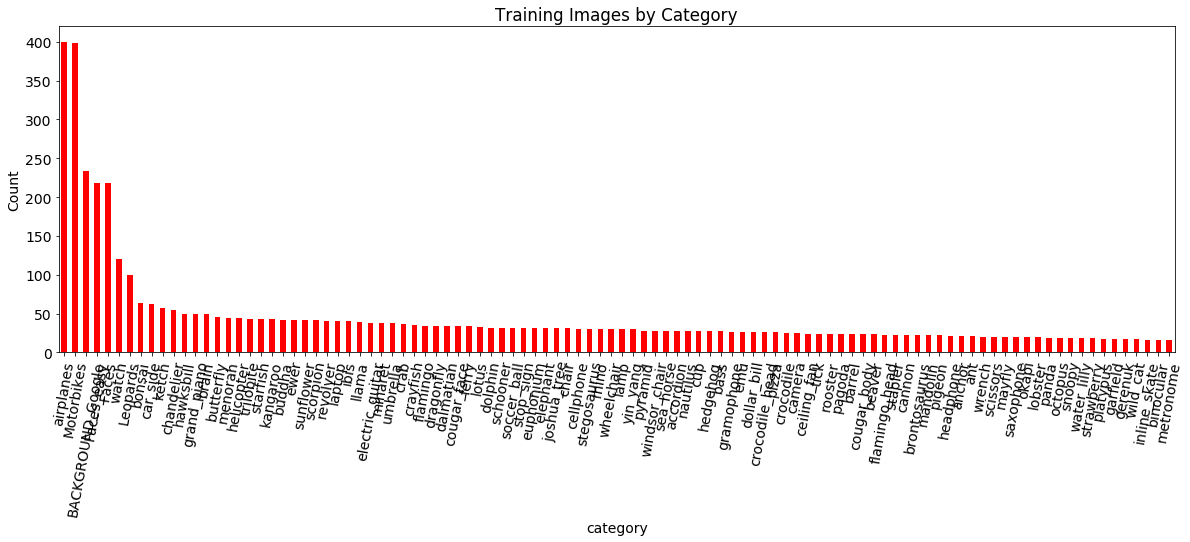

In [58]:
cat_df.set_index('category')['n_train'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Training Images by Category')

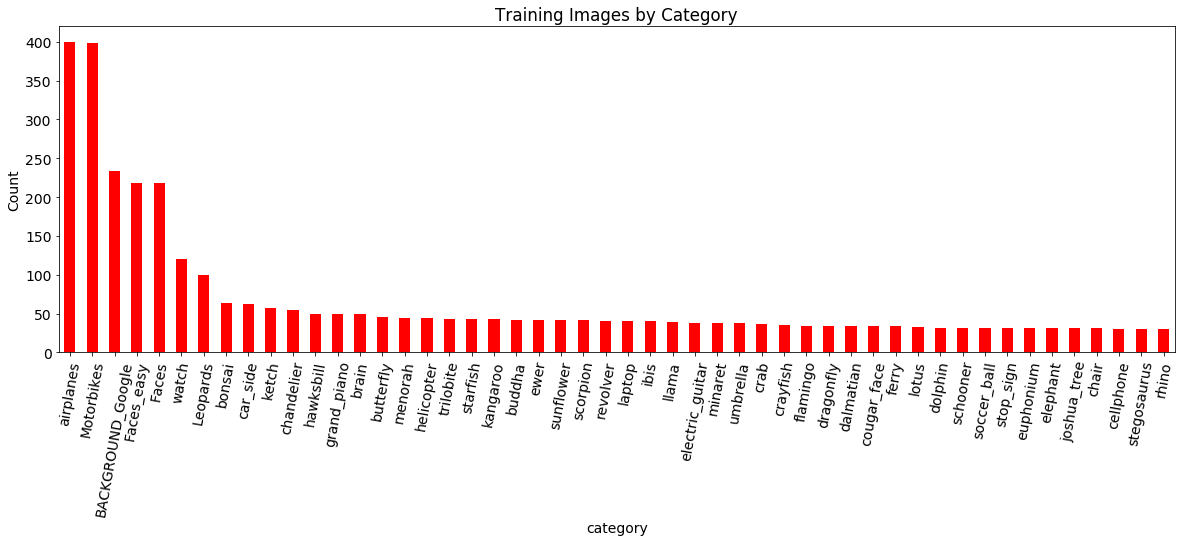

In [59]:
# Only top 50 categories
cat_df.set_index('category').iloc[:50]['n_train'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

I'm guessing the categories with more examples will be easier to learn. One way we partially get around the small number of images is through data augmentation (which we'll see in a bit).

#### Distribution of Images Sizes

The images themselves have vastly different shapes. We can see this by looking at the stats of images sizes by category.

In [60]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                          ...  width               
                   count        mean         std  ...    50%    75%     max
category                                          ...                      
BACKGROUND_Google  234.0  374.226496  373.549515  ...  300.0  500.0  3481.0
Faces              218.0  334.504587   34.632002  ...  494.0  534.0   708.0
Faces_easy         218.0  319.018349   24.577905  ...  272.0  282.0   433.0
Leopards           100.0  137.600000   22.967698  ...  192.0  192.0   192.0
Motorbikes         399.0  164.902256   18.584263  ...  261.0  263.0   282.0

[5 rows x 16 columns]

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Pixels')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Average Size Distribution')

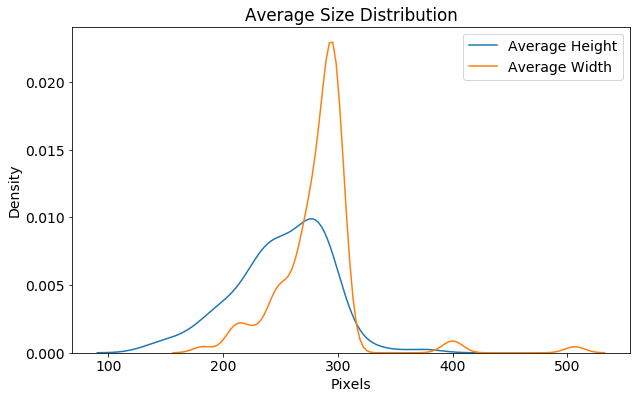

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

When we use the images in the pre-trained network, we'll have to reshape them to 224 x 224. This is the size of Imagenet images and is therefore what the model expects. The images that are larger than this will be truncated while the smaller images will be interpolated. 

(300, 189, 3)

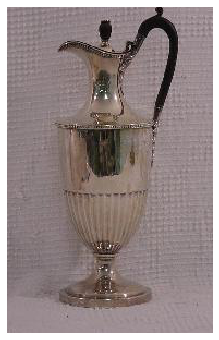

In [62]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Example image
x = Image.open(traindir + 'ewer/' + os.listdir(traindir + 'ewer/')[0] )
np.array(x).shape
imshow(x)

(300, 207, 3)

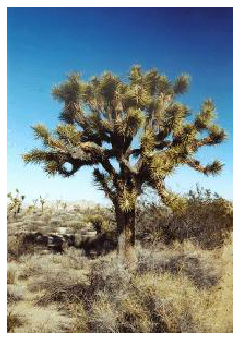

In [63]:
x = Image.open(traindir + 'joshua_tree/' + os.listdir(traindir + 'joshua_tree/')[0])
np.array(x).shape
imshow(x)

# Image Preprocessing

To prepare the images for our network, we have to resize them to 224 x 224 and normalize each color channel by subtracting a mean value and dividing by a standard deviation. We will also augment our training data in this stage. These operations are done using image `transforms`, which prepare our data for a neural network.

### Data Augmentation

Because there are a limited number of images in some categories, we can use image augmentation to artificially increase the number of images "seen" by the network. This means for training, we randomly resize and crop the images and also flip them horizontally. A different random transformation is applied each epoch (while training), so the network effectively sees many different versions of the same image. All of the data is also converted to Torch `Tensor`s before normalization. The validation and testing data is not augmented but is only resized and normalized. The normalization values are standardized for Imagenet. 

In [0]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'val':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

### Examples of Augmentation

To show how augmentation works, we need to write a function that will plot a tensor as an image.

In [0]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

We'll work with two example images and apply the train transformations.

(300, 207, 3)

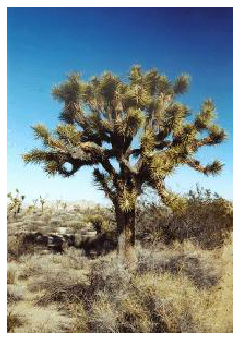

In [66]:
ex_img  = Image.open(traindir + 'elephant/' + os.listdir(traindir + 'elephant/')[0])
np.array(x).shape
imshow(x)

<Figure size 1728x1728 with 0 Axes>

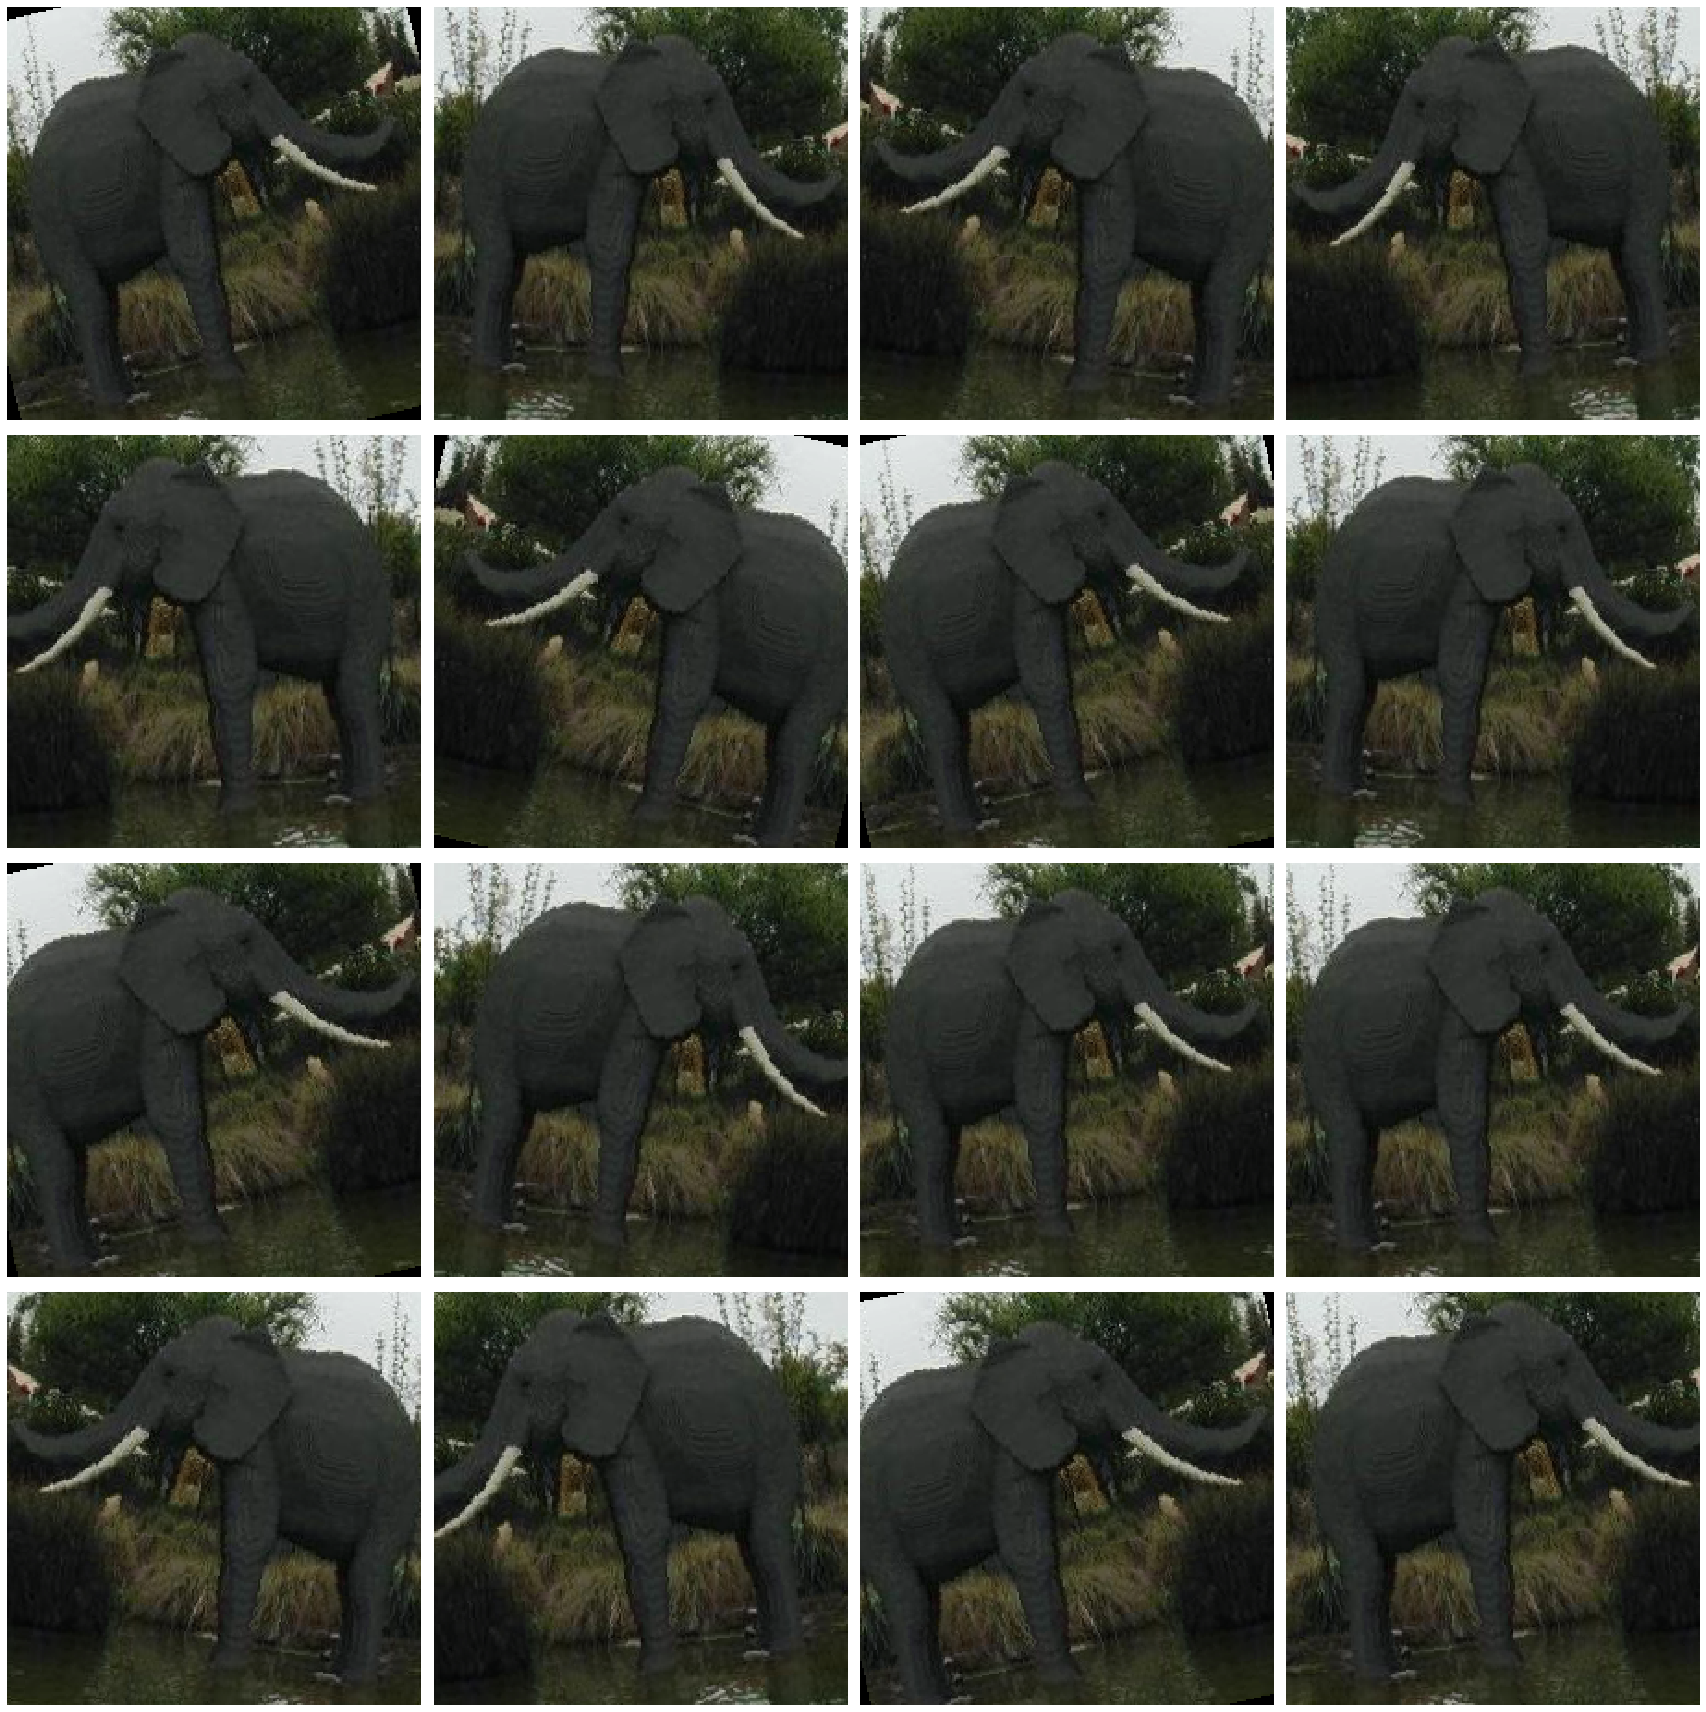

In [67]:
t = image_transforms['train']
plt.figure(figsize=(24, 24))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

(287, 300, 3)

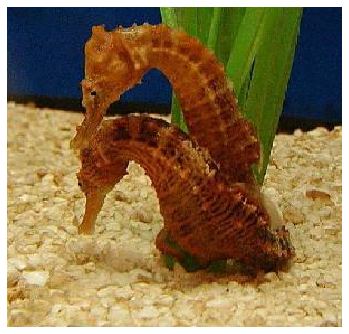

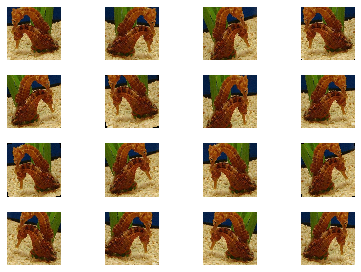

In [68]:
ex_img  = Image.open(traindir + 'sea_horse/' + os.listdir(traindir + 'sea_horse/')[0])
np.array(ex_img).shape
imshow(ex_img)

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

## Data Iterators

To avoid loading all of the data into memory at once, we use training `DataLoaders`. First, we create a dataset object from the image folders, and then we pass these to a `DataLoader`. At training time, the `DataLoader` will load the images from disk, apply the transformations, and yield a batch. To train and validation, we'll iterate through all the batches in the respective `DataLoader`. 

One crucial aspect is to `shuffle` the data before passing it to the network. This means that the ordering of the image categories changes on each pass through the data (one pass through the data is one training epoch). 

In [0]:
# Datasets from each folder
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'val':
    datasets.ImageFolder(root=validdir, transform=image_transforms['val']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test'])
}

# Dataloader iterators
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=True),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
}

In [70]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

The shape of a batch is `(batch_size, color_channels, height, width)`. 

There should be 100 different classes. We can confirm this as follows.

In [71]:
n_classes = len(cat_df)
print(f'There are {n_classes} different classes.')

len(data['train'].classes)

There are 102 different classes.


102

We can iterate through the `DataLoaders` when doing training, validation, and testing. This construction avoids the need to load all the data into memory and also will automatically apply the transformations to each batch. On each epoch, the `Random` transformations will be different so the network will essentially see multiple versions of each training image. 

# Pre-Trained Models for Image Classification

PyTorch has many pretrained models we can use. All of these models have been trained on Imagenet which consists of millions of images across 1000 categories. What we want to do with pretrained models is freeze the early layers, and replace the classification module with our own. 

## Approach

The approach for using a pre-trained image recognition model is well-established:

1. Load in pre-trained weights from a network trained on a large dataset
2. Freeze all the weights in the lower (convolutional) layers
    * Layers to freeze can be adjusted depending on similarity of task to large training dataset
3. Replace the classifier (fully connected) part of the network with a custom classifier
    * Number of outputs must be set equal to the number of classes
4. Train only the custom classifier (fully connected) layers for the task
    * Optimizer model classifier for smaller dataset
    
The idea behind pre-training is the early convolutional layers of a cnn extract features that are relevant for many image recognition tasks. The later, fully-connected layers, specialize to the specific dataset by learning higher-level features. Therefore, we can use the already trained convolutional layers while training only the fully-connected layers on our own dataset. Pre-trained networks have proven to be reasonably successful for a variety of tasks, and result in a significant reduction in training time and usually increases in performance. 

The models available in PyTorch are listed below with the corresponding number of parameters.

In [0]:
#model_options = pd.read_csv('models.csv')
#model_options

We'll be using the `vgg16` although the code also has support for the `resnet50`. You can modify the code to use a different network quite easily. The VGG networks had very good performance without taking a long time to train. 

## Process to Use Pre-Trained Model

We'll illustrate the process by using one model, vgg16.

First off, load in the model with pretrained weights. 

In [73]:
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

The `classifier` is the part of the model that we'll train. However, for the vgg, we'll only need to train the last few layers in the classifier and not even all of the fully connected layers. 

### Freeze Early layers

We freeze all of the existing layers in the network by setting `requires_grad` to `False`. 

In [0]:
# Freeze early layers
for param in model.parameters():
    param.requires_grad = False

### Add on Custom Classifier

We'll train a classifier consisting of the following layers

* Fully connected with ReLU activation (n_inputs, 256)
* Dropout with 40% chance of dropping
* Fully connected with log softmax output (256, n_classes)

To build our custom classifier, we use the `nn.Sequential()` module which allows us to specify each layer one after the other. We assign our custom classifier to the final `classifier` layer in the already trained vgg network. When we add on the extra layers, they are set to `require_grad=True` by default. These will be the only layers that are trained. 

In [75]:
n_inputs = model.classifier[6].in_features

# Add on classifier
model.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=102, bias=True)
    (4): LogSoftmax()
  )
)

The final output will be log probabilities which we can then use in the Negative Log Likelihood Loss. 

In [76]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

135,335,590 total parameters.
1,075,046 training parameters.


Even with only a few layers set to trainable, there are still over a million parameters (weights) that will be updated during training. In effect, we are _fine-tuning_ the model to work on our problem. We already know it works well on Imagenet, and because our images are relatively similar, we should expect the model to easily _transfer_ its knowledge from Imagenet to our dataset.

### Move to GPU 

To use a gpu in PyTorch, we simply move the whole model onto the gpu. Later we'll have to move the data to gpus in our training loop.

Since I am using multiple gpus, I also distribute the model across both of them with `nn.DataParallel`. 

In [0]:
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

## Function to Load in Pretrained Model

We can refactor all that code into a single function that returns a pretrained model. This only accepts the vgg16 or resnet50 at the moment but can be extended to use other models. 

In [0]:
def get_pretrained_model(model_name):
    """Retrieve a pre-trained model from torchvision

    Params
    -------
        model_name (str): name of the model (currently only accepts vgg16 and resnet50)

    Return
    --------
        model (PyTorch model): cnn

    """

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)

        # Freeze early layers
        for param in model.parameters():
            param.requires_grad = False
        n_inputs = model.classifier[6].in_features

        # Add on classifier
        model.classifier[6] = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)

        for param in model.parameters():
            param.requires_grad = False

        n_inputs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    # Move to gpu and parallelize
    if train_on_gpu:
        model = model.to('cuda')

    if multi_gpu:
        model = nn.DataParallel(model)

    return model

This should return the same as the pretrained model with the custom classifier. In the case of resnet, we replace the `fc` layers with the same classifier.

The `torchsummary` library has a helpful function called `summary` which summarizes our model.

In [79]:
model = get_pretrained_model('vgg16')
if multi_gpu:
    summary(
        model.module,
        input_size=(3, 224, 224),
        batch_size=batch_size,
        device='cuda')
else:
    summary(
        model, input_size=(3, 224, 224), batch_size=batch_size, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [128, 64, 224, 224]           1,792
              ReLU-2        [128, 64, 224, 224]               0
            Conv2d-3        [128, 64, 224, 224]          36,928
              ReLU-4        [128, 64, 224, 224]               0
         MaxPool2d-5        [128, 64, 112, 112]               0
            Conv2d-6       [128, 128, 112, 112]          73,856
              ReLU-7       [128, 128, 112, 112]               0
            Conv2d-8       [128, 128, 112, 112]         147,584
              ReLU-9       [128, 128, 112, 112]               0
        MaxPool2d-10         [128, 128, 56, 56]               0
           Conv2d-11         [128, 256, 56, 56]         295,168
             ReLU-12         [128, 256, 56, 56]               0
           Conv2d-13         [128, 256, 56, 56]         590,080
             ReLU-14         [128, 256,

We can see that the model is quite large and training all of the layers would take a considerable time. Even with only a few layers to train, this can still take a while to train. You might need to decrease the `batch_size` if this is not fitting on your gpu (hopefully you have one).

In [80]:
if multi_gpu:
    print(model.module.classifier[6])
else:
    print(model.classifier[6])

Sequential(
  (0): Linear(in_features=4096, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=102, bias=True)
  (4): LogSoftmax()
)


#### Mapping of Classes to Indexes

To keep track of the predictions made by the model, we create a mapping of classes to indexes and indexes to classes. This will let us know the actual class for a given prediction.

In [81]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'BACKGROUND_Google'),
 (1, 'Faces'),
 (2, 'Faces_easy'),
 (3, 'Leopards'),
 (4, 'Motorbikes'),
 (5, 'accordion'),
 (6, 'airplanes'),
 (7, 'anchor'),
 (8, 'ant'),
 (9, 'barrel')]

# Training Loss and Optimizer

The loss is the negative log likelihood and the optimizer is the Adam optimizer. The negative log likelihood in PyTorch expects log probabilities so we need to pass it the raw output from the log softmax in our model's final layer. The optimizer is told to optimizer the model parameters (only a few of which require a gradient). 

* Loss (criterion): keeps track of the loss itself and the gradients of the loss with respect to the model parameters (weights)
* Optimizer: updates the parameters (weights) with the gradients 

In [0]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

Below we can look at the parameters (weights) that will be updated by the optimizer during training.

In [83]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 4096])
torch.Size([256])
torch.Size([102, 256])
torch.Size([102])


# Training

For training, we iterate through the train `DataLoader`, each time passing one batch through the model. One complete pass through the training data is known as an `epoch`, and we train for a set number of epochs or until early stopping kicks in (more below). After each batch, we calculate the loss (with `criterion(output, targets)`) and then calculate the gradients of the loss with respect to the model parameters with `loss.backward()`. This uses autodifferentiation and backpropagation to calculate the gradients. 

After calculating the gradients, we call `optimizer.step()` to update the model parameters with the gradients. This is done on every training batch so we are implementing stochastic gradient descent (or rather a version of it with momentum known as Adam). For each batch, we also compute the accuracy for monitoring and after the training loop has completed, we start the validation loop. This will be used to carry out early stopping.


## Early Stopping

Early stopping halts the training when the validation loss has not decreased for a number of epochs. Each time the validation loss does decrease, the model weights are saved so we can later load in the best model. Early stopping is an effective method to prevent overfitting on the training data. If we continue training, the training loss will continue to decrease, but the validation loss will increase because the model is starting to memorize the training data. Early stopping prevents this from happening, and, if we save the model each epoch when the validation loss decreases, we are able to retrieve the model that does best on the validation data.

Early stopping is implemented by iterating through the validation data at the end of each training epoch and calculating the loss. We use the complete validation data every time and record whether or not the loss has decreased. If it has not for a number of epochs, we stop training, retrieve the best weights, and return them. When in the validation loop, we make sure not to update the model parameters. 

### Training Function

The below function trains the network while monitoring a number of different parameters. We train with early stopping on the validation set. There are a number of parameters that I've tried to explain in the doc string. Hopefully, the comments and background make things somewhat understandable! 

In [0]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=2):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [85]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=30,
    print_every=2)

Starting Training from Scratch.


Epoch: 1 	Training Loss: 0.9206 	Validation Loss: 0.6693
		Training Accuracy: 76.09%	 Validation Accuracy: 81.94%

Epoch: 3 	Training Loss: 0.5576 	Validation Loss: 0.5490
		Training Accuracy: 84.80%	 Validation Accuracy: 83.30%

Epoch: 5 	Training Loss: 0.4301 	Validation Loss: 0.4661
		Training Accuracy: 86.79%	 Validation Accuracy: 86.25%

Epoch: 7 	Training Loss: 0.3496 	Validation Loss: 0.4662
		Training Accuracy: 89.71%	 Validation Accuracy: 85.94%

Epoch: 9 	Training Loss: 0.3280 	Validation Loss: 0.4587
		Training Accuracy: 89.60%	 Validation Accuracy: 86.25%

Epoch: 11 	Training Loss: 0.2944 	Validation Loss: 0.4541
		Training Accuracy: 90.70%	 Validation Accuracy: 86.56%

Epoch: 13 	Training Loss: 0.2445 	Validation Loss: 0.4970
		Training Accuracy: 92.33%	 Validation Accuracy: 86.03%

Epoch: 15 	Training Loss: 0.2538 	Validation Loss: 0.4830
		Training Accuracy: 91.64%	 Validation Accuracy: 86.99%

Early Stopping! Total epochs: 16. Best epoc

# Training Results

We can inspect the training progress by looking at the `history`. 

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Average Negative Log Likelihood')

Text(0.5, 1.0, 'Training and Validation Losses')

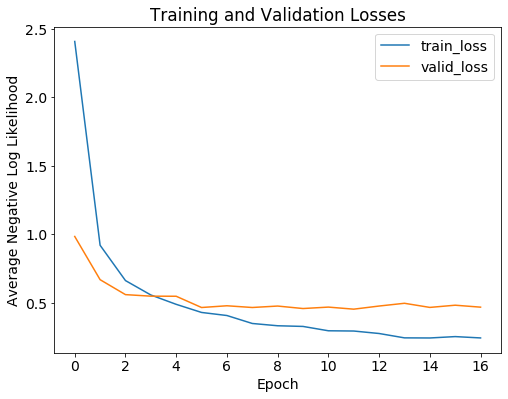

In [86]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

As expected, the training loss decreases continually with epochs. At a certain point however, the validation loss stops decreasing. There is not a massive amount of overfitting, likely because we were using Dropout. With the divergence in losses, there is likely not much more to gain from further training.

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Average Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

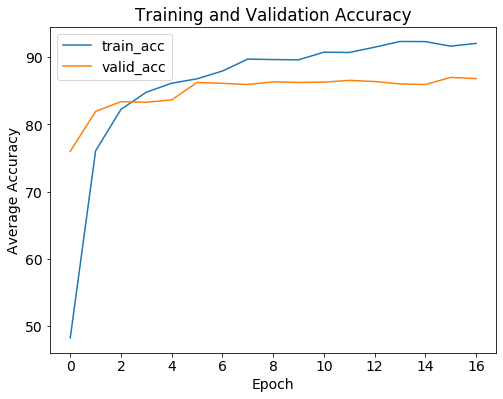

In [87]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

As with the losses, the training accuracy increases (nearly to perfect) while the validation accuracy plateaus. The model is able to achieve above 80% accuracy right away, an indication that the convolution weights learned on Imagenet were able to easily transfer to our dataset.

# Saving Model

The `train` function saves the best model `state_dict()` which are the weights of the model. To save more information about the model, we use the below function. 

In [0]:
def save_checkpoint(model, path):
    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary
    if model_name == 'vgg16':
        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [89]:
save_checkpoint(model, path=checkpoint_path)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist

## Load in a Checkpoint

Now we need to write the function to load in the checkpoint. This just takes in a `path` and returns a model from a saved checkpoint.

In [0]:
def load_checkpoint(path):
    """Load a PyTorch model checkpoint

    Params
    --------
        path (str): saved model checkpoint. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    # Get the model name
    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Load in checkpoint
    checkpoint = torch.load(path)

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.fc = checkpoint['fc']

    # Load in the state dict
    model.load_state_dict(checkpoint['state_dict'])

    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    # Move to gpu
    if multi_gpu:
        model = nn.DataParallel(model)

    if train_on_gpu:
        model = model.to('cuda')

    # Model basics
    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']

    # Optimizer
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [91]:
model, optimizer = load_checkpoint(path=checkpoint_path)

if multi_gpu:
    summary(model.module, input_size=(3, 224, 224), batch_size=batch_size)
else:
    summary(model, input_size=(3, 224, 224), batch_size=batch_size)

135,335,590 total parameters.
1,075,046 total gradient parameters.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [128, 64, 224, 224]           1,792
              ReLU-2        [128, 64, 224, 224]               0
            Conv2d-3        [128, 64, 224, 224]          36,928
              ReLU-4        [128, 64, 224, 224]               0
         MaxPool2d-5        [128, 64, 112, 112]               0
            Conv2d-6       [128, 128, 112, 112]          73,856
              ReLU-7       [128, 128, 112, 112]               0
            Conv2d-8       [128, 128, 112, 112]         147,584
              ReLU-9       [128, 128, 112, 112]               0
        MaxPool2d-10         [128, 128, 56, 56]               0
           Conv2d-11         [128, 256, 56, 56]         295,168
             ReLU-12         [128, 256, 56, 56]               0
           Conv2d-13         [128, 2

We can now use these two functions to save and load in a complete model. We can use this model to continue training. 

In [92]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=30,
    print_every=2)

Model has been trained for: 17 epochs.


Epoch: 1 	Training Loss: 0.2693 	Validation Loss: 0.4925
		Training Accuracy: 91.20%	 Validation Accuracy: 85.90%

Epoch: 3 	Training Loss: 0.2423 	Validation Loss: 0.5194
		Training Accuracy: 92.60%	 Validation Accuracy: 85.85%

Epoch: 5 	Training Loss: 0.2338 	Validation Loss: 0.4732
		Training Accuracy: 92.25%	 Validation Accuracy: 86.51%

Epoch: 7 	Training Loss: 0.2115 	Validation Loss: 0.4803
		Training Accuracy: 93.19%	 Validation Accuracy: 86.20%

Early Stopping! Total epochs: 7. Best epoch: 2 with loss: 0.46 and acc: 86.20%
542.12 total seconds elapsed. 67.76 seconds per epoch.


Further training is unlikely to improve the validation results. Let's move to inference.

# Inference

After the model has been trained to the point on no more improvement on the validation data, we need to test it on data it has never seen. Early stopping with a validation set does decrease overfitting to the training set, but at the cost of potentially overfitting to the validation data. For a final estimate of the model's performance, we need to use the hold out testing data. 
Here, we'll look at individual predictions along with loss and accuracy on the entire testing dataset. 

This function processes an image path into a PyTorch tensor for predictions. It applies the same transformations as was done to the validation data: cropping (center) and normalizing with means and standard deviations.

In [0]:
def process_image(image_path):
    """Process an image path into a PyTorch tensor"""

    image = Image.open(image_path)
    # Resize
    img = image.resize((256, 256))

    # Center crop
    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))

    # Convert to numpy, transpose color dimension and normalize
    img = np.array(img).transpose((2, 0, 1)) / 256

    # Standardization
    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

In [117]:
x = process_image(testdir + 'dragonfly/' + os.listdir(testdir + 'dragonfly/')[0])
x.shape



torch.Size([3, 224, 224])

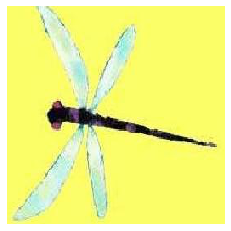

In [118]:
ax, image = imshow_tensor(x)

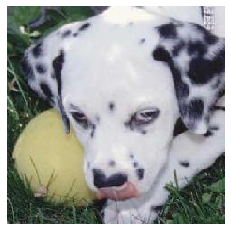

In [119]:
ax, image = imshow_tensor(process_image((testdir + 'dalmatian/' + os.listdir(testdir + 'dalmatian/')[0])))



## Function to make predictions

The next function makes predictions on a single image. It will return the top probabilities and classes. 

In [0]:
def predict(image_path, model, topk=5):
    """Make a prediction for an image using a trained model

    Params
    --------
        image_path (str): filename of the image
        model (PyTorch model): trained model for inference
        topk (int): number of top predictions to return

    Returns

    """
    real_class = image_path.split('/')[-2]

    # Convert to pytorch tensor
    img_tensor = process_image(image_path)

    # Resize
    if train_on_gpu:
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()
    else:
        img_tensor = img_tensor.view(1, 3, 224, 224)

    # Set to evaluation
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(img_tensor)
        ps = torch.exp(out)

        # Find the topk predictions
        topk, topclass = ps.topk(topk, dim=1)

        # Extract the actual classes and probabilities
        top_classes = [
            model.idx_to_class[class_] for class_ in topclass.cpu().numpy()[0]
        ]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class

This function can be used to pick a random test image. 

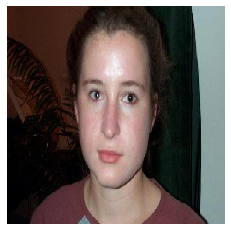

In [101]:
np.random.seed = 100


def random_test_image():
    """Pick a random test image from the test directory"""
    c = np.random.choice(cat_df['category'])
    root = testdir + c + '/'
    img_path = root + np.random.choice(os.listdir(root))
    return img_path


_ = imshow_tensor(process_image(random_test_image()))

In [102]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
img.shape

torch.Size([3, 224, 224])

In [103]:
top_p, top_classes, real_class

(array([9.8795003e-01, 1.0863036e-02, 1.0644974e-03, 7.6802549e-05,
        1.4629827e-05], dtype=float32),
 ['rhino', 'stegosaurus', 'elephant', 'brontosaurus', 'platypus'],
 'rhino')

In [104]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
top_p, top_classes, real_class

(array([9.3693733e-01, 6.3029498e-02, 3.1118932e-05, 6.5901276e-07,
        4.0743100e-07], dtype=float32),
 ['Faces_easy', 'Faces', 'BACKGROUND_Google', 'cougar_face', 'cup'],
 'Faces_easy')

### Function to Display Predictions

This function displays the picture along with the `topk` predictions from the model. The title over the image displays the true class.

In [0]:
def display_prediction(image_path, model, topk):
    """Display image and preditions from model"""

    # Get predictions
    img, ps, classes, y_obs = predict(image_path, model, topk)
    # Convert results to dataframe for plotting
    result = pd.DataFrame({'p': ps}, index=classes)

    # Show the image
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 1)
    ax, img = imshow_tensor(img, ax=ax)

    # Set title to be the actual class
    ax.set_title(y_obs, size=20)

    ax = plt.subplot(1, 2, 2)
    # Plot a bar plot of predictions
    result.sort_values('p')['p'].plot.barh(color='blue', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()

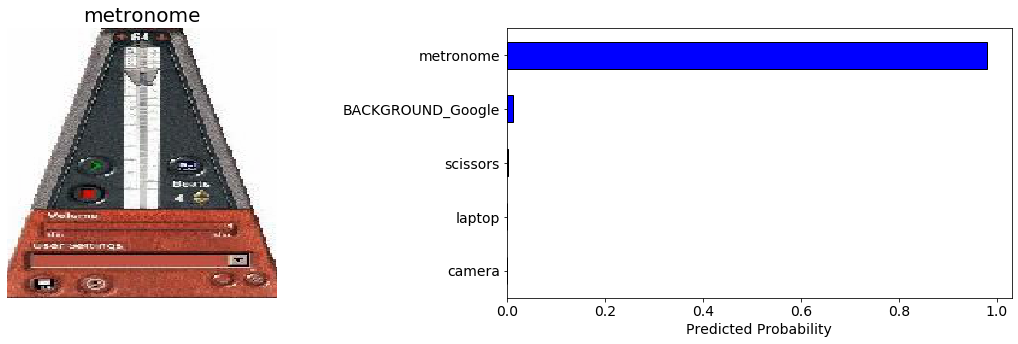

In [106]:
display_prediction(random_test_image(), model, topk=5)

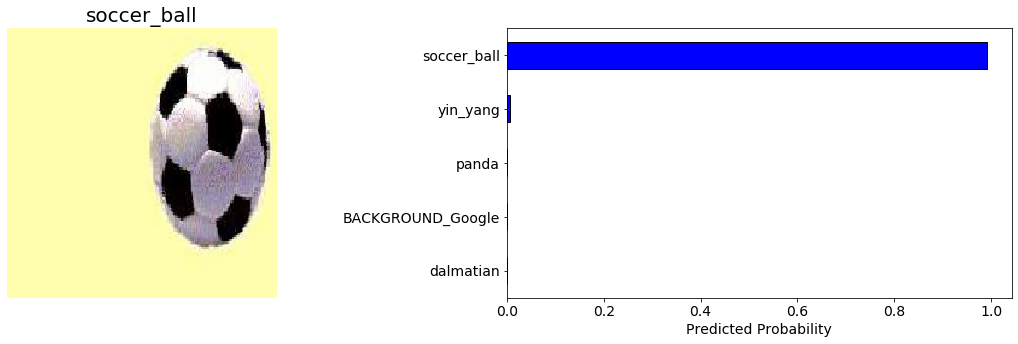

In [107]:
display_prediction(random_test_image(), model, topk=5)

# Testing Accuracy

Image identification models are usually assessed in terms of topk accuracy (for example the vgg16 model gets 28.41% top1 error and 9.62% top5 error on Imagenet). We'll assess out model by the top1 and top5 accuracy, that is, the percentage of predictions it gets exactly correct, and the percentage of predictions where the real class is in the top 5 actual classes.

The function below computes accuracy for a prediction and a target in terms of topk.

In [0]:
def accuracy(output, target, topk=(1, )):
    """Compute the topk accuracy(s)"""
    if train_on_gpu:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # Find the predicted classes and transpose
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()

        # Determine predictions equal to the targets
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []

        # For each k, find the percentage of correct
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

In [109]:
testiter = iter(dataloaders['test'])
# Get a batch of testing images and labels
features, targets = next(testiter)

if train_on_gpu:
    accuracy(model(features.to('cuda')), targets, topk=(1, 5))
else:
    accuracy(model(features), targets, topk=(1, 5))

[89.0625, 97.65625]

## Function to Evaluate Model Over All Classes

The next function iterates through the testing set in order to make predictions for each image. It calculates performance for each category.

In [0]:
def evaluate(model, test_loader, criterion, topk=(1, 5)):
    """Measure the performance of a trained PyTorch model

    Params
    --------
        model (PyTorch model): trained cnn for inference
        test_loader (PyTorch DataLoader): test dataloader
        topk (tuple of ints): accuracy to measure

    Returns
    --------
        results (DataFrame): results for each category

    """

    classes = []
    losses = []
    # Hold accuracy results
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():

        # Testing loop
        for data, targets in test_loader:

            # Tensors to gpu
            if train_on_gpu:
                data, targets = data.to('cuda'), targets.to('cuda')

            # Raw model output
            out = model(data)
            # Iterate through each example
            for pred, true in zip(out, targets):
                # Find topk accuracy
                acc_results[i, :] = accuracy(
                    pred.unsqueeze(0), true.unsqueeze(0), topk)
                classes.append(model.idx_to_class[true.item()])
                # Calculate the loss
                loss = criterion(pred.view(1, n_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    # Send results to a dataframe and calculate average across classes
    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'})

In [111]:
criterion = nn.NLLLoss()
# Evaluate the model on all the training data
results = evaluate(model, dataloaders['test'], criterion)
results.head()

class        top1        top5      loss
0  BACKGROUND_Google   71.794872   96.581197  0.854417
1              Faces   63.302752  100.000000  0.732152
2         Faces_easy   96.330275  100.000000  0.091505
3           Leopards  100.000000  100.000000  0.017587
4         Motorbikes  100.000000  100.000000  0.006554

## Test Results

We'd expect the model to do better on those classes for which it had the most training images. We can see if that is the case.

Text(0.5, 11.11999999999999, 'images')

Text(6.7450000000000045, 0.5, 'Accuracy (%)')

Text(0.5, 1, 'Top 1 Accuracy vs Number of Training Images')

(-5, 105)

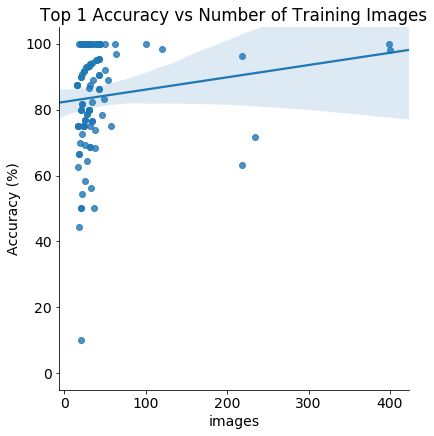

In [112]:
results = results.merge(cat_df, left_on='class', right_on='category').\
    drop(columns=['category'])

# Plot using seaborn
sns.lmplot(
    y='top1', x='n_train', data=results, height=6)
plt.xlabel('images')
plt.ylabel('Accuracy (%)')
plt.title('Top 1 Accuracy vs Number of Training Images')
plt.ylim(-5, 105)

In [113]:
print('Category with minimum accuracy.')
results.loc[results['top1'].idxmin]

print('Category with minimum images.')
results.loc[results['n_train'].idxmin]

Category with minimum accuracy.


class      lobster
top1            10
top5            80
loss       3.74464
n_train         20
n_valid         11
n_test          10
Name: 60, dtype: object

Category with minimum images.


class      binocular
top1            87.5
top5             100
loss        0.175103
n_train           16
n_valid            9
n_test             8
Name: 12, dtype: object

Text(0.5, 11.11999999999999, 'images')

Text(6.7450000000000045, 0.5, 'Accuracy (%)')

Text(0.5, 1, 'Top 5 Accuracy vs Number of Training Images')

(-5, 105)

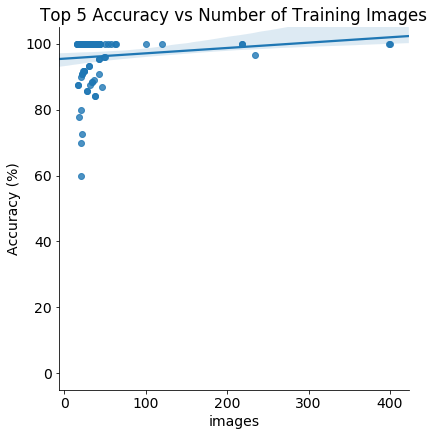

In [114]:
sns.lmplot(
    y='top5', x='n_train', data=results, height=6)
plt.xlabel('images')
plt.ylabel('Accuracy (%)')
plt.title('Top 5 Accuracy vs Number of Training Images')
plt.ylim(-5, 105)

It looks like there is some relationship between the number of training images and the accuracy. However, there are a few classes with limited images in which the model does quite well.

In [115]:
# Weighted column of test images
results['weighted'] = results['n_test'] / results['n_test'].sum()

# Create weighted accuracies
for i in (1, 5):
    results[f'weighted_top{i}'] = results['weighted'] * results[f'top{i}']

# Find final accuracy accounting for frequencies
top1_weighted = results['weighted_top1'].sum()
top5_weighted = results['weighted_top5'].sum()
loss_weighted = (results['weighted'] * results['loss']).sum()

print(f'Final test cross entropy per image = {loss_weighted:.4f}.')
print(f'Final test top 1 weighted accuracy = {top1_weighted:.2f}%')
print(f'Final test top 5 weighted accuracy = {top5_weighted:.2f}%')

Final test cross entropy per image = 0.4319.
Final test top 1 weighted accuracy = 87.20%
Final test top 5 weighted accuracy = 97.55%


It's probably worth looking at the categories where the model is worst. 

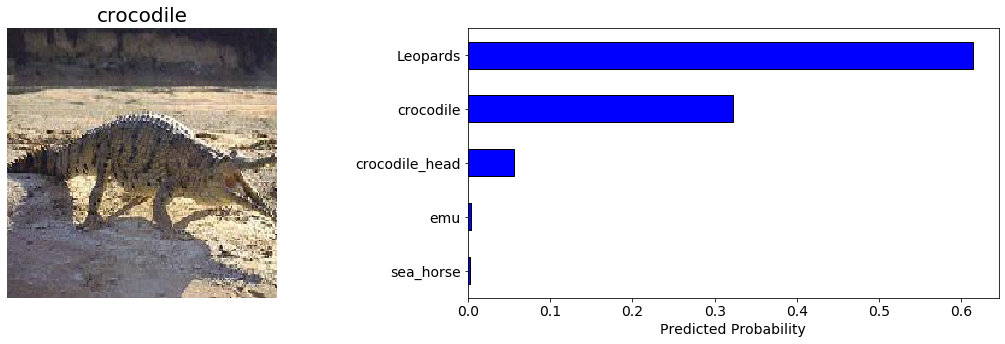

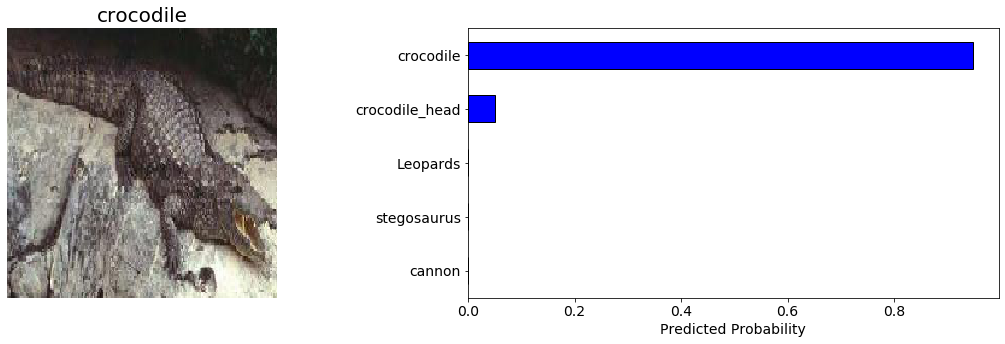

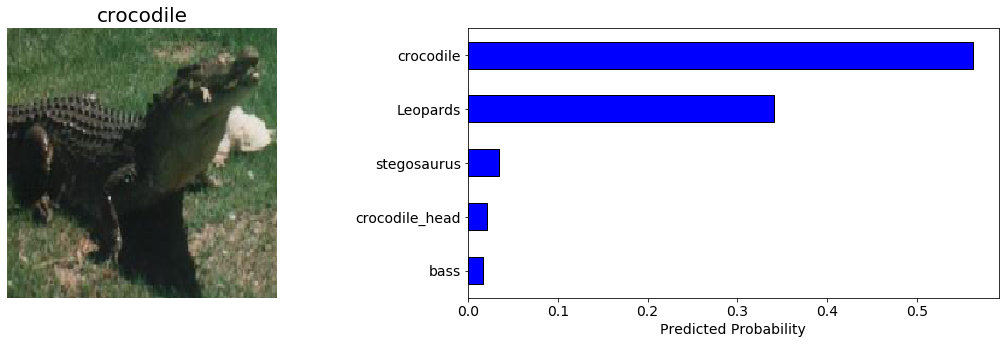

In [123]:
croc1 = testdir + 'crocodile/' + os.listdir(testdir + 'crocodile/')[0]
#'/home/wjk68/test/crocodile/image_0002.jpg'
croc2 = testdir + 'crocodile/' + os.listdir(testdir + 'crocodile/')[10]
#'/home/wjk68/test/crocodile/image_0004.jpg'
croc3 = testdir + 'crocodile/' + os.listdir(testdir + 'crocodile/')[7]
#'/home/wjk68/test/crocodile/image_0006.jpg'
display_prediction(croc1, model, 5)
display_prediction(croc2, model, 5)
display_prediction(croc3, model, 5)

Given the subtle distinction between `crocodile` and `crocodile_head`, I'd say that this model does pretty well! The ultimate bar in image recognition is human level, and our model is nearly there. 

In [0]:
def display_category(model, category, n=4):
    """Display predictions for a category    
    """
    category_results = results.loc[results['class'] == category]
    print(category_results.iloc[:, :6], '/n')

    images = np.random.choice(
        os.listdir(testdir + category + '/'), size=4, replace=False)

    for img in images:
        display_prediction(testdir + category + '/' + img, model, 5)

    class  top1  top5     loss  n_train  n_valid
7  anchor  50.0  60.0  2.44083       21       11 /n


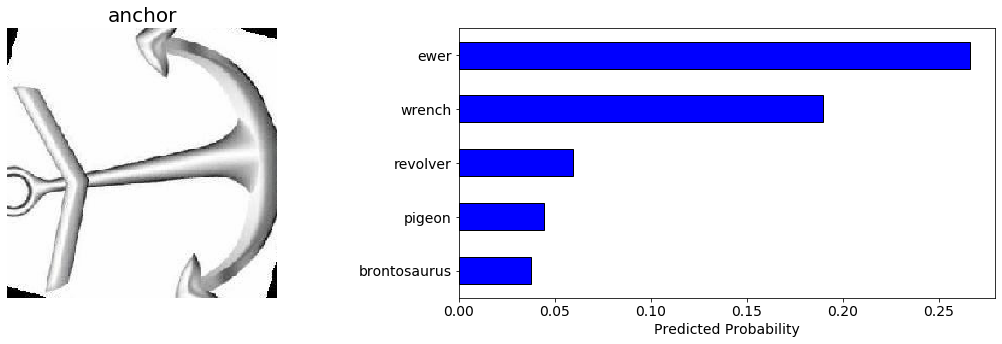

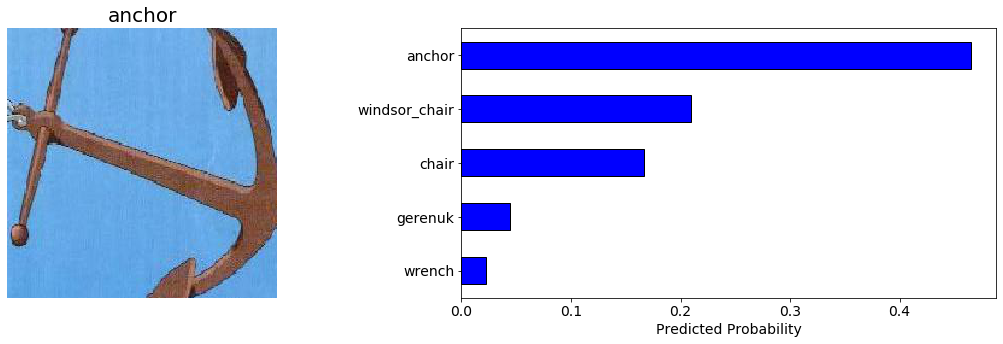

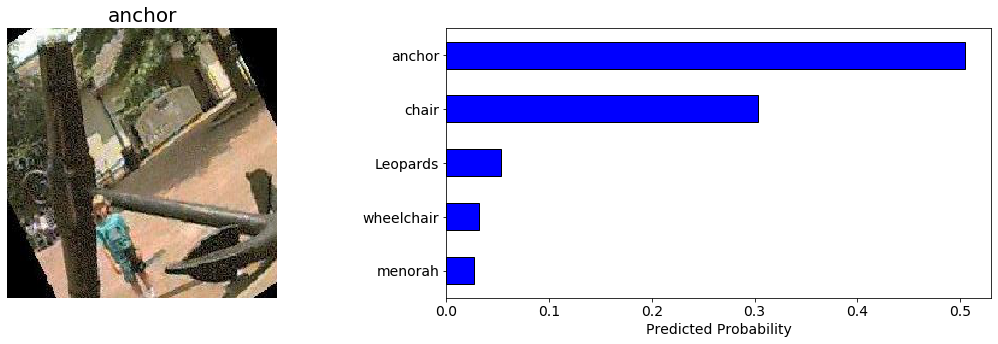

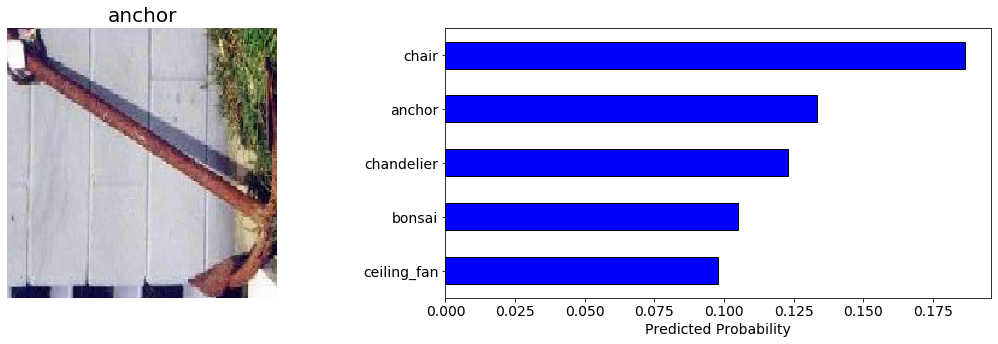

In [125]:
display_category(model, 'anchor')

       class   top1   top5      loss  n_train  n_valid
62  mandolin  100.0  100.0  0.165875       22       10 /n


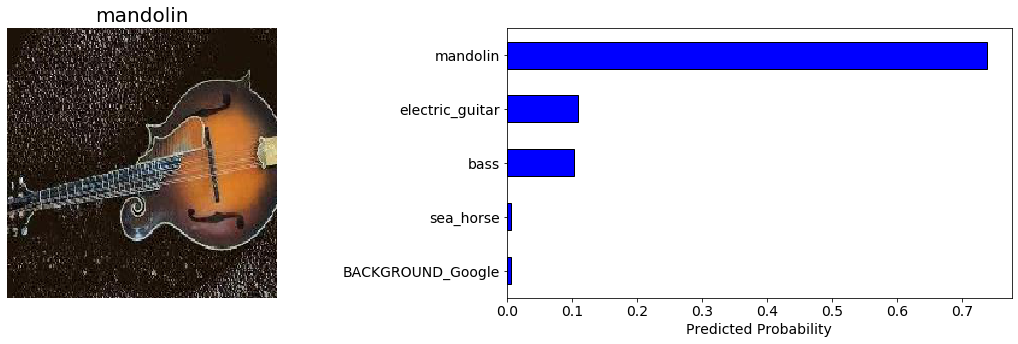

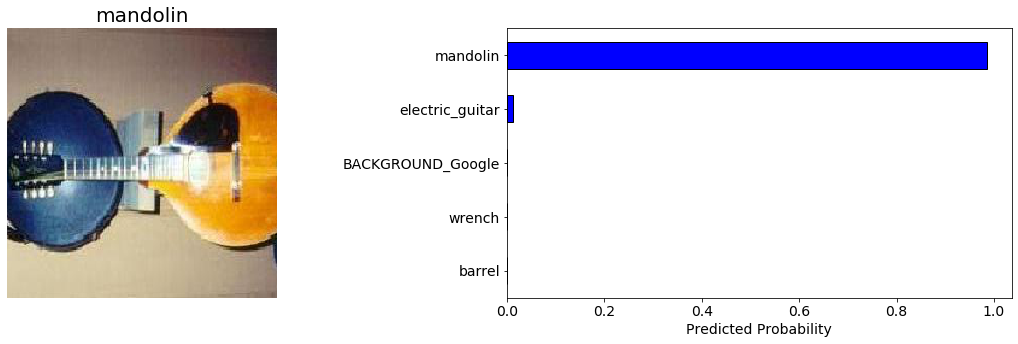

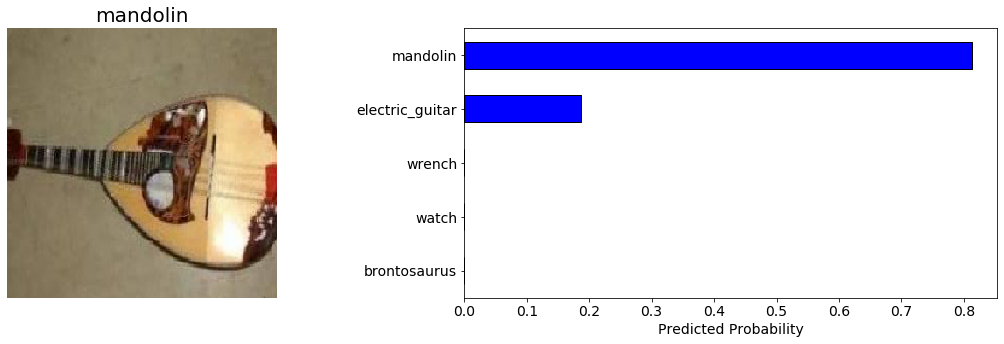

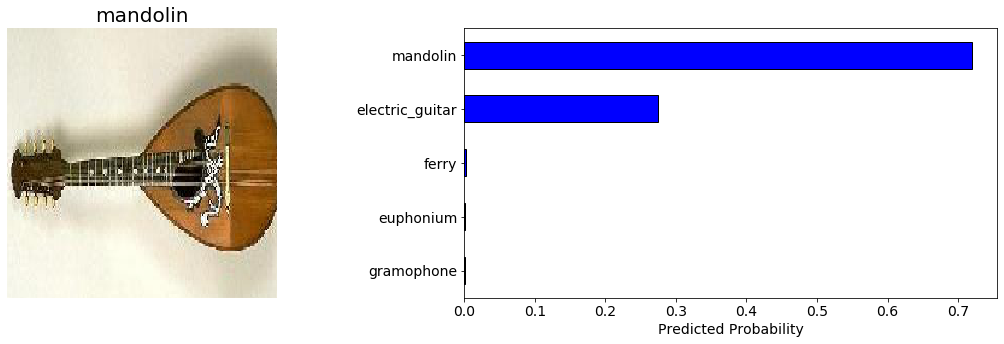

In [126]:
display_category(model, 'mandolin')

# Conclusions

This project taught us the basics of using PyTorch and pretrained neural networks for image recognition. We saw how to take a network that was trained on a large set of images and apply it successfully to a different task. Along the way, we learned a number of useful concepts for working with cnns in PyTorch including how to get our data into a model. The end result is a capable model trained in far less time than one trained from starting weights. 

Some of the ideas covered in this notebook were:

* PyTorch basics
* Data transformations 
* Training data augmentation
* Transfer Learning for object recognition
* Training a PyTorch model with early stopping on a validation set
* Inference using a PyTorch model


Truly, we live in an incredible age for deep learning with the wide availability of resources, and it's only getting better! Hopefully, this notebook has prepared you to take on your own deep learning challenges with PyTorch. 